In [1]:
import math, time, random, datetime
from datetime import datetime, date, timedelta

# Data Manipulation
import numpy as np
import pandas as pd
import re

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import plotly.express as px
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import codecs
import matplotlib.colors
import itertools
plt.style.use("seaborn-whitegrid")

# Preprocessing
from copy import deepcopy
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from functools import reduce
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

#NLP
from nltk import word_tokenize, pos_tag, sent_tokenize
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from stemming.porter2 import stem
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud
from nltk import ngrams

# 
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

D:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
apps = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
apps.sample(5)

App             Category  Rating Reviews  \
6687   TV Guide BR Gold               FAMILY     4.4     544   
9993             EW PDF  BOOKS_AND_REFERENCE     NaN       0   
8603          DN Prasad              FINANCE     NaN       0   
3950                  B              FINANCE     3.7     800   
5604  PS4 Second Screen               FAMILY     2.4   11773   

                    Size    Installs  Type  Price Content Rating  \
6687  Varies with device      5,000+  Paid  $1.49       Everyone   
9993                8.7M          5+  Free      0       Everyone   
8603                5.9M        100+  Free      0       Everyone   
3950                 32M     50,000+  Free      0       Everyone   
5604                3.3M  1,000,000+  Free      0       Everyone   

                 Genres       Last Updated         Current Ver  \
6687      Entertainment    August 20, 2017  Varies with device   
9993  Books & Reference  February 14, 2018               1.0.2   
8603            Finance     April 30, 2018               1.1.2   
3950            Finance      June 21, 2018           2.16.5426   
5604      Entertainment      June 13, 2018              18.6.2   

             Android Ver  
6687  Varies with device  
9993          4.4 and up  
8603        4.0.3 and up  
3950          4.4 and up  
5604          4.1 and up

In [4]:
apps.shape

(10841, 13)

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
apps.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [7]:
apps.describe(include=["O"])

App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451

In [8]:
apps.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [9]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
apps.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

<Figure size 720x720 with 0 Axes>

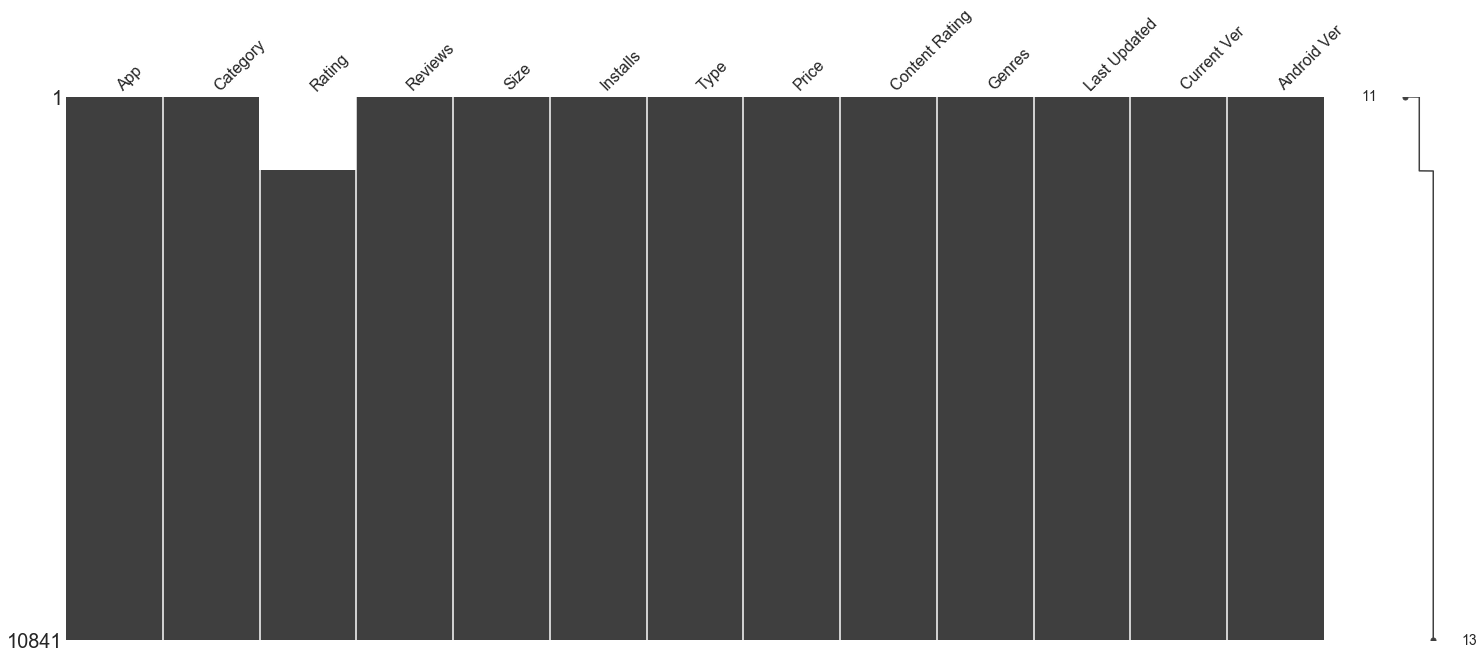

In [11]:
plt.figure(figsize=(10,10))
missingno.matrix(apps, sort="ascending")
plt.show()

# Data Cleaning

## App

In [12]:
apps.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [13]:
# duplicate data all columns
apps.drop_duplicates(inplace=True)

In [14]:
sum(apps.duplicated("App"))

698

In [15]:
# duplicate data App col
apps.drop_duplicates(subset="App", inplace=True)

In [16]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


## Category

In [17]:
apps["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
apps.groupby(["Category"]).describe()

Rating                                                   \
                      count       mean       std   min     25%   50%     75%   
Category                                                                       
1.9                     1.0  19.000000       NaN  19.0  19.000  19.0  19.000   
ART_AND_DESIGN         61.0   4.357377  0.361229   3.2   4.100   4.4   4.700   
AUTO_AND_VEHICLES      73.0   4.190411  0.543692   2.1   4.000   4.3   4.600   
BEAUTY                 42.0   4.278571  0.362603   3.1   4.000   4.3   4.575   
BOOKS_AND_REFERENCE   169.0   4.344970  0.437649   2.7   4.100   4.5   4.600   
BUSINESS              263.0   4.098479  0.659862   1.0   3.800   4.2   4.500   
COMICS                 54.0   4.181481  0.526317   2.8   3.900   4.4   4.500   
COMMUNICATION         256.0   4.121484  0.470260   1.0   4.000   4.2   4.400   
DATING                134.0   3.970149  0.637786   1.0   3.600   4.1   4.400   
EDUCATION             118.0   4.364407  0.263612   3.5   4.200   4.4   4.600   
ENTERTAINMENT         102.0   4.135294  0.328407   3.0   3.900   4.2   4.300   
EVENTS                 45.0   4.435556  0.419499   2.9   4.200   4.5   4.700   
FAMILY               1608.0   4.179664  0.523323   1.0   4.000   4.3   4.500   
FINANCE               302.0   4.115563  0.659147   1.0   3.925   4.3   4.500   
FOOD_AND_DRINK         94.0   4.172340  0.566901   1.7   4.000   4.3   4.500   
GAME                  912.0   4.247368  0.384116   1.0   4.100   4.3   4.500   
HEALTH_AND_FITNESS    244.0   4.243033  0.668818   1.4   4.100   4.5   4.600   
HOUSE_AND_HOME         62.0   4.150000  0.379711   2.8   3.925   4.2   4.475   
LIBRARIES_AND_DEMO     64.0   4.178125  0.381504   3.1   3.975   4.2   4.400   
LIFESTYLE             301.0   4.093355  0.704951   1.5   3.800   4.2   4.600   
MAPS_AND_NAVIGATION   118.0   4.036441  0.527316   1.9   3.700   4.2   4.400   
MEDICAL               290.0   4.166552  0.690984   1.0   3.900   4.3   4.600   
NEWS_AND_MAGAZINES    204.0   4.121569  0.566578   1.7   3.900   4.2   4.500   
PARENTING              50.0   4.300000  0.517845   2.0   4.100   4.4   4.675   
PERSONALIZATION       298.0   4.332215  0.358968   2.5   4.200   4.4   4.600   
PHOTOGRAPHY           263.0   4.157414  0.494331   2.0   4.000   4.3   4.500   
PRODUCTIVITY          301.0   4.183389  0.534281   1.0   4.000   4.3   4.500   
SHOPPING              180.0   4.230000  0.445198   1.6   4.100   4.3   4.500   
SOCIAL                203.0   4.247291  0.457209   1.9   4.100   4.3   4.500   
SPORTS                260.0   4.216154  0.462627   1.5   4.000   4.3   4.500   
TOOLS                 718.0   4.039554  0.620272   1.0   3.800   4.2   4.400   
TRAVEL_AND_LOCAL      187.0   4.069519  0.532070   2.2   3.800   4.2   4.400   
VIDEO_PLAYERS         148.0   4.044595  0.563792   1.8   3.775   4.2   4.400   
WEATHER                72.0   4.243056  0.337692   3.3   4.000   4.3   4.500   

                           
                      max  
Category                   
1.9                  19.0  
ART_AND_DESIGN        5.0  
AUTO_AND_VEHICLES     4.9  
BEAUTY                4.9  
BOOKS_AND_REFERENCE   5.0  
BUSINESS              5.0  
COMICS                5.0  
COMMUNICATION         5.0  
DATING                5.0  
EDUCATION             4.9  
ENTERTAINMENT         4.7  
EVENTS                5.0  
FAMILY                5.0  
FINANCE               5.0  
FOOD_AND_DRINK        5.0  
GAME                  5.0  
HEALTH_AND_FITNESS    5.0  
HOUSE_AND_HOME        4.8  
LIBRARIES_AND_DEMO    5.0  
LIFESTYLE             5.0  
MAPS_AND_NAVIGATION   4.9  
MEDICAL               5.0  
NEWS_AND_MAGAZINES    5.0  
PARENTING             5.0  
PERSONALIZATION       5.0  
PHOTOGRAPHY           5.0  
PRODUCTIVITY          5.0  
SHOPPING              5.0  
SOCIAL                5.0  
SPORTS                5.0  
TOOLS                 5.0  
TRAVEL_AND_LOCAL      5.0  
VIDEO_PLAYERS         4.9  
WEATHER               4.8

In [19]:
apps.groupby(["Category"]).size()

Category
1.9                       1
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
dtype: int64

In [20]:
apps["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [21]:
# which row is category 1.9 ?
i = apps[apps["Category"] == "1.9"].index
apps.loc[i]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [22]:
# category is unnormal & rating is over so I choose drop this record 
apps = apps.drop(i)

In [23]:
apps[apps["Category"] == "1.9"]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [24]:
apps["Category Code"] = pd.Categorical(apps["Category"])
apps["Category Code"] = apps["Category Code"].cat.codes

## Reviews

In [25]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Category Code  
0  4.0.3 and up              0  
1  4.0.3 and up              0  
2  4.0.3 and up              0  
3    4.2 and up              0  
4    4.4 and up              0

In [26]:
apps["Reviews"].value_counts()

0        593
1        272
2        213
3        170
4        137
        ... 
21733      1
12398      1
466        1
2006       1
14955      1
Name: Reviews, Length: 5330, dtype: int64

In [27]:
apps.loc[apps["Reviews"].str.isnumeric()]

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  Category Code  
0                   1.0.0        4.0.3 and up              0  
1                   2.0.0        4.0.3 and up              0  
2                   1.2.4        4.0.3 and up              0  
3      Varies with device          4.2 and up              0  
4                     1.1          4.4 and up              0  
...                   ...                 ...            ...  
10836                1.48          4.1 and up             11  
10837                 1.0          4.1 and up             11  
10838                 1.0          2.2 and up             20  
10839  Varies with device  Varies with device              3  
10840  Varies with device  Varies with device             18  

[9659 rows x 14 columns]

In [28]:
pd.to_numeric(apps["Reviews"], errors="coerce").isna().sum()

0

In [29]:
apps["Reviews"] = pd.to_numeric(apps["Reviews"])

In [30]:
apps["Review_Log"] = np.log(apps["Reviews"])

In [31]:
apps["Review_Log"] = apps["Review_Log"].apply(lambda x: 0 if x < 0 else x)

## Size

In [32]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Category Code  Review_Log  
0  4.0.3 and up              0    5.068904  
1  4.0.3 and up              0    6.874198  
2  4.0.3 and up              0   11.379508  
3    4.2 and up              0   12.281384  
4    4.4 and up              0    6.874198

In [33]:
apps["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [34]:
apps["Size"].value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
314k                     1
329k                     1
658k                     1
939k                     1
421k                     1
Name: Size, Length: 461, dtype: int64

In [35]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Category Code        int8
Review_Log        float64
dtype: object

In [36]:
def size_convert(x):
    x = str(x)
    if "M" in x:
        return float(x.replace("M", ""))
    elif "k" in x:
        return float(x.replace("k",""))/1000
    elif x == "Varies with device":
        return np.NaN  #0
    else:
        return float(x)

In [37]:
# call size_transform   
apps["Size"] = apps["Size"].apply(size_convert)

In [38]:
# fill NA
mean_Size = apps.groupby("Category")["Size"].transform("mean")
#mean_Size = np.mean(apps.Size)
apps["Size"] = apps["Size"].fillna(mean_Size)

In [39]:
apps["Size"] = pd.to_numeric(apps["Size"])

## Installs

In [40]:
apps["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [41]:
apps.groupby(["Installs"]).describe()

Rating                                                  \
                 count      mean       std  min    25%   50%  75%  max   
Installs                                                                 
0                  0.0       NaN       NaN  NaN    NaN   NaN  NaN  NaN   
0+                 0.0       NaN       NaN  NaN    NaN   NaN  NaN  NaN   
1+                 3.0  5.000000  0.000000  5.0  5.000  5.00  5.0  5.0   
1,000+           697.0  4.063128  0.789135  1.0  3.700  4.30  4.6  5.0   
1,000,000+      1415.0  4.216396  0.355816  2.2  4.000  4.30  4.5  4.9   
1,000,000,000+    20.0  4.215000  0.225424  3.7  4.075  4.30  4.4  4.5   
10+               69.0  4.624638  0.821119  1.0  4.800  5.00  5.0  5.0   
10,000+          987.0  4.035562  0.591541  1.7  3.800  4.20  4.5  5.0   
10,000,000+      937.0  4.299146  0.286892  3.0  4.100  4.30  4.5  4.9   
100+             303.0  4.363696  0.848842  1.0  4.000  4.70  5.0  5.0   
100,000+        1094.0  4.116453  0.476745  1.6  3.900  4.20  4.5  4.9   
100,000,000+     188.0  4.386702  0.190085  3.5  4.300  4.40  4.5  4.8   
5+                 9.0  4.611111  1.166667  1.5  5.000  5.00  5.0  5.0   
5,000+           425.0  4.021412  0.638792  1.4  3.700  4.20  4.5  5.0   
5,000,000+       607.0  4.227677  0.336147  2.0  4.100  4.30  4.5  4.9   
50+               56.0  4.419643  1.046799  1.0  4.350  5.00  5.0  5.0   
50,000+          457.0  4.045077  0.553481  1.6  3.800  4.10  4.4  4.9   
50,000,000+      202.0  4.333663  0.233629  3.1  4.200  4.30  4.5  4.8   
500+             199.0  4.177889  0.805043  1.0  3.900  4.40  4.7  5.0   
500,000+         504.0  4.168452  0.443931  1.8  3.900  4.30  4.5  4.9   
500,000,000+      24.0  4.375000  0.177544  4.0  4.300  4.35  4.5  4.7   

               Reviews                ... Category Code       Review_Log  \
                 count          mean  ...           75%   max      count   
Installs                              ...                                  
0                  1.0  0.000000e+00  ...         11.00  11.0        1.0   
0+                14.0  0.000000e+00  ...         24.50  30.0       14.0   
1+                67.0  2.985075e-01  ...         23.00  30.0       67.0   
1,000+           888.0  3.777477e+01  ...         24.00  32.0      888.0   
1,000,000+      1417.0  3.299935e+04  ...         25.00  32.0     1417.0   
1,000,000,000+    20.0  2.001139e+07  ...         27.50  31.0       20.0   
10+              385.0  1.088312e+00  ...         25.00  32.0      385.0   
10,000+         1031.0  3.450524e+02  ...         23.00  32.0     1031.0   
10,000,000+      937.0  3.497640e+05  ...         26.00  32.0      937.0   
100+             710.0  5.443662e+00  ...         23.75  31.0      710.0   
100,000+        1112.0  3.388396e+03  ...         23.25  32.0     1112.0   
100,000,000+     188.0  4.054665e+06  ...         25.00  31.0      188.0   
5+                82.0  5.365854e-01  ...         25.75  30.0       82.0   
5,000+           468.0  1.000962e+02  ...         25.00  32.0      468.0   
5,000,000+       607.0  1.014192e+05  ...         25.00  32.0      607.0   
50+              204.0  2.382353e+00  ...         21.00  30.0      204.0   
50,000+          469.0  9.717633e+02  ...         24.00  32.0      469.0   
50,000,000+      202.0  1.224767e+06  ...         27.00  32.0      202.0   
500+             328.0  1.228049e+01  ...         25.00  32.0      328.0   
500,000+         505.0  9.873313e+03  ...         23.00  32.0      505.0   
500,000,000+      24.0  9.852274e+06  ...         27.50  31.0       24.0   

                                                                      \
                     mean       std        min        25%        50%   
Installs                                                               
0                0.000000       NaN   0.000000   0.000000   0.000000   
0+               0.000000  0.000000   0.000000   0.000000   0.000000   
1+               0.072418  0.273407   0.000000   0.000

In [42]:
apps["Installs"].value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [43]:
def installs_convert(x):
    if "+" in x:
        x = x.replace("+", "")
    if "," in x:
        x = x.replace(",", "")
    return int(x)

In [44]:
apps["Installs"] = apps["Installs"].apply(installs_convert)

In [45]:
pd.to_numeric(apps["Installs"], errors="coerce").isna().sum()

0

In [46]:
apps["Installs"] = pd.to_numeric(apps["Installs"])

In [47]:
# Convert to category type

In [48]:
'''
print("\n".join([val for val in apps['Installs'].unique()]))
ordered_categories = """
1,000,000,000+
500,000,000+
100,000,000+
50,000,000+
10,000,000+
5,000,000+
1,000,000+
500,000+
100,000+
50,000+
10,000+
5,000+
1,000+
500+
100+
50+
10+
5+
1+
0+
0
"""
[cat for cat in ordered_categories.split()][::-1]
from pandas.api.types import CategoricalDtype
installs_cat = CategoricalDtype([cat for cat in ordered_categories.split()][::-1], ordered=True)
apps["Installs"] = apps["Installs"].astype(installs_cat)
'''

'\nprint("\n".join([val for val in apps[\'Installs\'].unique()]))\nordered_categories = """\n1,000,000,000+\n500,000,000+\n100,000,000+\n50,000,000+\n10,000,000+\n5,000,000+\n1,000,000+\n500,000+\n100,000+\n50,000+\n10,000+\n5,000+\n1,000+\n500+\n100+\n50+\n10+\n5+\n1+\n0+\n0\n"""\n[cat for cat in ordered_categories.split()][::-1]\nfrom pandas.api.types import CategoricalDtype\ninstalls_cat = CategoricalDtype([cat for cat in ordered_categories.split()][::-1], ordered=True)\napps["Installs"] = apps["Installs"].astype(installs_cat)\n'

In [49]:
apps["Install_Log"] = np.log(apps["Installs"])

In [50]:
apps["Install_Log"] = apps["Install_Log"].apply(lambda x: 0 if x < 0 else x)

## Type

In [51]:
apps["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [52]:
apps["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [53]:
apps[apps["Type"].isnull()]

App Category  Rating  Reviews       Size  \
9148  Command & Conquer: Rivals   FAMILY     NaN        0  27.187988   

      Installs Type Price Content Rating    Genres   Last Updated  \
9148         0  NaN     0   Everyone 10+  Strategy  June 28, 2018   

             Current Ver         Android Ver  Category Code  Review_Log  \
9148  Varies with device  Varies with device             11         0.0   

      Install_Log  
9148          0.0

In [54]:
apps[["Type", "Price"]].sample(10)

Type    Price
5373   Paid  $399.99
6200   Free        0
9414   Free        0
7197   Free        0
445    Free        0
8171   Paid    $4.99
6879   Free        0
3836   Free        0
10525  Free        0
527    Free        0

In [55]:
# Price is zero then Type should be Free 
apps["Type"].fillna("Free", inplace=True)

In [56]:
def type_convert(x):
    if x == "Free":
        return 0
    elif x == "Paid":
        return 1
    else:
        return x

apps["Type Code"] = apps["Type"].apply(type_convert)

## Price

In [57]:
apps.sample(5)

App      Category  Rating  \
194              OfficeSuite : Free Office + PDF Editor      BUSINESS     4.3   
2445                                     Labs on Demand       MEDICAL     5.0   
7150                                         CD Library  PRODUCTIVITY     3.9   
2823  Makeup Photo Editor: Makeup Camera & Makeup Ed...   PHOTOGRAPHY     4.4   
6174                                           BG-FLEET         TOOLS     NaN   

      Reviews  Size   Installs  Type Price Content Rating        Genres  \
194   1002861  35.0  100000000  Free     0       Everyone      Business   
2445        1  22.0         10  Free     0       Everyone       Medical   
7150       44   3.3      10000  Free     0       Everyone  Productivity   
2823    10525  25.0    1000000  Free     0       Everyone   Photography   
6174        0   1.8         10  Free     0       Everyone         Tools   

           Last Updated Current Ver   Android Ver  Category Code  Review_Log  \
194      August 2, 2018   9.7.14188    4.1 and up              4   13.818367   
2445     August 3, 2018         1.2    4.2 and up             20    0.000000   
7150  February 18, 2017       5.7.2    2.1 and up             25    3.784190   
2823      July 27, 2018       8.9.9    4.0 and up             24    9.261509   
6174      July 30, 2018         1.0  4.0.3 and up             29    0.000000   

      Install_Log  Type Code  
194     18.420681          0  
2445     2.302585          0  
7150     9.210340          0  
2823    13.815511          0  
6174     2.302585          0

In [58]:
apps["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [59]:
apps.Price.value_counts()

0         8903
$0.99      145
$2.99      124
$1.99       73
$4.99       70
          ... 
$5.00        1
$74.99       1
$4.29        1
$4.77        1
$9.00        1
Name: Price, Length: 92, dtype: int64

In [60]:
# 
apps.loc[~apps["Price"].str.isnumeric()]

App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
476                        Moco+ - Chat, Meet People              DATING   
477                                       Calculator              DATING   
...                                              ...                 ...   
10735                                    FP VoiceBot              FAMILY   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   
10798                           Word Search Tab 1 FR              FAMILY   

       Rating  Reviews       Size  Installs  Type   Price Content Rating  \
234       4.7    11442   6.800000    100000  Paid   $4.99       Everyone   
235       4.8    10295  39.000000    100000  Paid   $4.99       Everyone   
427       4.0    18247  11.307430    100000  Paid   $3.99       Everyone   
476       4.2     1545  15.661119     10000  Paid   $3.99     Mature 17+   
477       2.6       57   6.200000      1000  Paid   $6.99       Everyone   
...       ...      ...        ...       ...   ...     ...            ...   
10735     NaN       17   0.157000       100  Paid   $0.99     Mature 17+   
10760     4.4       35   2.400000      1000  Paid   $7.99       Everyone   
10782     3.8      252  11.000000     10000  Paid  $16.99           Teen   
10785     4.2     1405   9.500000     10000  Paid   $1.20       Everyone   
10798     NaN        0   1.020000        50  Paid   $1.04       Everyone   

                 Genres       Last Updated  Current Ver Android Ver  \
234            Business     March 25, 2018        1.5.2  4.0 and up   
235            Business     April 11, 2017        3.4.6  3.0 and up   
427       Communication       July 5, 2018  7.5.3.20547  4.1 and up   
476              Dating      June 19, 2018      2.6.139  4.1 and up   
477              Dating   October 25, 2017        1.1.6  4.0 and up   
...                 ...                ...          ...         ...   
10735     Entertainment  November 25, 2015          1.2  2.1 and up   
10760  Health & Fitness     August 8, 2018        1.9.3  4.2 and up   
10782            Action  February 27, 2015         2.22  5.0 and up   
10785            Puzzle       June 5, 2018          2.7  2.3 and up   
10798            Puzzle   February 6, 2012          1.1  3.0 and up   

       Category Code  Review_Log  Install_Log  Type Code  
234                4    9.345046    11.512925          1  
235                4    9.239414    11.512925          1  
427                6    9.811756    11.512925          1  
476                7    7.342779     9.210340          1  
477                7    4.043051     6.907755          1  
...              ...         ...          ...        ...  
10735             11    2.833213     4.605170          1  
10760             15    3.555348     6.907755          1  
10782             14    5.529429     9.210340          1  
10785             11    7.247793     9.210340          1  
10798             11    0.000000     3.912023          1  

[756 rows x 17 columns]

In [61]:
apps["Price"] = apps["Price"].str.replace("$", "")

In [62]:
apps.loc[~apps["Price"].str.isnumeric()]

App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
476                        Moco+ - Chat, Meet People              DATING   
477                                       Calculator              DATING   
...                                              ...                 ...   
10735                                    FP VoiceBot              FAMILY   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   
10798                           Word Search Tab 1 FR              FAMILY   

       Rating  Reviews       Size  Installs  Type  Price Content Rating  \
234       4.7    11442   6.800000    100000  Paid   4.99       Everyone   
235       4.8    10295  39.000000    100000  Paid   4.99       Everyone   
427       4.0    18247  11.307430    100000  Paid   3.99       Everyone   
476       4.2     1545  15.661119     10000  Paid   3.99     Mature 17+   
477       2.6       57   6.200000      1000  Paid   6.99       Everyone   
...       ...      ...        ...       ...   ...    ...            ...   
10735     NaN       17   0.157000       100  Paid   0.99     Mature 17+   
10760     4.4       35   2.400000      1000  Paid   7.99       Everyone   
10782     3.8      252  11.000000     10000  Paid  16.99           Teen   
10785     4.2     1405   9.500000     10000  Paid   1.20       Everyone   
10798     NaN        0   1.020000        50  Paid   1.04       Everyone   

                 Genres       Last Updated  Current Ver Android Ver  \
234            Business     March 25, 2018        1.5.2  4.0 and up   
235            Business     April 11, 2017        3.4.6  3.0 and up   
427       Communication       July 5, 2018  7.5.3.20547  4.1 and up   
476              Dating      June 19, 2018      2.6.139  4.1 and up   
477              Dating   October 25, 2017        1.1.6  4.0 and up   
...                 ...                ...          ...         ...   
10735     Entertainment  November 25, 2015          1.2  2.1 and up   
10760  Health & Fitness     August 8, 2018        1.9.3  4.2 and up   
10782            Action  February 27, 2015         2.22  5.0 and up   
10785            Puzzle       June 5, 2018          2.7  2.3 and up   
10798            Puzzle   February 6, 2012          1.1  3.0 and up   

       Category Code  Review_Log  Install_Log  Type Code  
234                4    9.345046    11.512925          1  
235                4    9.239414    11.512925          1  
427                6    9.811756    11.512925          1  
476                7    7.342779     9.210340          1  
477                7    4.043051     6.907755          1  
...              ...         ...          ...        ...  
10735             11    2.833213     4.605170          1  
10760             15    3.555348     6.907755          1  
10782             14    5.529429     9.210340          1  
10785             11    7.247793     9.210340          1  
10798             11    0.000000     3.912023          1  

[756 rows x 17 columns]

In [63]:
pd.to_numeric(apps['Price'], errors='coerce').isna().sum()

0

In [64]:
apps.Price = pd.to_numeric(apps.Price)

## Content Rating

In [65]:
apps["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [66]:
apps["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [67]:
apps[apps["Content Rating"] == "Unrated"]

App Category  Rating  Reviews  Size  Installs  Type  \
7312     Best CG Photography   FAMILY     NaN        1   2.5       500  Free   
8266  DC Universe Online Map    TOOLS     4.1     1186   6.4     50000  Free   

      Price Content Rating         Genres       Last Updated Current Ver  \
7312    0.0        Unrated  Entertainment      June 24, 2015         5.2   
8266    0.0        Unrated          Tools  February 27, 2012         1.3   

       Android Ver  Category Code  Review_Log  Install_Log  Type Code  
7312    3.0 and up             11    0.000000     6.214608          0  
8266  2.3.3 and up             29    7.078342    10.819778          0

In [68]:
# Unrated to Everyone
apps["Content Rating"] = apps["Content Rating"].apply(lambda x: "Everyone" if x == "Unrated" else x)

In [69]:
apps["Content Rating"] = apps["Content Rating"].str.replace("+", "")

In [70]:
apps["Content Rating"].value_counts()

Everyone          7905
Teen              1036
Mature 17          393
Everyone 10        322
Adults only 18       3
Name: Content Rating, dtype: int64

In [71]:
def type_convert(x):
    if x == "Everyone":
        return 0
    elif x == "Teen":
        return 1
    elif x == "Mature 17":
        return 2
    elif x == "Everyone 10":
        return 3
    else:
        return 4

#apps["Content Rating Code"] = apps["Content Rating"].transform(type_convert)

In [72]:
apps["Content Rating Code"] = pd.Categorical(apps["Content Rating"])
apps["Content Rating Code"] = apps["Content Rating Code"].cat.codes

## Genres

In [73]:
apps.sample(5)

App         Category  \
6395                       BK Murli Dictionary (H to E)           FAMILY   
10214                            Downloader plus for FB           SOCIAL   
7161                      CD Live - Club del Deportista        LIFESTYLE   
927    Lifetime - Watch Full Episodes & Original Movies    ENTERTAINMENT   
3964                       Smart Launcher theme b. gold  PERSONALIZATION   

       Rating  Reviews  Size  Installs  Type  Price Content Rating  \
6395      4.6      106   3.9     10000  Free   0.00       Everyone   
10214     NaN        4   5.1       500  Free   0.00       Everyone   
7161      NaN        8   9.2       500  Free   0.00       Everyone   
927       4.0    35928  19.0   1000000  Free   0.00           Teen   
3964      4.1      291  35.0      5000  Paid   1.99       Everyone   

                Genres       Last Updated Current Ver Android Ver  \
6395         Education  November 19, 2016         1.1  2.2 and up   
10214           Social  December 23, 2017         1.3  4.2 and up   
7161         Lifestyle      June 12, 2018         4.1  4.1 and up   
927      Entertainment      July 16, 2018       3.1.4  4.4 and up   
3964   Personalization   October 22, 2016        2.20  2.0 and up   

       Category Code  Review_Log  Install_Log  Type Code  Content Rating Code  
6395              11    4.663439     9.210340          0                    1  
10214             27    1.386294     6.214608          0                    1  
7161              18    2.079442     6.214608          0                    1  
927                9   10.489272    13.815511          0                    4  
3964              23    5.673323     8.517193          1                    1

In [74]:
apps["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [75]:
apps["Genres"].value_counts()

Tools                     826
Entertainment             561
Education                 510
Business                  420
Medical                   395
                         ... 
Lifestyle;Pretend Play      1
Arcade;Pretend Play         1
Board;Pretend Play          1
Puzzle;Education            1
Racing;Pretend Play         1
Name: Genres, Length: 118, dtype: int64

In [76]:
sep = ";"
main_cat = apps["Genres"].apply(lambda x: x.split(sep)[0])
apps["Genres Category"] = main_cat

In [77]:
apps["Genres Category"].value_counts()

Tools                      827
Entertainment              592
Education                  580
Business                   420
Medical                    395
Personalization            376
Productivity               374
Lifestyle                  370
Finance                    345
Sports                     335
Communication              316
Action                     311
Health & Fitness           290
Photography                281
News & Magazines           254
Social                     239
Books & Reference          225
Casual                     225
Travel & Local             219
Simulation                 206
Shopping                   202
Arcade                     199
Dating                     171
Video Players & Editors    165
Puzzle                     142
Maps & Navigation          131
Role Playing               115
Food & Drink               112
Racing                     108
Educational                102
Strategy                    99
Auto & Vehicles             85
Librarie

In [78]:
apps["Genres Category"].replace("Music", "Music & Audio", inplace = True)

In [79]:
apps["Genres Category"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music & Audio', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

In [80]:
child = apps["Genres"].apply(lambda x: x.split(sep)[-1])
child.unique()
apps["Genres Subcategory"] = child

In [81]:
apps["Genres Subcategory"].value_counts()

Tools                      826
Education                  608
Entertainment              561
Business                   420
Medical                    395
Personalization            376
Productivity               374
Lifestyle                  368
Finance                    345
Sports                     331
Communication              315
Action                     299
Health & Fitness           288
Photography                281
News & Magazines           254
Social                     239
Books & Reference          222
Travel & Local             218
Shopping                   202
Simulation                 193
Arcade                     184
Dating                     171
Casual                     165
Video Players & Editors    162
Maps & Navigation          131
Puzzle                     119
Food & Drink               112
Role Playing               105
Action & Adventure          98
Strategy                    95
Racing                      91
Auto & Vehicles             85
Librarie

In [82]:
apps.groupby(["Genres Subcategory"]).describe()

Rating                                               \
                         count      mean       std  min    25%   50%    75%   
Genres Subcategory                                                            
Action                   292.0  4.244863  0.298578  3.1  4.100  4.30  4.500   
Action & Adventure        96.0  4.288542  0.263527  2.8  4.175  4.30  4.500   
Adventure                 71.0  4.178873  0.315737  3.4  4.000  4.30  4.400   
Arcade                   171.0  4.271930  0.377026  3.1  4.100  4.30  4.500   
Art & Design              55.0  4.358182  0.358852  3.2  4.100  4.40  4.700   
Auto & Vehicles           73.0  4.190411  0.543692  2.1  4.000  4.30  4.600   
Beauty                    42.0  4.278571  0.362603  3.1  4.000  4.30  4.575   
Board                     38.0  4.273684  0.426605  2.8  4.100  4.30  4.600   
Books & Reference        169.0  4.344970  0.437649  2.7  4.100  4.50  4.600   
Brain Games               63.0  4.357143  0.303588  3.1  4.250  4.40  4.500   
Business                 263.0  4.098479  0.659862  1.0  3.800  4.20  4.500   
Card                      44.0  4.072727  0.710180  1.0  4.000  4.20  4.500   
Casino                    37.0  4.286486  0.310163  3.5  4.100  4.40  4.500   
Casual                   157.0  4.098089  0.459162  2.4  3.900  4.20  4.400   
Comics                    53.0  4.169811  0.524252  2.8  3.900  4.40  4.500   
Communication            256.0  4.121484  0.470260  1.0  4.000  4.20  4.400   
Creativity                32.0  4.306250  0.359154  3.0  4.200  4.40  4.525   
Dating                   134.0  3.970149  0.637786  1.0  3.600  4.10  4.400   
Education                518.0  4.288031  0.570496  1.0  4.100  4.40  4.600   
Educational               32.0  3.871875  0.558936  1.9  3.800  3.95  4.150   
Entertainment            471.0  4.083439  0.562500  1.6  3.800  4.20  4.400   
Events                    45.0  4.435556  0.419499  2.9  4.200  4.50  4.700   
Finance                  302.0  4.115563  0.659147  1.0  3.925  4.30  4.500   
Food & Drink              94.0  4.172340  0.566901  1.7  4.000  4.30  4.500   
Health & Fitness         244.0  4.243033  0.668818  1.4  4.100  4.50  4.600   
House & Home              62.0  4.150000  0.379711  2.8  3.925  4.20  4.475   
Libraries & Demo          64.0  4.178125  0.381504  3.1  3.975  4.20  4.400   
Lifestyle                300.0  4.093667  0.706108  1.5  3.800  4.20  4.600   
Maps & Navigation        118.0  4.036441  0.527316  1.9  3.700  4.20  4.400   
Medical                  290.0  4.166552  0.690984  1.0  3.900  4.30  4.600   
Music                     18.0  4.166667  0.440588  3.1  3.925  4.25  4.500   
Music & Video             31.0  4.229032  0.297986  3.6  4.050  4.20  4.400   
News & Magazines         204.0  4.121569  0.566578  1.7  3.900  4.20  4.500   
Parenting                 40.0  4.340000  0.543870  2.0  4.100  4.50  4.700   
Personalization          298.0  4.332215  0.358968  2.5  4.200  4.40  4.600   
Photography              263.0  4.157414  0.494331  2.0  4.000  4.30  4.500   
Pretend Play              68.0  4.238235  0.331000  3.2  4.000  4.20  4.500   
Productivity             301.0  4.183389  0.534281  1.0  4.000  4.30  4.500   
Puzzle                   100.0  4.370000  0.362232  2.9  4.200  4.40  4.600   
Racing                    86.0  4.150000  0.328186  3.3  3.900  4.20  4.375   
Role Playing             102.0  4.271569  0.344799  2.8  4.100  4.30  4.500   
Shopping                 180.0  4.230000  0.445198  1.6  4.100  4.30  4.500   
Simulation               187.0  4.140642  0.404352  2.9  4.000  4.20  4.400   
Social                   203.0  4.247291  0.457209  1.9  4.100  4.30  4.500   
Sports                   266.0  4.223308  0.459924  1.5  4.000  4.30  4.500   
Strategy                  91.0  4.214286  0.381684  2.9  4.100  4.20  4.500   
Tools                    717.0  4.038912  0.620466  1.0  3.800  4.20  4.400   
Travel & Local           186.0  4.069355  0.533501  2.2  3.800  4.20  4.40

In [83]:
apps.groupby(["Genres Category", "Genres Subcategory"]).size()

Genres Category          Genres Subcategory     
Action                   Action                     299
                         Action & Adventure          12
Adventure                Action & Adventure           5
                         Adventure                   73
                         Brain Games                  1
                                                   ... 
Video Players & Editors  Creativity                   1
                         Music & Video                2
                         Video Players & Editors    162
Weather                  Weather                     79
Word                     Word                        23
Length: 116, dtype: int64

In [84]:
cross_genres = pd.crosstab(index=apps["Genres Category"], columns=apps["Genres Subcategory"])
cross_genres.head()

Genres Subcategory  Action  Action & Adventure  Adventure  Arcade  \
Genres Category                                                     
Action                 299                  12          0       0   
Adventure                0                   5         73       0   
Arcade                   0                  14          0     184   
Art & Design             0                   1          0       0   
Auto & Vehicles          0                   0          0       0   

Genres Subcategory  Art & Design  Auto & Vehicles  Beauty  Board  \
Genres Category                                                    
Action                         0                0       0      0   
Adventure                      0                0       0      0   
Arcade                         0                0       0      0   
Art & Design                  57                0       0      0   
Auto & Vehicles                0               85       0      0   

Genres Subcategory  Books & Reference  Brain Games  ...  Simulation  Social  \
Genres Category                                     ...                       
Action                              0            0  ...           0       0   
Adventure                           0            1  ...           0       0   
Arcade                              0            0  ...           0       0   
Art & Design                        0            0  ...           0       0   
Auto & Vehicles                     0            0  ...           0       0   

Genres Subcategory  Sports  Strategy  Tools  Travel & Local  Trivia  \
Genres Category                                                       
Action                   0         0      0               0       0   
Adventure                0         0      0               0       0   
Arcade                   0         0      0               0       0   
Art & Design             0         0      0               0       0   
Auto & Vehicles          0         0      0               0       0   

Genres Subcategory  Video Players & Editors  Weather  Word  
Genres Category                                             
Action                                    0        0     0  
Adventure                                 0        0     0  
Arcade                                    0        0     0  
Art & Design                              0        0     0  
Auto & Vehicles                           0        0     0  

[5 rows x 52 columns]

In [85]:
apps["Genres Category Code"] = pd.Categorical(apps["Genres Category"])
apps["Genres Category Code"] = apps["Genres Category Code"].cat.codes

In [86]:
apps["Genres Subcategory Code"] = pd.Categorical(apps["Genres Subcategory"])
apps["Genres Subcategory Code"] = apps["Genres Subcategory Code"].cat.codes

## Last Updated

In [87]:
apps.dtypes

App                         object
Category                    object
Rating                     float64
Reviews                      int64
Size                       float64
Installs                     int64
Type                        object
Price                      float64
Content Rating              object
Genres                      object
Last Updated                object
Current Ver                 object
Android Ver                 object
Category Code                 int8
Review_Log                 float64
Install_Log                float64
Type Code                    int64
Content Rating Code           int8
Genres Category             object
Genres Subcategory          object
Genres Category Code          int8
Genres Subcategory Code       int8
dtype: object

In [88]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres  ...   Android Ver Category Code Review_Log  \
0               Art & Design  ...  4.0.3 and up             0   5.068904   
1  Art & Design;Pretend Play  ...  4.0.3 and up             0   6.874198   
2               Art & Design  ...  4.0.3 and up             0  11.379508   
3               Art & Design  ...    4.2 and up             0  12.281384   
4    Art & Design;Creativity  ...    4.4 and up             0   6.874198   

   Install_Log  Type Code  Content Rating Code  Genres Category  \
0     9.210340          0                    1     Art & Design   
1    13.122363          0                    1     Art & Design   
2    15.424948          0                    1     Art & Design   
3    17.727534          0                    4     Art & Design   
4    11.512925          0                    1     Art & Design   

   Genres Subcategory Genres Category Code Genres Subcategory Code  
0        Art & Design                    3                       4  
1        Pretend Play                    3                      36  
2        Art & Design                    3                       4  
3        Art & Design                    3                       4  
4          Creativity                    3                      16  

[5 rows x 22 columns]

In [ ]:
apps["Last Updated"] = pd.to_datetime(apps["Last Updated"])

In [ ]:
# Year attribute of a date
apps["Year"] = apps["Last Updated"].map(lambda x: x.year)

In [ ]:
def find_date(item):
    time = item
    now = datetime.today()
    td = now - time
    return td.days

In [ ]:
apps["Last Updated Day"] = apps["Last Updated"].apply(find_date)

In [ ]:
date = apps.set_index("Year")
date = date.sort_index()
date.sample(5)

App      Category  Rating  Reviews  Size  Installs  \
Year                                                                           
2017        The Noise-O-Meter        FAMILY     4.0     1699  72.0    100000   
2018                  Cx Wize  PRODUCTIVITY     NaN        3  24.0       100   
2018                     Club       MEDICAL     4.4     3786  28.0     50000   
2017  Whist - Tinnitus Relief       MEDICAL     4.1       12   5.1      1000   
2016           FP BW LCD View        FAMILY     3.4       16   1.2       500   

      Type  Price Content Rating                       Genres  ...  \
Year                                                           ...   
2017  Free   0.00       Everyone  Entertainment;Music & Video  ...   
2018  Free   0.00       Everyone                 Productivity  ...   
2018  Free   0.00       Everyone                      Medical  ...   
2017  Paid   1.99       Everyone                      Medical  ...   
2016  Free   0.00       Everyone                Entertainment  ...   

     Category Code Review_Log Install_Log  Type Code  Content Rating Code  \
Year                                                                        
2017            11   7.437795   11.512925          0                    1   
2018            25   1.098612    4.605170          0                    1   
2018            20   8.239065   10.819778          0                    1   
2017            20   2.484907    6.907755          1                    1   
2016            11   2.772589    6.214608          0                    1   

      Genres Category  Genres Subcategory  Genres Category Code  \
Year                                                              
2017    Entertainment       Music & Video                    17   
2018     Productivity        Productivity                    32   
2018          Medical             Medical                    26   
2017          Medical             Medical                    26   
2016    Entertainment       Entertainment                    17   

     Genres Subcategory Code Last Updated Day  
Year                                           
2017                      31              933  
2018                      37              648  
2018                      29              662  
2017                      29             1163  
2016                      20             1499  

[5 rows x 23 columns]

## Current Ver

In [ ]:
apps["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [ ]:
apps["Current Ver"].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
23.0                     1
3.30                     1
7.36                     1
1.180702                 1
5.600.49                 1
Name: Current Ver, Length: 2817, dtype: int64

In [ ]:
apps.groupby(apps["Current Ver"]).size()

Current Ver
0.0.0.2                     1
0.0.1                      15
0.0.10                      1
0.0.2                       4
0.0.3                       2
                           ..
v7.0.7.1.0625.1_06_0629     1
v7.0.9.1.0526.1_06_0704     1
v8.0.1.8.0629.1             1
v8[1.0.10]                  1
version 0.994               1
Length: 2817, dtype: int64

In [ ]:
apps[apps["Current Ver"].isnull()]

App             Category  Rating  Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55   
1553              Market Update Helper   LIBRARIES_AND_DEMO     4.1    20145   
6322            Virtual DJ Sound Mixer                TOOLS     4.2     4010   
6803                         BT Master               FAMILY     NaN        0   
7333                       Dots puzzle               FAMILY     4.0      179   
7407                   Calculate My IQ               FAMILY     NaN       44   
7730                            UFO-CQ                TOOLS     NaN        1   
10342                   La Fe de Jesus  BOOKS_AND_REFERENCE     NaN        8   

         Size  Installs  Type  Price Content Rating             Genres  ...  \
15      2.700      5000  Free   0.00       Everyone       Art & Design  ...   
1553    0.011   1000000  Free   0.00       Everyone   Libraries & Demo  ...   
6322    8.700    500000  Free   0.00       Everyone              Tools  ...   
6803    0.222       100  Free   0.00       Everyone          Education  ...   
7333   14.000     50000  Paid   0.99       Everyone             Puzzle  ...   
7407    7.200     10000  Free   0.00       Everyone      Entertainment  ...   
7730    0.237        10  Paid   0.99       Everyone              Tools  ...   
10342   0.658      1000  Free   0.00       Everyone  Books & Reference  ...   

      Review_Log Install_Log Type Code  Content Rating Code  \
15      4.007333    8.517193         0                    1   
1553    9.910711   13.815511         0                    1   
6322    8.296547   13.122363         0                    1   
6803    0.000000    4.605170         0                    1   
7333    5.187386   10.819778         1                    1   
7407    3.784190    9.210340         0                    1   
7730    0.000000    2.302585         1                    1   
10342   2.079442    6.907755         0                    1   

         Genres Category  Genres Subcategory  Genres Category Code  \
15          Art & Design        Art & Design                     3   
1553    Libraries & Demo    Libraries & Demo                    23   
6322               Tools               Tools                    41   
6803           Education           Education                    15   
7333              Puzzle              Puzzle                    33   
7407       Entertainment       Entertainment                    17   
7730               Tools               Tools                    41   
10342  Books & Reference   Books & Reference                     7   

       Genres Subcategory Code  Year Last Updated Day  
15                           4  2018              702  
1553                        26  2013             2642  
6322                        46  2017             1094  
6803                        18  2016             1279  
7333                        38  2018              751  
7407                        20  2017             1131  
7730                        46  2016             1404  
10342                        8  2017             1193  

[8 rows x 24 columns]

In [ ]:
# Various Year and Verion so various
apps["Current Ver"].fillna("Varies with device", inplace=True)

In [ ]:
apps["Current Ver"] = apps["Current Ver"].apply(lambda x: "99.99" if x == "Varies with device" else re.findall("^[0-9]\.[0-9]|[\d]|\W*",str(x))[0])

In [ ]:
apps.isna().sum()

App                           0
Category                      0
Rating                     1463
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   2
Category Code                 0
Review_Log                    0
Install_Log                   0
Type Code                     0
Content Rating Code           0
Genres Category               0
Genres Subcategory            0
Genres Category Code          0
Genres Subcategory Code       0
Year                          0
Last Updated Day              0
dtype: int64

## Android Ver

In [ ]:
apps[apps["Android Ver"].isnull()]

App         Category  Rating  Reviews  Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4      230  11.0   
4490    Pi Dark [substratum]  PERSONALIZATION     4.5      189   2.1   

      Installs  Type  Price Content Rating           Genres  ... Review_Log  \
4453      1000  Paid   1.49       Everyone  Personalization  ...   5.438079   
4490     10000  Free   0.00       Everyone  Personalization  ...   5.241747   

     Install_Log Type Code  Content Rating Code  Genres Category  \
4453    6.907755         1                    1  Personalization   
4490    9.210340         0                    1  Personalization   

      Genres Subcategory  Genres Category Code  Genres Subcategory Code  Year  \
4453     Personalization                    30                       34  2018   
4490     Personalization                    30                       34  2018   

     Last Updated Day  
4453              658  
4490              773  

[2 rows x 24 columns]

In [ ]:
apps[apps["Year"] == 2018].groupby("Android Ver").size().sort_index()

Android Ver
1.0 and up               1
1.5 and up               1
1.6 and up              10
2.0 and up               5
2.0.1 and up             1
2.1 and up              27
2.2 and up              24
2.3 and up             167
2.3.3 and up            56
3.0 and up              56
3.2 and up              11
4.0 and up             733
4.0.3 - 7.1.1            2
4.0.3 and up           961
4.1 and up            1704
4.2 and up             279
4.3 and up             163
4.4 and up             675
4.4W and up              9
5.0 - 7.1.1              1
5.0 - 8.0                1
5.0 and up             459
5.1 and up              16
6.0 and up              41
7.0 - 7.1.1              1
7.0 and up              39
7.1 and up               2
8.0 and up               6
Varies with device     831
dtype: int64

In [ ]:
cross_anv = pd.crosstab(index=apps[(apps["Year"] == 2018)]["Year"], columns=apps[(apps["Year"] == 2018)]["Android Ver"])
cross_anv

Android Ver  1.0 and up  1.5 and up  1.6 and up  2.0 and up  2.0.1 and up  \
Year                                                                        
2018                  1           1          10           5             1   

Android Ver  2.1 and up  2.2 and up  2.3 and up  2.3.3 and up  3.0 and up  \
Year                                                                        
2018                 27          24         167            56          56   

Android Ver  ...  5.0 - 7.1.1  5.0 - 8.0  5.0 and up  5.1 and up  6.0 and up  \
Year         ...                                                               
2018         ...            1          1         459          16          41   

Android Ver  7.0 - 7.1.1  7.0 and up  7.1 and up  8.0 and up  \
Year                                                           
2018                   1          39           2           6   

Android Ver  Varies with device  
Year                             
2018                        831  

[1 rows x 29 columns]

<Figure size 1440x1080 with 0 Axes>

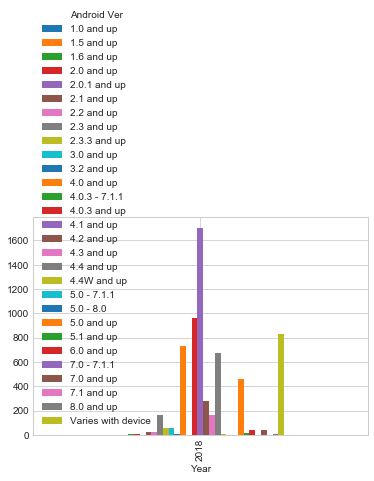

In [ ]:
plt.figure(figsize=(20,15))
cross_anv.plot(kind="bar")
plt.show()

In [ ]:
most_frequent_anv = apps["Android Ver"].value_counts().idxmax()
apps["Android Ver"].fillna(most_frequent_anv, inplace=True)

In [ ]:
apps["Android Ver"] = apps["Android Ver"].apply(lambda x: "99.99" if x == "Varies with device" else re.findall("^[0-9]\.[0-9]|[\d]|\W*",str(x))[0])

In [ ]:
apps.isna().sum()

App                           0
Category                      0
Rating                     1463
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Category Code                 0
Review_Log                    0
Install_Log                   0
Type Code                     0
Content Rating Code           0
Genres Category               0
Genres Subcategory            0
Genres Category Code          0
Genres Subcategory Code       0
Year                          0
Last Updated Day              0
dtype: int64

## Rating

In [ ]:
apps["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
apps["Rating"].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
# Basic statistics
print("Min Rating", apps.Rating.min())
print("Max Rating", apps.Rating.max())
print("Mean Rating: ", apps.Rating.mean())
print("Median Rating: ", apps.Rating.median())
print("Variance Rating: ", apps.Rating.var())
print("Standard Deviation Rating: ", apps.Rating.std())
print("25th Percentile of Rating: ", apps.Rating.quantile(.25))
print("50th Percentile of Rating: ", apps.Rating.quantile(.5))
print("75th Percentile of Rating: ", apps.Rating.quantile(.75))

Min Rating 1.0
Max Rating 5.0
Mean Rating:  4.173243045387998
Median Rating:  4.3
Variance Rating:  0.2879661012634009
Standard Deviation Rating:  0.5366247303874476
25th Percentile of Rating:  4.0
50th Percentile of Rating:  4.3
75th Percentile of Rating:  4.5


In [ ]:
apps.groupby(apps["Rating"]).size()

Rating
1.0     16
1.2      1
1.4      3
1.5      3
1.6      4
1.7      8
1.8      8
1.9     11
2.0     12
2.1      8
2.2     14
2.3     20
2.4     19
2.5     20
2.6     24
2.7     23
2.8     40
2.9     45
3.0     81
3.1     69
3.2     63
3.3    100
3.4    126
3.5    156
3.6    167
3.7    224
3.8    286
3.9    359
4.0    513
4.1    621
4.2    810
4.3    897
4.4    895
4.5    848
4.6    683
4.7    442
4.8    221
4.9     85
5.0    271
dtype: int64

In [ ]:
apps[apps["Rating"].isnull()]

App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

       Reviews  Size  Installs  Type  Price Content Rating  \
23          61   7.0    100000  Free    0.0       Everyone   
113        182   5.7    100000  Free    0.0    Everyone 10   
123        119   3.7     50000  Free    0.0       Everyone   
126        654   7.4    100000  Free    0.0           Teen   
129         77   2.9     10000  Free    0.0      Mature 17   
...        ...   ...       ...   ...    ...            ...   
10824       67  82.0     10000  Free    0.0       Everyone   
10825        7   7.7       100  Free    0.0           Teen   
10831       38   9.8      5000  Free    0.0       Everyone   
10835        0   9.6        10  Free    0.0       Everyone   
10838        3   9.5      1000  Free    0.0       Everyone   

                                Genres  ... Review_Log Install_Log Type Code  \
23     Art & Design;Action & Adventure  ...   4.110874   11.512925         0   
113                             Beauty  ...   5.204007   11.512925         0   
123                             Beauty  ...   4.779123   10.819778         0   
126                             Beauty  ...   6.483107   11.512925         0   
129                             Beauty  ...   4.343805    9.210340         0   
...                                ...  ...        ...         ...       ...   
10824                          Medical  ...   4.204693    9.210340         0   
10825                           Social  ...   1.945910    4.605170         0   
10831                Maps & Navigation  ...   3.637586    8.517193         0   
10835                         Business  ...   0.000000    2.302585         0   
10838                          Medical  ...   1.098612    6.907755         0   

       Content Rating Code    Genres Category  Genres Subcategory  \
23                       1       Art & Design  Action & Adventure   
113                      2             Beauty              Beauty   
123                      1             Beauty              Beauty   
126                      4             Beauty              Beauty   
129                      3             Beauty              Beauty   
...                    ...                ...                 ...   
10824                    1            Medical             Medical   
10825                    4             Social              Social   
10831                    1  Maps & Navigation   Maps & Navigation   
10835                    1           Business            Business   
10838                    1            Medical             Medical   

       Genres Category Code  Genres Subcategory Code  Year Last Updated Day  
23                        3                        1  2018              793  
113                       5                        6  2017              961  
123                       5                        6  2018              655  
126                       5                        6  2018              661  
129                       5                        6  2017             1004  
...                     ...                      ...   ...              ...  
10824                    26                       29  201

In [ ]:
df = apps.copy()
le = preprocessing.LabelEncoder()

In [ ]:
col = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Category Code', 'Review_Log', 'Install_Log',
       'Type Code', 'Content Rating Code', 'Genres Category',
       'Genres Subcategory', 'Genres Category Code', 'Genres Subcategory Code',
       'Year', 'Last Updated Day']
df = df[col]
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres  ... Review_Log Install_Log Type Code  \
0               Art & Design  ...   5.068904    9.210340         0   
1  Art & Design;Pretend Play  ...   6.874198   13.122363         0   
2               Art & Design  ...  11.379508   15.424948         0   
3               Art & Design  ...  12.281384   17.727534         0   
4    Art & Design;Creativity  ...   6.874198   11.512925         0   

   Content Rating Code  Genres Category  Genres Subcategory  \
0                    1     Art & Design        Art & Design   
1                    1     Art & Design        Pretend Play   
2                    1     Art & Design        Art & Design   
3                    4     Art & Design        Art & Design   
4                    1     Art & Design          Creativity   

   Genres Category Code  Genres Subcategory Code  Year Last Updated Day  
0                     3                        4  2018              852  
1                     3                       36  2018              844  
2                     3                        4  2018              646  
3                     3                        4  2018              700  
4                     3                       16  2018              688  

[5 rows x 24 columns]

In [ ]:
def one_hot_encode_by_label(df, labels):
    df_new = deepcopy(df)
    for label in labels:
        df_dummies = df_new[label].str.get_dummies(sep = ';')
        df_new = df_new.drop(labels=label,axis=1).join(df_dummies)
    return df_new

In [ ]:
one_hot_encode = ["Category"]
df = one_hot_encode_by_label(df, one_hot_encode)

In [ ]:
cols = ["App", "Last Updated", "Current Ver", "Android Ver"]
df[cols] = df[cols].apply(lambda col: le.fit_transform(col))
df.drop(["Genres", "Genres Category", "Genres Subcategory", "Content Rating", "Type"], axis=1, inplace=True)

In [ ]:
imputer = KNNImputer(n_neighbors=10)
df_filled = imputer.fit_transform(df)
df_filled = pd.DataFrame(df_filled, index=apps.index)
df_filled.columns = df.columns

In [ ]:
apps.drop("Rating", axis=1, inplace=True)
apps = pd.concat([apps, df_filled["Rating"]], axis=1)
apps.sample(3)

App Category  Reviews       Size  Installs  \
2296   EMT Tutor NREMT-B Study Guide  MEDICAL      625   8.400000     10000   
10409     studentsLife by FH Kärnten   FAMILY      108  27.187988      5000   
325    Manga AZ - Manga Comic Reader   COMICS      125   4.700000      5000   

       Type  Price Content Rating     Genres Last Updated  ... Install_Log  \
2296   Paid   3.99       Everyone    Medical   2017-01-08  ...    9.210340   
10409  Free   0.00       Everyone  Education   2018-03-30  ...    8.517193   
325    Free   0.00           Teen     Comics   2018-07-24  ...    8.517193   

      Type Code  Content Rating Code  Genres Category  Genres Subcategory  \
2296          1                    1          Medical             Medical   
10409         0                    1        Education           Education   
325           0                    4           Comics              Comics   

       Genres Category Code  Genres Subcategory Code  Year Last Updated Day  \
2296                     26                       29  2017             1216   
10409                    15                       18  2018              770   
325                      12                       14  2018              654   

       Rating  
2296      4.6  
10409     4.4  
325       3.3  

[3 rows x 24 columns]

In [ ]:
'''
# fill NA
mean_Rating = np.mean(apps.Rating)
apps["Rating"] = apps["Rating"].fillna(mean_Rating)
'''

'\n# fill NA\nmean_Rating = np.mean(apps.Rating)\napps["Rating"] = apps["Rating"].fillna(mean_Rating)\n'

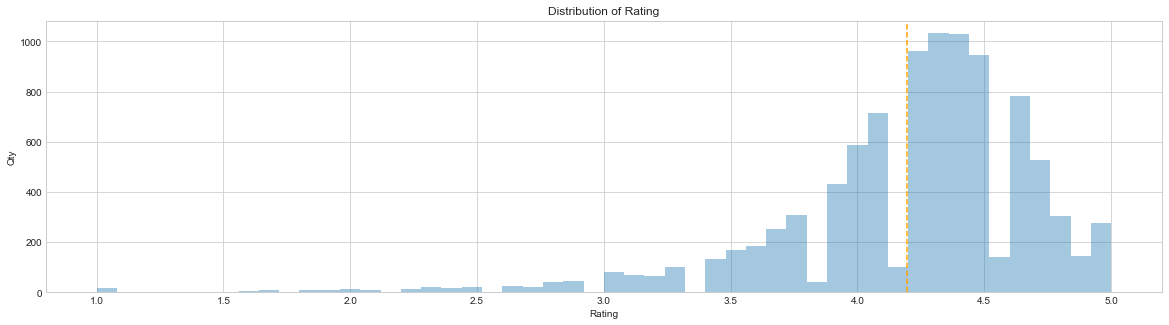

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(apps["Rating"], kde=False)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Qty")
plt.axvline(x=apps.Rating.mean(), color="orange", linestyle="--")
plt.show()

Text(0.5, 1.0, 'Distribution of Rating for Free/Paid Apps')

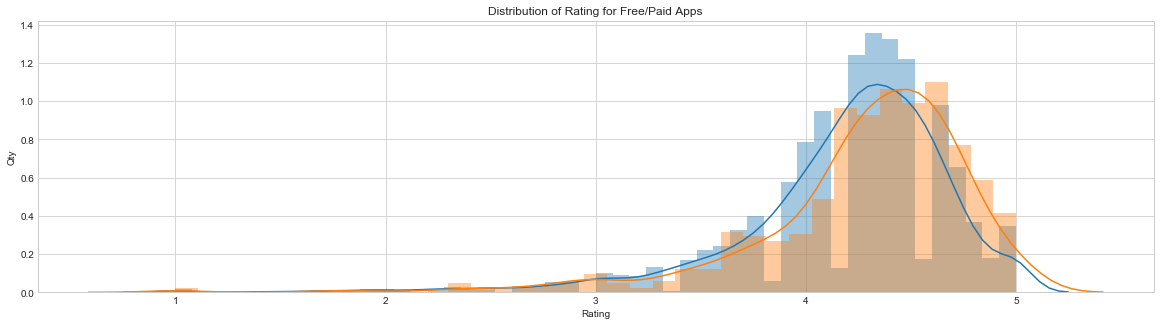

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(apps.Rating[apps.Type=='Free'], label='Free')
sns.distplot(apps.Rating[apps.Type=='Paid'], label='Paid')
plt.xlabel('Rating')
plt.ylabel('Qty')
plt.title("Distribution of Rating for Free/Paid Apps")

## Reviews 

<Figure size 720x720 with 0 Axes>

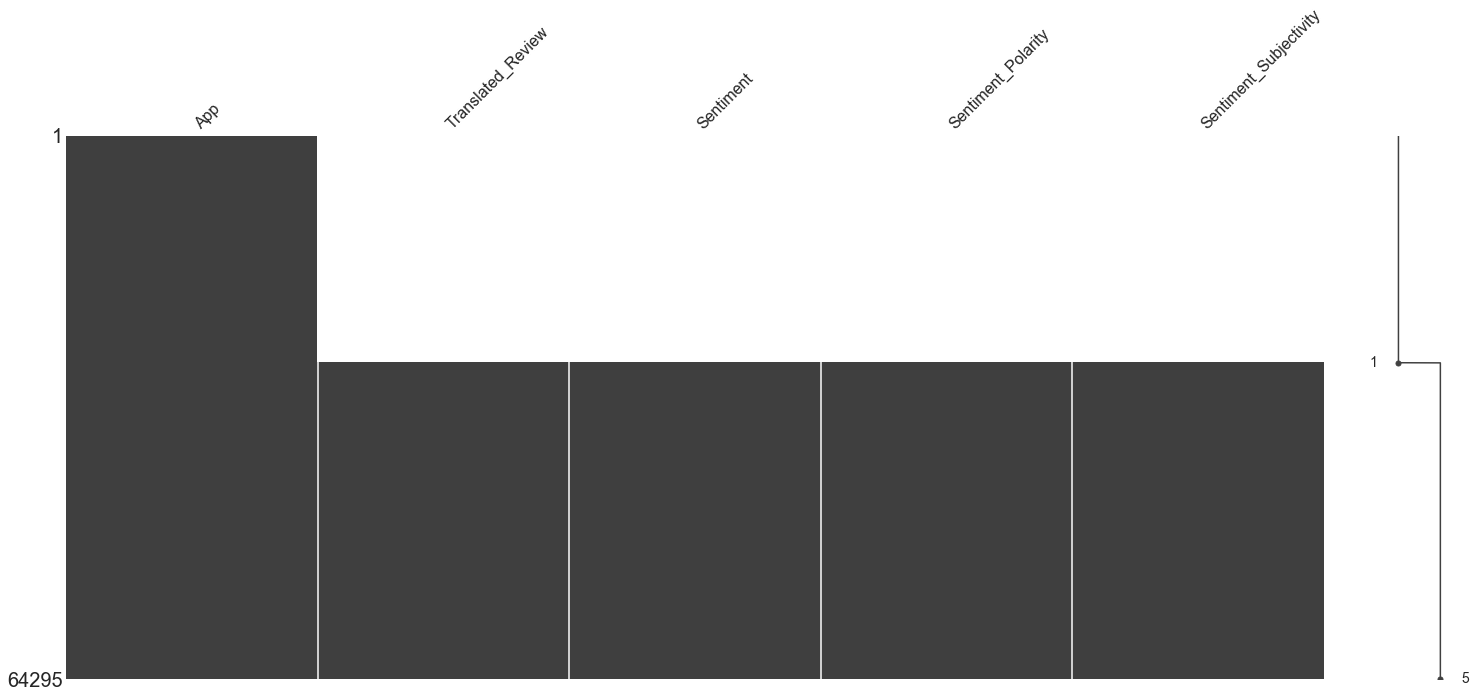

In [ ]:
plt.figure(figsize=(10,10))
missingno.matrix(reviews, sort="ascending")
plt.show()

In [ ]:
a = apps[["App", "Category"]]
diff_df = pd.merge(reviews, a, on="App", how="left")
diff_df.drop_duplicates(inplace=True)
diff_df.dropna(axis=0, inplace=True)
diff_df.sample(5)

App  \
11279  Baby ABC in box! Kids alphabet games for toddl...   
51249         GO Keyboard - Cute Emojis, Themes and GIFs   
18420                               Bubble Shooter Space   
2885                            AOL - News, Mail & Video   
51706                                     GRE Flashcards   

                                       Translated_Review Sentiment  \
11279  It's really fun entertaining makes kids laugh ...  Positive   
51249                                          Im friend   Neutral   
18420                                   Very interesting  Positive   
2885                 Email text content load. All blank.   Neutral   
51706  The great. No doubt. Just that, learning long ...  Positive   

       Sentiment_Polarity  Sentiment_Subjectivity            Category  
11279                0.50                    0.43              FAMILY  
51249                0.00                    0.00               TOOLS  
18420                0.65                    0.65                GAME  
2885                 0.00                    0.00  NEWS_AND_MAGAZINES  
51706                0.17                    0.69           EDUCATION

# Exploratory Data Analysis

### Overall Categories of Apps

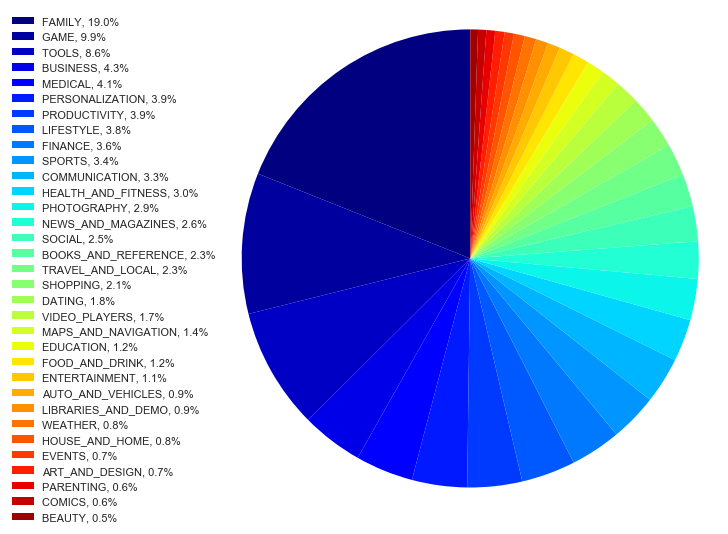

In [ ]:
category = apps["Category"].value_counts()
sizes = category.values
labels = category.index

fig1, ax1 = plt.subplots(figsize=(10,7))
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('jet')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
 
_, _ = ax1.pie(sizes, startangle=90, radius=1800)
 
ax1.axis('equal')
 
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100)
            for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
 
plt.show()

### Top Categories of Apps by Google Play Store Installs

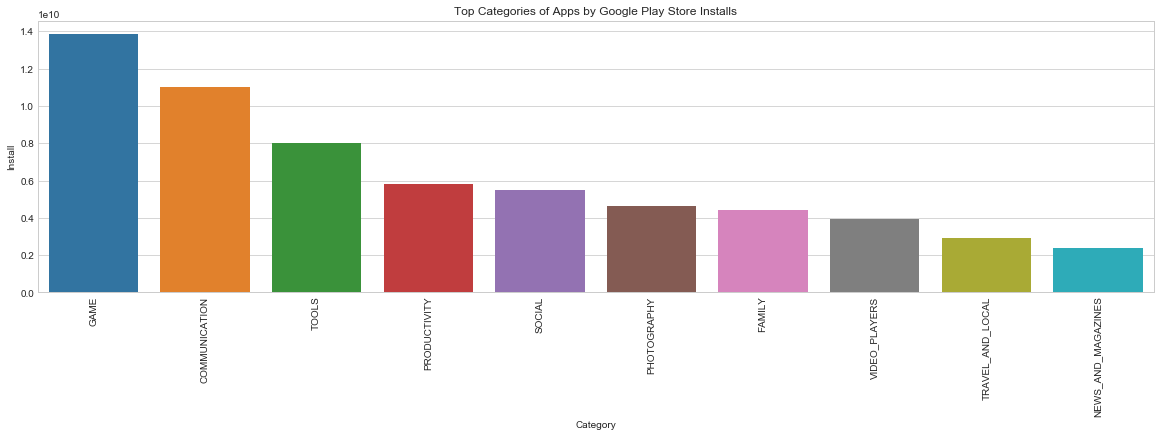

In [ ]:
cate_group = apps.groupby(["Category"]).sum()
cate_install = cate_group.sort_values("Installs", ascending=False).reset_index()

top10in = cate_install[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Category", y="Installs", data=top10in)
plt.xticks(rotation=90)
plt.title("Top Categories of Apps by Google Play Store Installs")
plt.xlabel("Category")
plt.ylabel("Install")
plt.show()

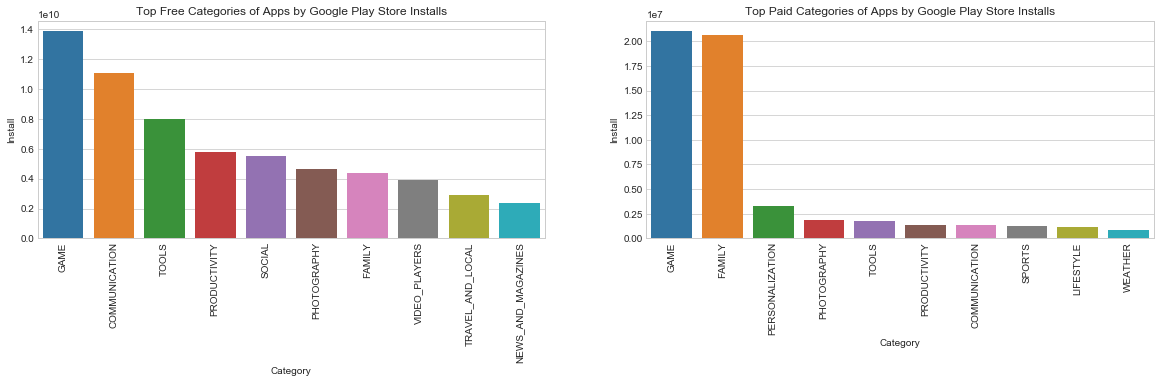

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
free_df = apps[apps.Type == "Free"]
free_cat_df = free_df.groupby(["Category"]).sum()
free_cat_in_df = free_cat_df.sort_values("Installs", ascending=False).reset_index()
sns.barplot(x="Category", y="Installs", data=free_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Free Categories of Apps by Google Play Store Installs")
plt.xlabel("Category")
plt.ylabel("Install")

plt.subplot(1, 2, 2)
paid_df = apps[apps.Type == "Paid"]
paid_cat_df = paid_df.groupby(["Category"]).sum()
paid_cat_in_df = paid_cat_df.sort_values("Installs", ascending=False).reset_index()
sns.barplot(x="Category", y="Installs", data=paid_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Paid Categories of Apps by Google Play Store Installs")
plt.xlabel("Category")
plt.ylabel("Install")
plt.show()

In [ ]:
Install_MMM = apps.groupby(["Category"])["Install_Log"].agg(["min", "max", "mean"]).reset_index()
diff_inmmm = pd.merge(apps, Install_MMM, left_on='Category', right_on='Category')
diff_inmmm = diff_inmmm.groupby(['Category'])['min', 'max', 'mean'].sum()
diff_inmmm = diff_inmmm.sort_values(by=['max'],ascending=False)
diff_inmmmh = diff_inmmm.head(10)

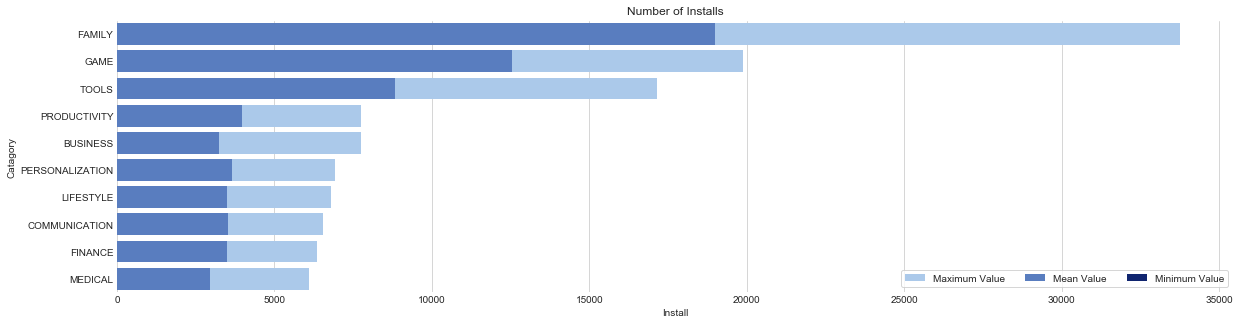

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20, 5))

sns.set_color_codes("pastel")
sns.barplot(x=diff_inmmmh["max"], y=diff_inmmmh.index, label="Maximum Value", color="b")

sns.set_color_codes("muted")
sns.barplot(x=diff_inmmmh["mean"], y=diff_inmmmh.index, label="Mean Value", color="b")

sns.set_color_codes("dark")
sns.barplot(x=diff_inmmmh["min"], y=diff_inmmmh.index, label="Minimum Value", color="b")

ax1.legend(ncol=3, loc="lower right", frameon=True)
ax1.set(xlabel="Install", ylabel="Catagory")
ax1.set(title="Number of Installs")
sns.despine(left=True, bottom=True)

### Top Categories of Apps by Google Play Store Ratings

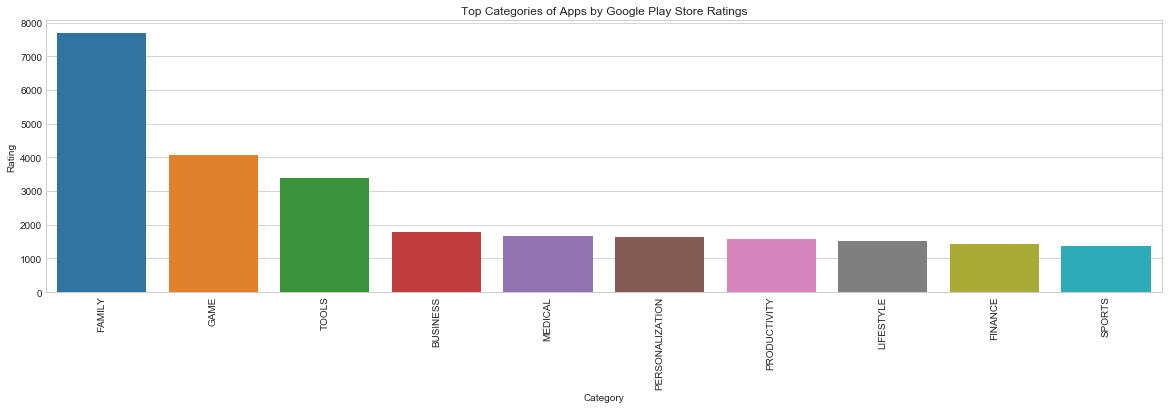

In [ ]:
cate_rating = cate_group.sort_values("Rating", ascending=False).reset_index()

top10rt = cate_rating[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Category", y="Rating", data=top10rt)
plt.xticks(rotation=90)
plt.title("Top Categories of Apps by Google Play Store Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

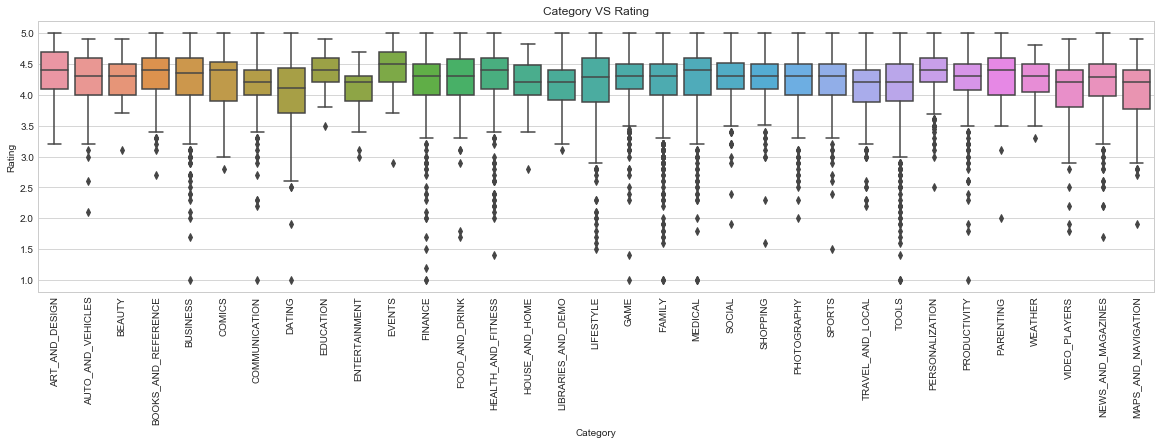

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x="Category", y="Rating", data=apps)
plt.title("Category VS Rating")
plt.xticks(rotation=90)
plt.show()

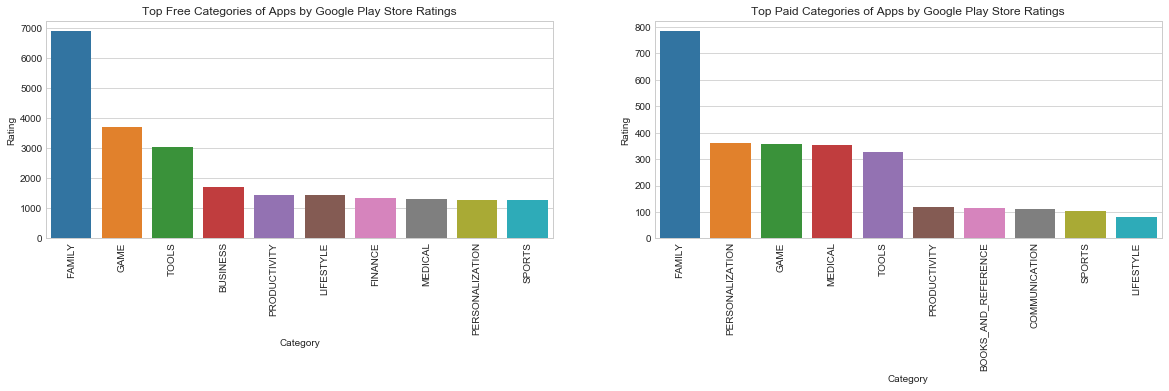

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
free_cat_df = free_df.groupby(["Category"]).sum()
free_cat_in_df = free_cat_df.sort_values("Rating", ascending=False).reset_index()
sns.barplot(x="Category", y="Rating", data=free_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Free Categories of Apps by Google Play Store Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")

plt.subplot(1, 2, 2)
paid_cat_df = paid_df.groupby(["Category"]).sum()
paid_cat_in_df = paid_cat_df.sort_values("Rating", ascending=False).reset_index()
sns.barplot(x="Category", y="Rating", data=paid_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Paid Categories of Apps by Google Play Store Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

In [ ]:
dataset_bin = apps.copy()
dataset_bin["Rating"] = pd.cut(apps["Rating"], 5)
install_rating = dataset_bin.groupby(["Category", "Rating", "Type"])["App"].agg(['count']).reset_index()

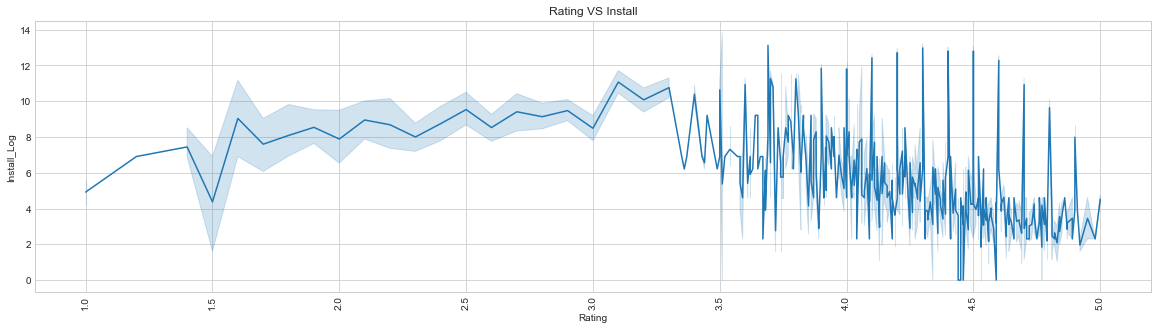

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x="Rating", y="Install_Log", data=apps)
plt.title("Rating VS Install")
plt.xticks(rotation=90)
plt.show()

### Top Categories of Apps by Google Play Store Reviews

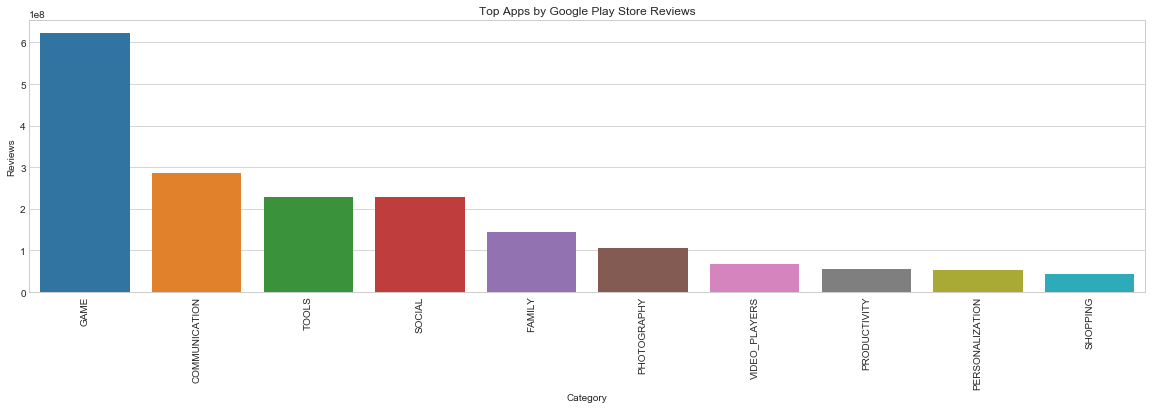

In [ ]:
cate_review = cate_group.sort_values("Reviews", ascending=False).reset_index()

top10rv = cate_review[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Category", y="Reviews", data=top10rv)
plt.xticks(rotation=90)
plt.title("Top Apps by Google Play Store Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.show()

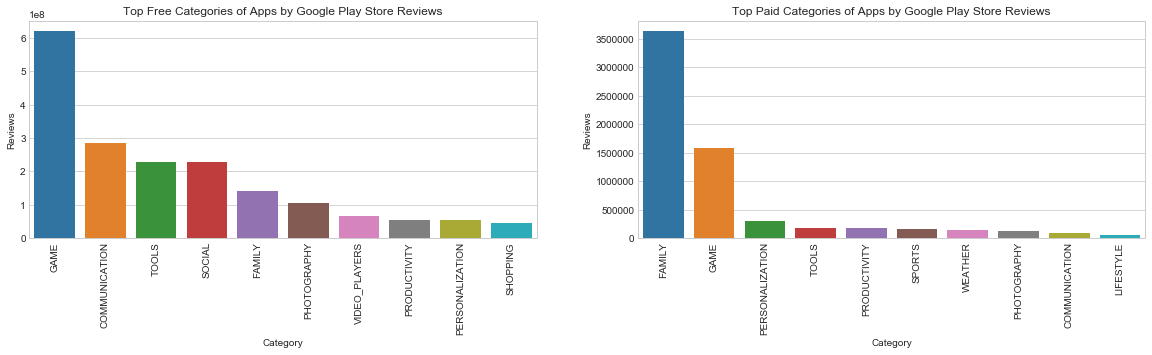

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
free_cat_df = free_df.groupby(["Category"]).sum()
free_cat_in_df = free_cat_df.sort_values("Reviews", ascending=False).reset_index()
sns.barplot(x="Category", y="Reviews", data=free_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Free Categories of Apps by Google Play Store Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")

plt.subplot(1, 2, 2)
paid_cat_df = paid_df.groupby(["Category"]).sum()
paid_cat_in_df = paid_cat_df.sort_values("Reviews", ascending=False).reset_index()
sns.barplot(x="Category", y="Reviews", data=paid_cat_in_df[:10])
plt.xticks(rotation=90)
plt.title("Top Paid Categories of Apps by Google Play Store Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.show()

In [ ]:
Review_MMM = apps.groupby(["Category"])["Reviews"].agg(["min", "max", "mean"]).reset_index()
diff_remmmh = pd.merge(apps, Review_MMM, left_on='Category', right_on='Category')
diff_remmmh = diff_remmmh.groupby(["Category"])["Reviews", "min", "max", "mean"].sum()
diff_remmmh = diff_remmmh.sort_values(by=["max"], ascending=False)
diff_remmmh = diff_remmmh.head(10)

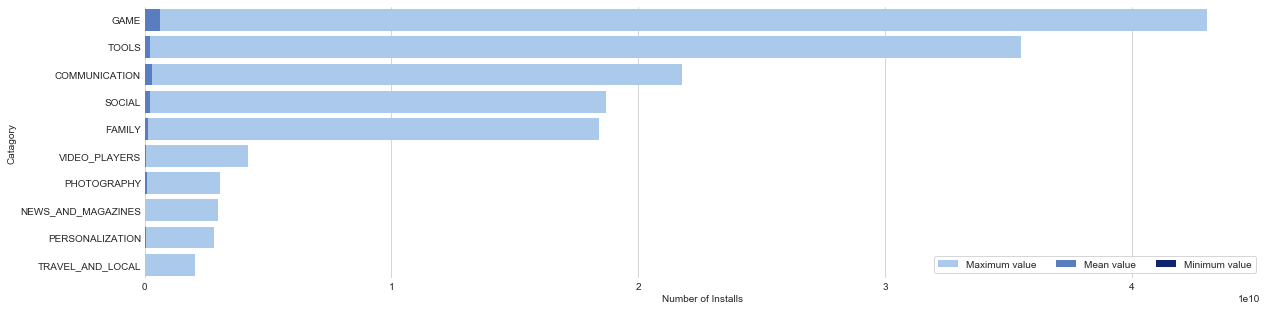

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20, 5))

sns.set_color_codes("pastel")
sns.barplot(x=diff_remmmh["max"], y=diff_remmmh.index, label="Maximum value", color="b")

sns.set_color_codes("muted")
sns.barplot(x=diff_remmmh["mean"], y=diff_remmmh.index, label="Mean value", color="b")

sns.set_color_codes("dark")
sns.barplot(x=diff_remmmh["min"], y=diff_remmmh.index, label="Minimum value", color="b")

ax1.legend(ncol=3, loc="lower right", frameon=True)
ax1.set(xlabel="Number of Installs", ylabel="Catagory")
sns.despine(left=True, bottom=True)

### Review VS Rating

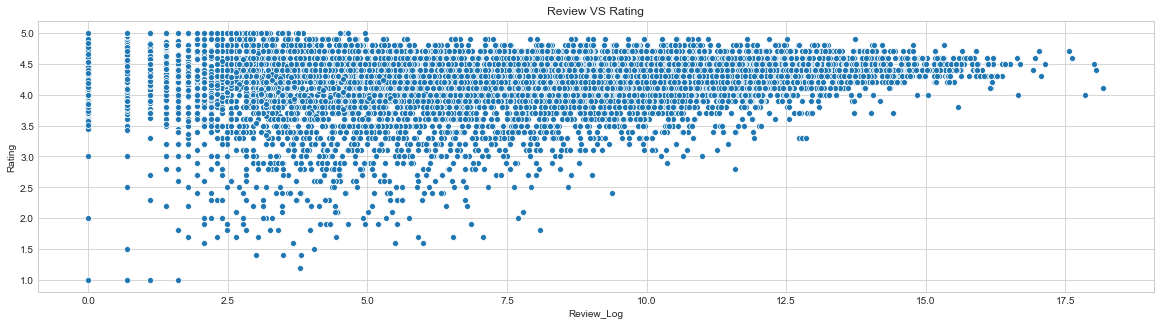

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Review_Log", y="Rating", data=apps)
plt.title("Review VS Rating")
plt.show()

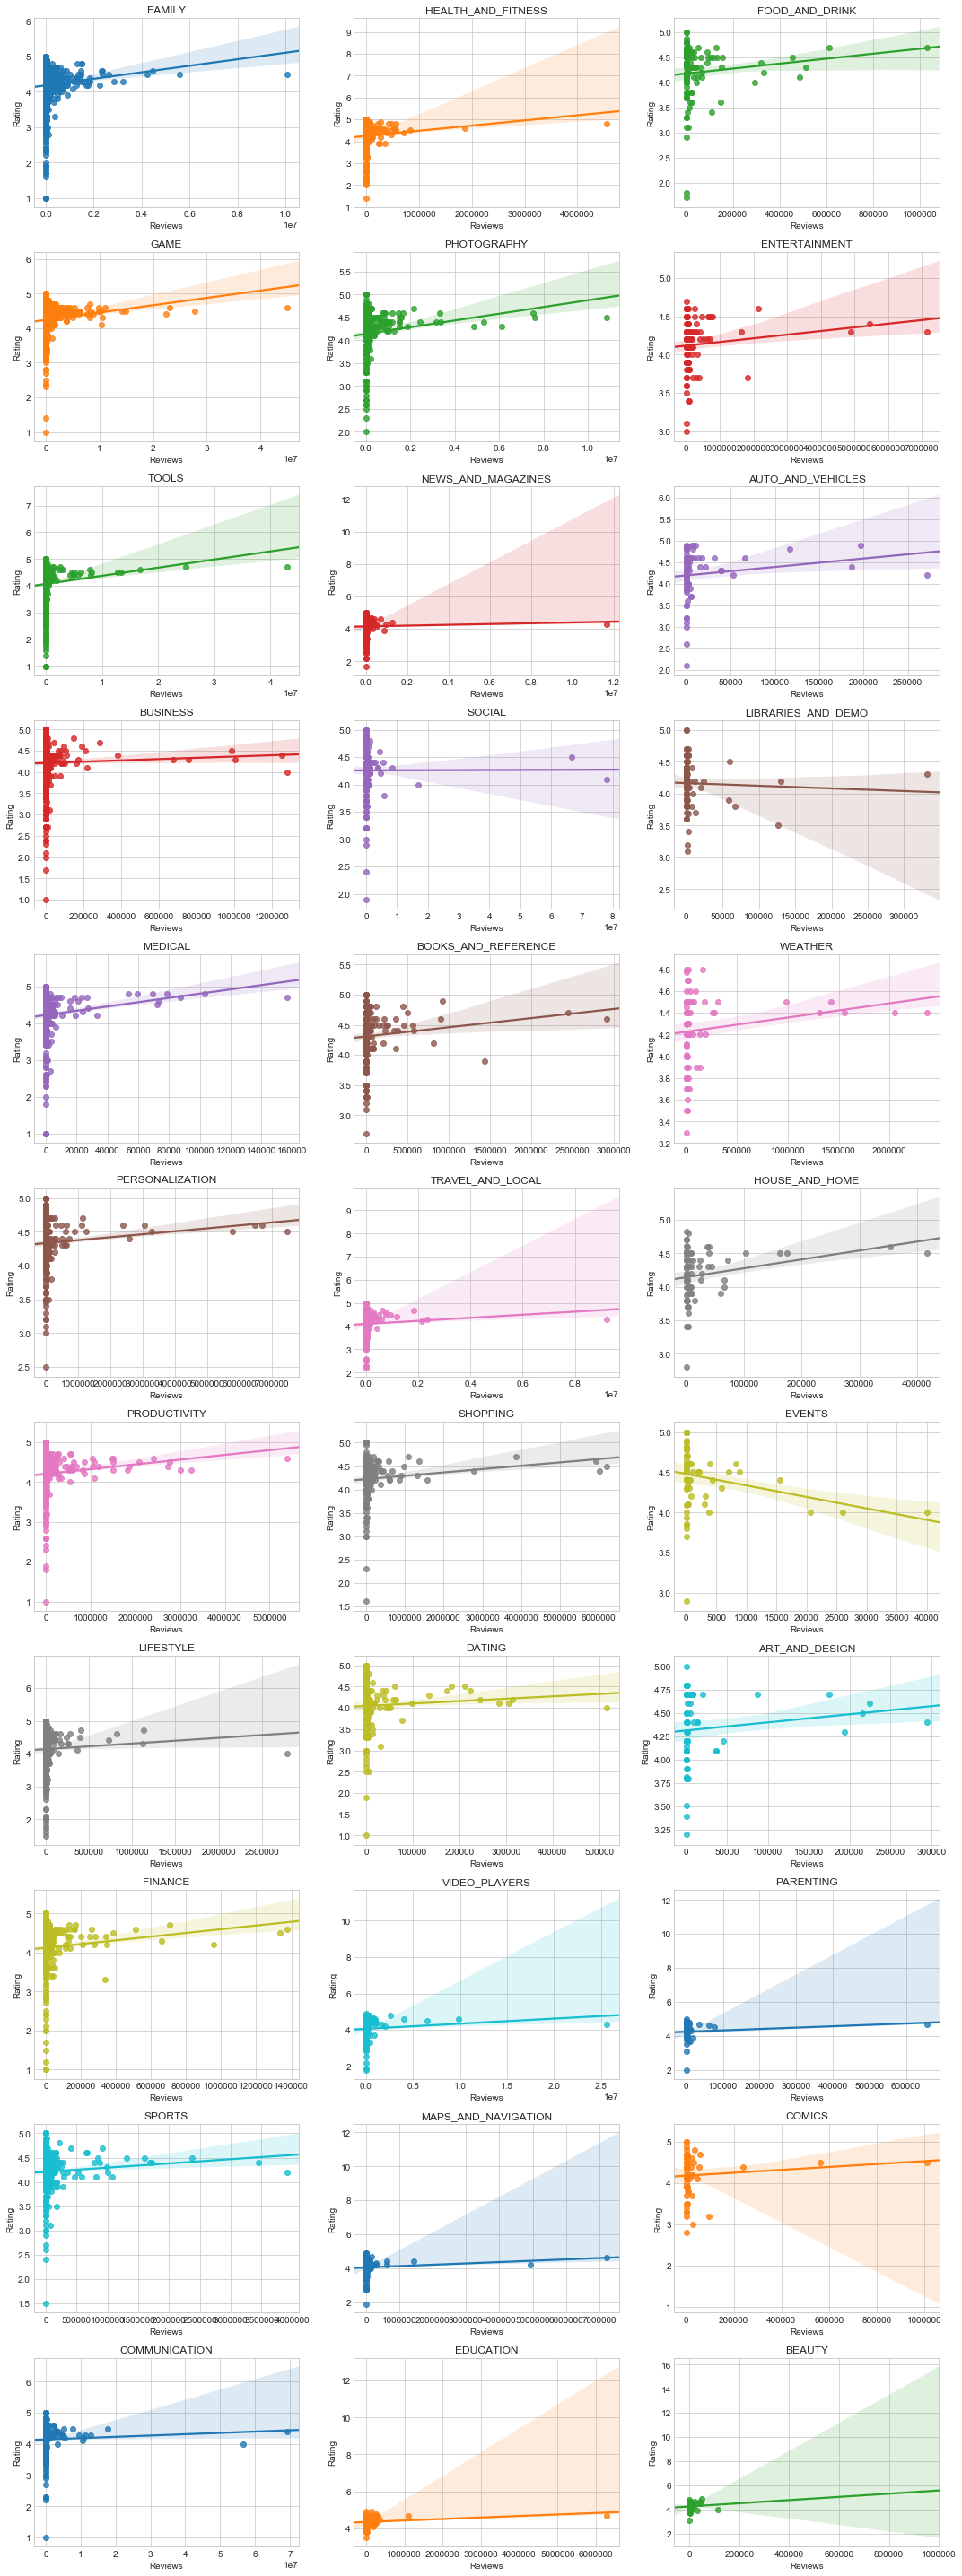

In [ ]:
zero = [0] * 11
one = [1] * 11
two = [2] * 11
flat_colax = zero + one + two

rowax = [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rowax = rowax *3

fig1, ax = plt.subplots(11, 3, figsize=(15, 40))

category = apps['Category'].value_counts().index

for i in range(0,33):
    sns.regplot(apps[apps['Category'] == category[i]]['Reviews'],
                apps[apps['Category'] == category[i]]['Rating'],
                ax=ax[rowax[i], flat_colax[i]]).set_title(category[i])

plt.tight_layout()
plt.show()

### Review VS Install

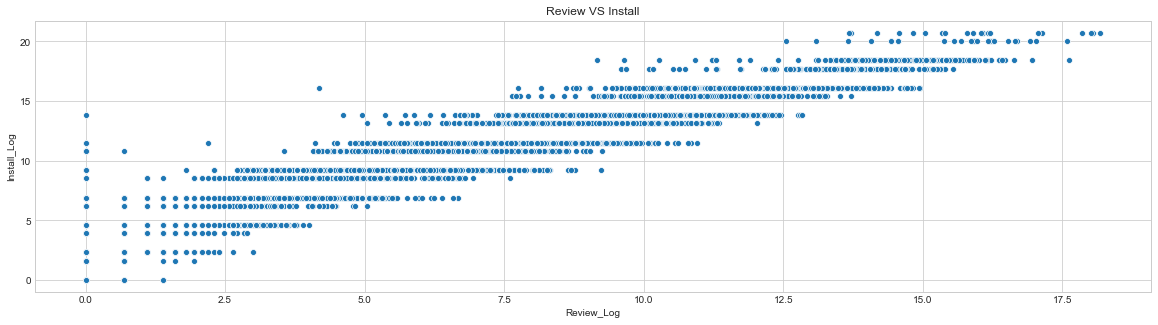

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x="Review_Log", y="Install_Log", data=apps)
plt.title("Review VS Install")
plt.show()

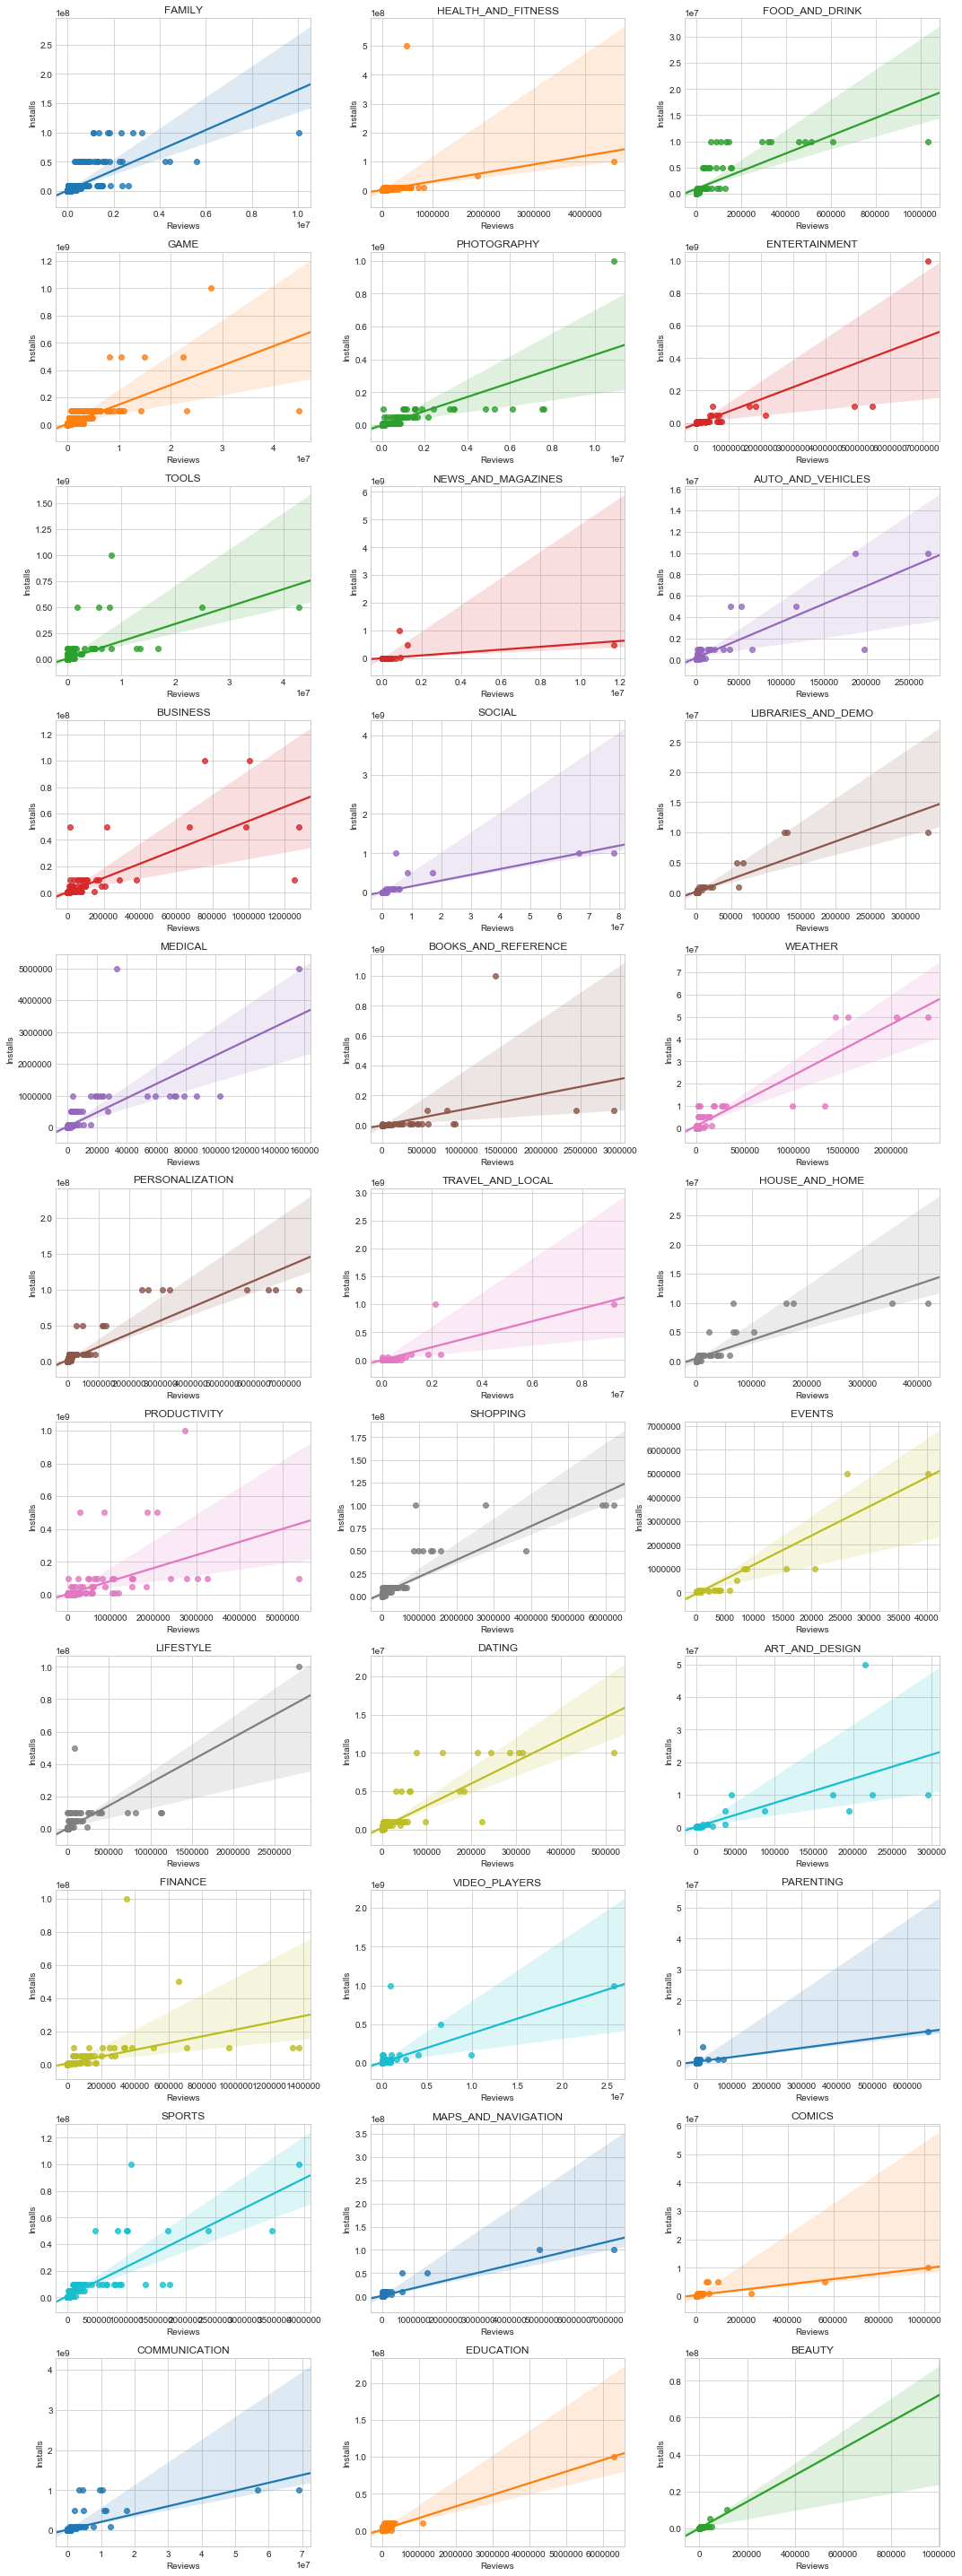

In [ ]:
zero = [0] * 11
one = [1] * 11
two = [2] * 11
flat_colax = zero + one + two

rowax = [0 ,1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rowax = rowax *3

fig1, ax = plt.subplots(11, 3, figsize=(15, 40))

category = apps['Category'].value_counts().index

for i in range(0,33):
    sns.regplot(apps[apps['Category'] == category[i]]['Reviews'],
                apps[apps['Category'] == category[i]]['Installs'],
                ax=ax[rowax[i], flat_colax[i]]).set_title(category[i])

plt.tight_layout()
plt.show()

### Top Categories of Apps by Google Play Store Price

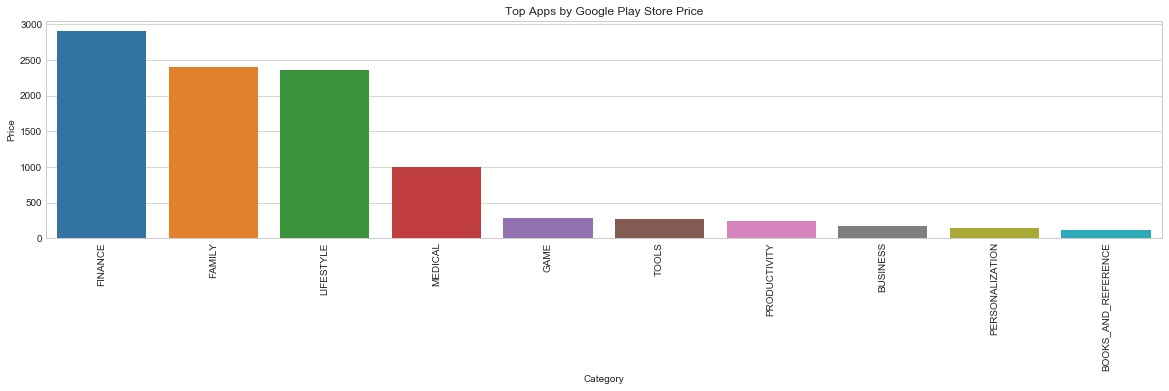

In [ ]:
cate_price = cate_group.sort_values("Price", ascending=False).reset_index()

top10pc = cate_price[:10]

plt.figure(figsize=(20,4))
sns.barplot(x="Category", y="Price", data=top10pc)
plt.title("Top Apps by Google Play Store Price")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

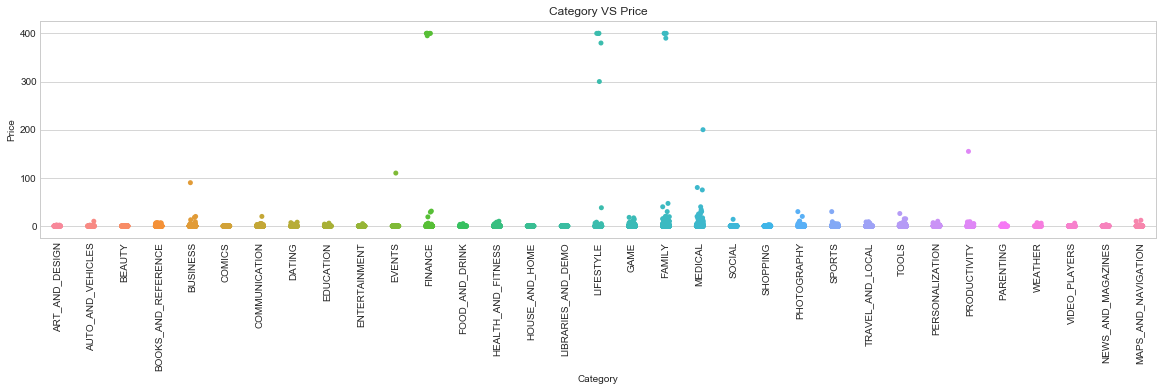

In [ ]:
plt.figure(figsize=(20,4))
sns.stripplot(x="Category", y="Price", data=apps)
plt.xticks(rotation=90)
plt.title("Category VS Price")
plt.show()

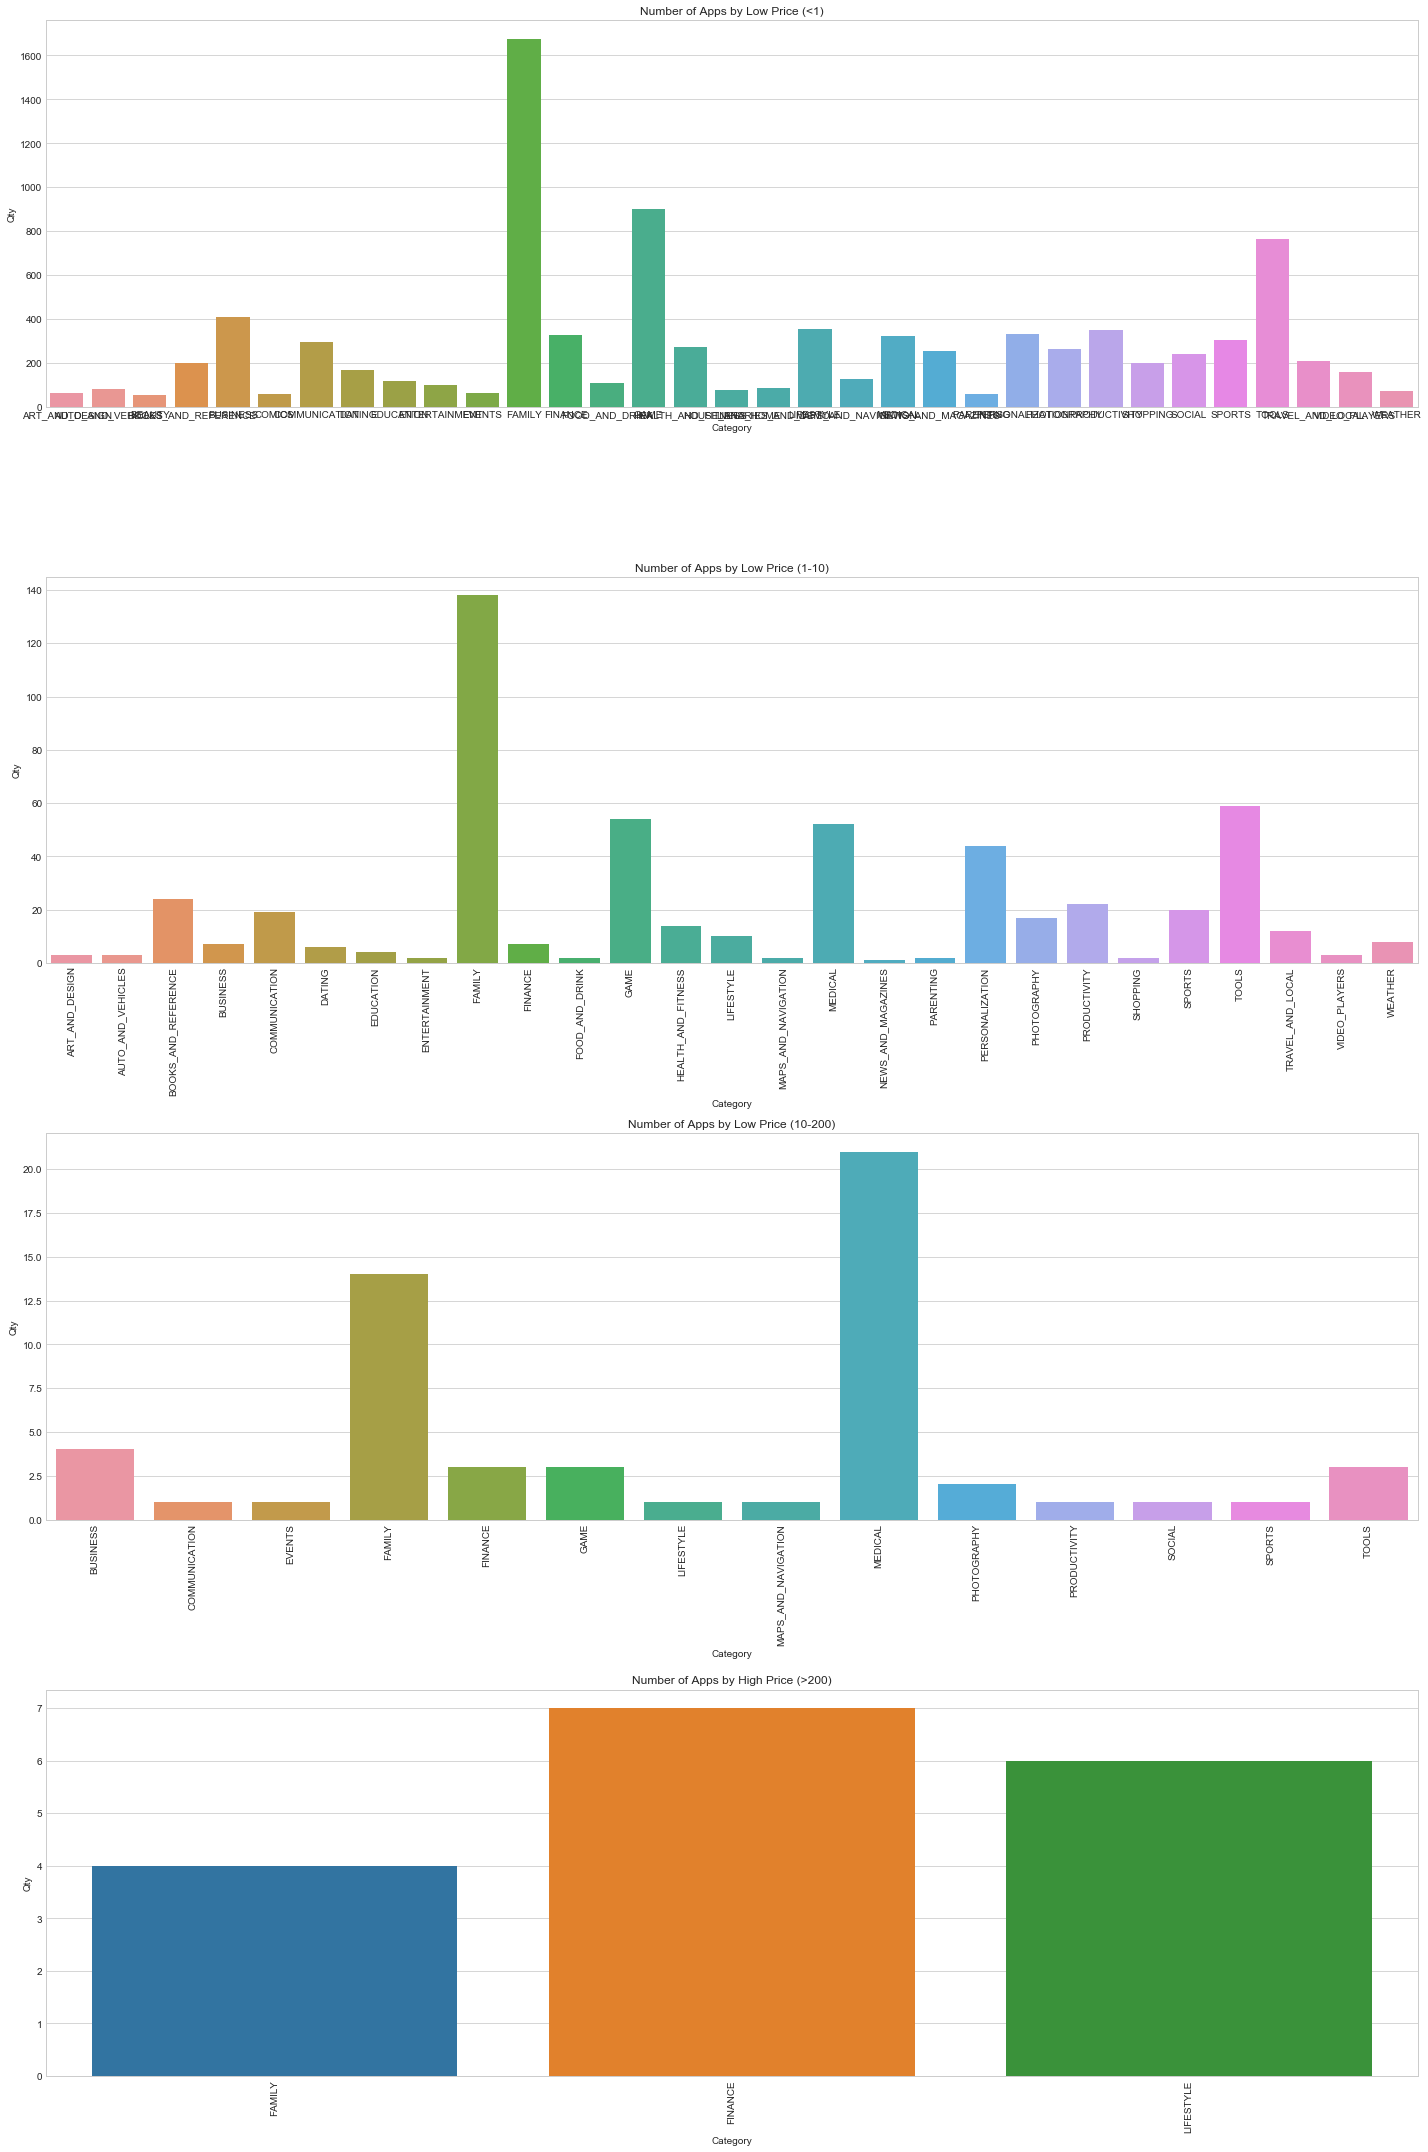

In [ ]:
f, ax = plt.subplots(4, 1, figsize=(20,30))

#App high price < 1
apps_highp = apps[['Category', 'App']][apps.Price < 1].groupby(["Category"], as_index=False).count()
ax1 = sns.barplot(x="Category", y="App", data=apps_highp, ax=ax[0])

#App high price < 10
apps_highp = apps[['Category', 'App']][(apps.Price <= 10) & (apps.Price >= 1)].groupby(["Category"], as_index=False).count()
ax2 = sns.barplot(x="Category", y="App", data=apps_highp, ax=ax[1])

#App high price < 10
apps_highp = apps[['Category', 'App']][(apps.Price <= 200) & (apps.Price > 10)].groupby(["Category"], as_index=False).count()
ax3 = sns.barplot(x="Category", y="App", data=apps_highp, ax=ax[2])

#App high price > 200
apps_highp = apps[['Category', 'App']][apps.Price > 200].groupby(["Category"], as_index=False).count()
ax4 = sns.barplot(x="Category", y="App", data=apps_highp, ax=ax[3])

ax1.tick_params(axis="x")
ax2.tick_params(axis="x", rotation=90)
ax3.tick_params(axis="x", rotation=90)
ax4.tick_params(axis="x", rotation=90)

ax1.set_title("Number of Apps by Low Price (<1)")
ax2.set_title("Number of Apps by Low Price (1-10)")
ax3.set_title("Number of Apps by Low Price (10-200)")
ax4.set_title("Number of Apps by High Price (>200)")

ax1.set_xlabel("Category")
ax2.set_xlabel("Category")
ax3.set_xlabel("Category")
ax4.set_xlabel("Category")

ax1.set_ylabel("Qty")
ax2.set_ylabel("Qty")
ax3.set_ylabel("Qty")
ax4.set_ylabel("Qty")

plt.tight_layout()
plt.show()

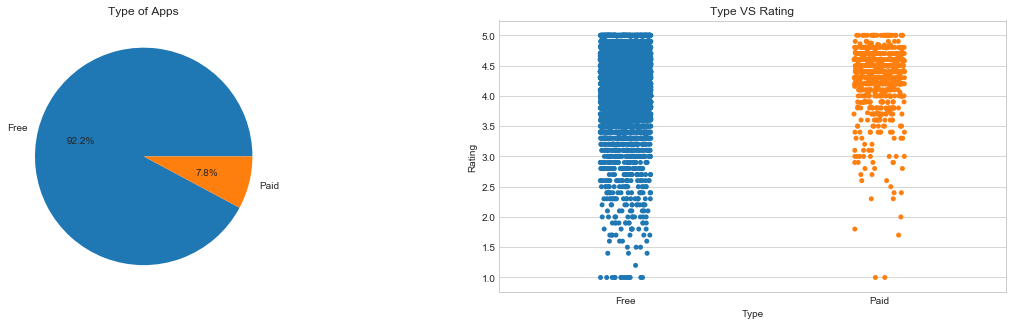

In [ ]:
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
plt.pie(apps["Type"].value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.title("Type of Apps")

plt.subplot(1, 2, 2)
#dataset_bin["Rating"] = pd.cut(apps["Rating"], 5)
#sns.catplot(x="Rating", y="Price", hue="Type", data=dataset_bin)
sns.stripplot(x="Type", y="Rating", data=apps)
plt.title("Type VS Rating")
plt.show()

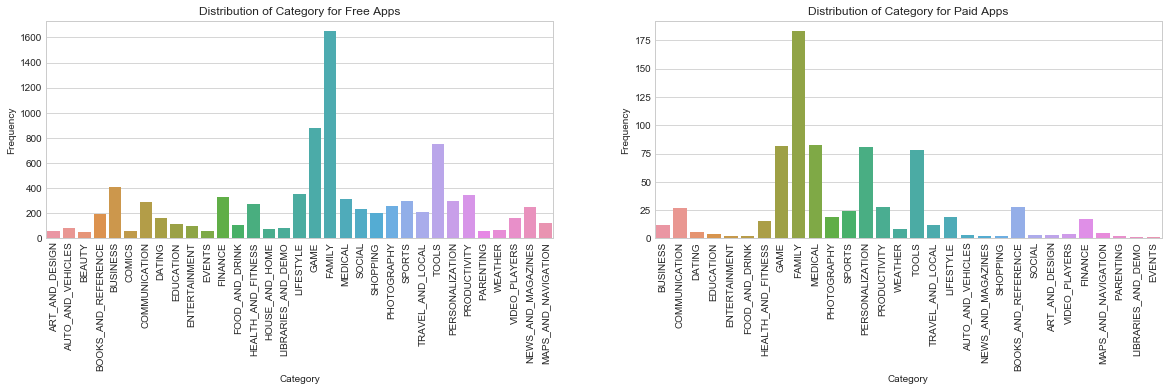

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
free_apps = apps[apps.Type == "Free"]
sns.countplot(x="Category",data=free_apps)
plt.xticks(rotation=90)
plt.title("Distribution of Category for Free Apps")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
paid_apps = apps[apps.Type == "Paid"]
sns.countplot(x="Category",data=paid_apps)
plt.xticks(rotation=90)
plt.title("Distribution of Category for Paid Apps")
plt.ylabel("Frequency")

plt.show()

In [ ]:
install_df = apps.loc[:, ["App", "Category", "Rating", "Price", "Installs"]]
install_df = install_df.sort_values(by="Installs", ascending=False)
install_df

App             Category  Rating   Price  \
336          WhatsApp Messenger        COMMUNICATION    4.40    0.00   
152           Google Play Books  BOOKS_AND_REFERENCE    3.90    0.00   
1654             Subway Surfers                 GAME    4.50    0.00   
3117  Maps - Navigate & Explore     TRAVEL_AND_LOCAL    4.30    0.00   
340                       Gmail        COMMUNICATION    4.30    0.00   
...                         ...                  ...     ...     ...   
9917                Eu Sou Rico              FINANCE    4.40  394.99   
6692              cronometra-br         PRODUCTIVITY    4.56  154.99   
5486     AP Series Solution Pro               FAMILY    4.45    1.99   
9719               EP Cook Book              MEDICAL    4.40  200.00   
9148  Command & Conquer: Rivals               FAMILY    4.45    0.00   

        Installs  
336   1000000000  
152   1000000000  
1654  1000000000  
3117  1000000000  
340   1000000000  
...          ...  
9917           0  
6692           0  
5486           0  
9719           0  
9148           0  

[9659 rows x 5 columns]

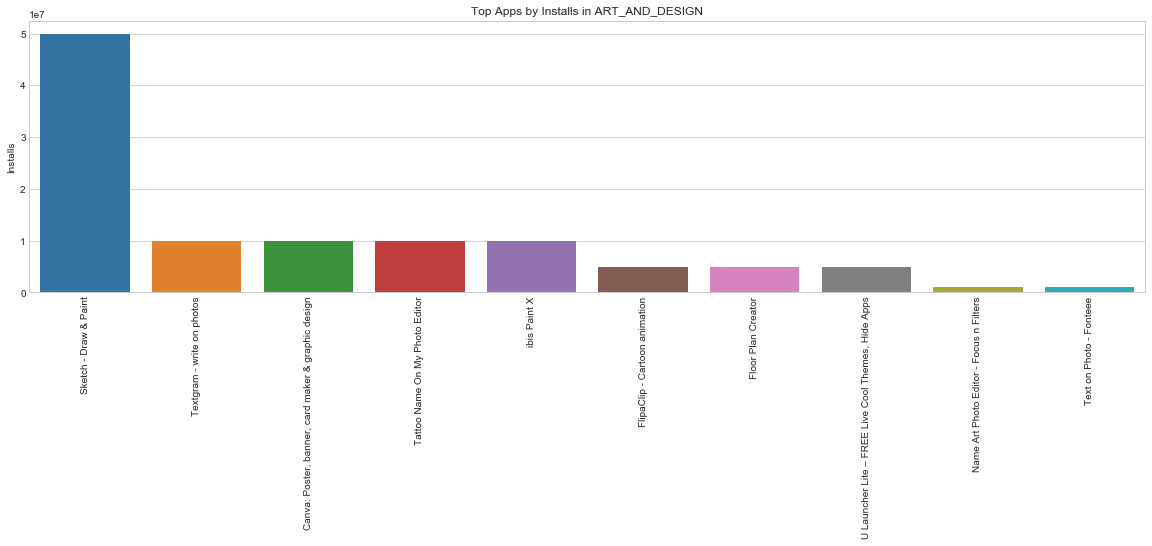

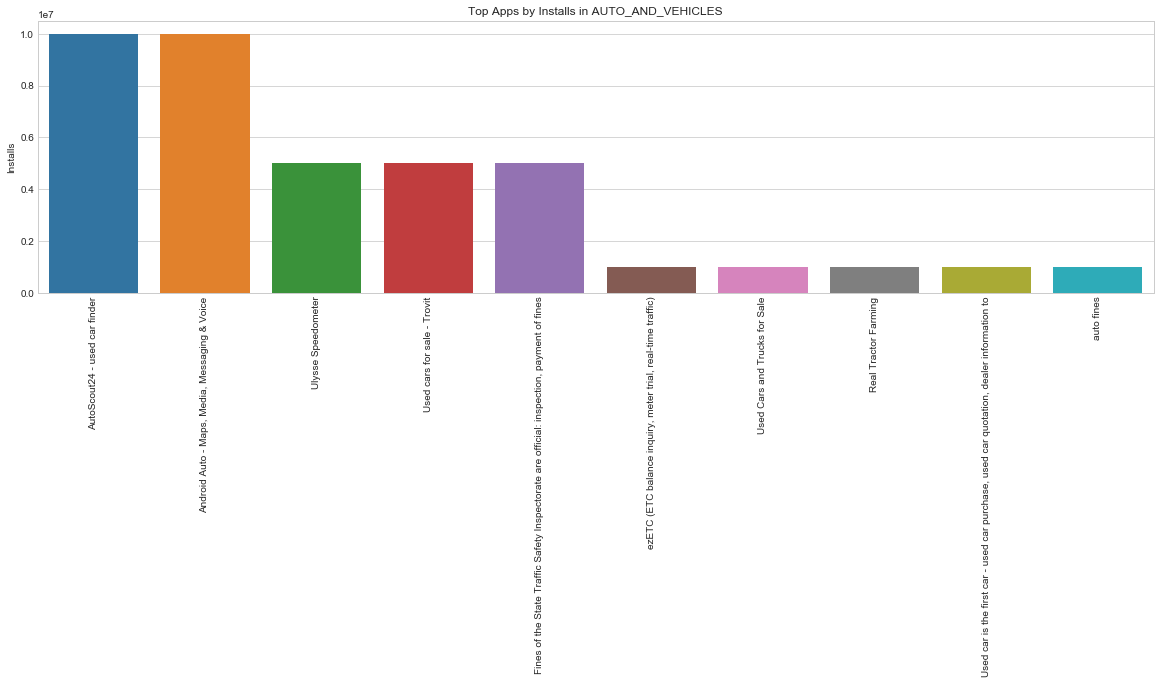

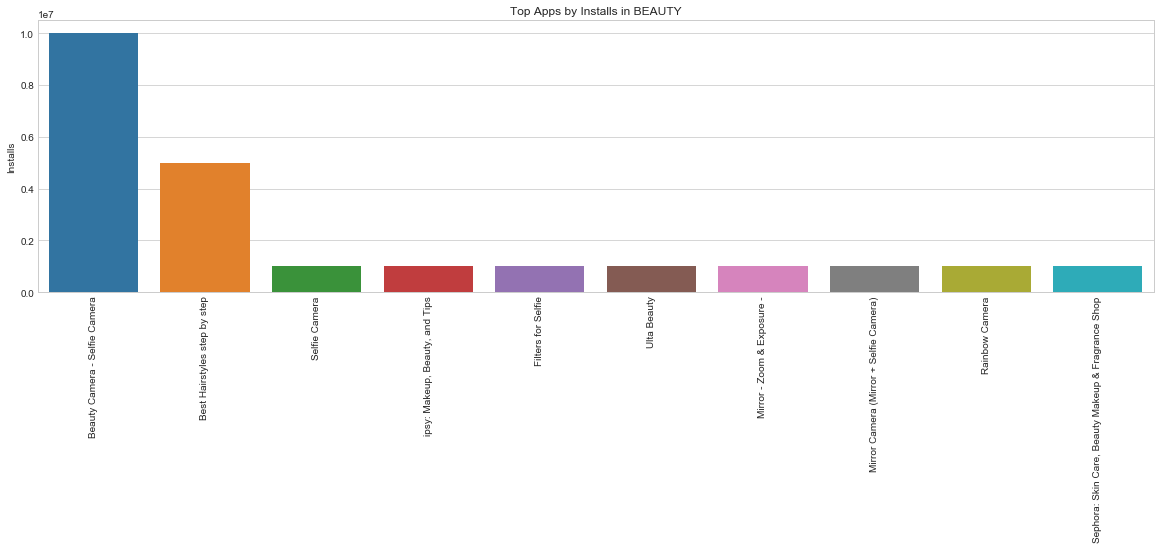

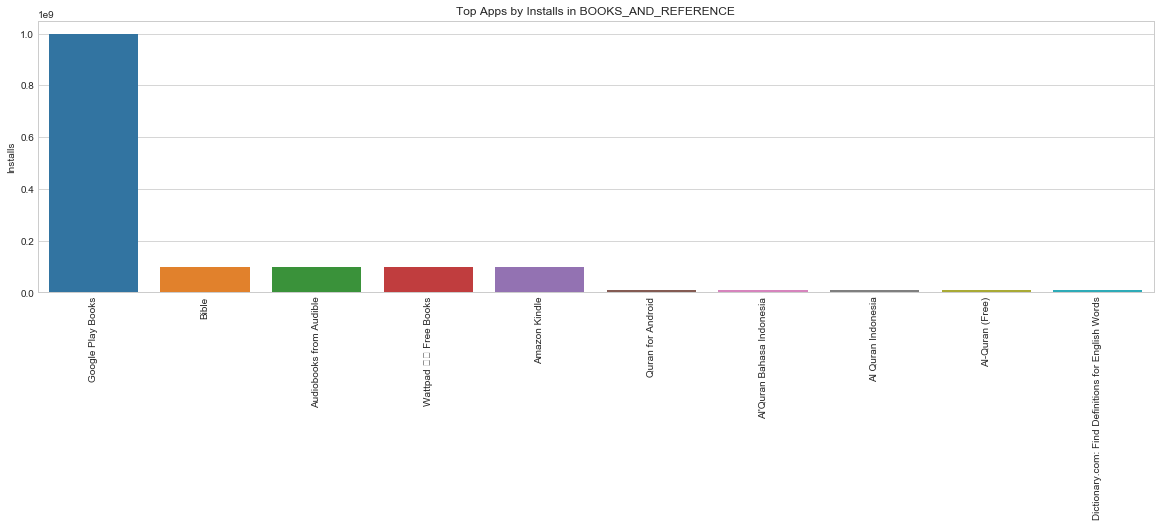

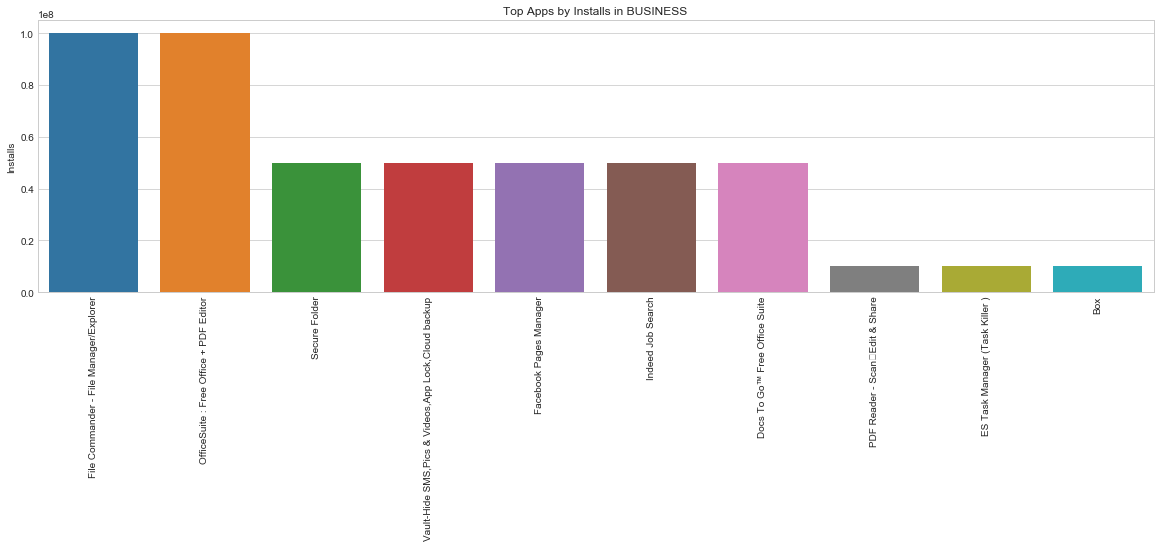

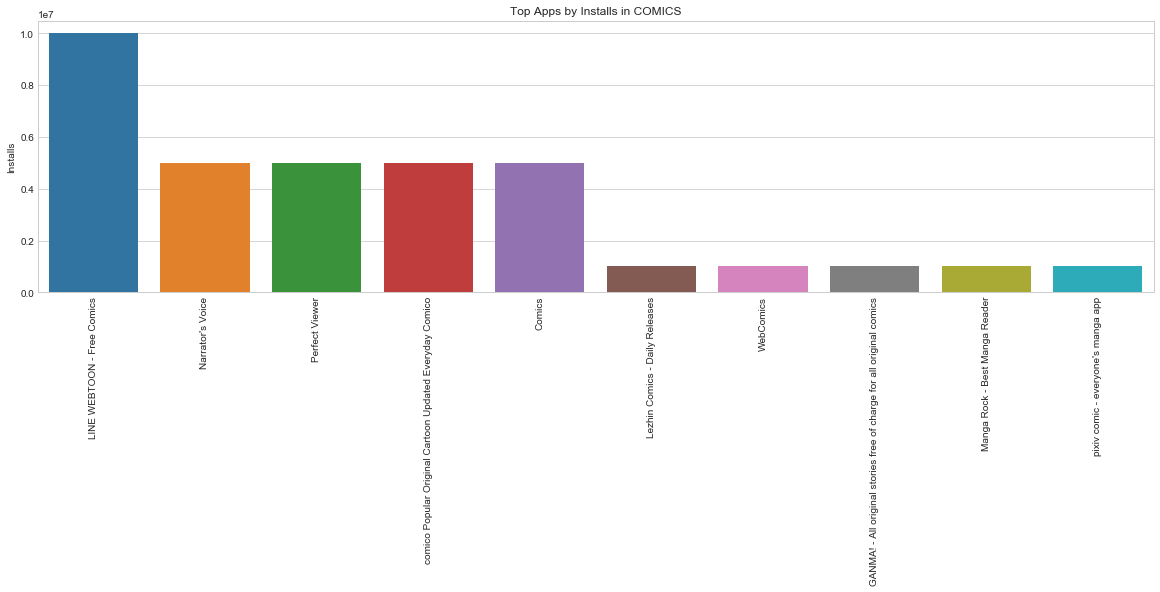

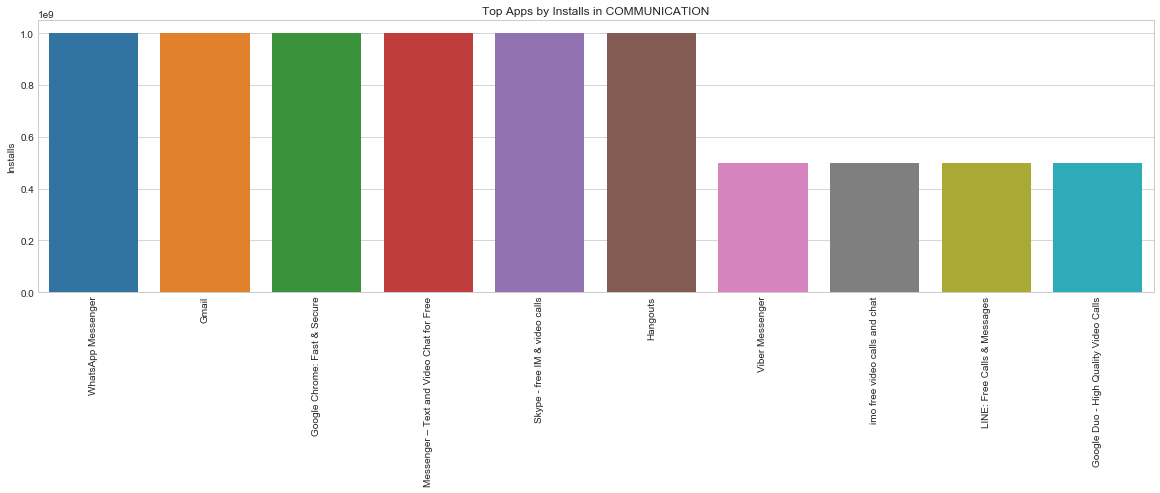

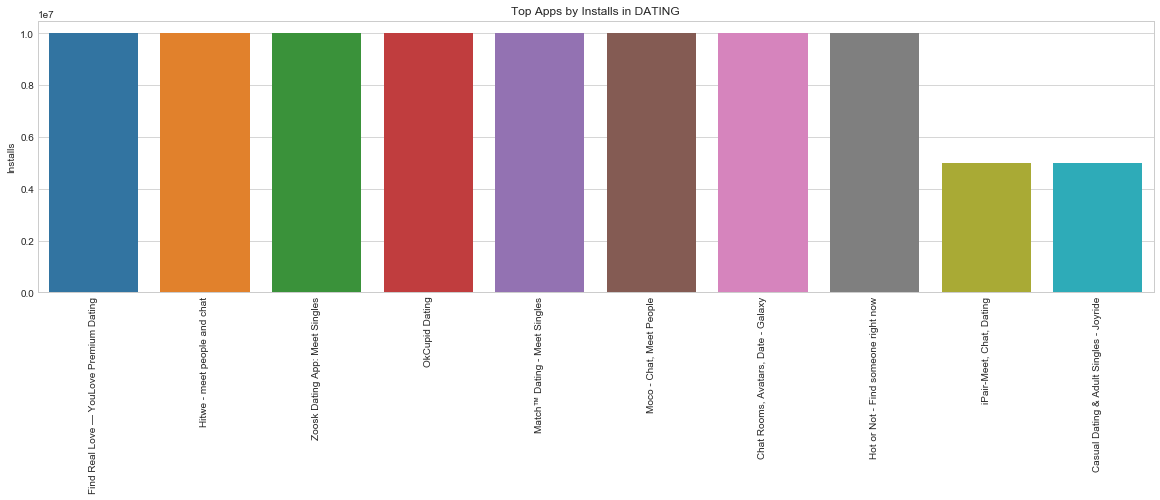

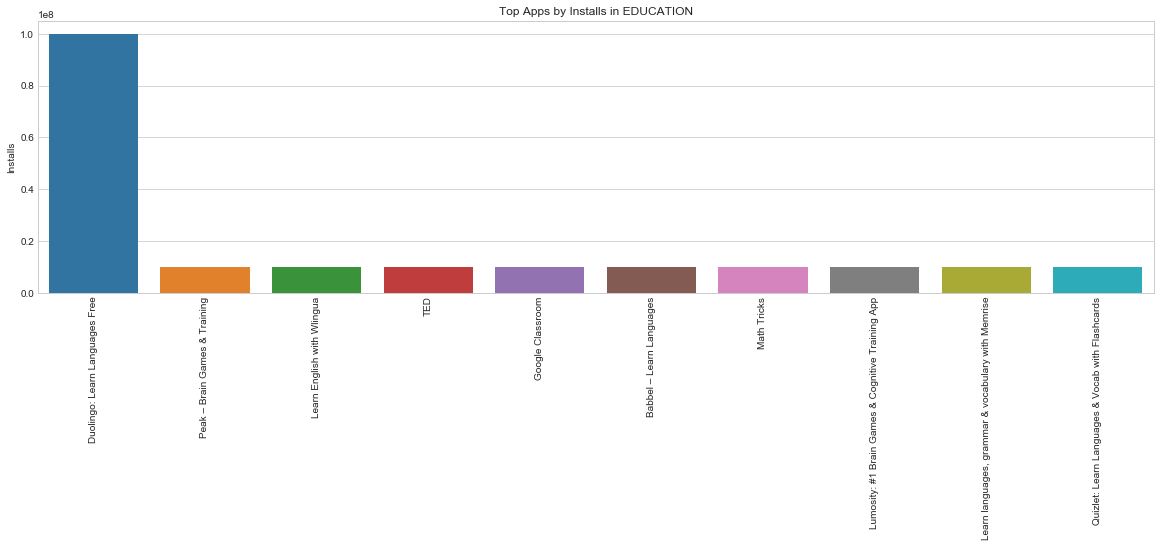

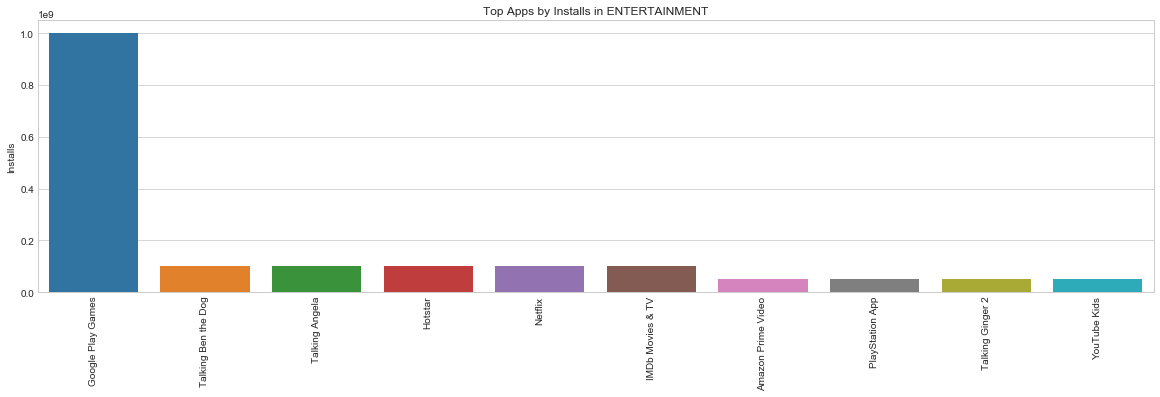

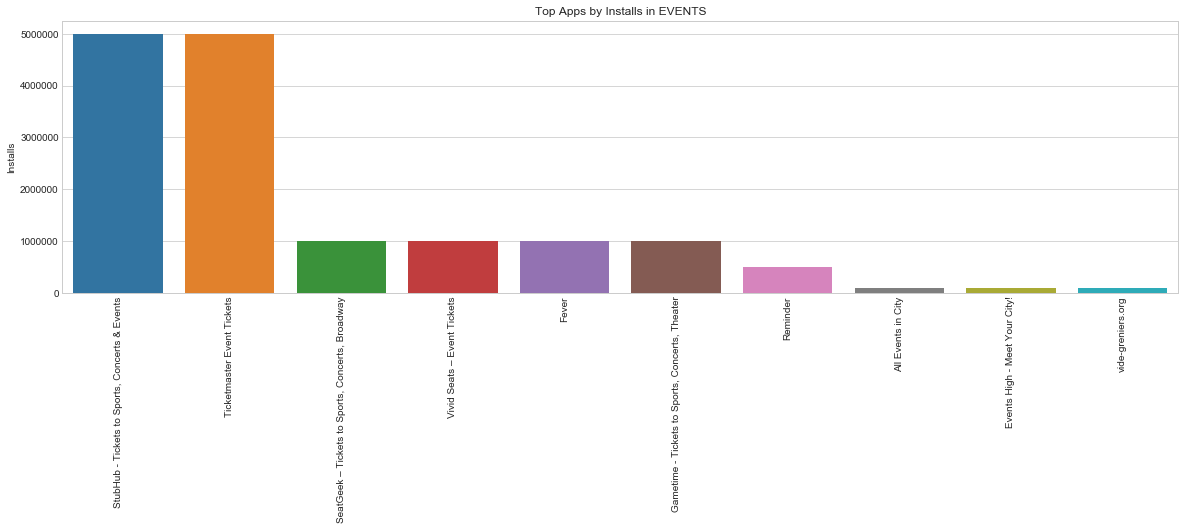

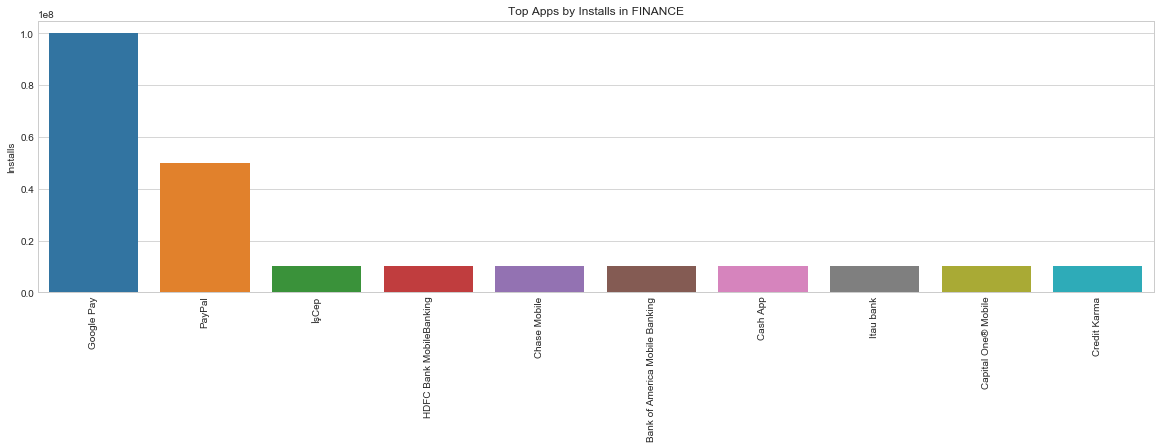

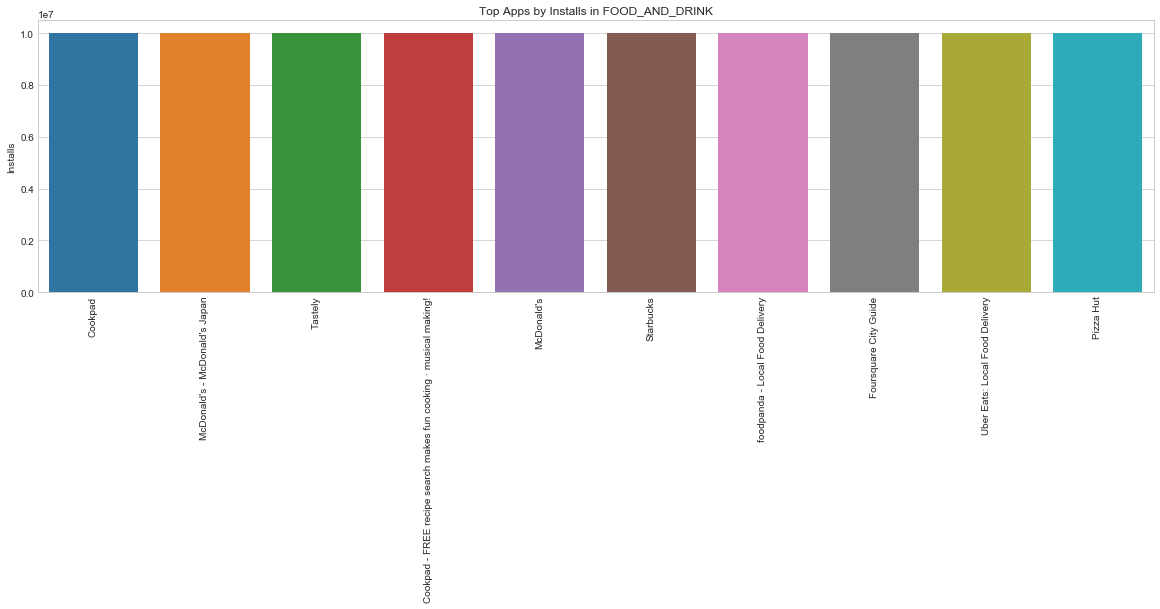

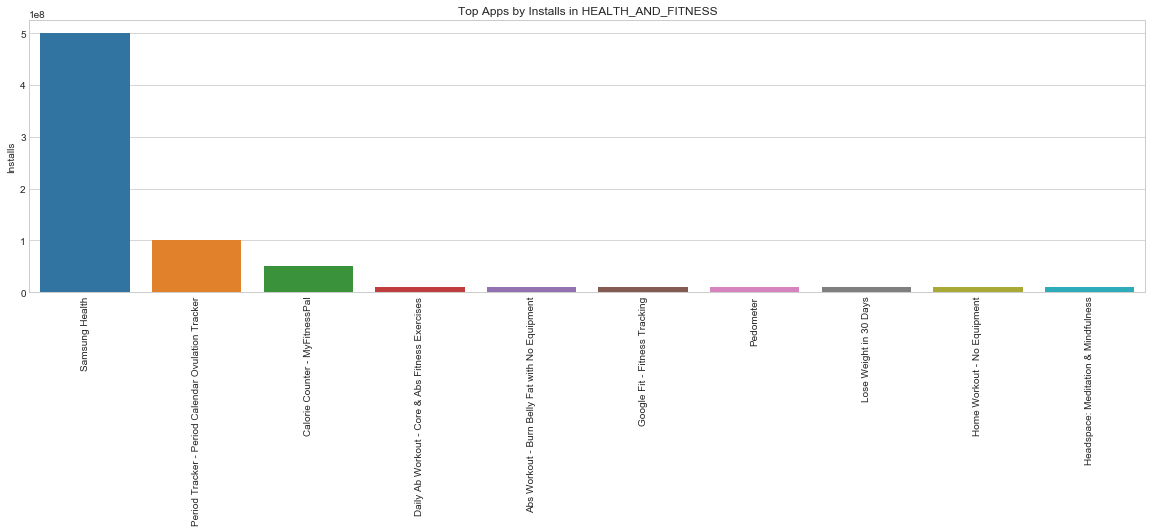

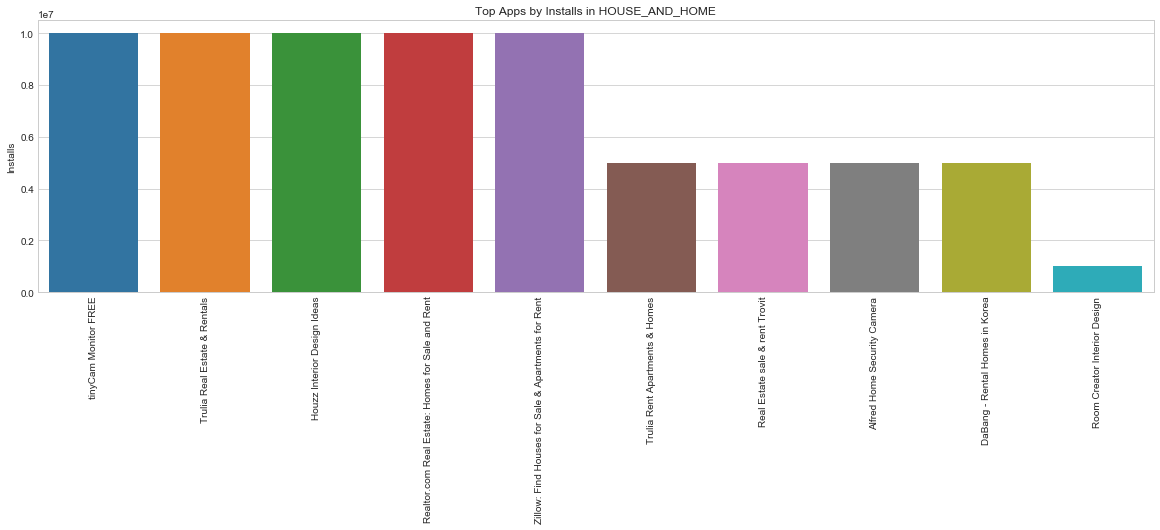

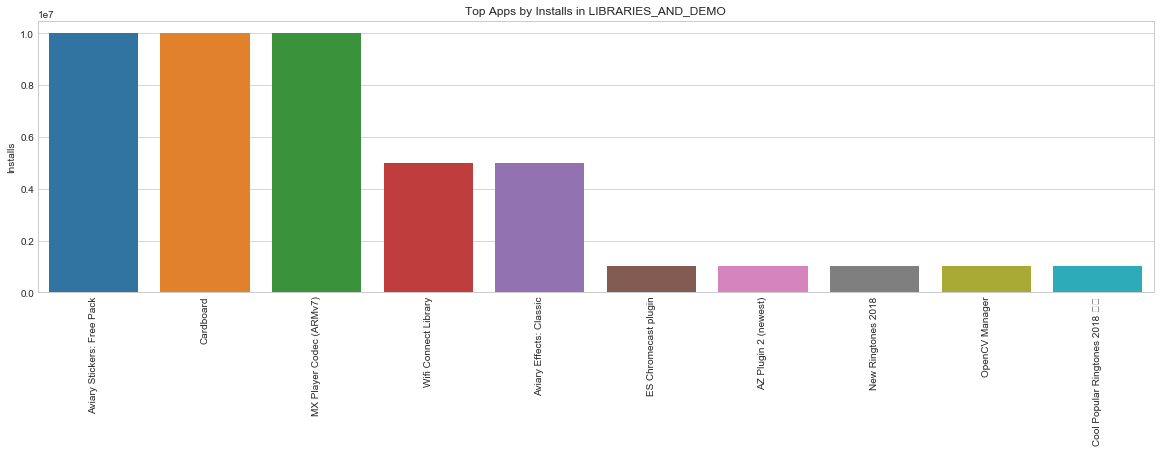

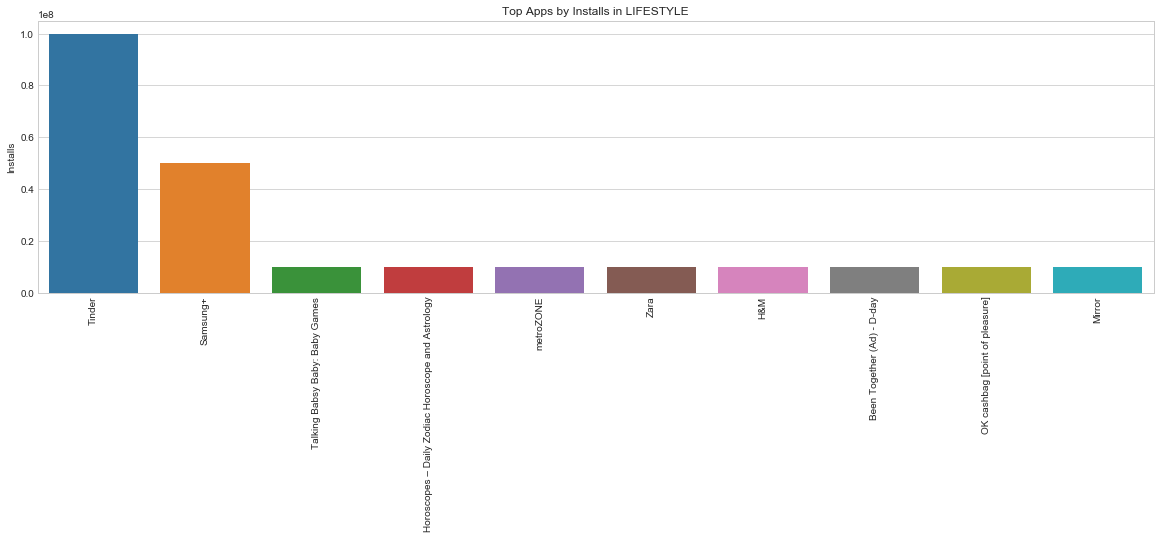

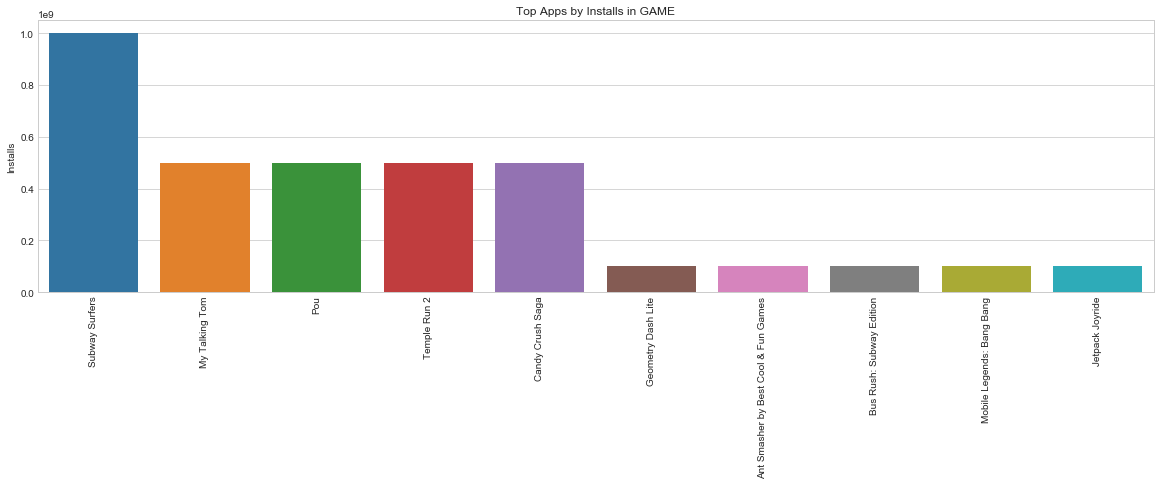

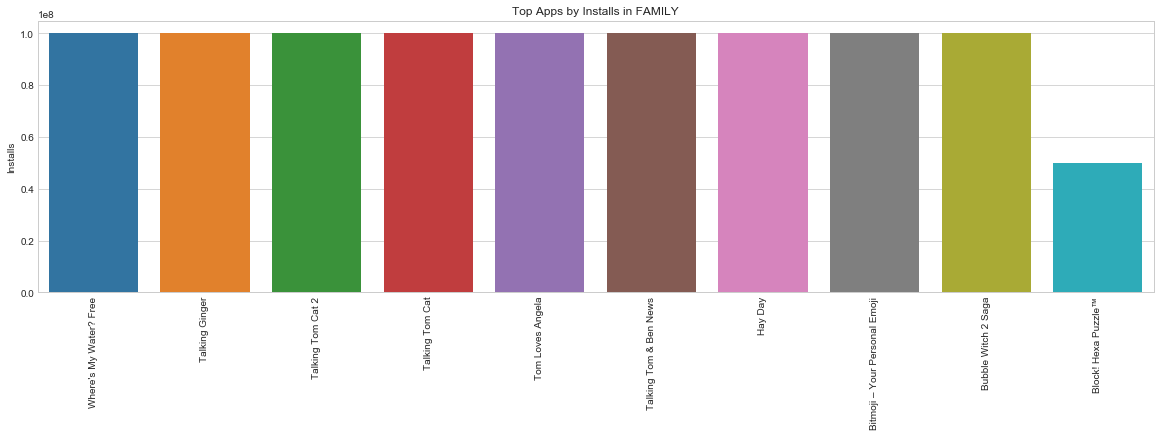

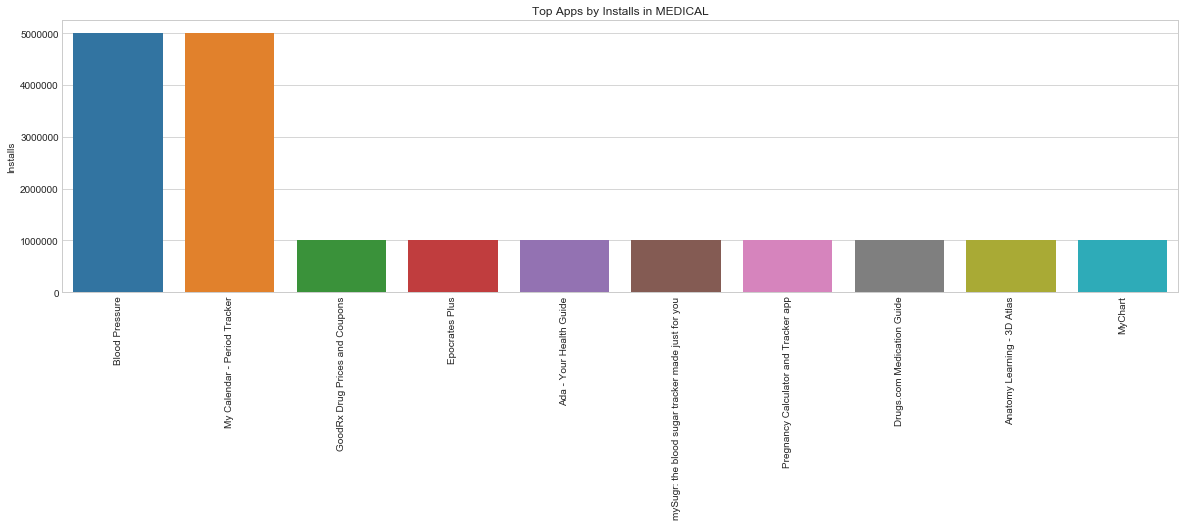

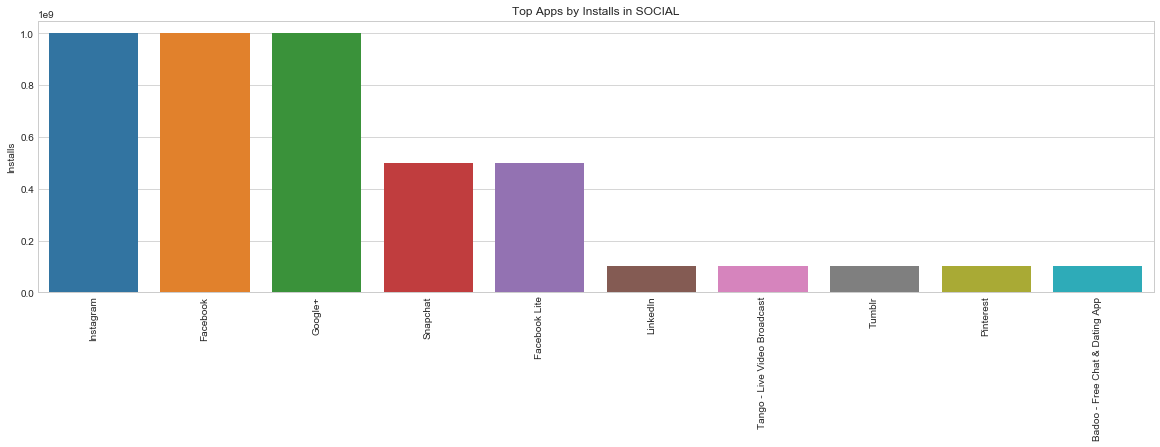

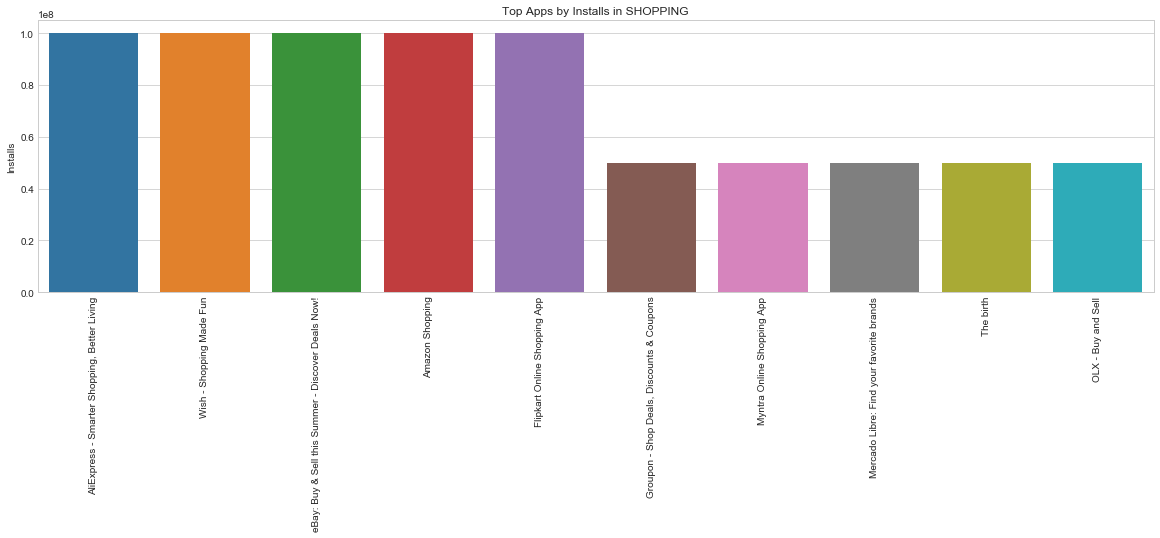

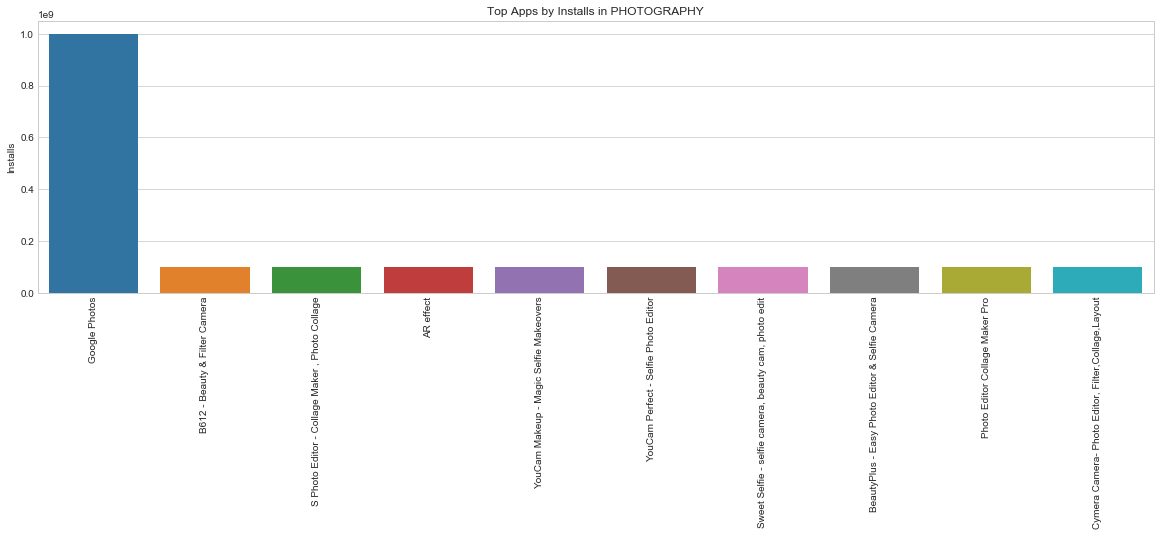

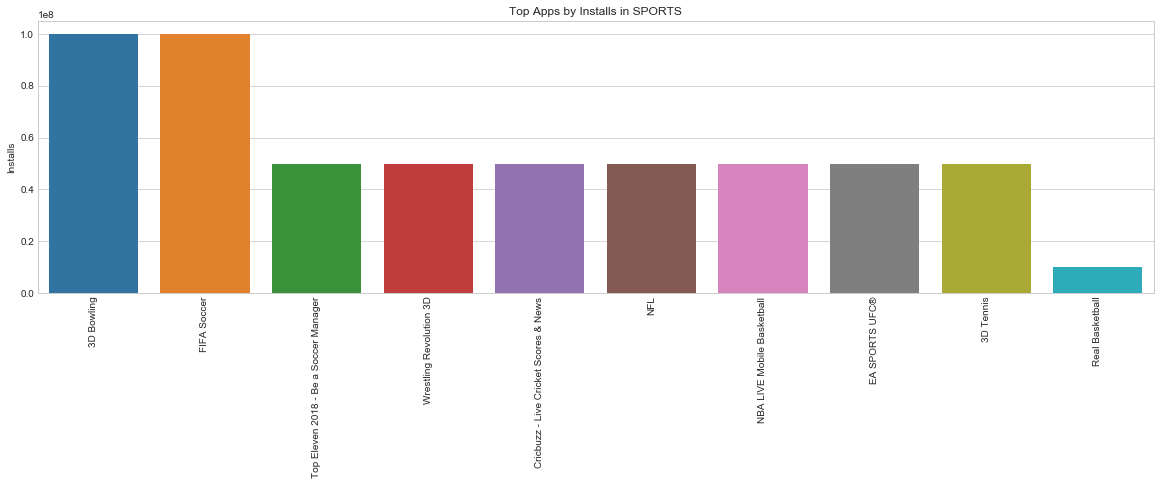

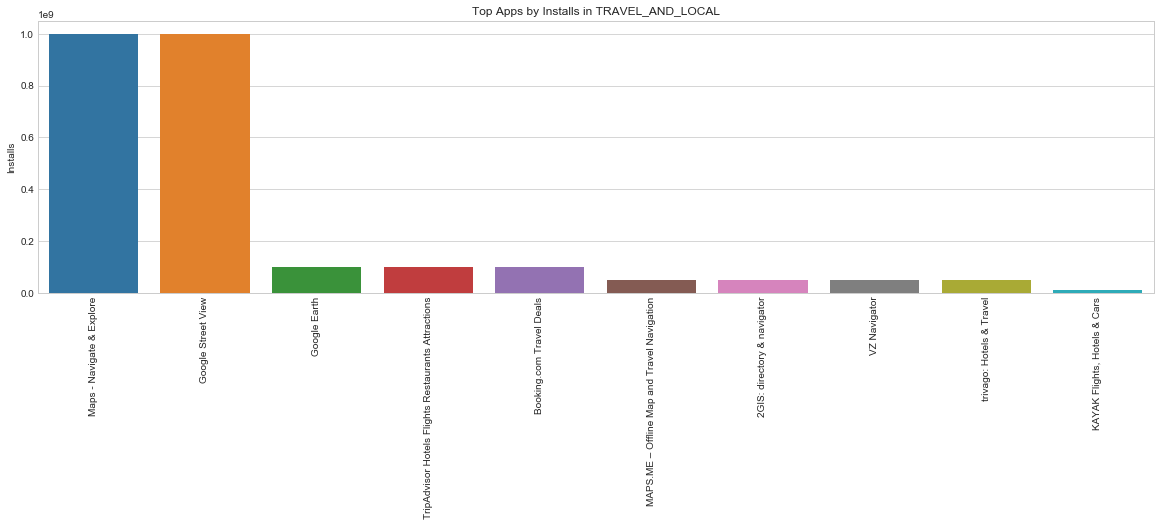

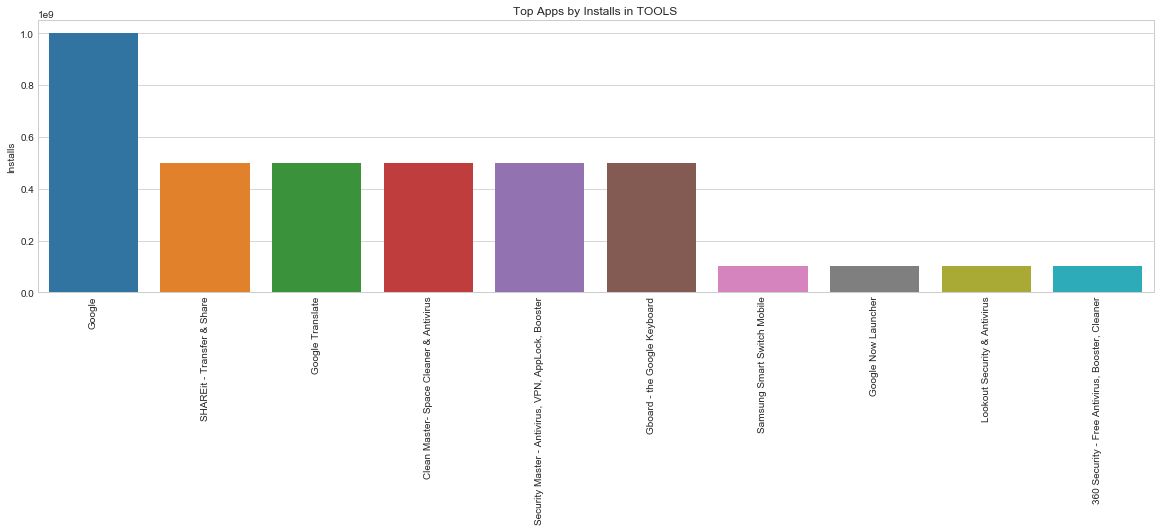

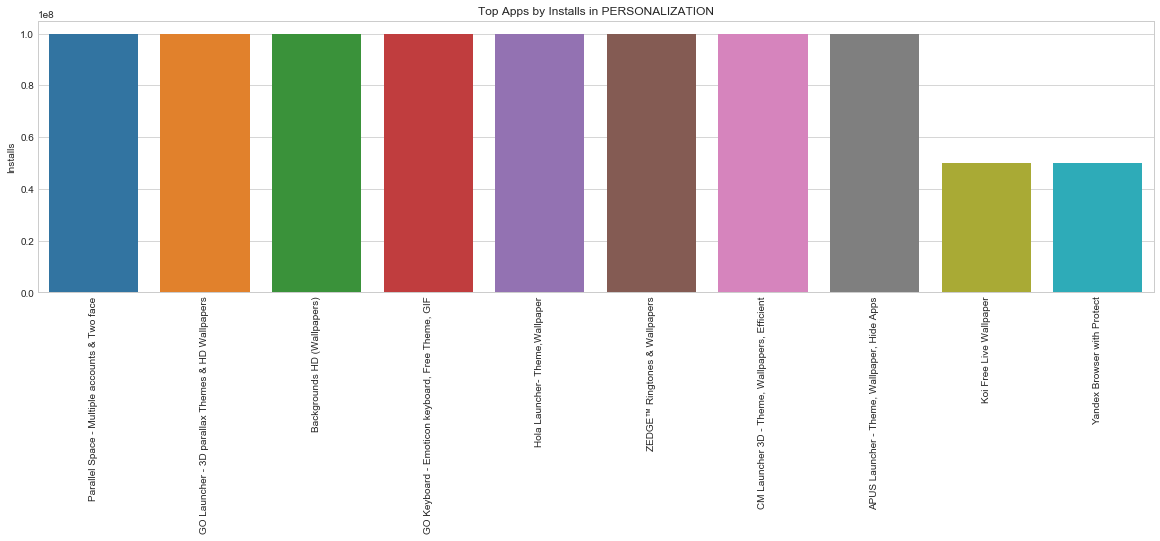

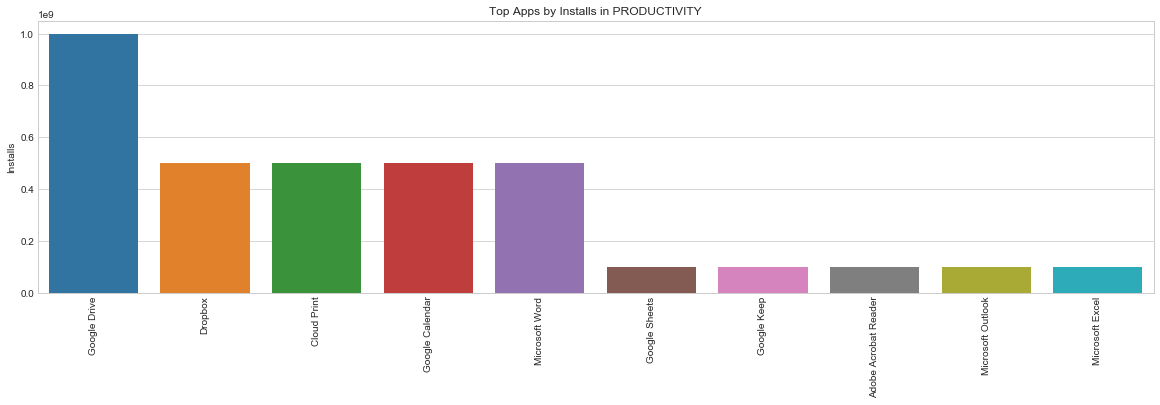

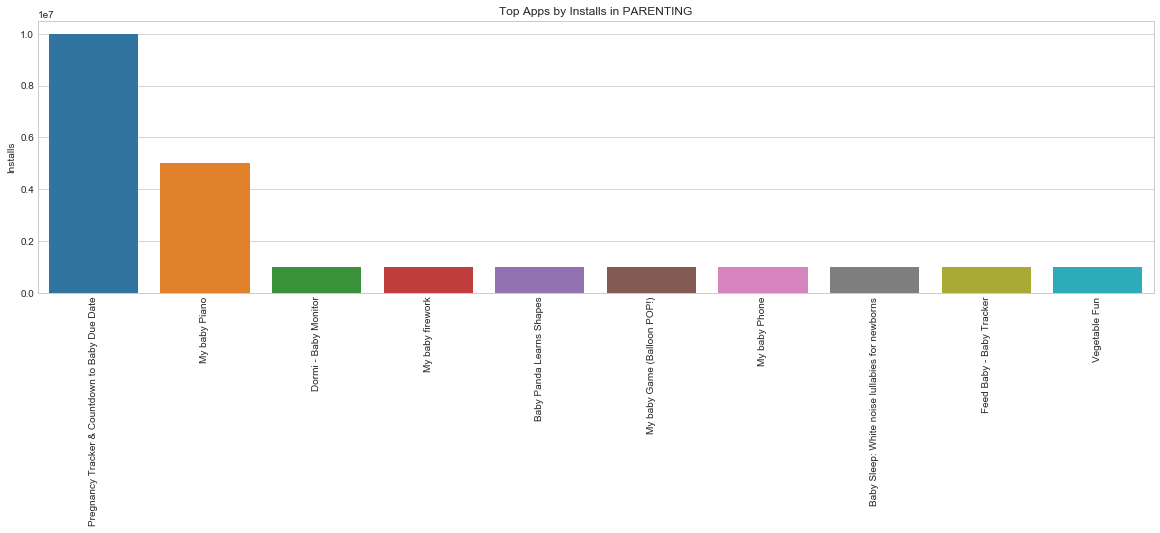

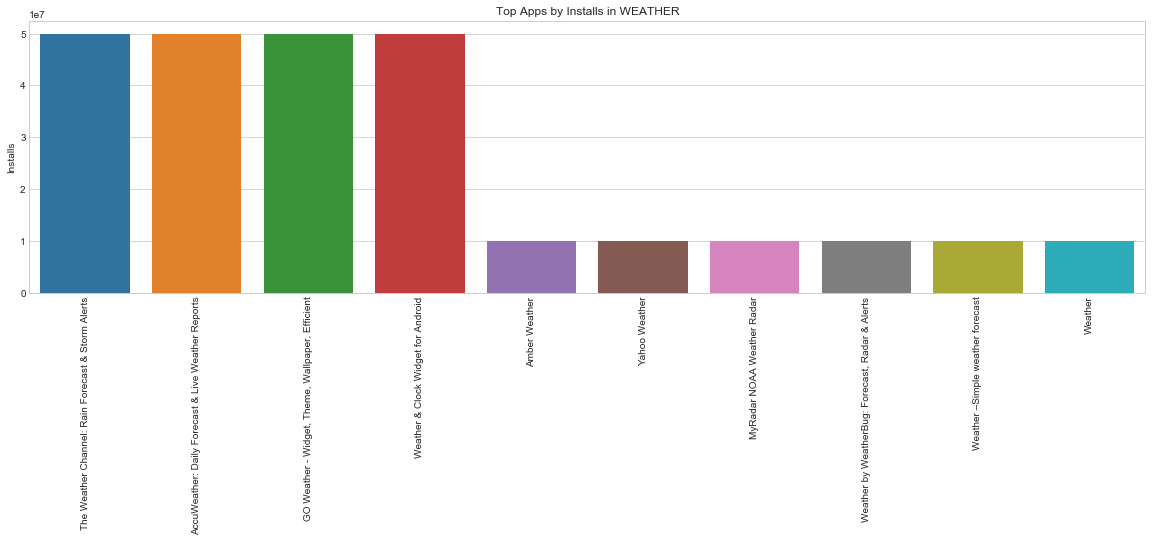

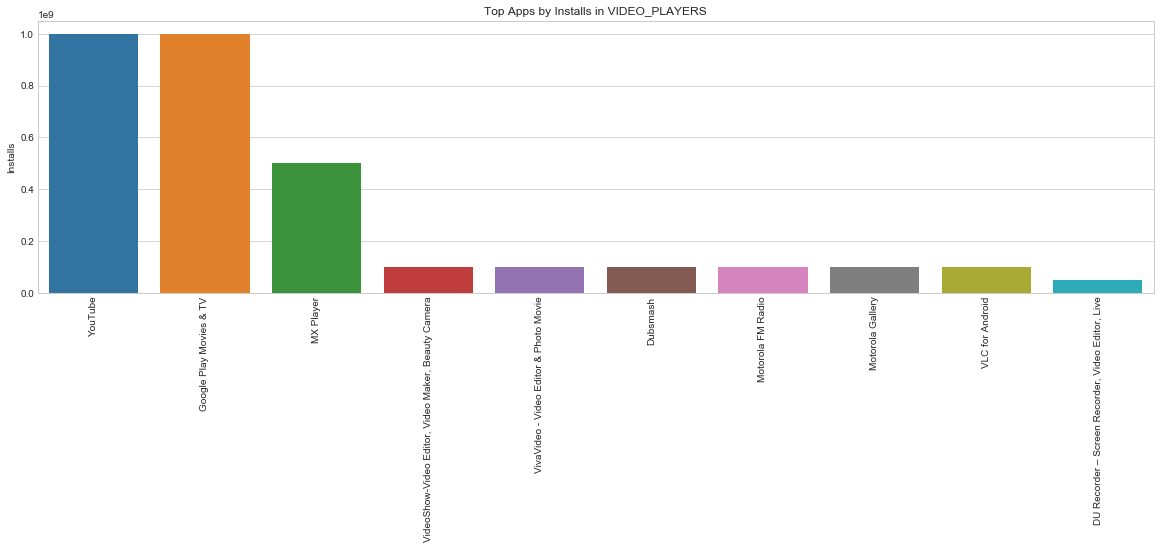

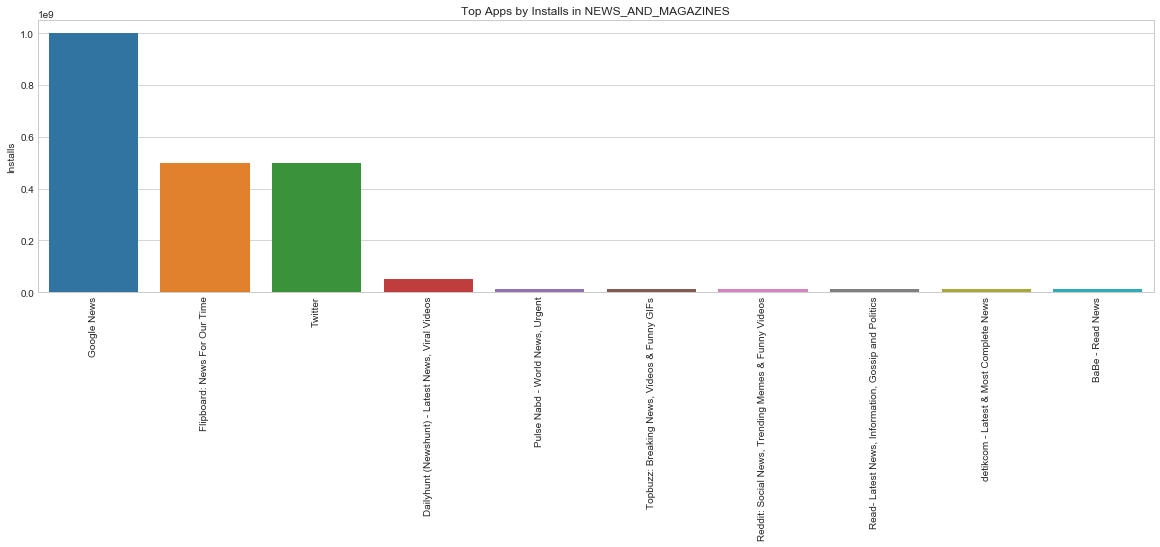

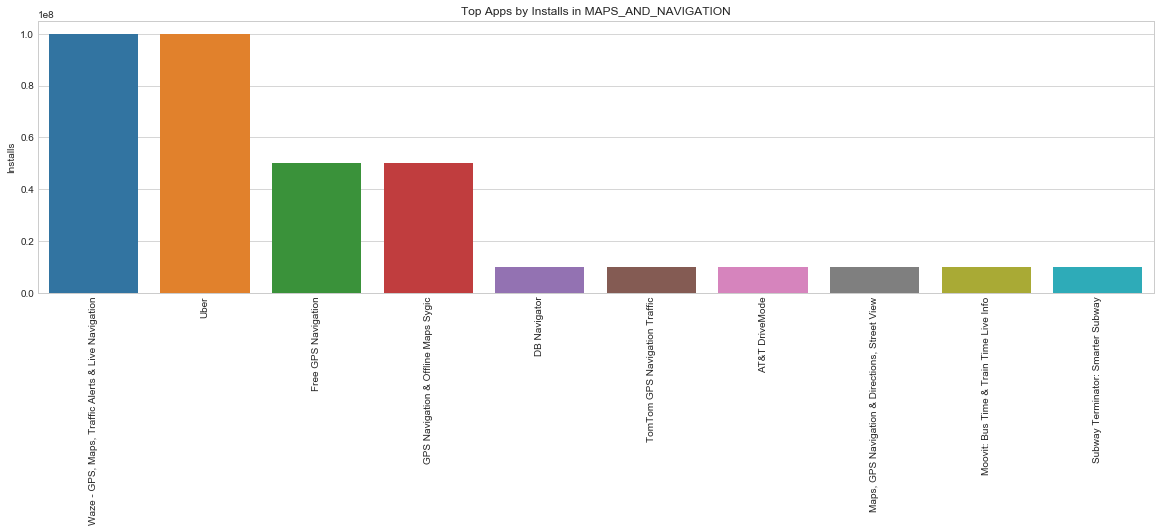

In [ ]:
# Top Overall Apps 
install_df = apps.loc[:, ["App", "Category", "Installs", "Price"]]
install_df = install_df.sort_values(by="Installs", ascending=False)

category = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
            'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
            'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
            'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
            'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
            'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
            'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
            'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

for i in range(0,33):    
    df = install_df[install_df["Category"] == category[i]].head(10)    
    plt.figure(figsize=(20,5))
    y_pos = np.arange(len(df["App"]))
    names=tuple(df.App)
    sns.barplot(y_pos, "Installs", data=df)
    plt.xticks(y_pos, names, rotation=90)
    plt.title("Top Apps by Installs in "+category[i])
    plt.ylabel("Installs")
    
plt.show()

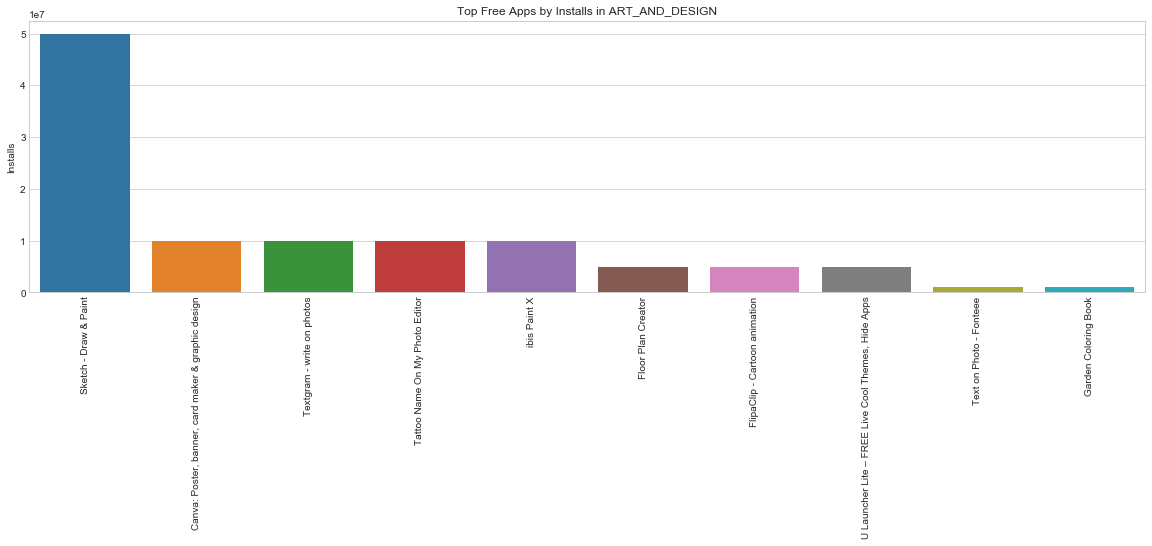

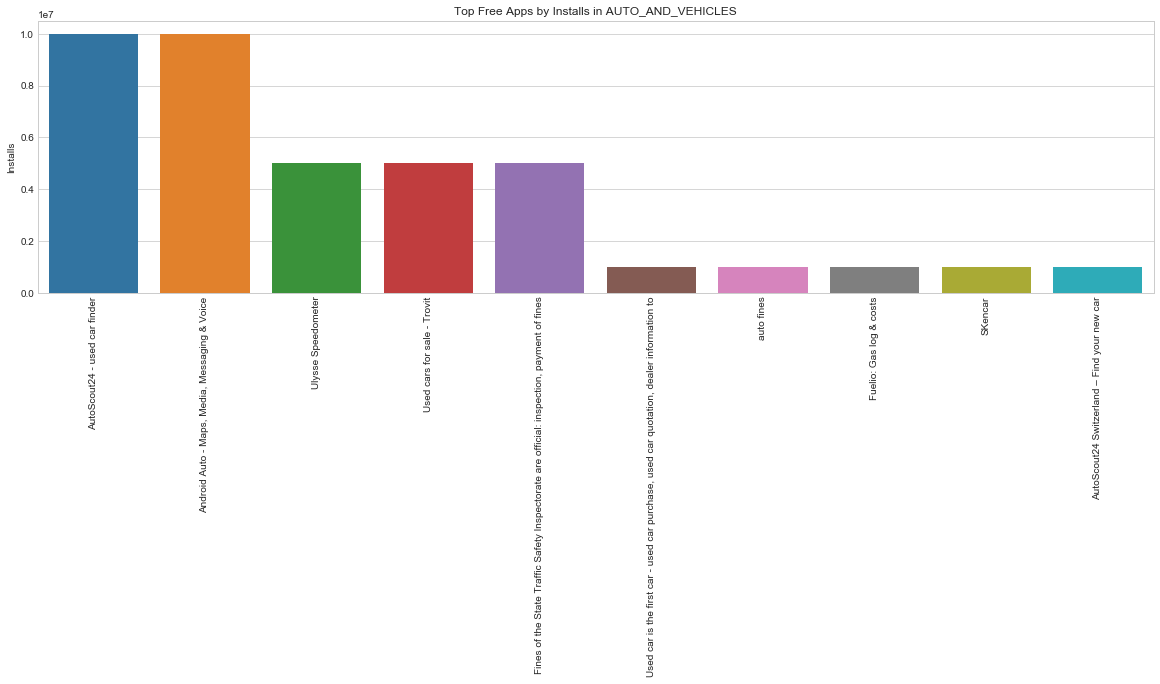

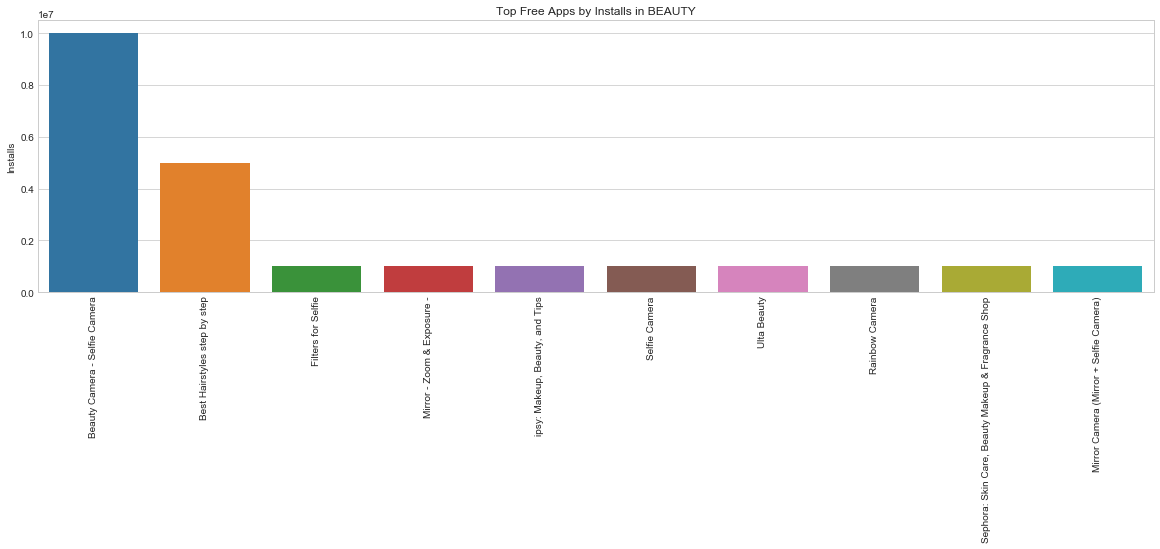

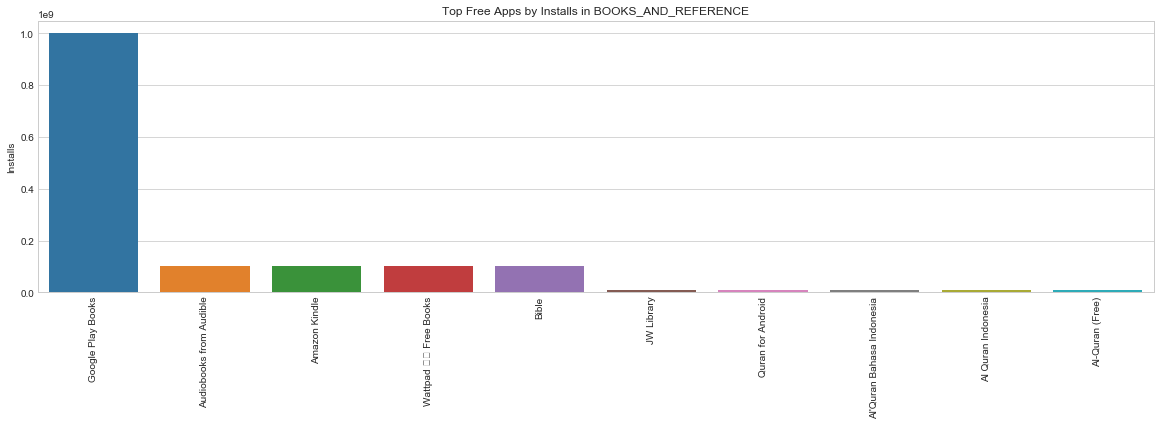

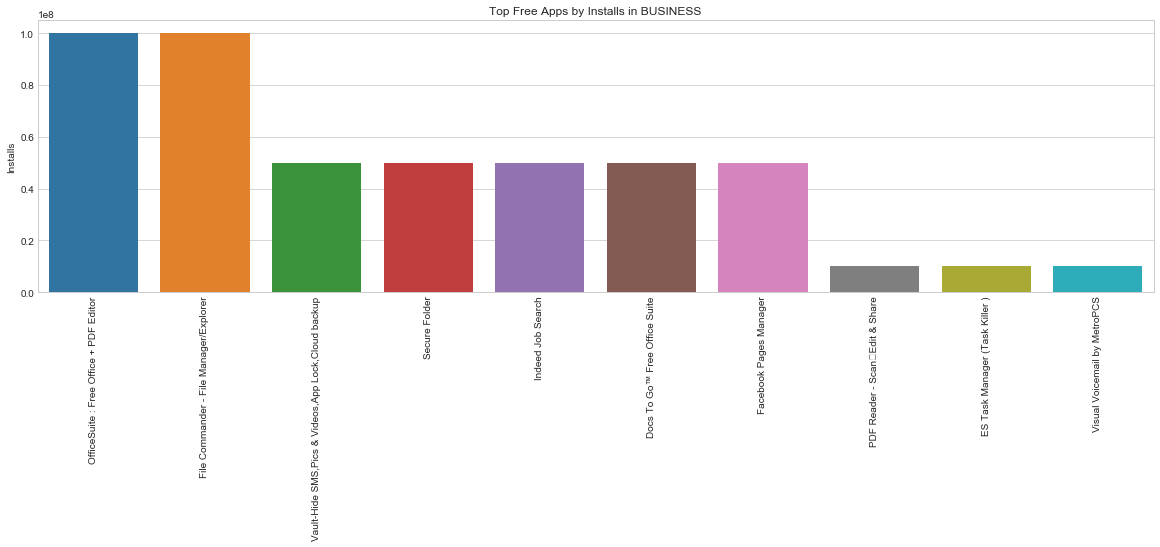

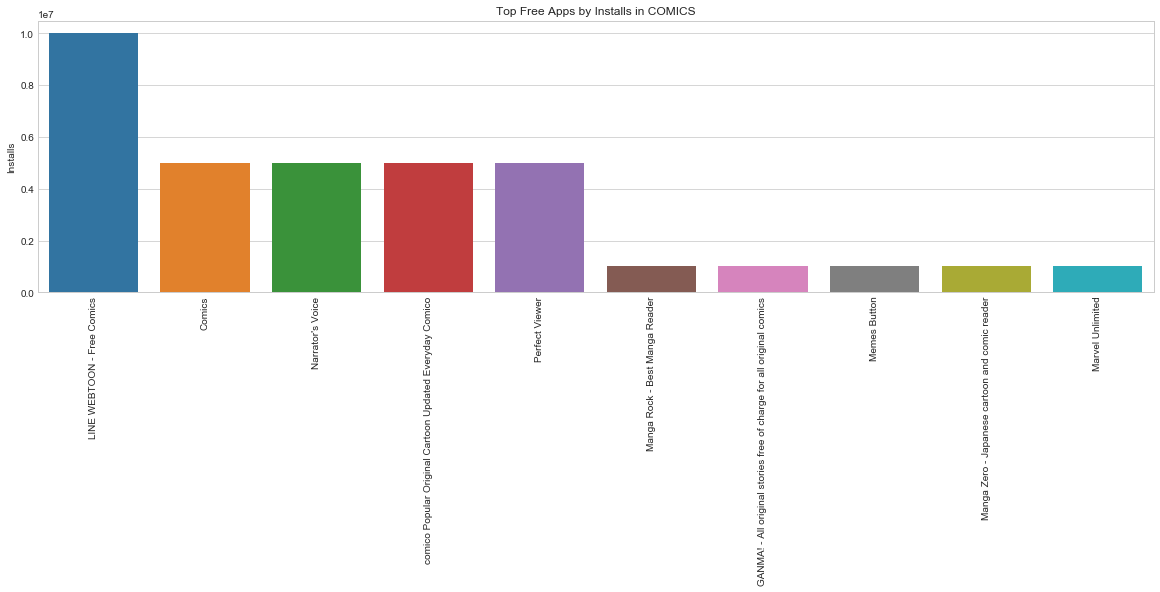

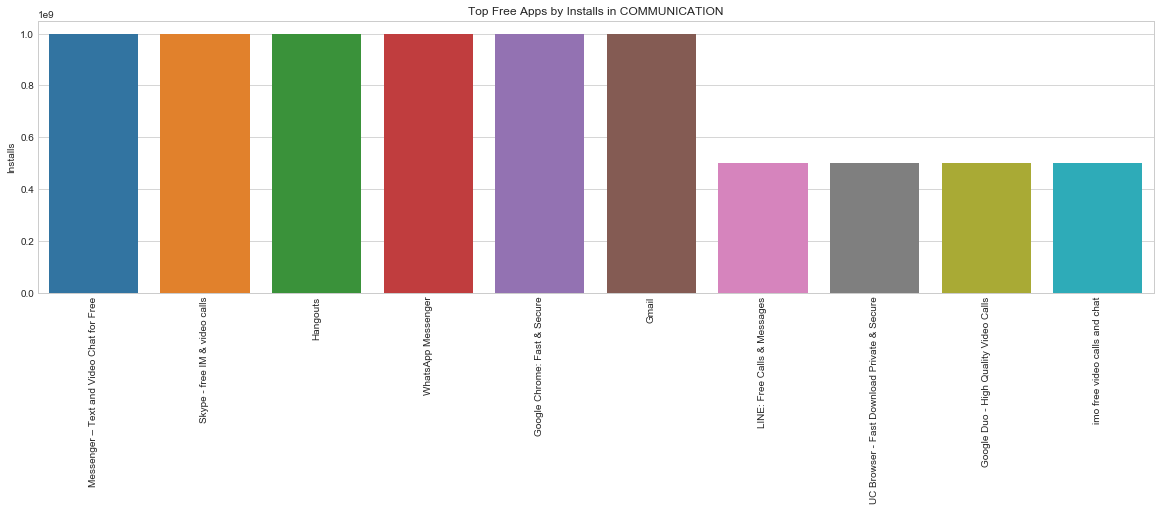

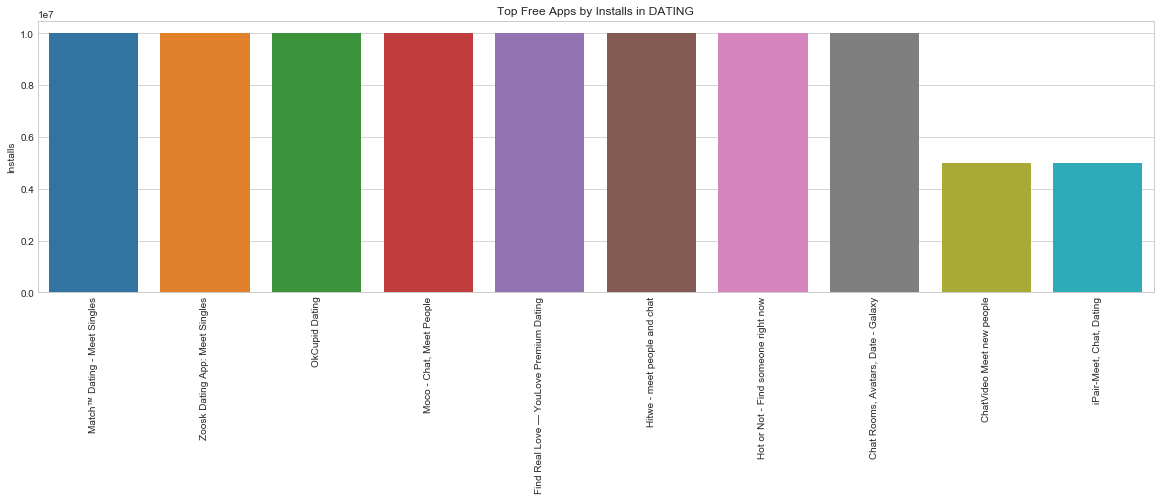

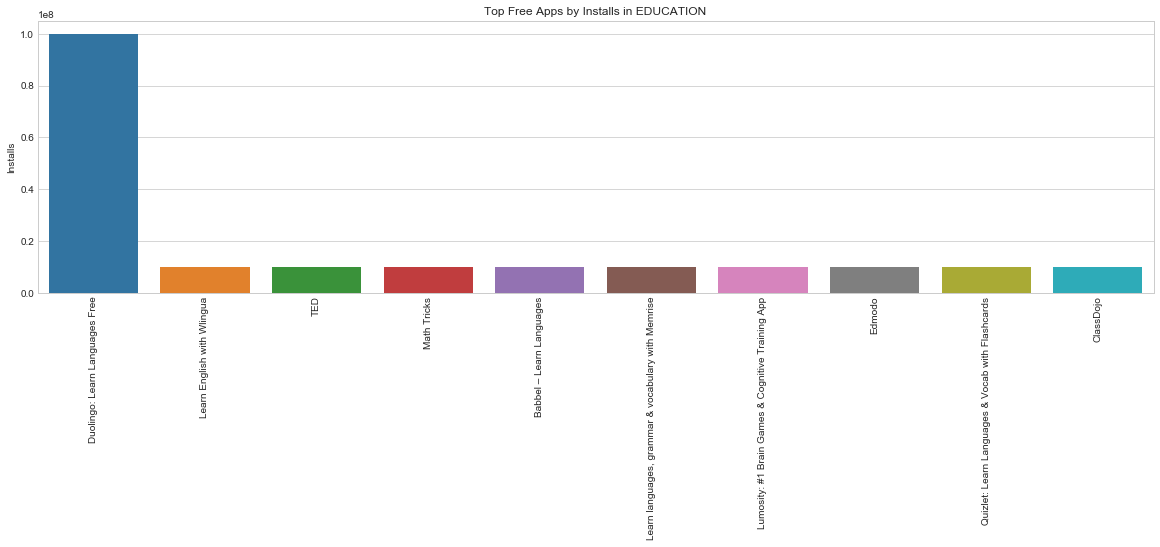

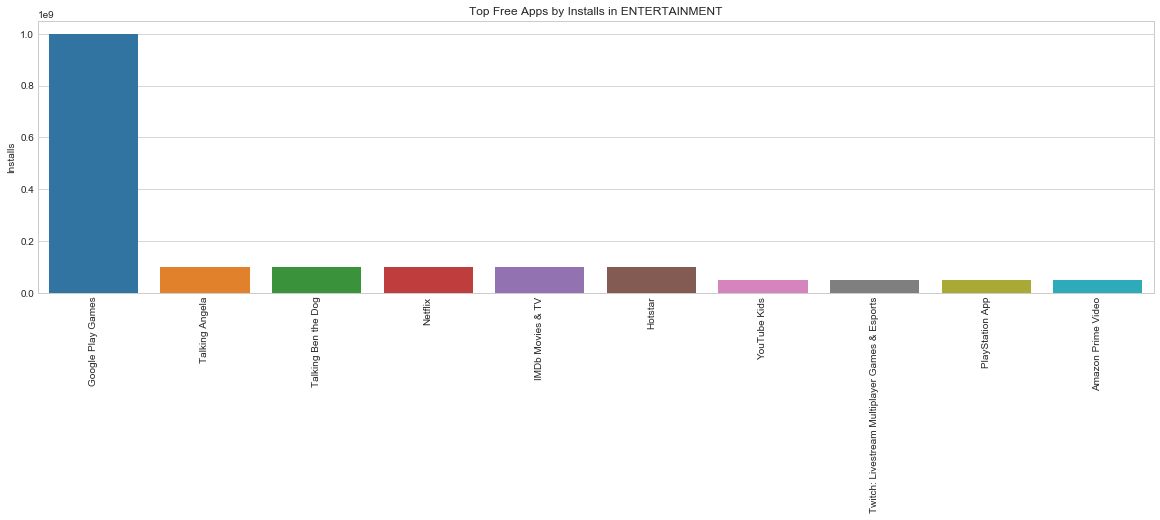

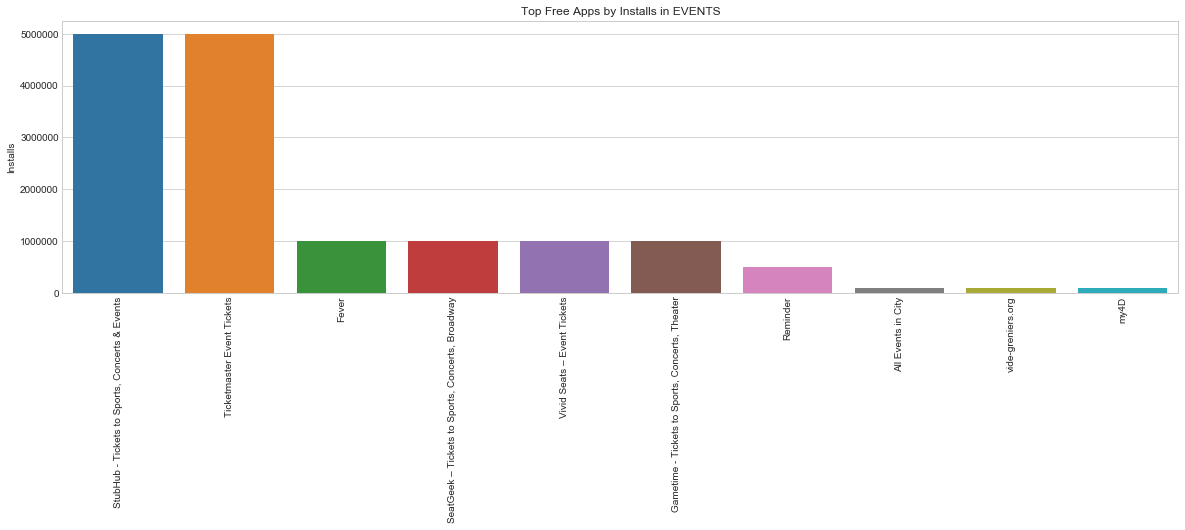

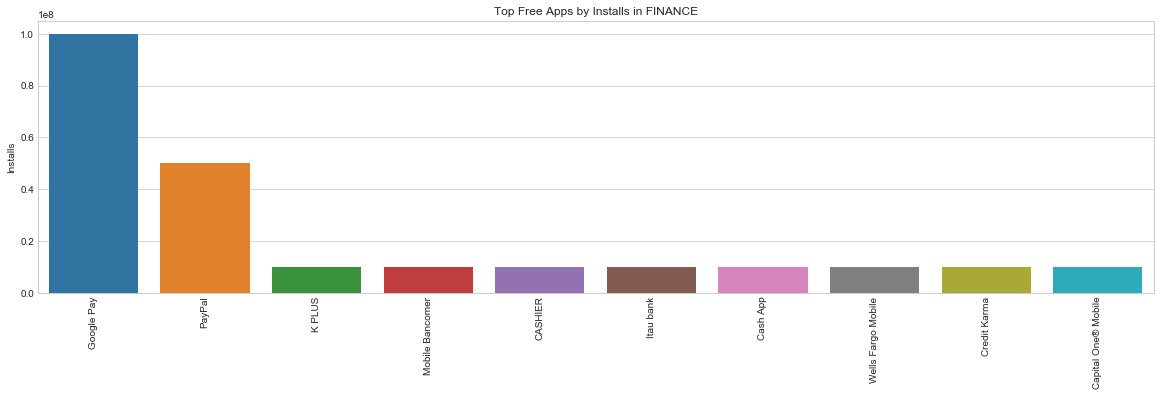

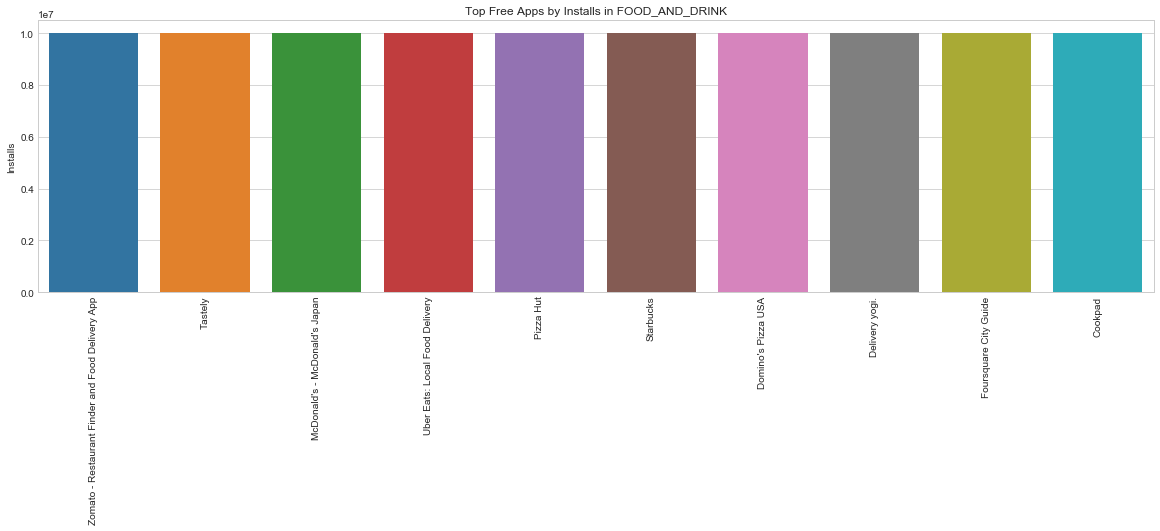

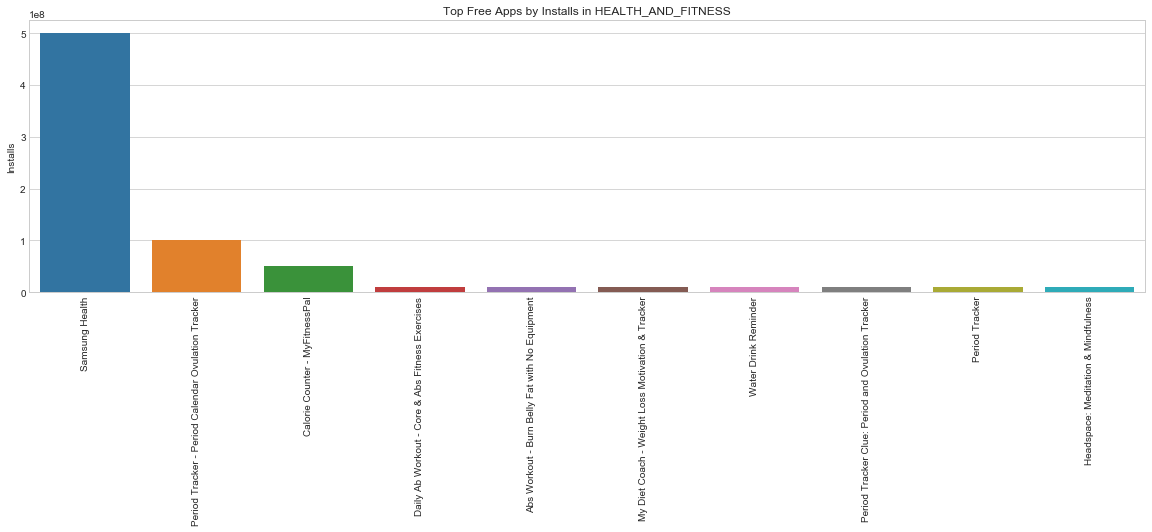

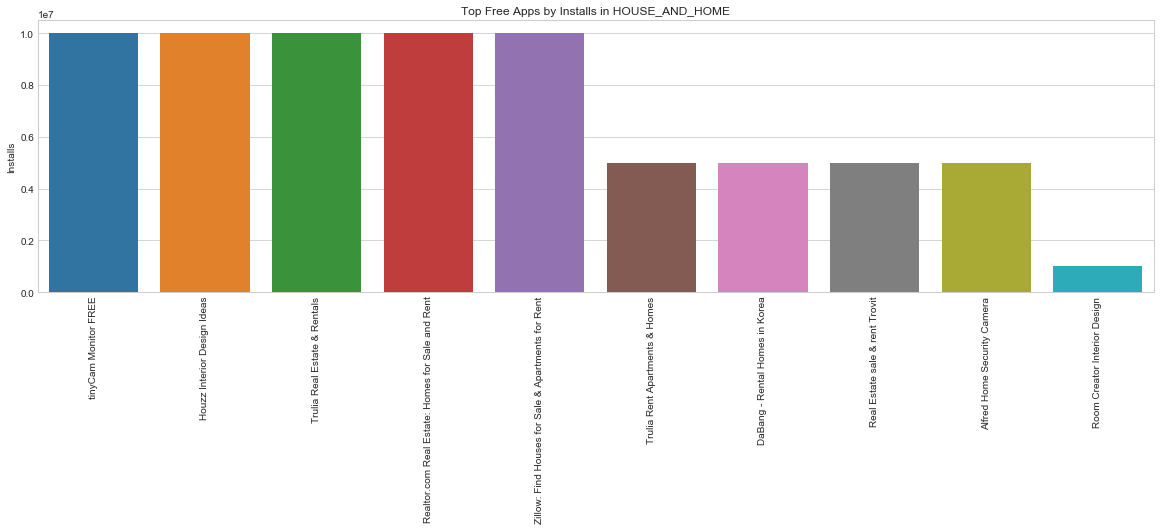

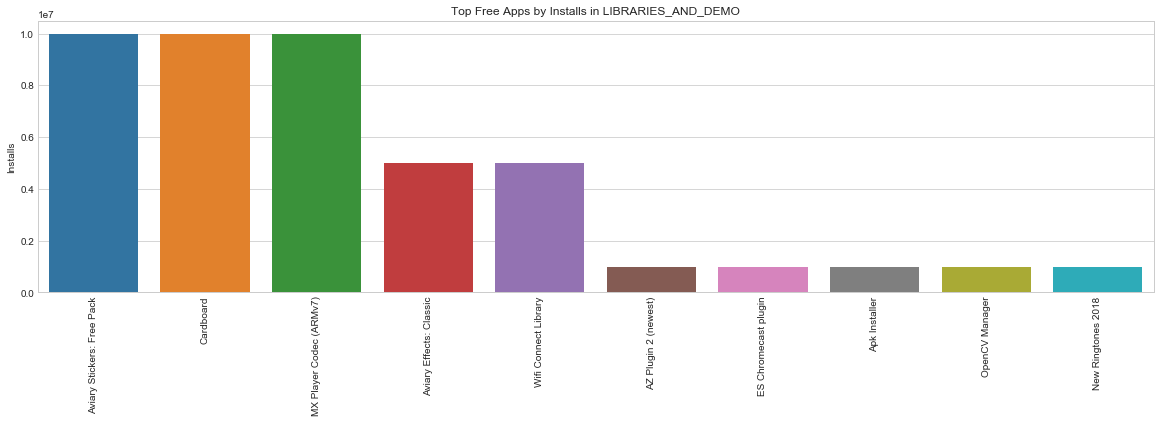

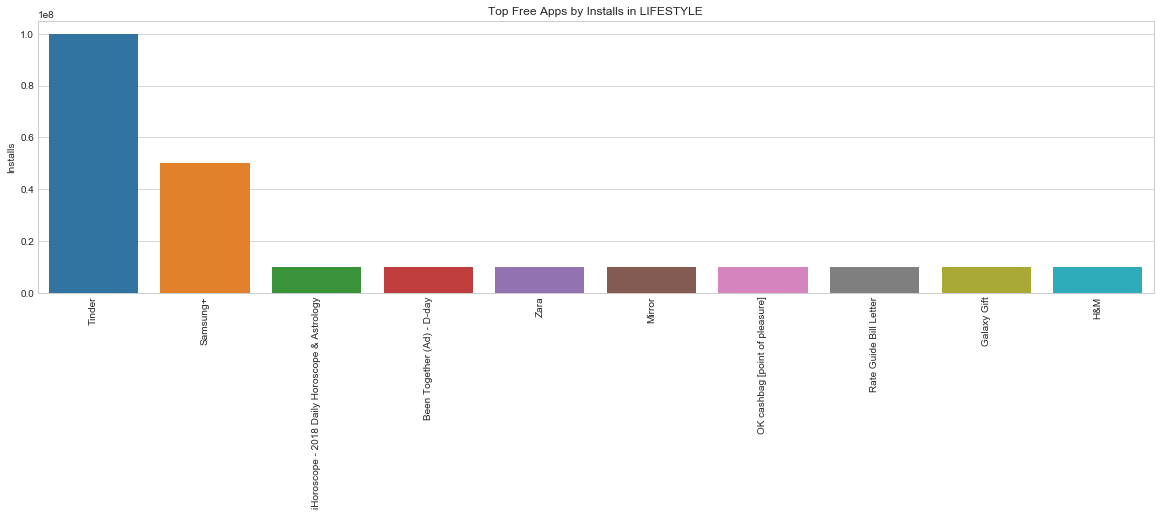

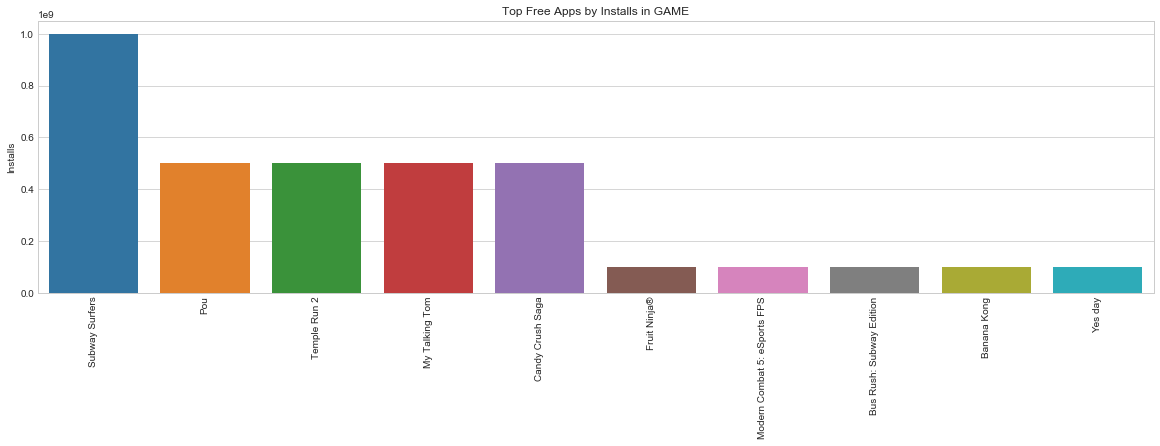

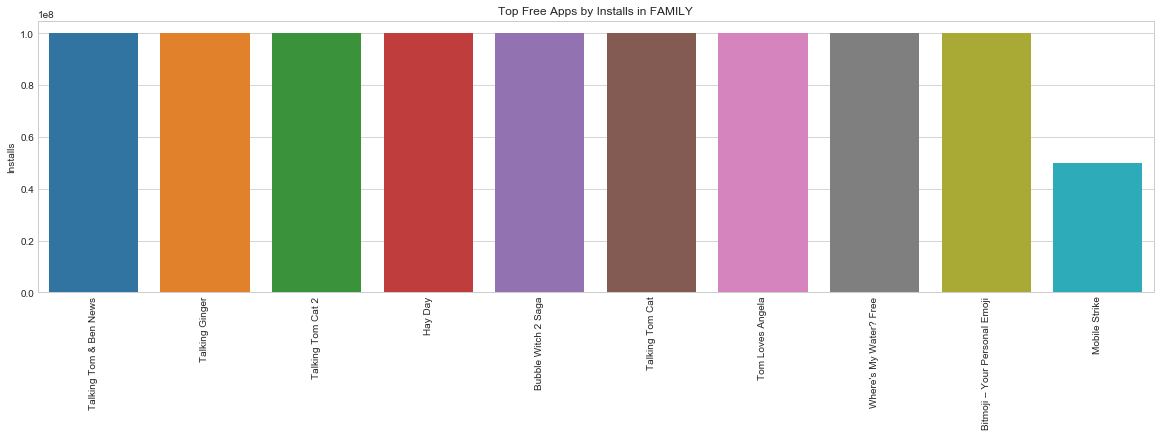

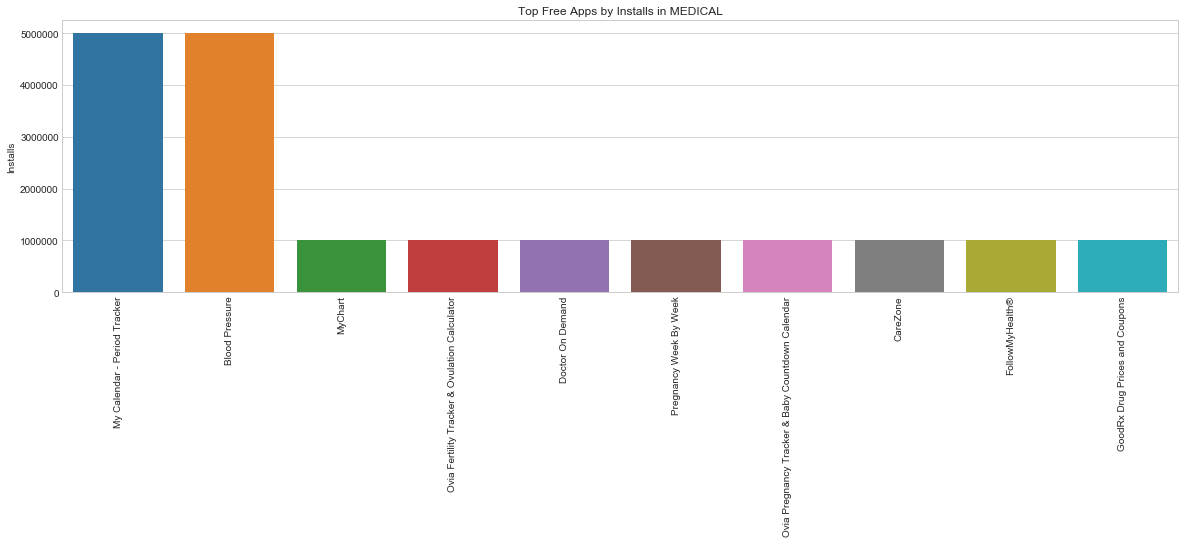

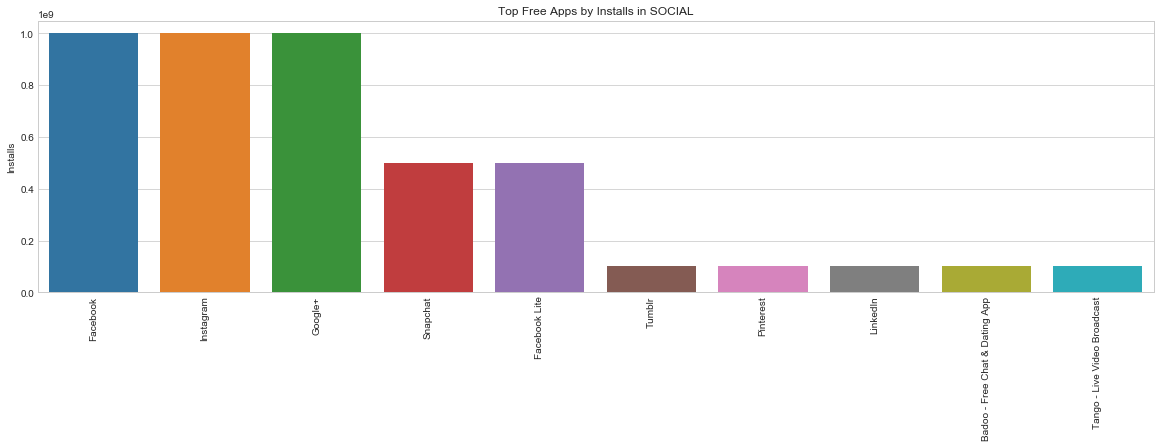

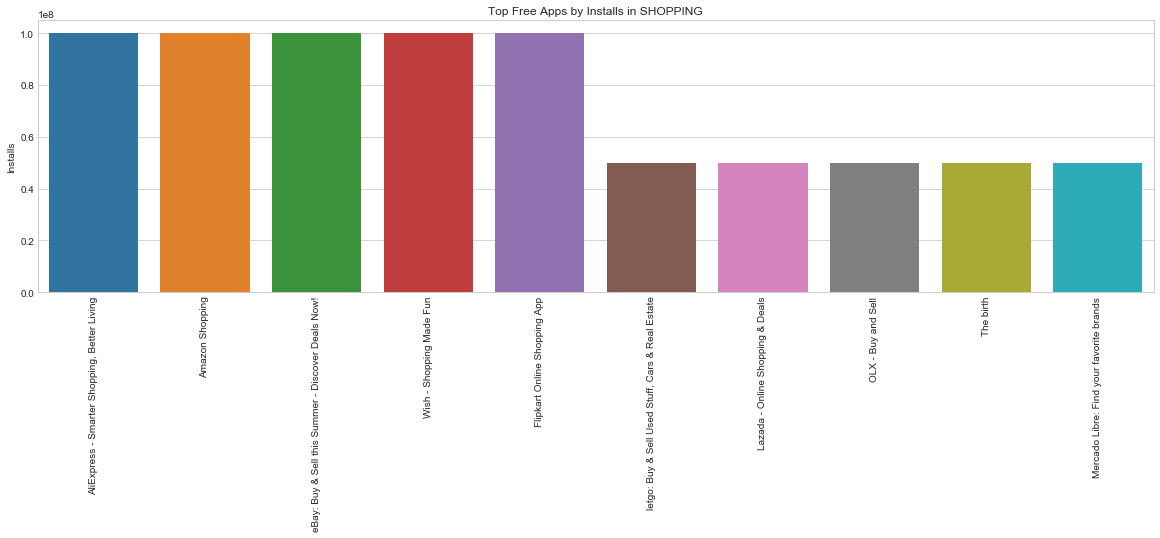

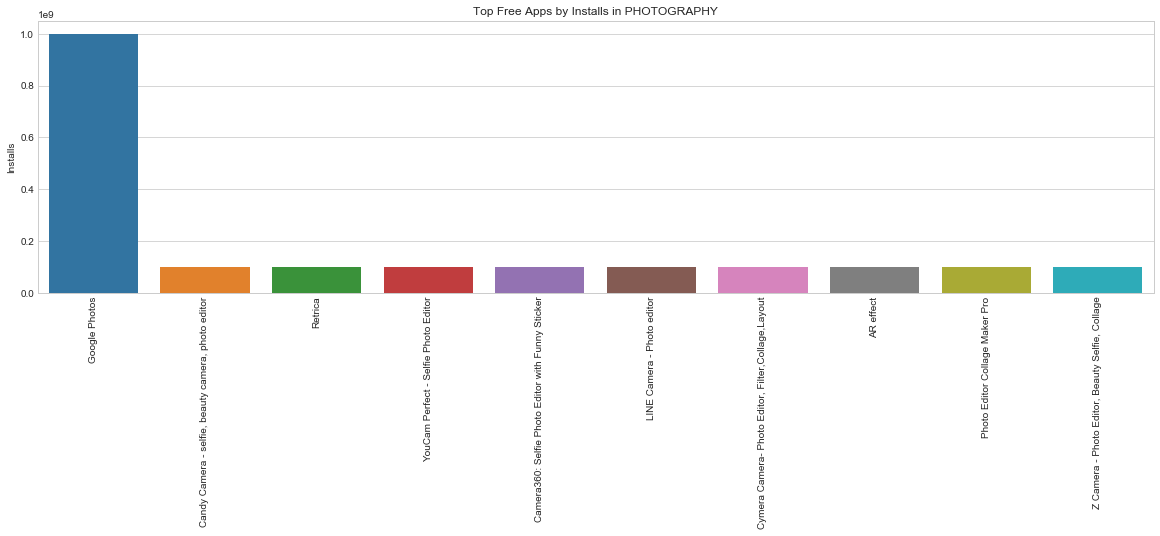

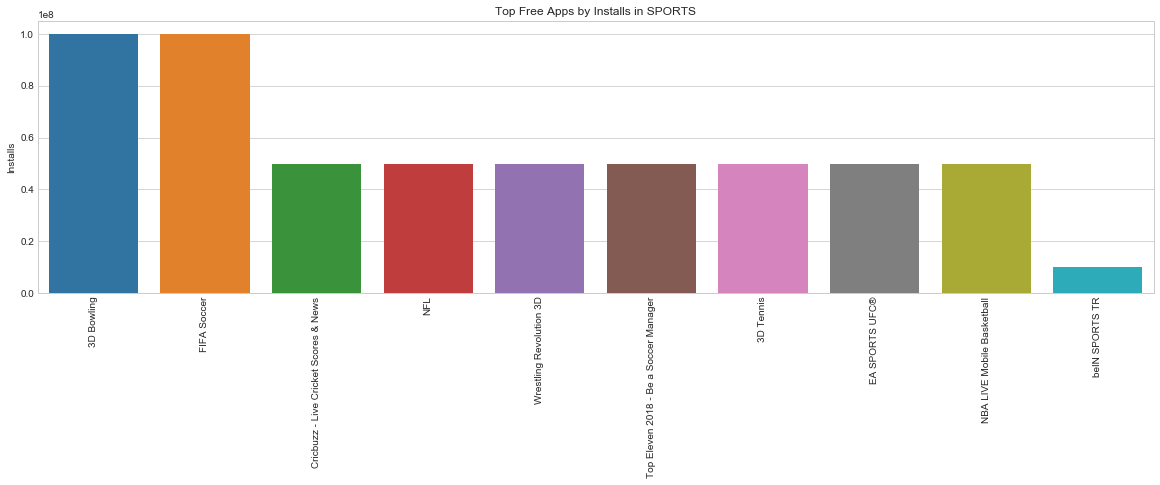

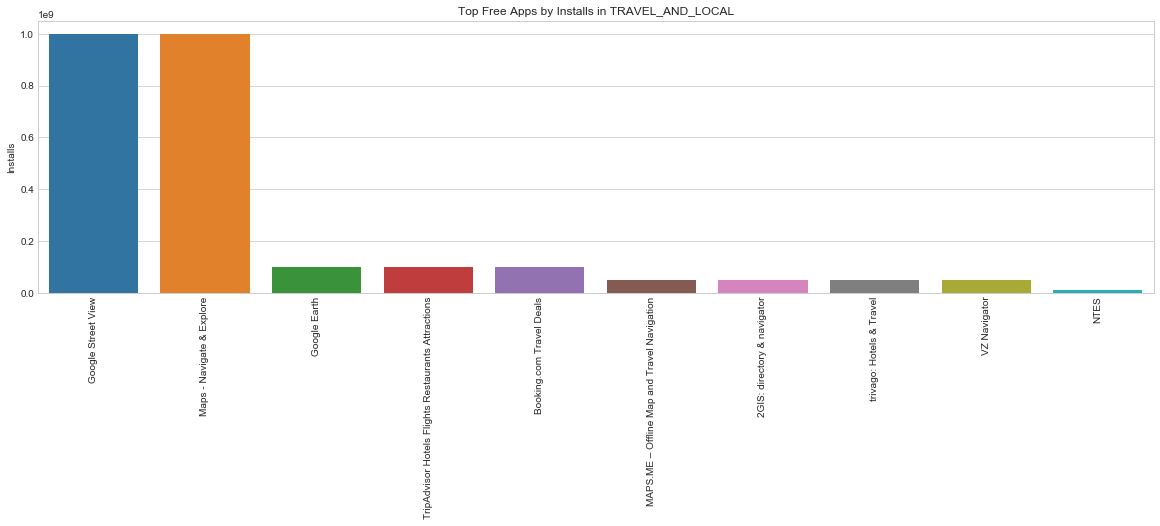

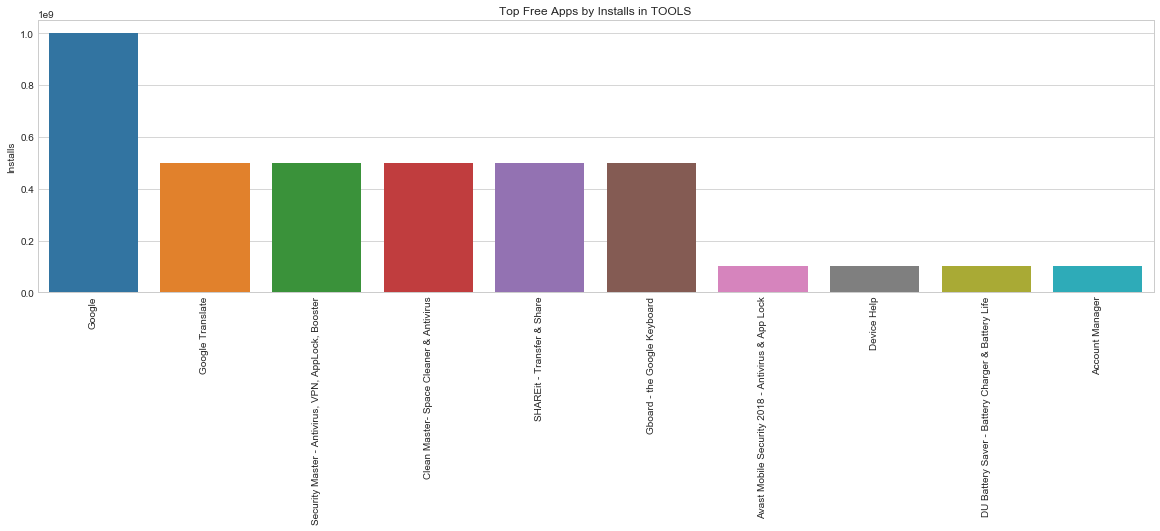

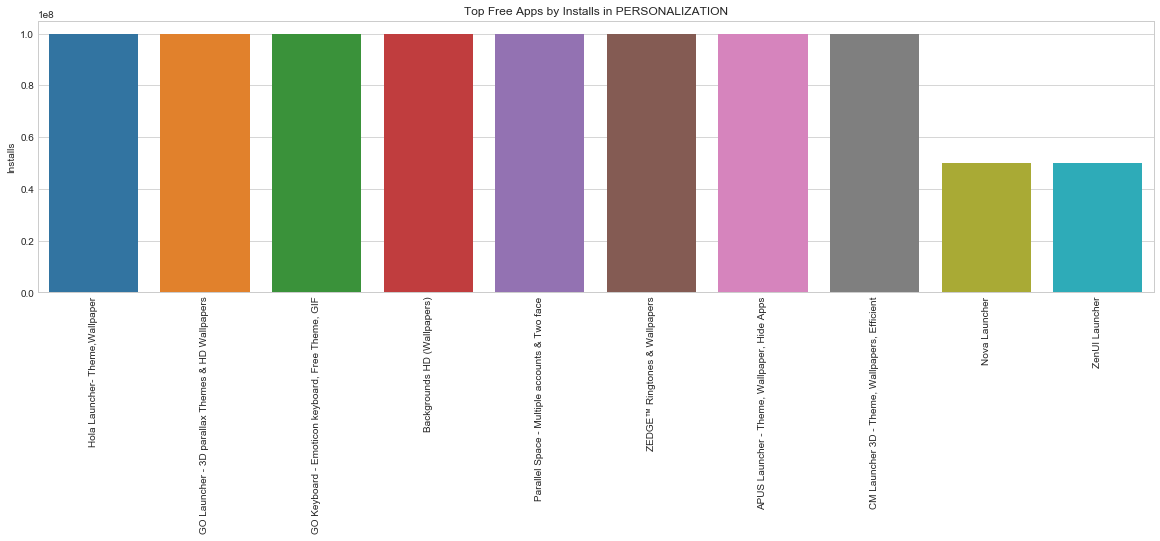

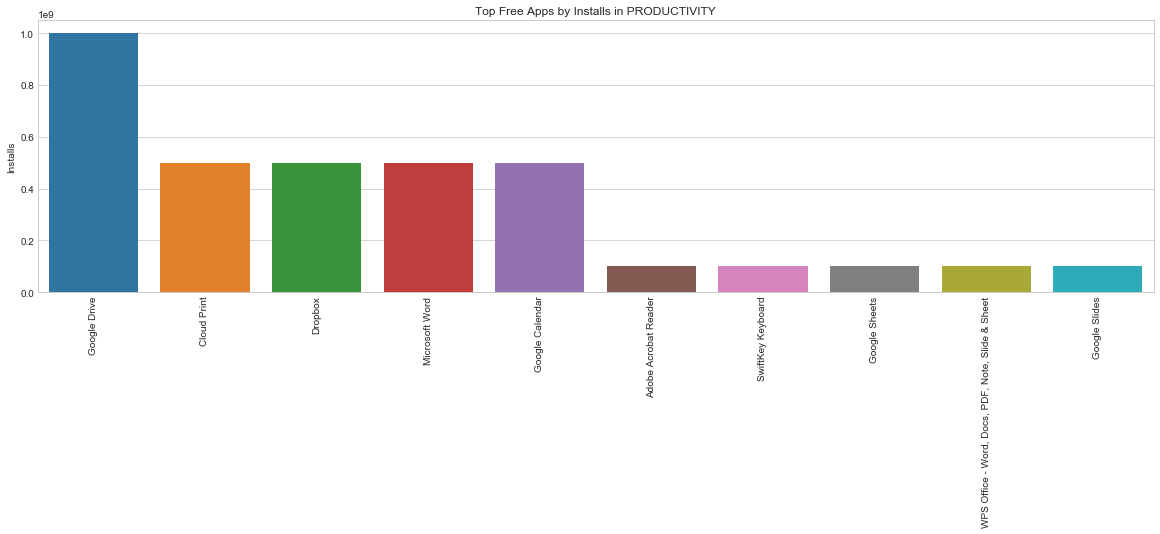

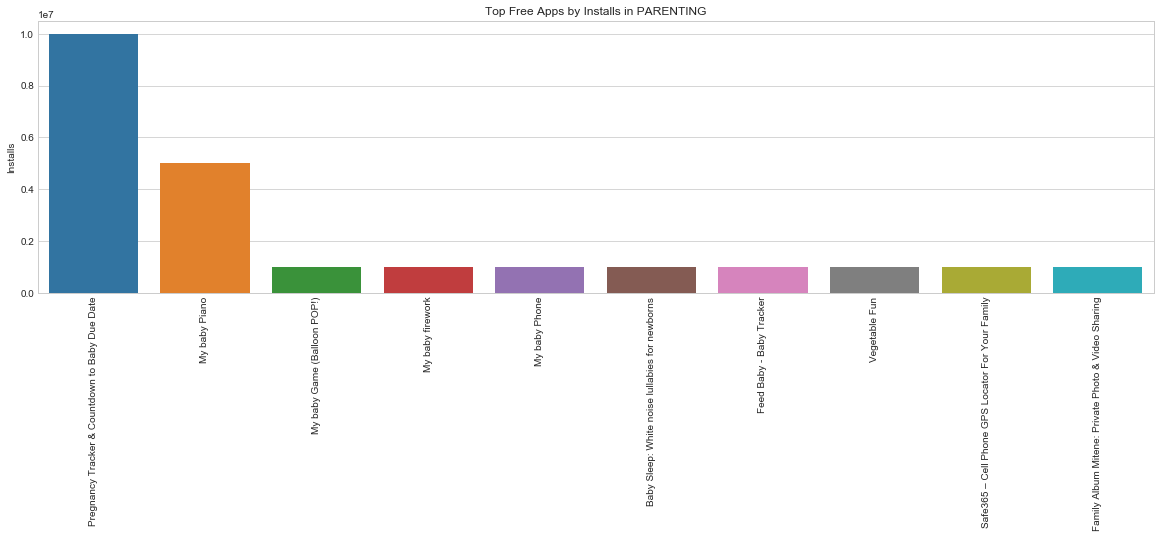

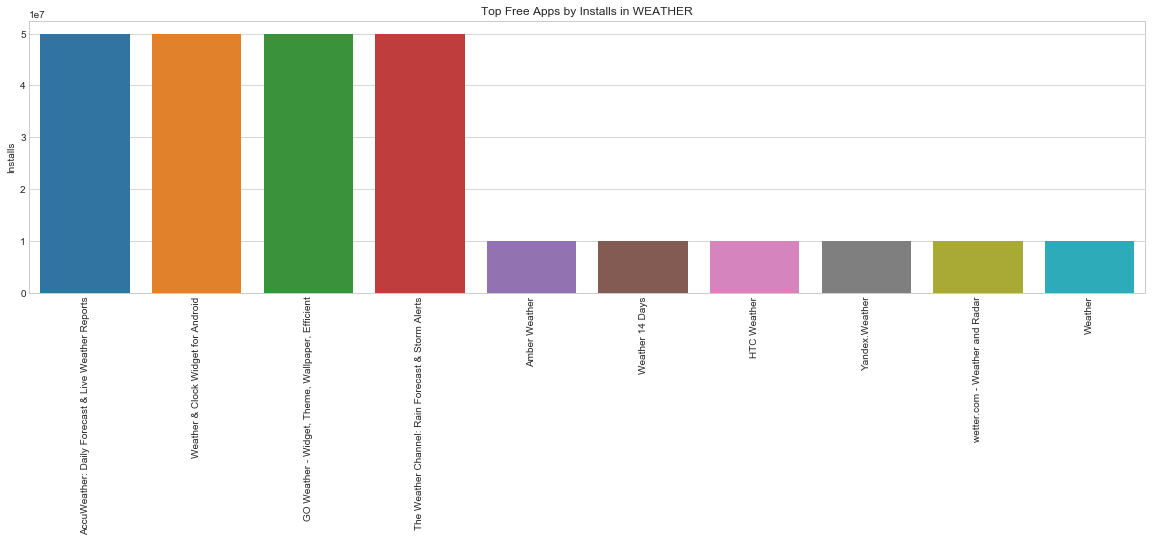

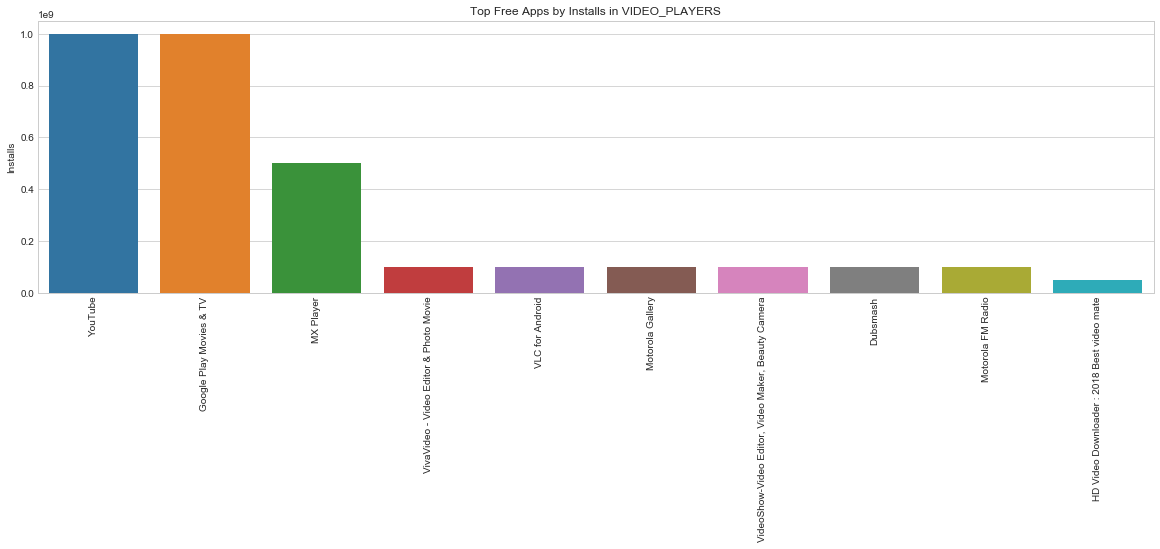

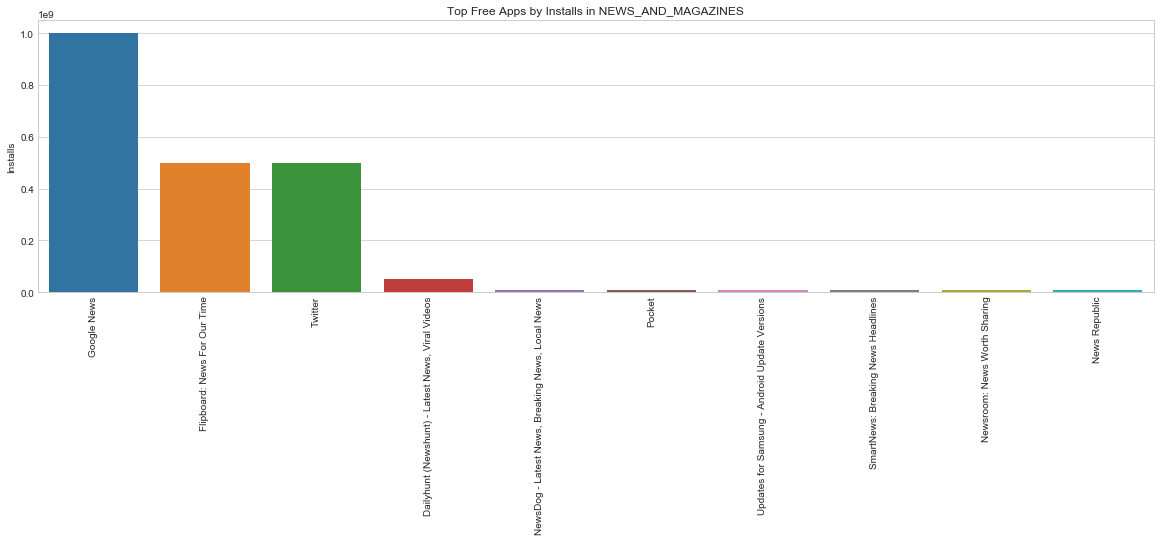

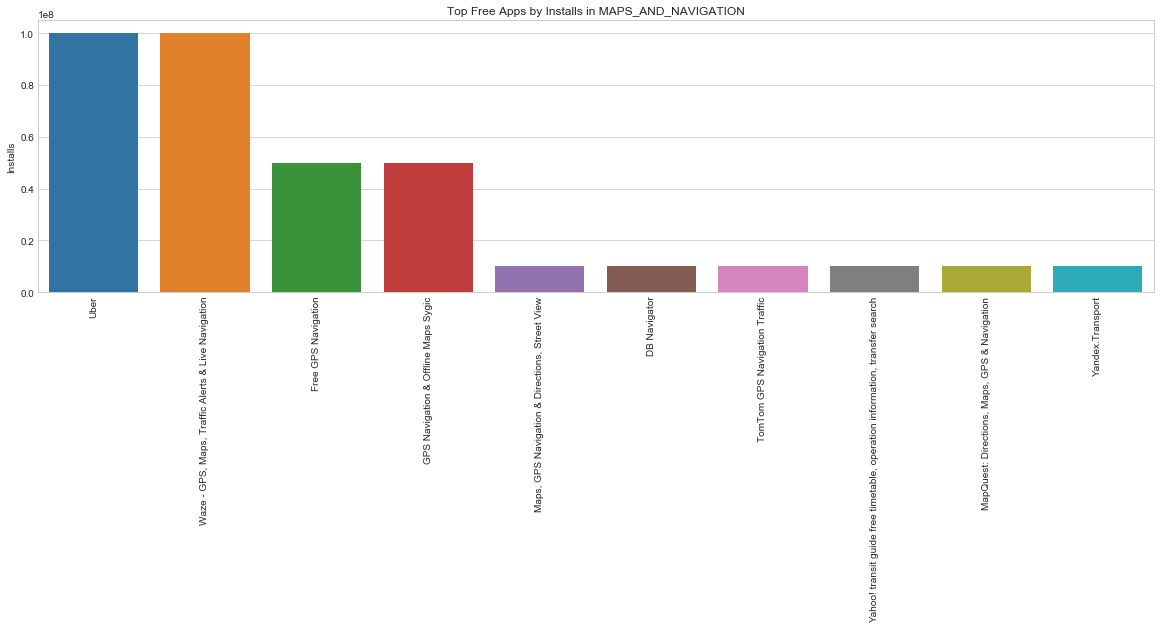

In [ ]:
# Top Free Apps 
free_df = free_apps.loc[:, ["App", "Category", "Installs", "Price"]]
freein_df = free_df.sort_values(by="Installs", ascending=False)

category = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
            'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
            'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
            'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
            'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
            'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
            'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
            'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

for i in range(0,33): 
    
    df = freein_df[freein_df["Category"] == category[i]].head(10)
    
    plt.figure(figsize=(20,5))
    y_pos = np.arange(len(df["App"]))
    names=tuple(df.App)
    sns.barplot(y_pos, "Installs", data=df)
    plt.xticks(y_pos, names, rotation=90)
    plt.title("Top Free Apps by Installs in "+category[i])
    plt.ylabel("Installs")

plt.show()

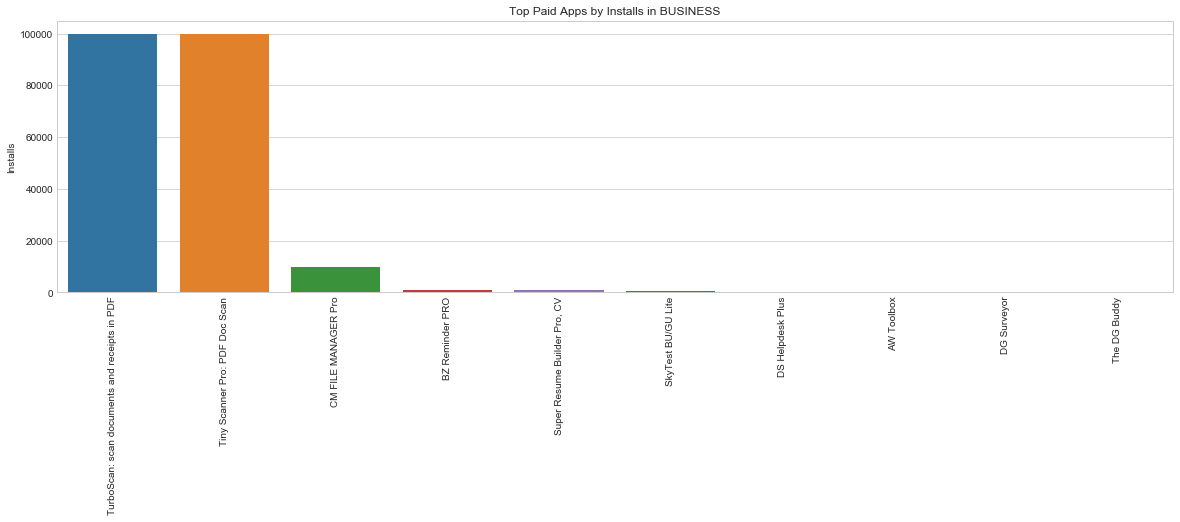

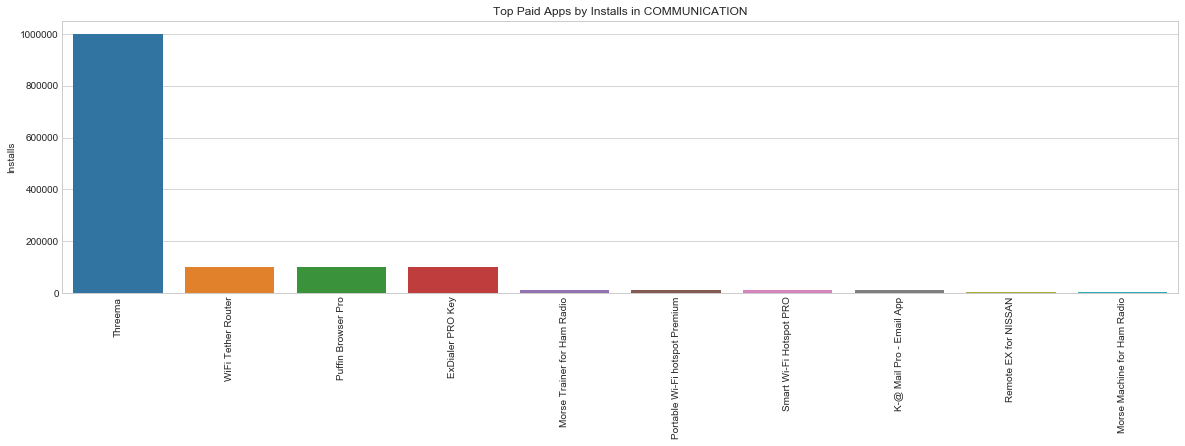

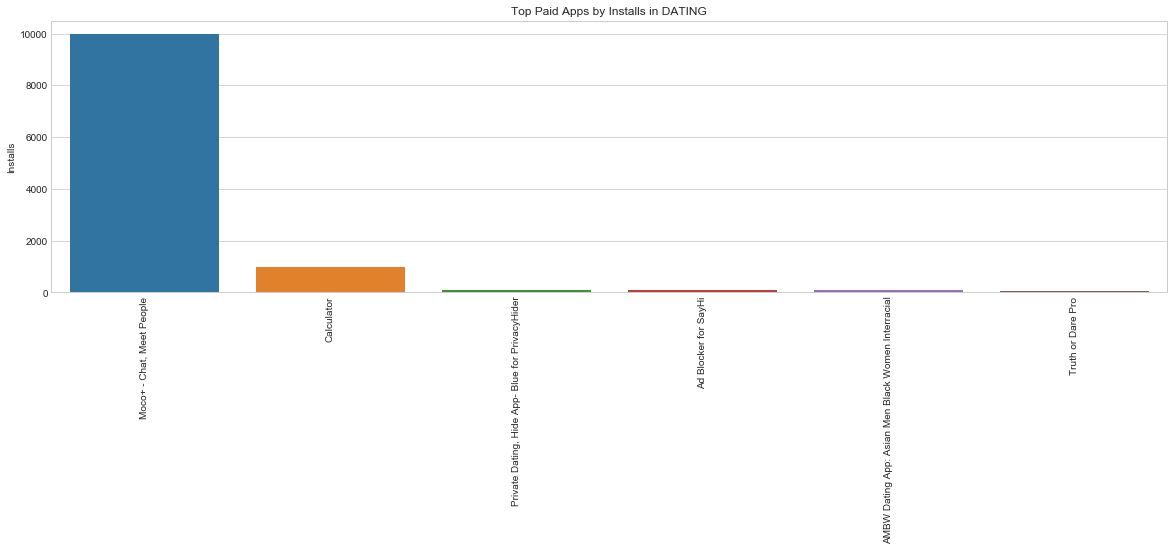

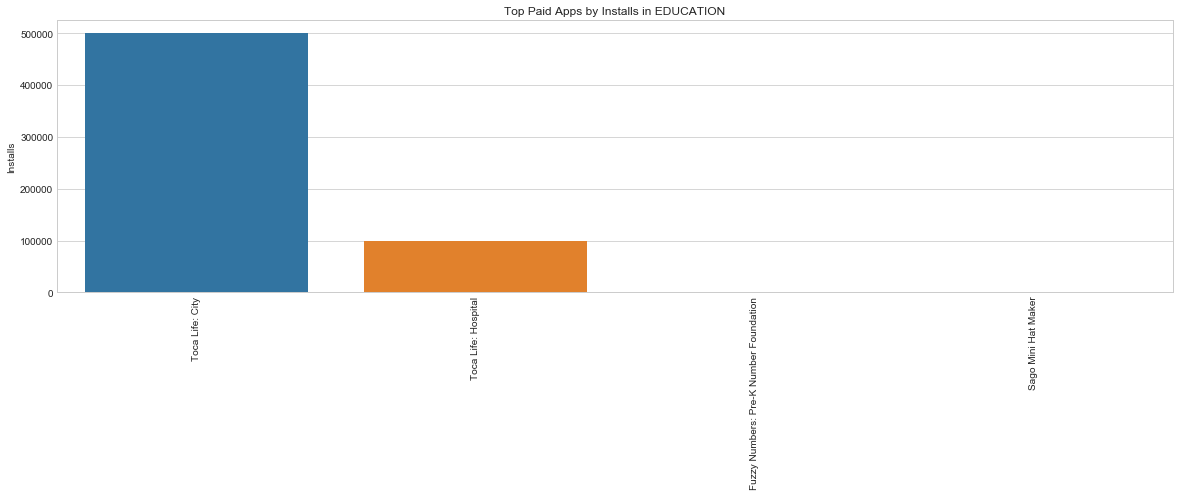

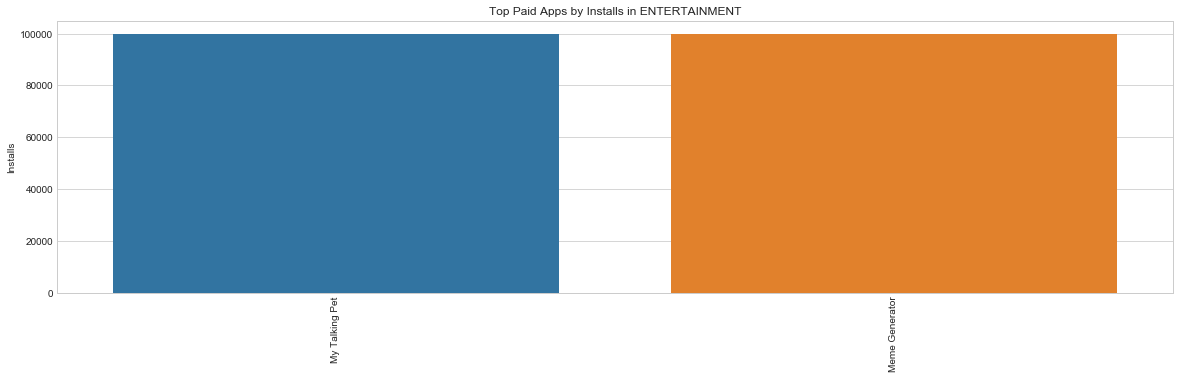

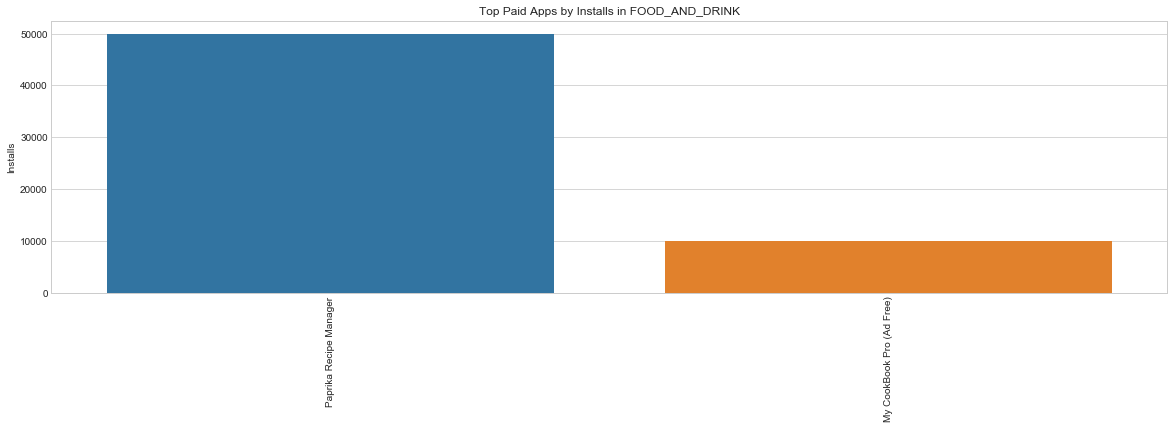

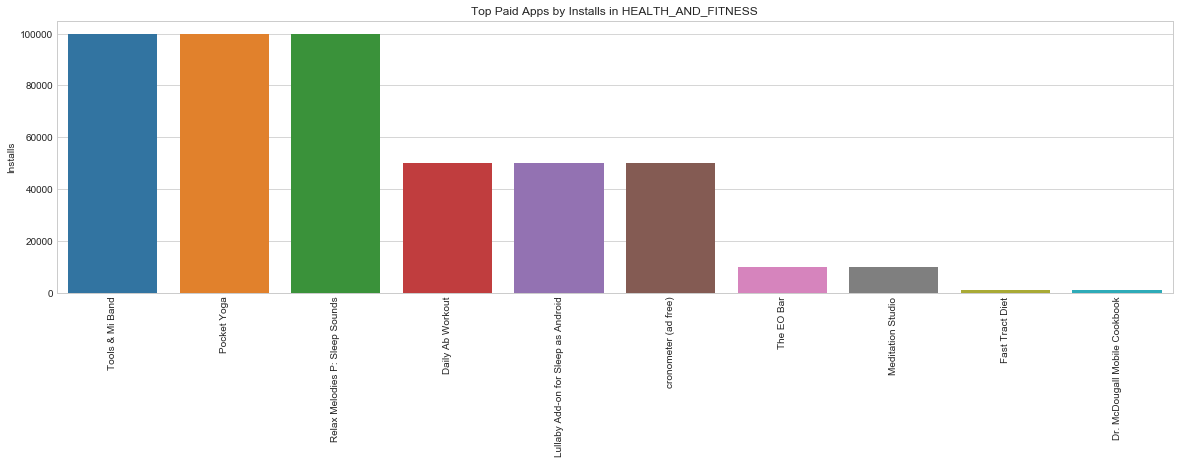

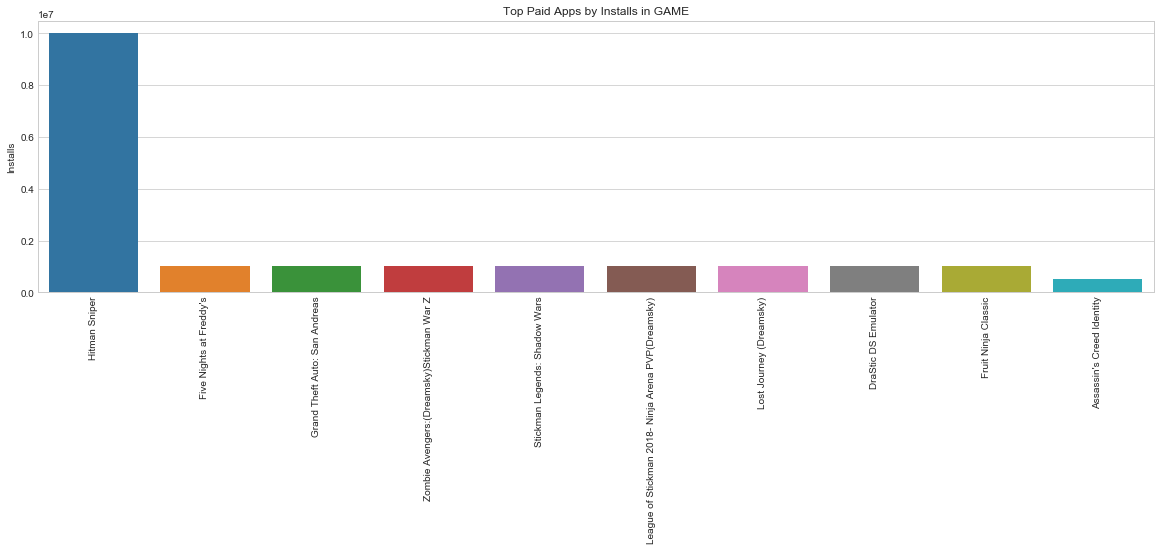

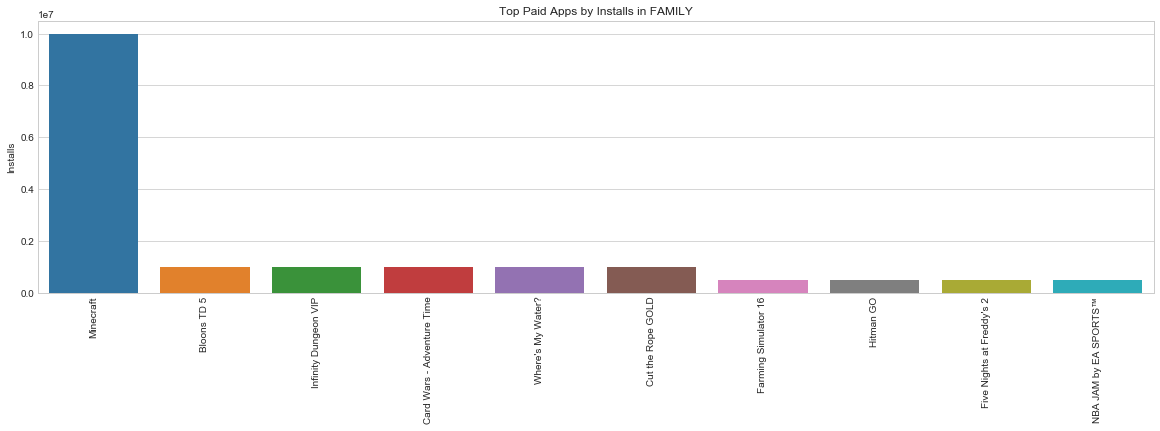

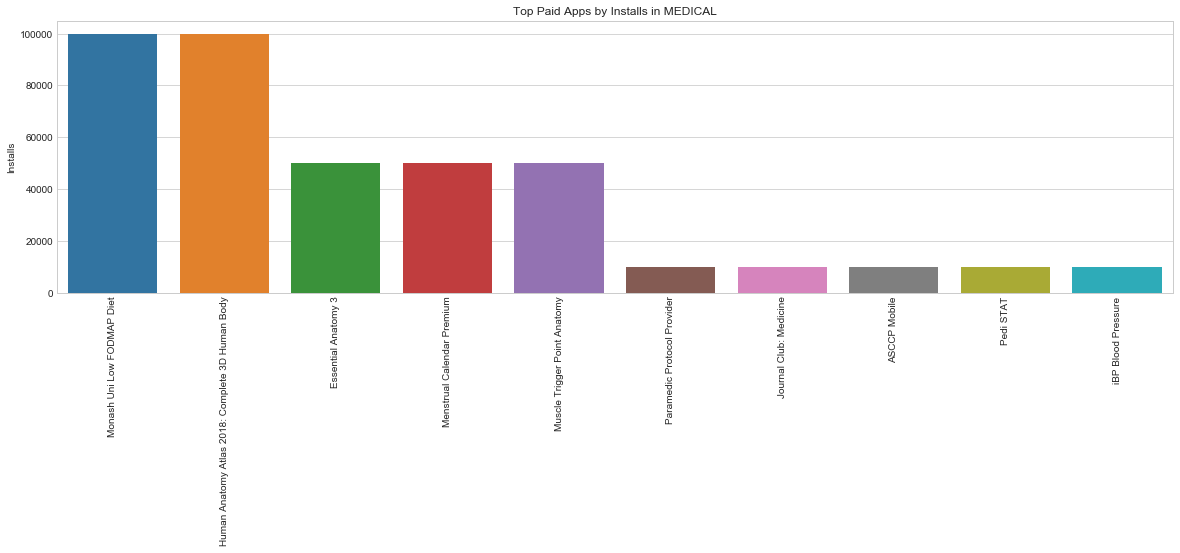

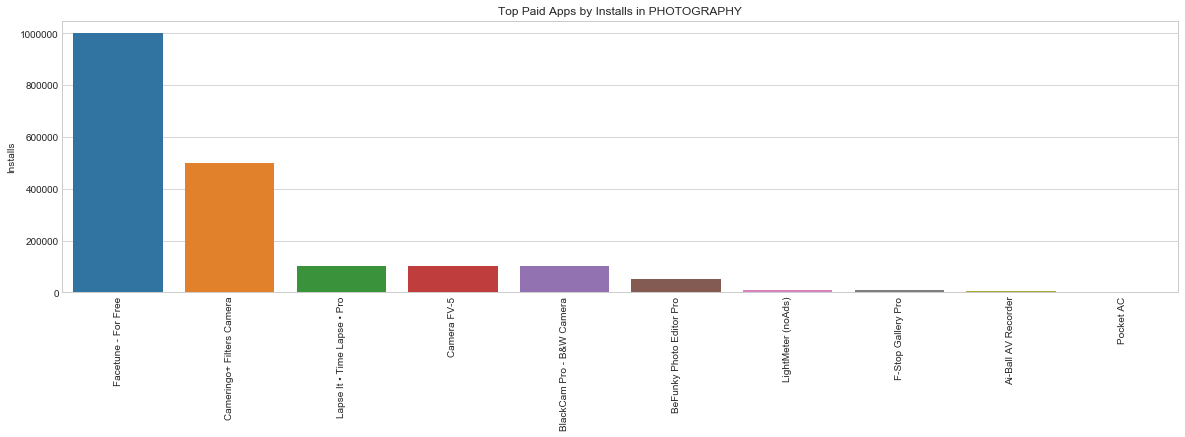

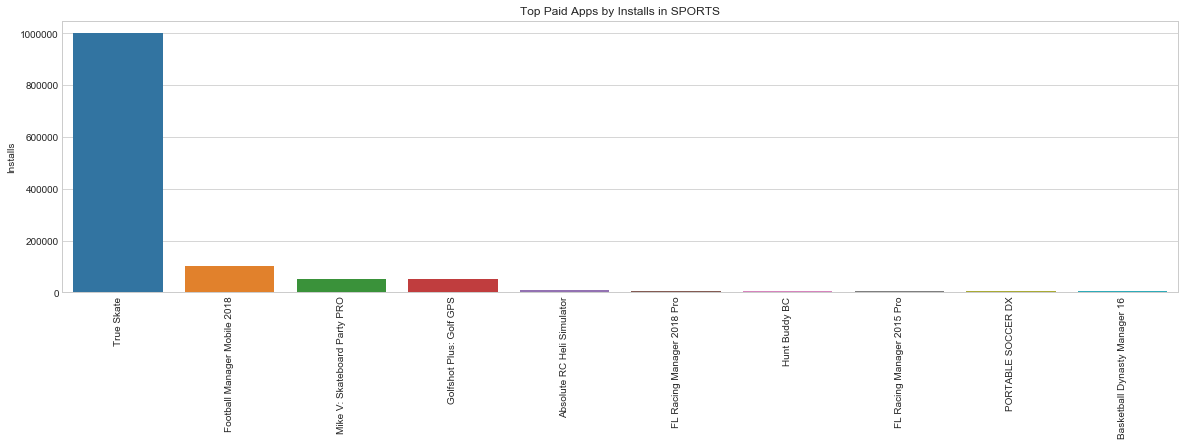

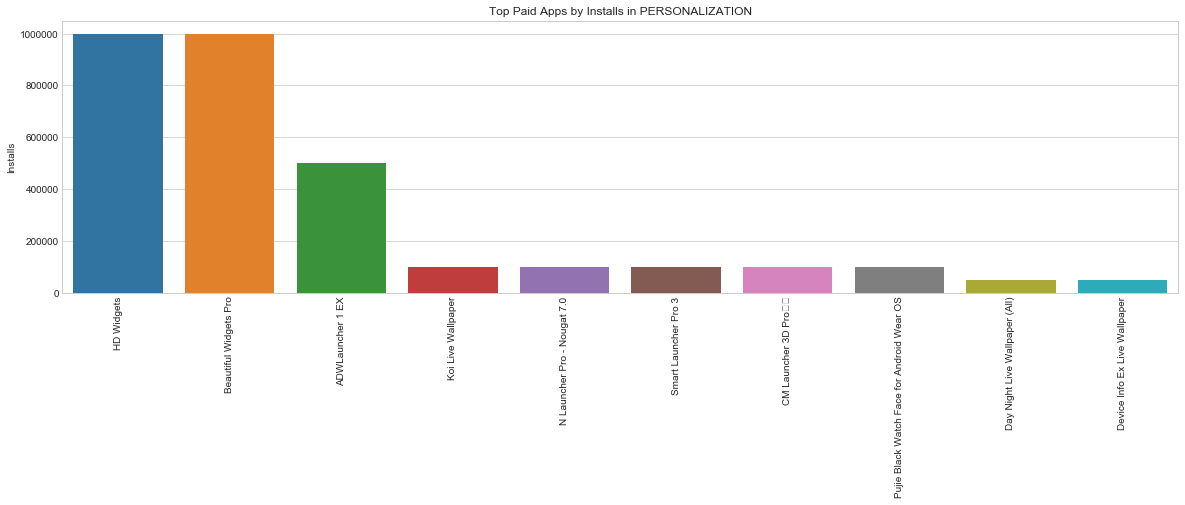

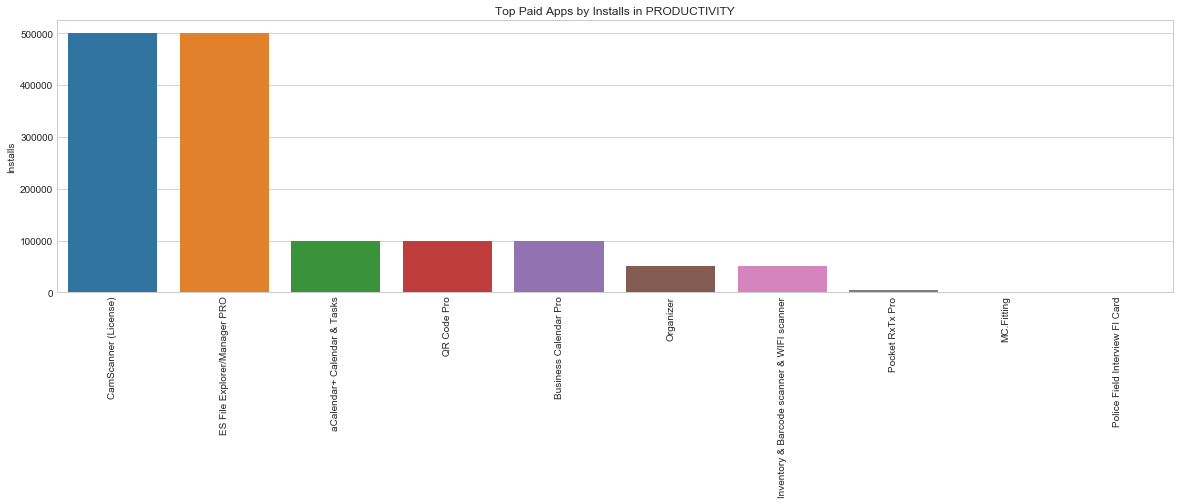

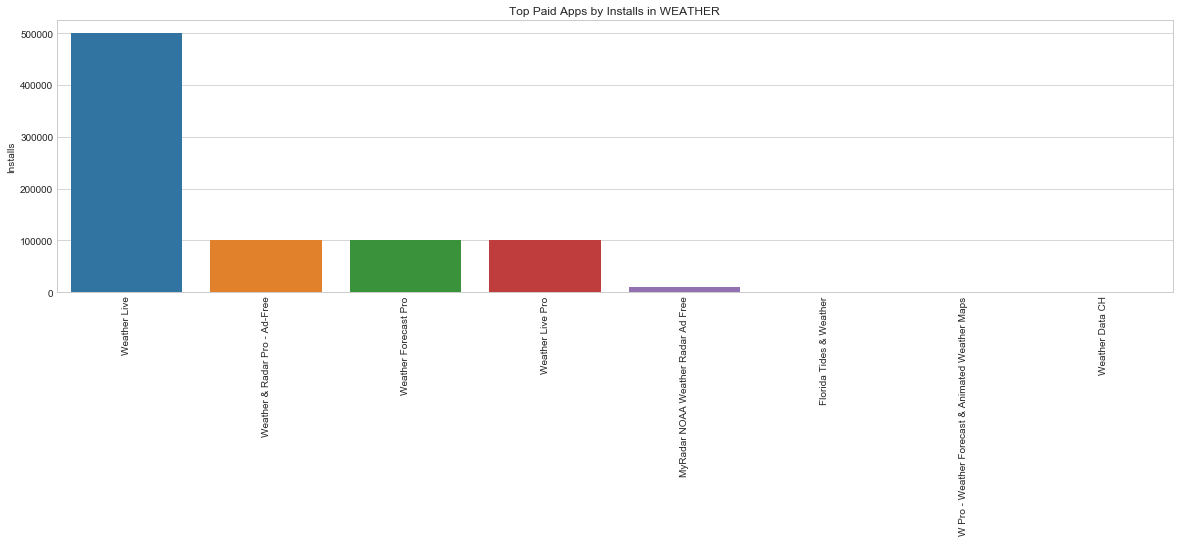

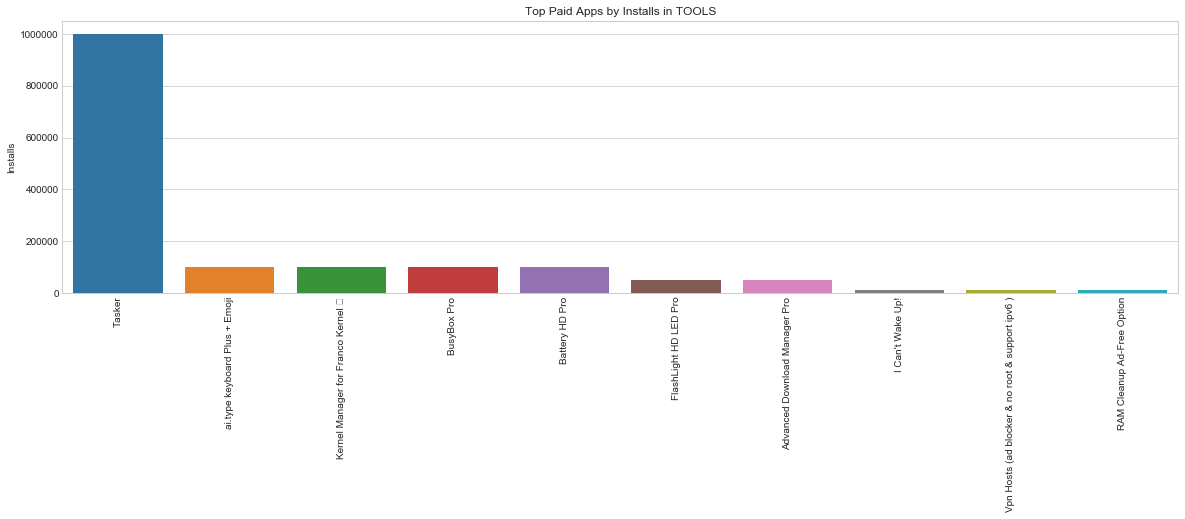

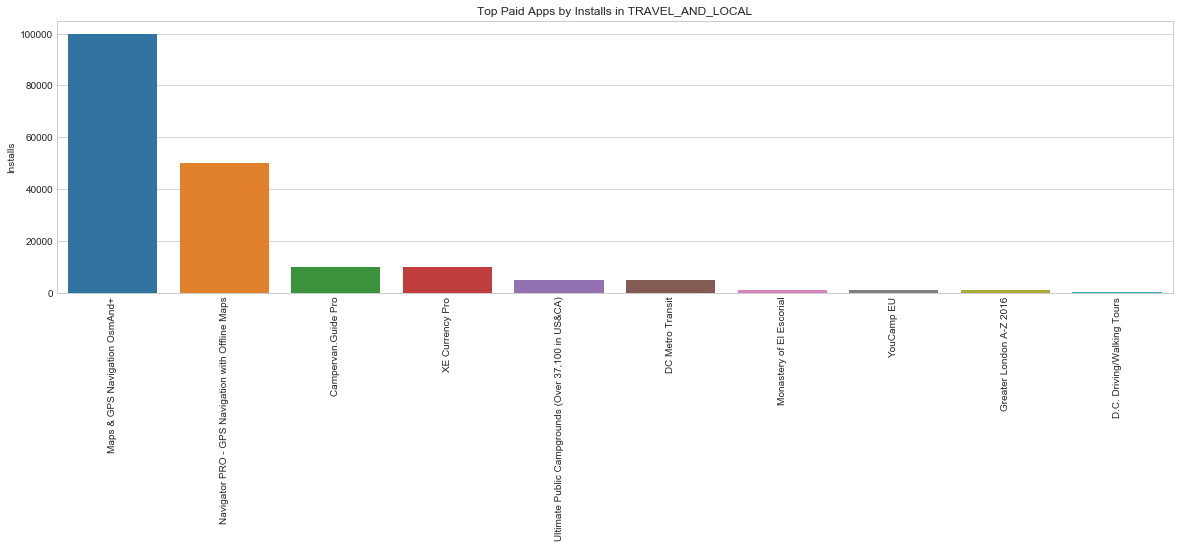

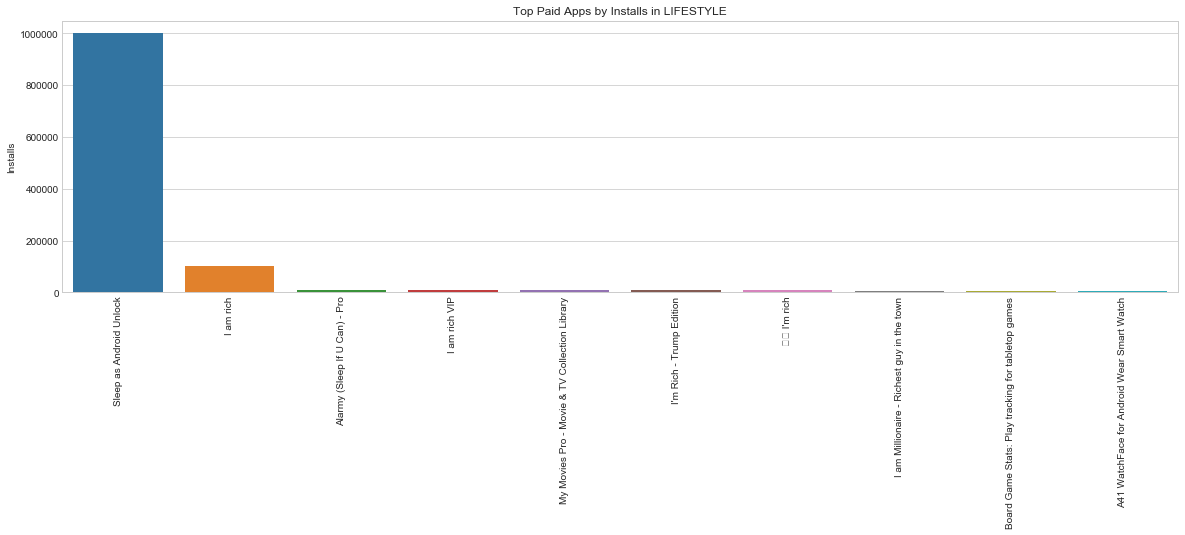

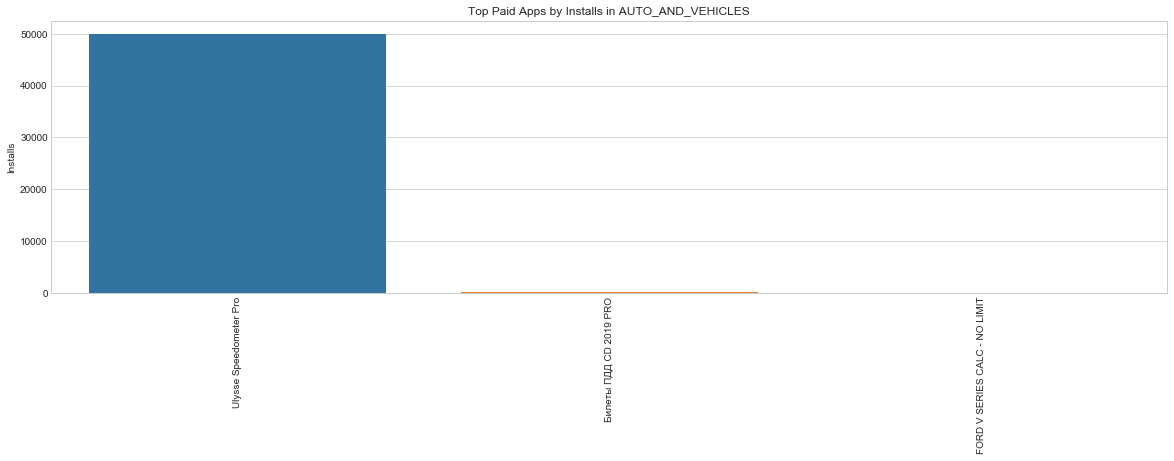

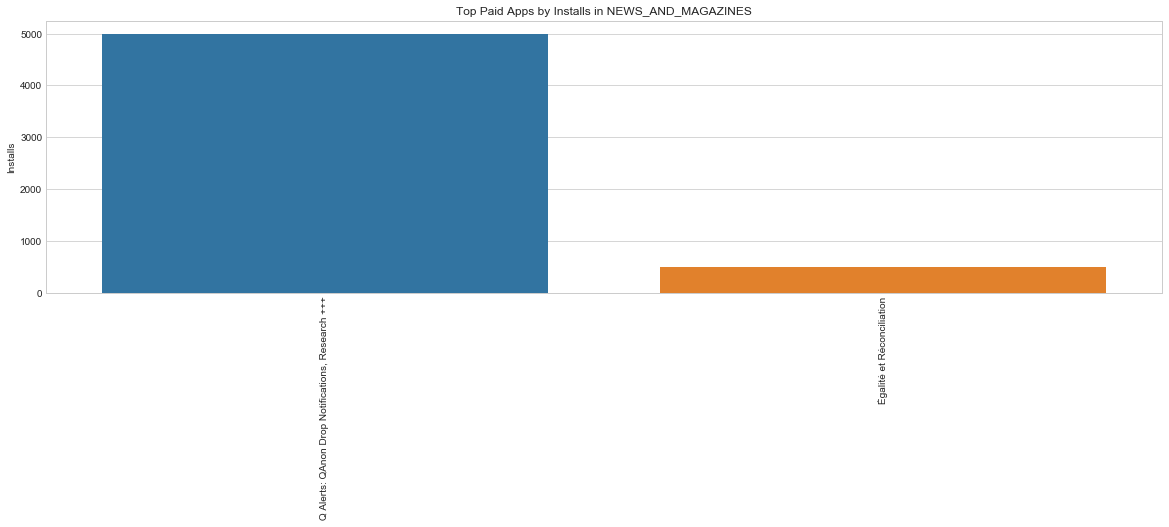

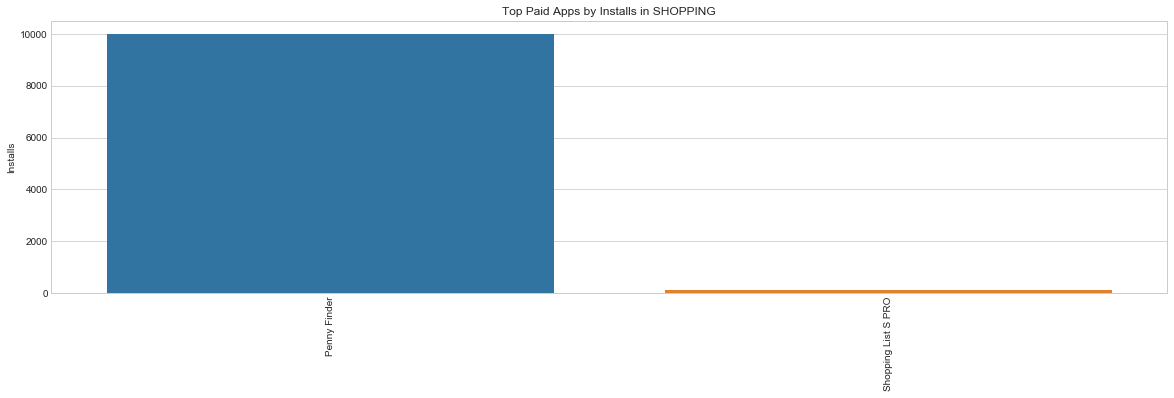

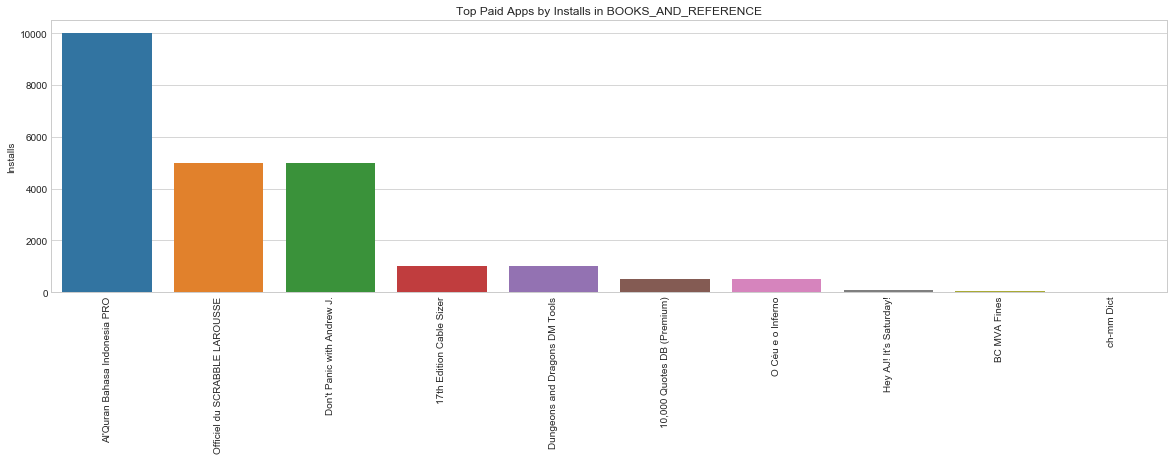

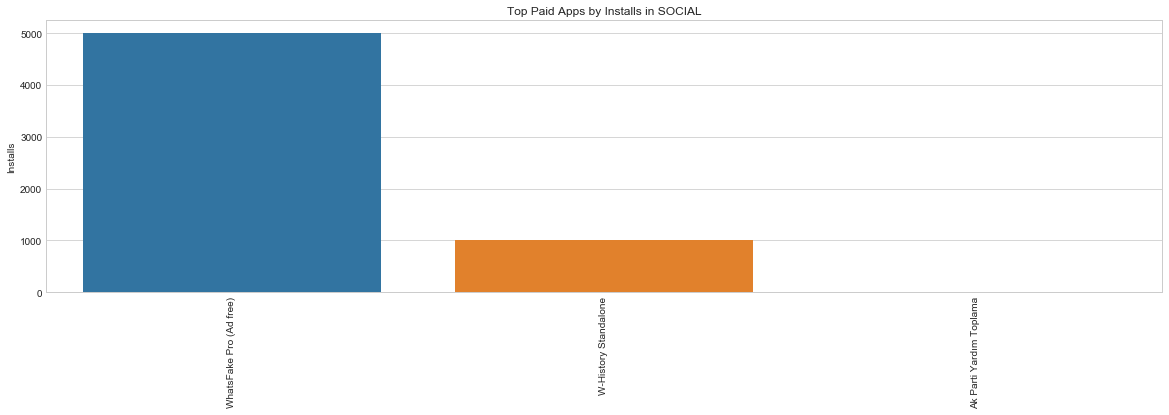

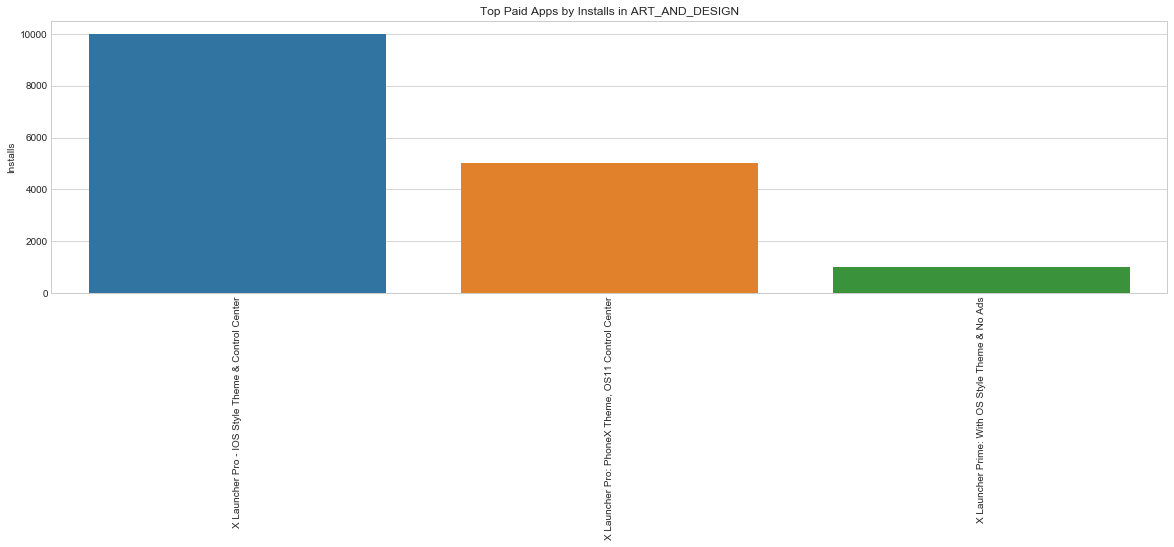

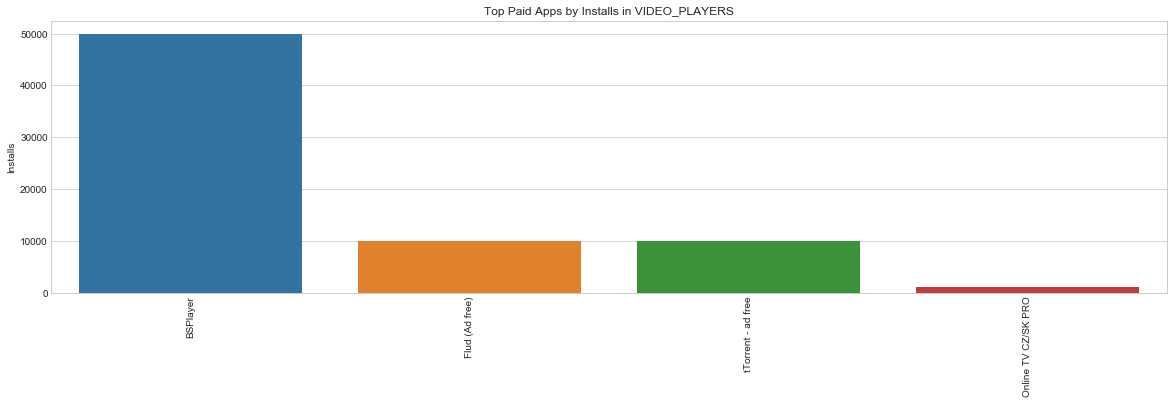

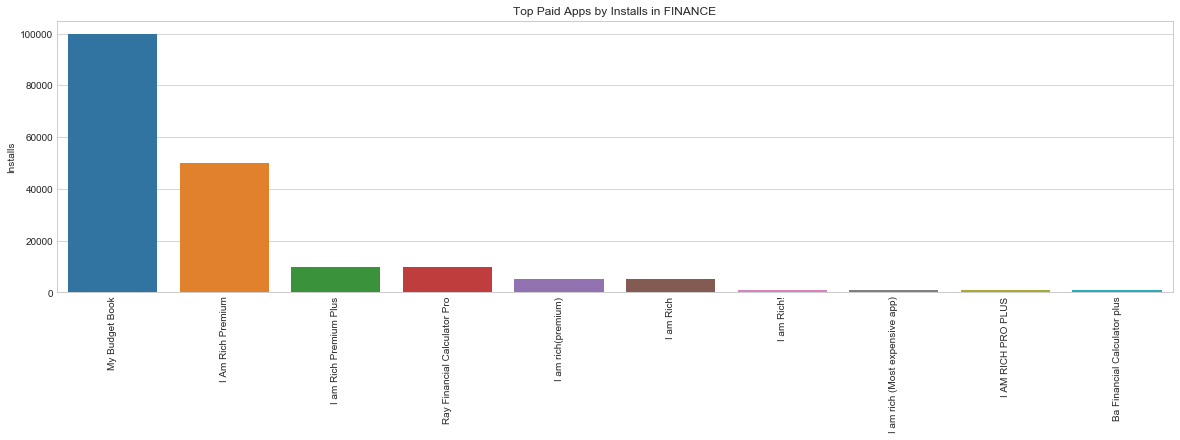

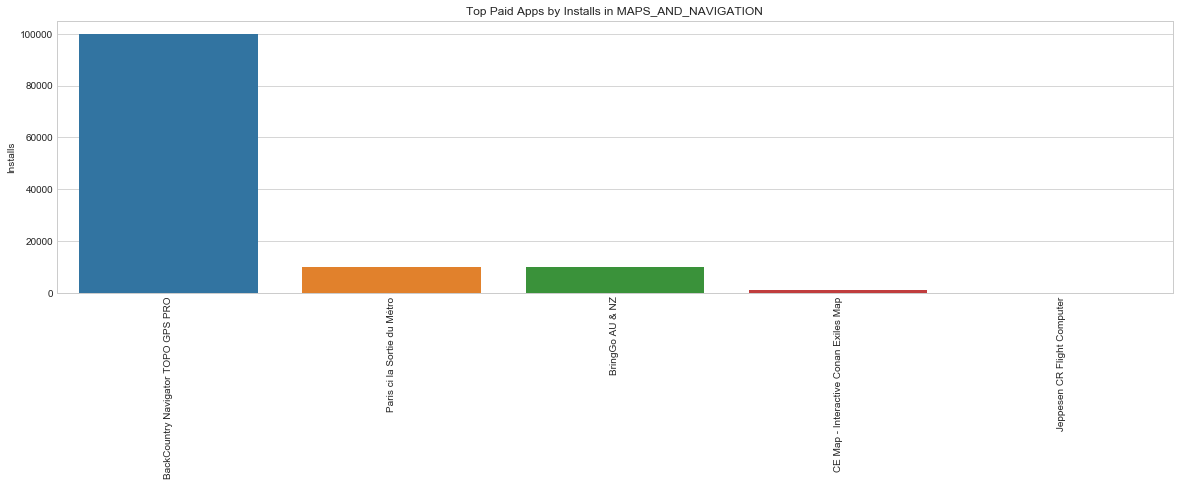

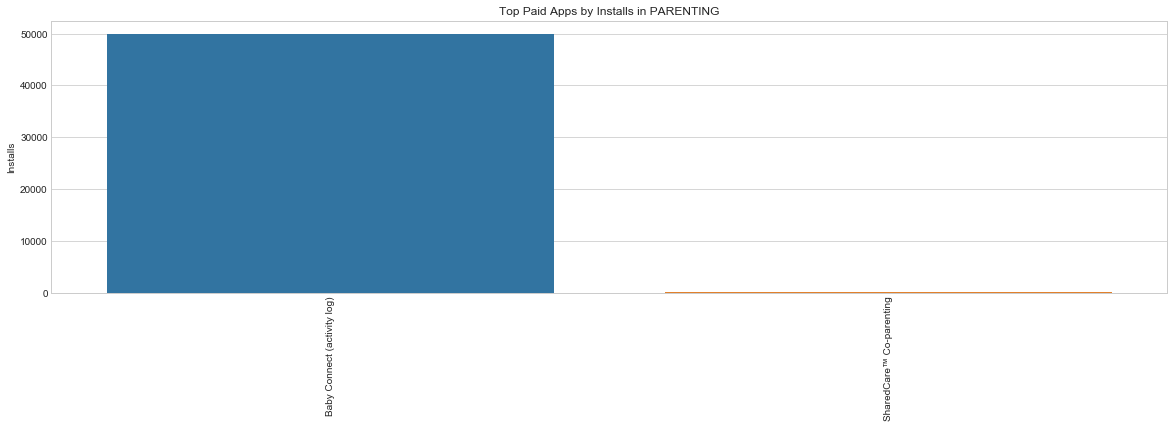

In [ ]:
# Top Paid Apps 
paid_df = paid_apps.loc[:, ["App", "Category", "Installs", "Price"]]
paidin_df = paid_df.sort_values(by="Installs", ascending=False)

category = ['BUSINESS', 'COMMUNICATION', 'DATING', 'EDUCATION',
            'ENTERTAINMENT', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'GAME',
            'FAMILY', 'MEDICAL', 'PHOTOGRAPHY', 'SPORTS', 'PERSONALIZATION',
            'PRODUCTIVITY', 'WEATHER', 'TOOLS', 'TRAVEL_AND_LOCAL',
            'LIFESTYLE', 'AUTO_AND_VEHICLES', 'NEWS_AND_MAGAZINES', 'SHOPPING',
            'BOOKS_AND_REFERENCE', 'SOCIAL', 'ART_AND_DESIGN', 'VIDEO_PLAYERS',
            'FINANCE', 'MAPS_AND_NAVIGATION', 'PARENTING']

for i in range(0,28): 
    
    df = paidin_df[paidin_df["Category"] == category[i]].head(10)
    
    plt.figure(figsize=(20,5))
    y_pos = np.arange(len(df["App"]))
    names=tuple(df.App)
    sns.barplot(y_pos, "Installs", data=df)
    plt.xticks(y_pos, names, rotation=90)
    plt.title("Top Paid Apps by Installs in "+category[i])
    plt.ylabel("Installs")
    #sns.barplot(x=top_income[top_income['Category'] == category[i]]['App'].head(10), y=top_income[top_income['Category'] == category[i]]['Income'].head(10), ax=ax[rowax[i], flat_colax[i]]).set_title(category[i])

plt.show()

In [ ]:
free_apps.head()

App        Category  Reviews  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN      159   
1                                Coloring book moana  ART_AND_DESIGN      967   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    87510   
3                              Sketch - Draw & Paint  ART_AND_DESIGN   215644   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN      967   

   Size  Installs  Type  Price Content Rating                     Genres  \
0  19.0     10000  Free    0.0       Everyone               Art & Design   
1  14.0    500000  Free    0.0       Everyone  Art & Design;Pretend Play   
2   8.7   5000000  Free    0.0       Everyone               Art & Design   
3  25.0  50000000  Free    0.0           Teen               Art & Design   
4   2.8    100000  Free    0.0       Everyone    Art & Design;Creativity   

  Last Updated  ... Install_Log Type Code  Content Rating Code  \
0   2018-01-07  ...    9.210340         0                    1   
1   2018-01-15  ...   13.122363         0                    1   
2   2018-08-01  ...   15.424948         0                    1   
3   2018-06-08  ...   17.727534         0                    4   
4   2018-06-20  ...   11.512925         0                    1   

   Genres Category  Genres Subcategory  Genres Category Code  \
0     Art & Design        Art & Design                     3   
1     Art & Design        Pretend Play                     3   
2     Art & Design        Art & Design                     3   
3     Art & Design        Art & Design                     3   
4     Art & Design          Creativity                     3   

   Genres Subcategory Code  Year Last Updated Day  Rating  
0                        4  2018              852     4.1  
1                       36  2018              844     3.9  
2                        4  2018              646     4.7  
3                        4  2018              700     4.5  
4                       16  2018              688     4.3  

[5 rows x 24 columns]

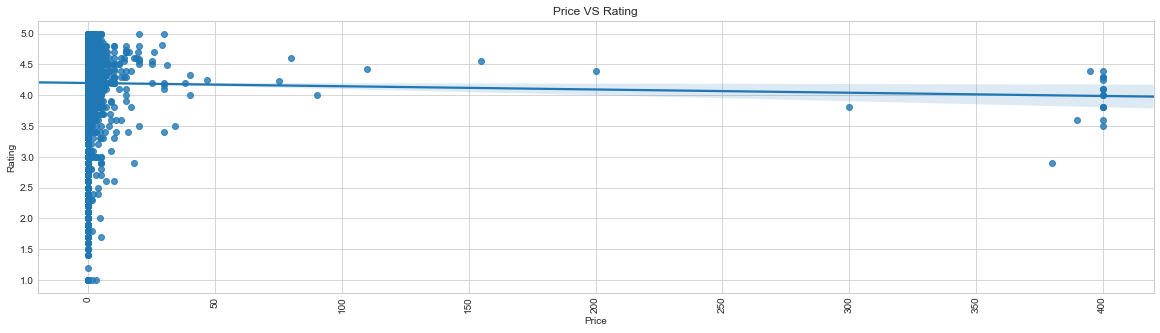

In [ ]:
plt.figure(figsize=(20,5))
sns.regplot(x="Price", y="Rating", data=apps)
plt.title("Price VS Rating")
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x360 with 0 Axes>

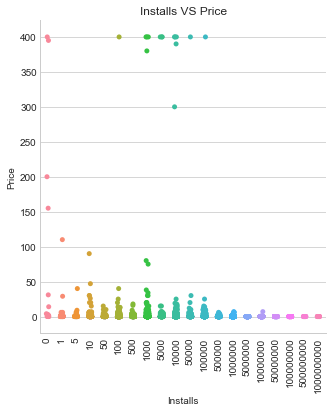

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(x="Installs", y="Price", data=install_df)
plt.title("Installs VS Price")
plt.xticks(rotation=90)
plt.show()

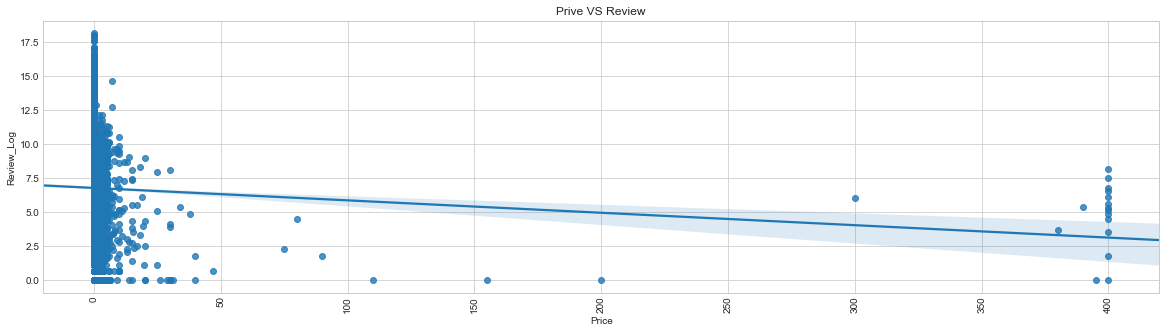

In [ ]:
plt.figure(figsize=(20,5))
sns.regplot(x="Price", y="Review_Log", data=apps)
plt.xticks(rotation=90)
plt.title("Prive VS Review")
plt.show()

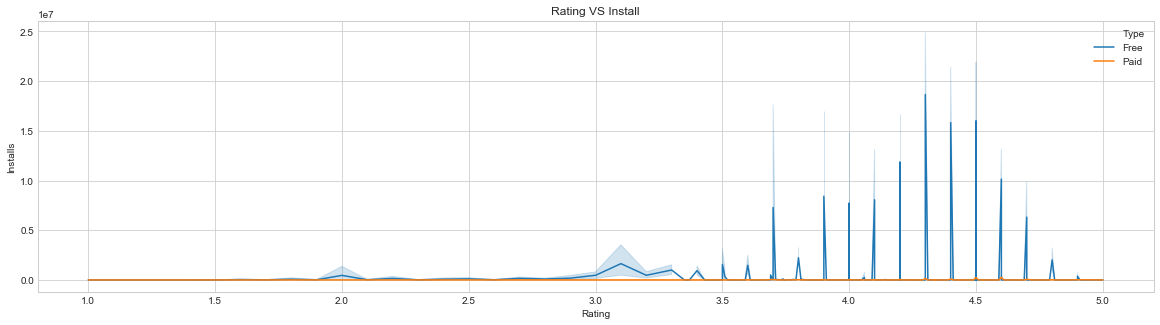

In [ ]:
plt.figure(figsize=(20,5)) 
sns.lineplot(x="Rating", y="Installs", hue="Type", data=apps)
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.title("Rating VS Install")
plt.show()

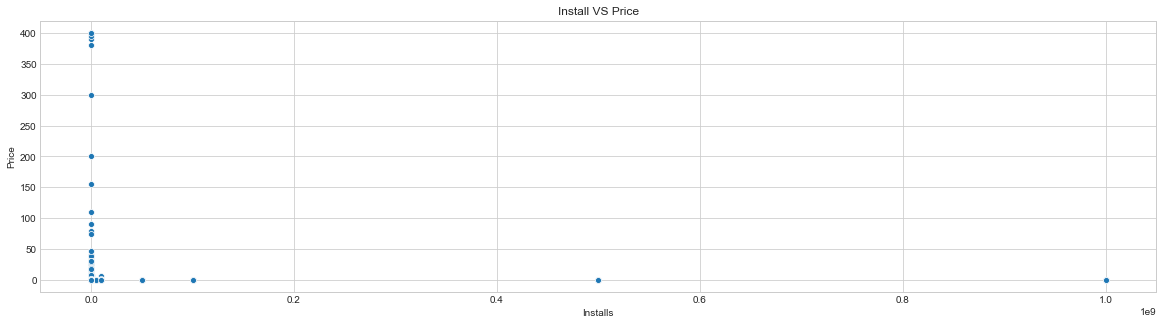

In [ ]:
plt.figure(figsize=(20,5)) 
sns.scatterplot(x="Installs", y="Price", data=apps)
plt.xlabel("Installs")
plt.ylabel("Price")
plt.title("Install VS Price")
plt.show()

### Top Categories of Apps  by Google Play Store Income

In [ ]:
allincome_df = apps.copy()
allincome_df = allincome_df[allincome_df["Type"] == "Paid"]
allincome_df["Income"] = allincome_df["Installs"] * allincome_df["Price"]
income_df = allincome_df.loc[:, ["App", "Category", "Installs", "Price", "Income"]]
income_df.sort_values(by="Income", ascending=False).head()

words = ["rich", "Rich", "RICH"]
mask = income_df.iloc[:, 0].str.contains(r'\b(?:{})\b'.format('|'.join(words)))
income_df = income_df[~mask]
top_income = income_df.sort_values(by="Income", ascending=False)

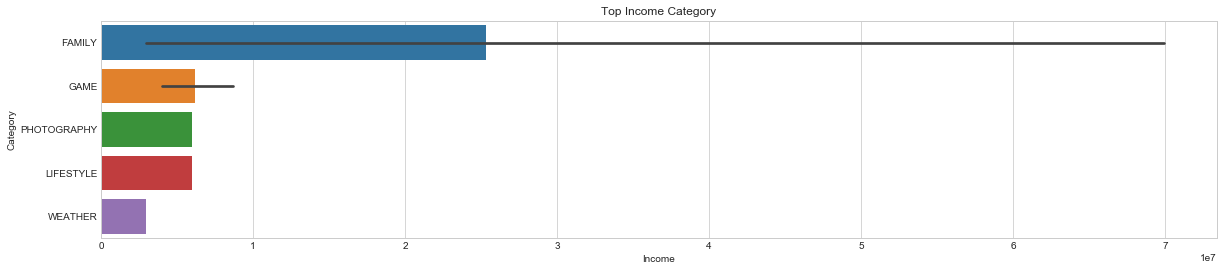

In [ ]:
plt.figure(figsize=(20,4))

sns.barplot(x="Income", y="Category", data=top_income.head(10))
plt.title("Top Income Category")
plt.show()

### Top Income of Apps by Google Play Store Income

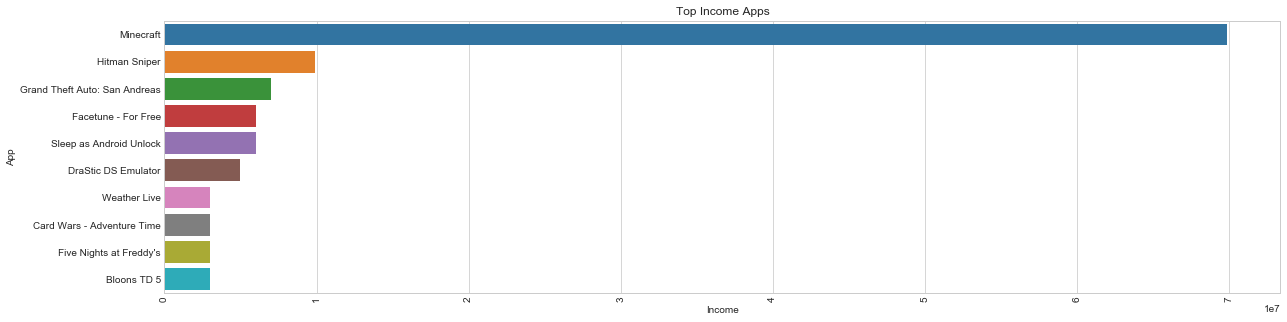

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="Income", y="App", data=top_income.head(10))
plt.title("Top Income Apps")
plt.xticks(rotation=90)
plt.show()

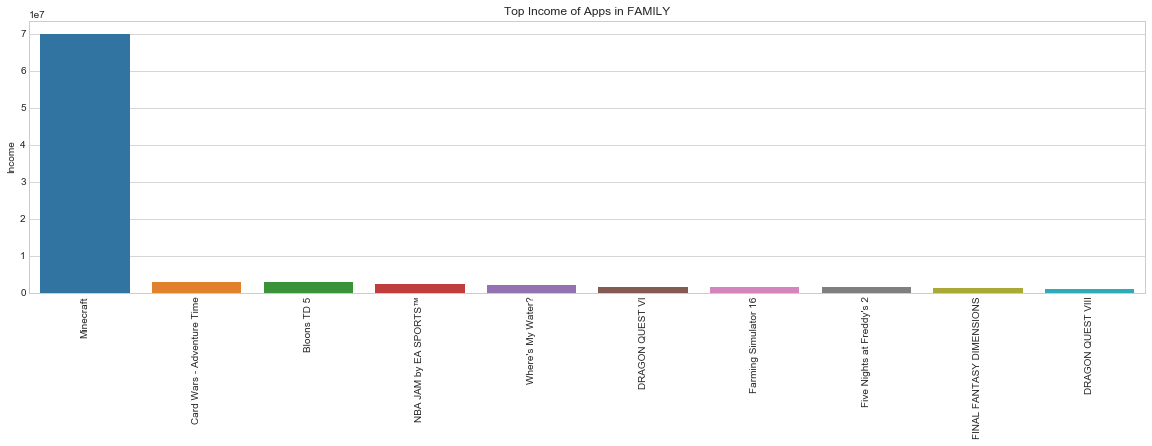

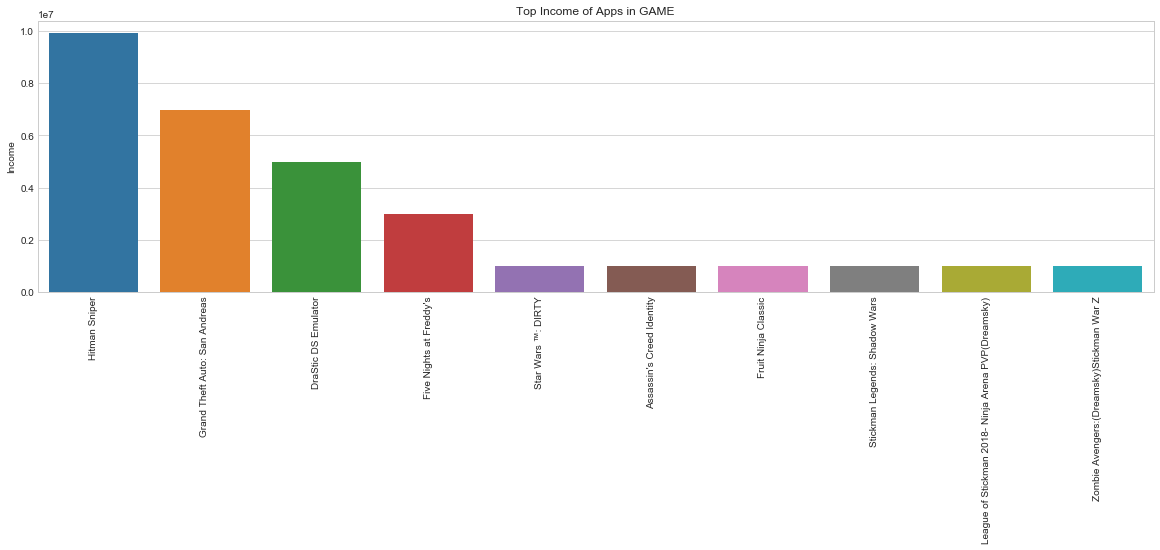

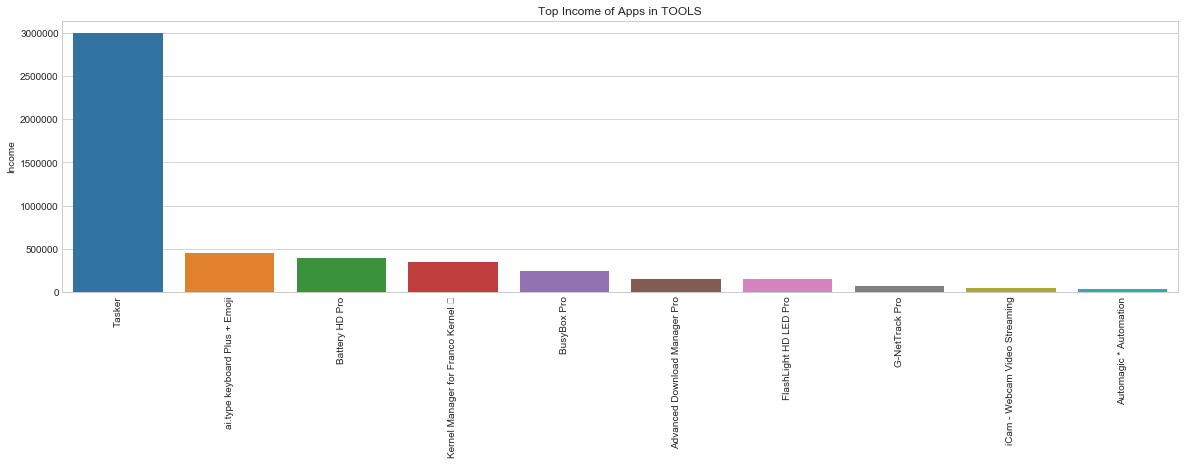

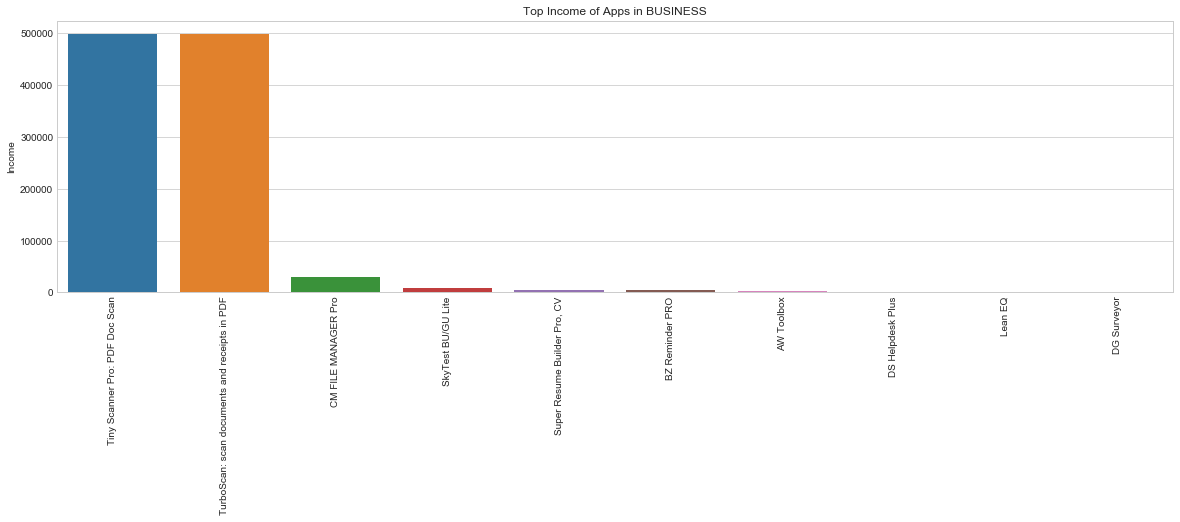

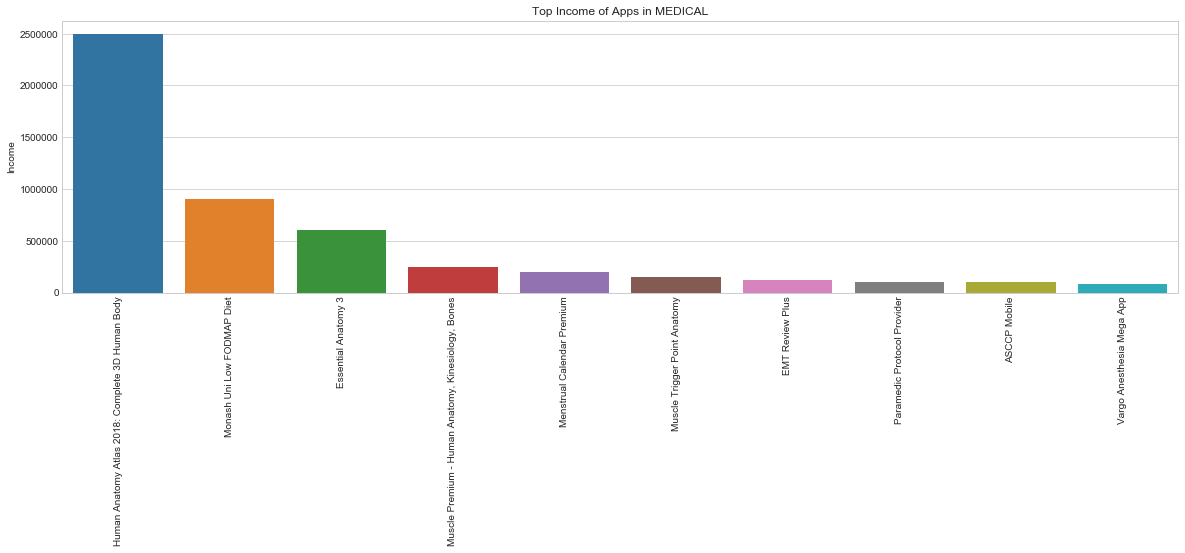

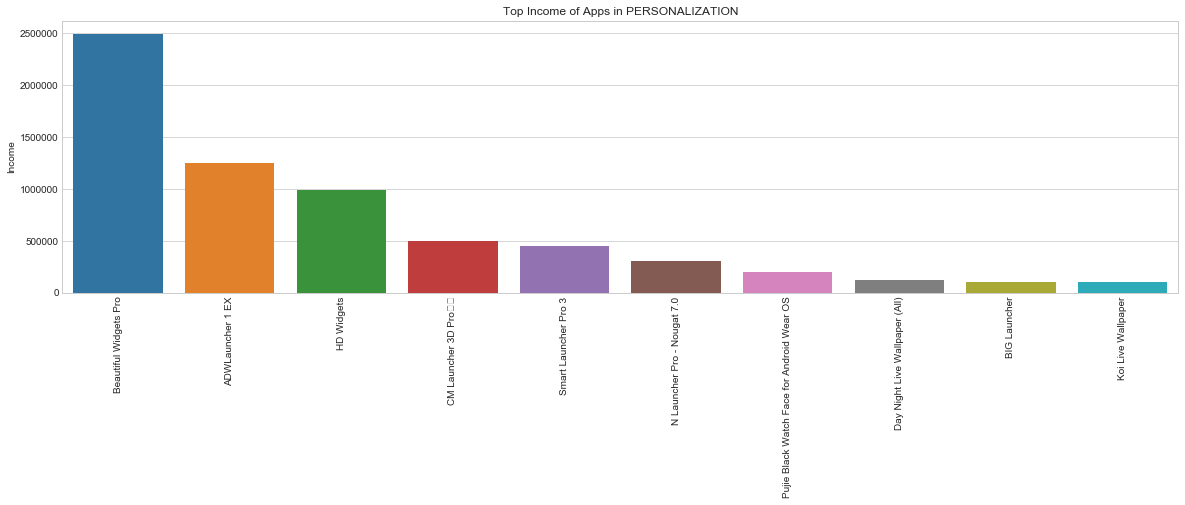

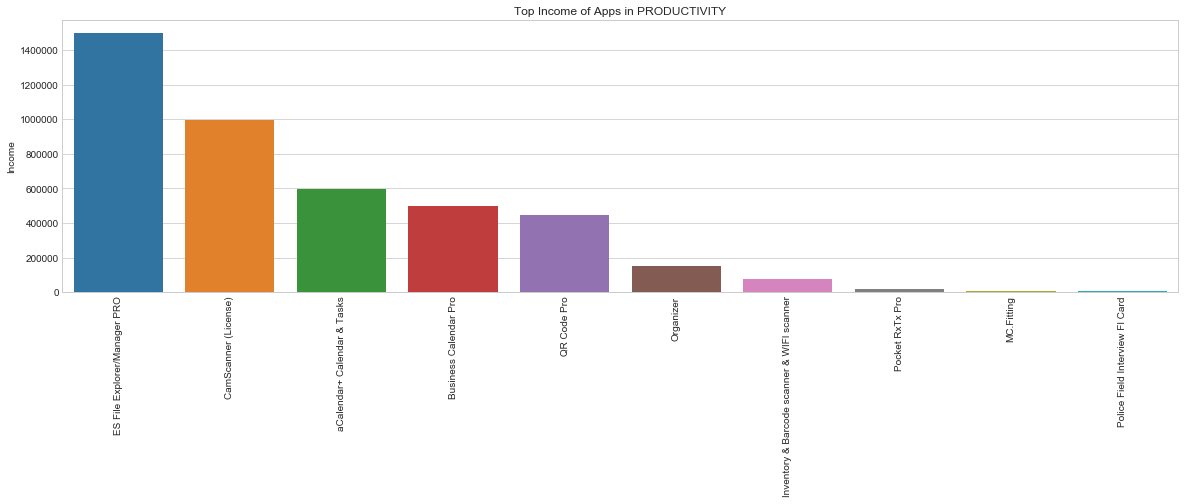

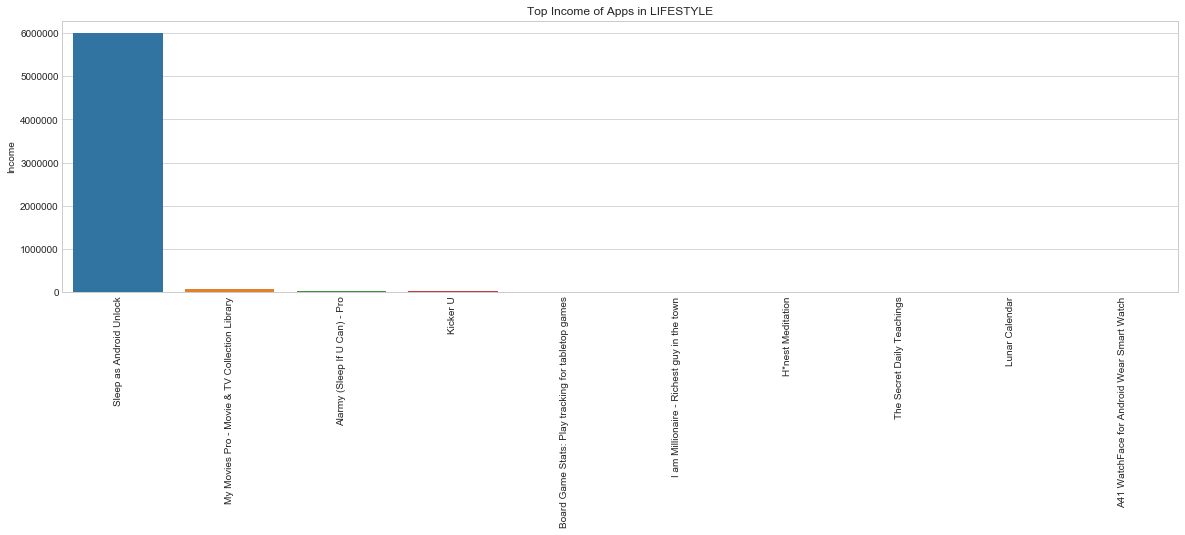

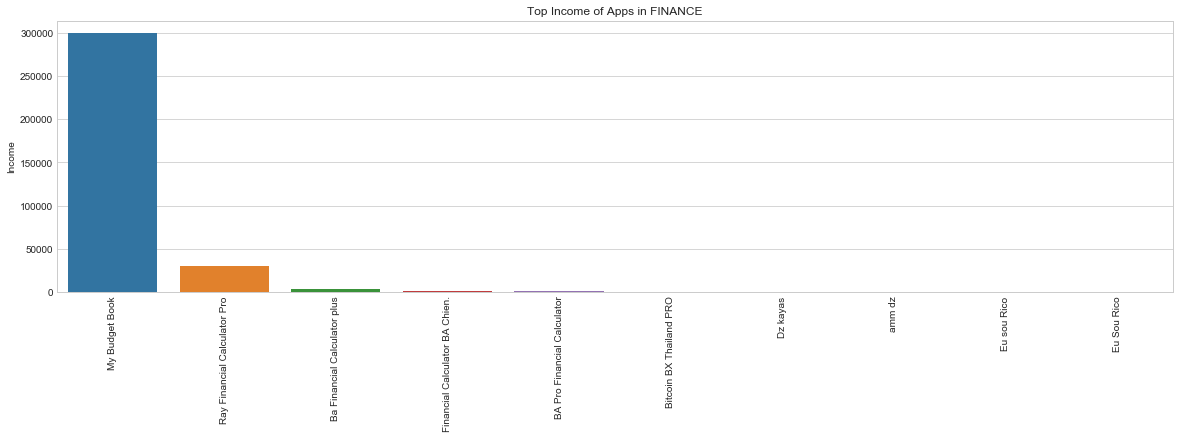

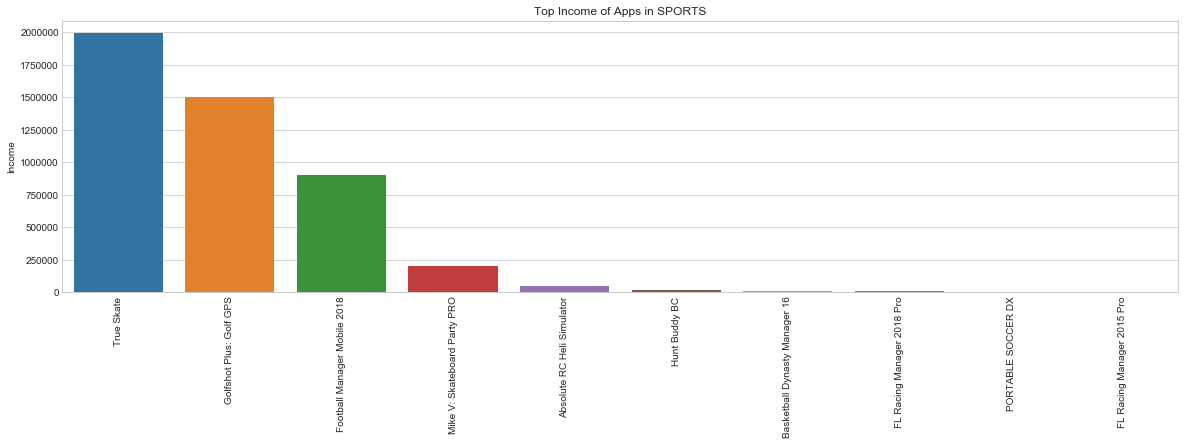

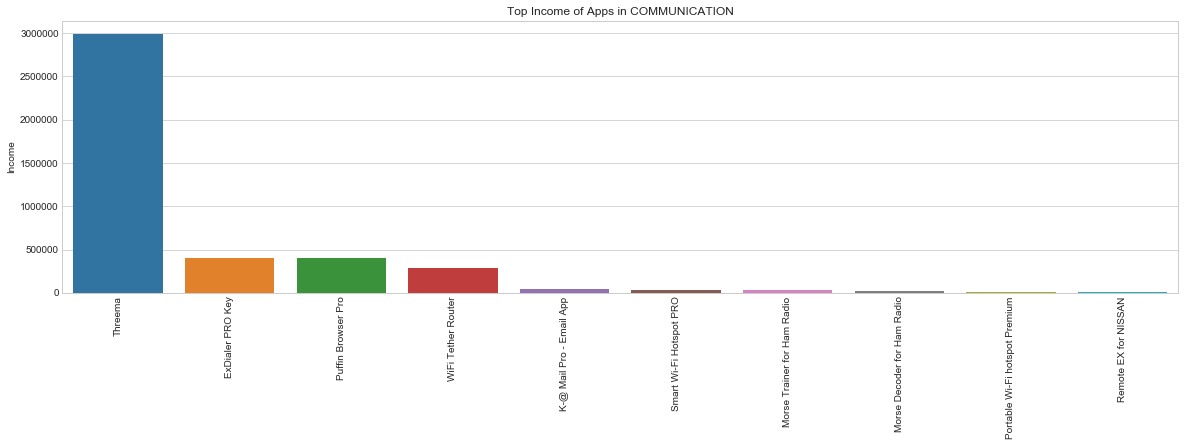

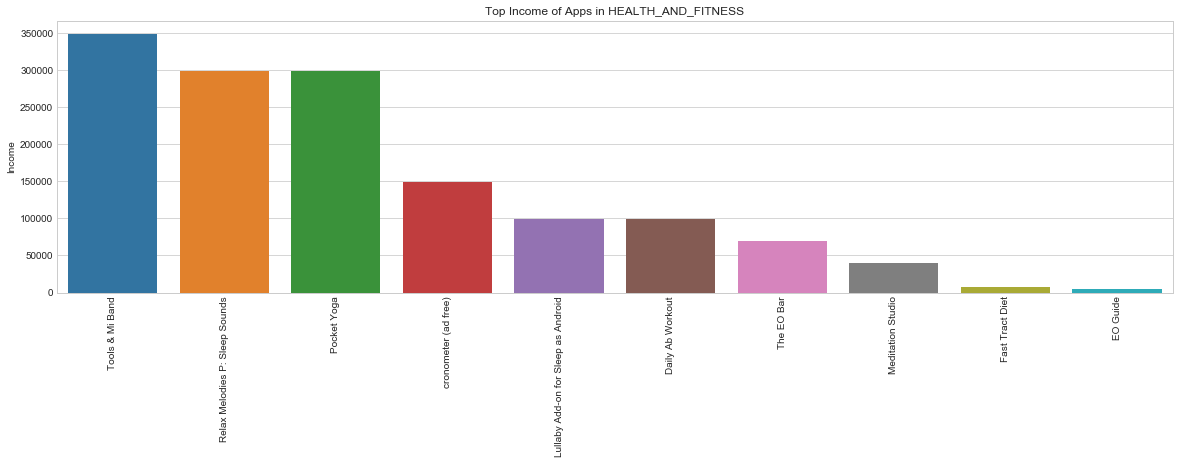

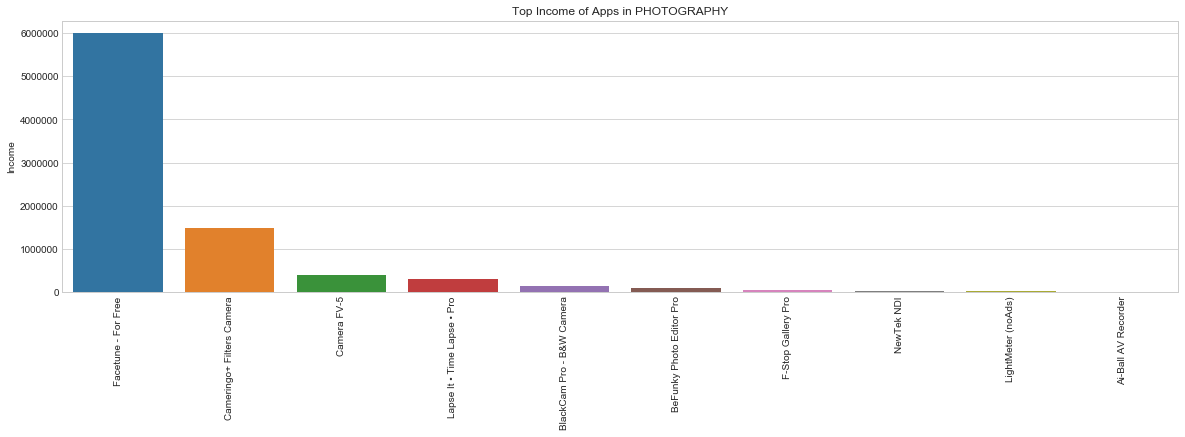

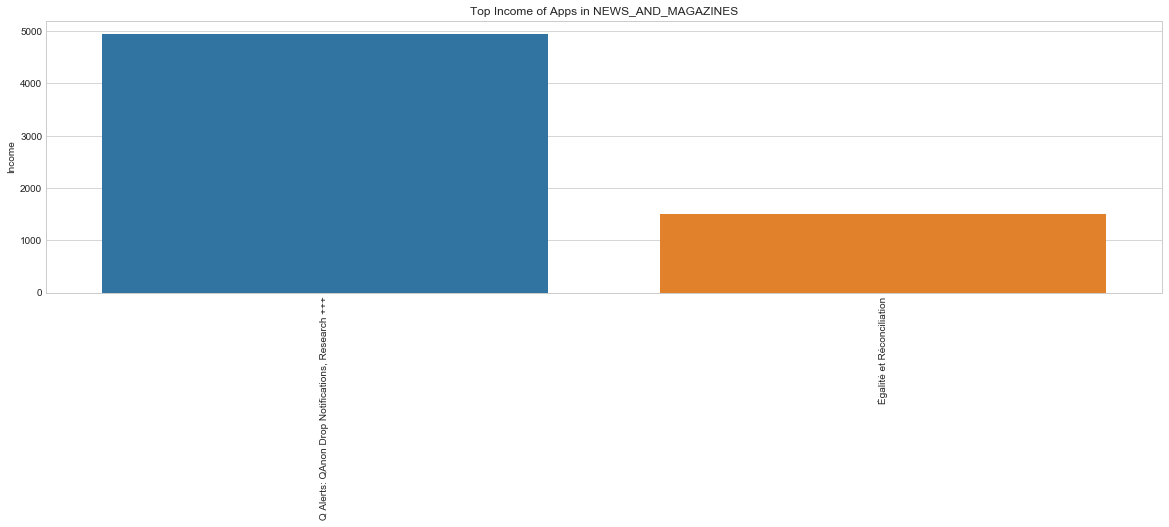

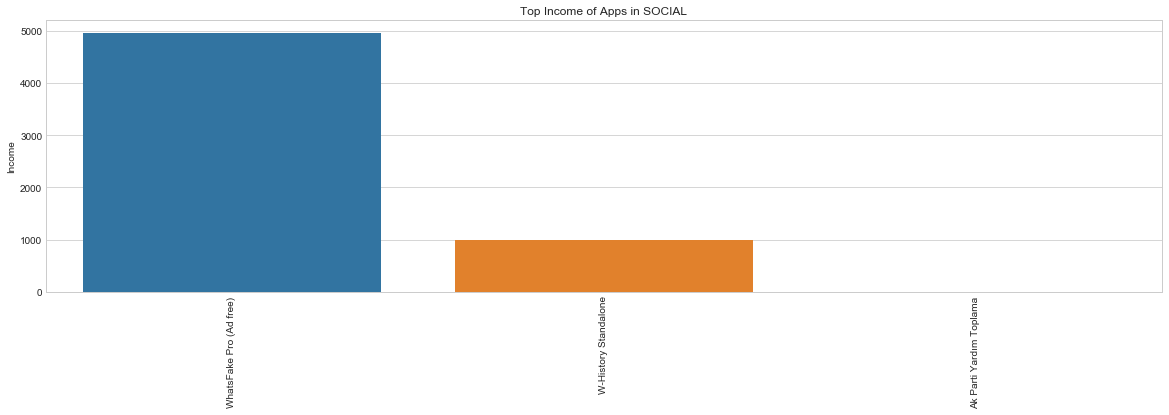

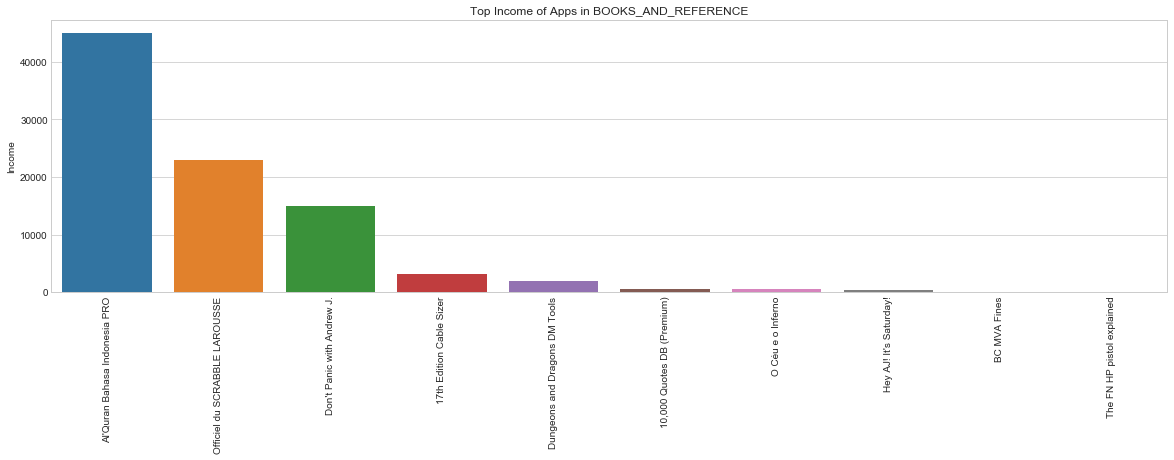

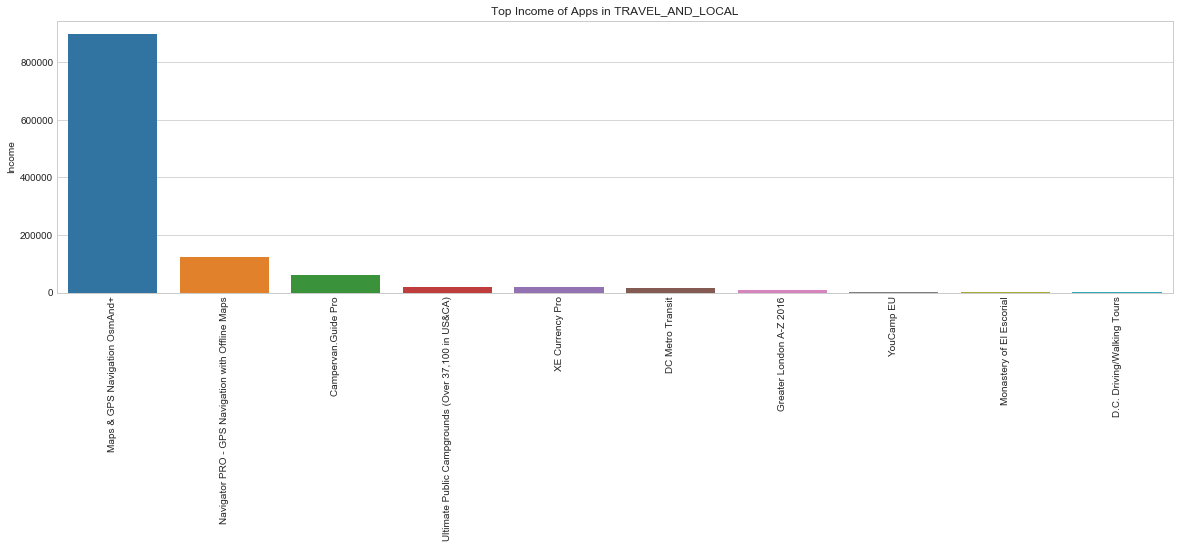

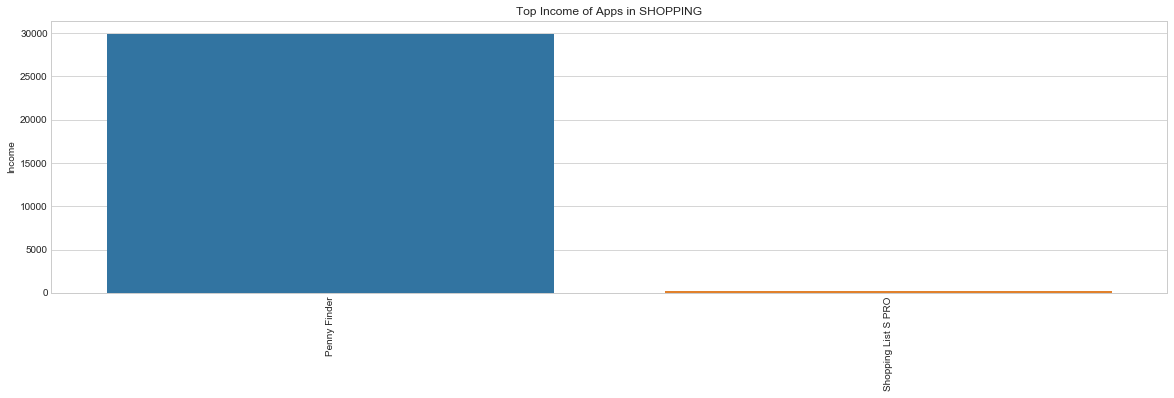

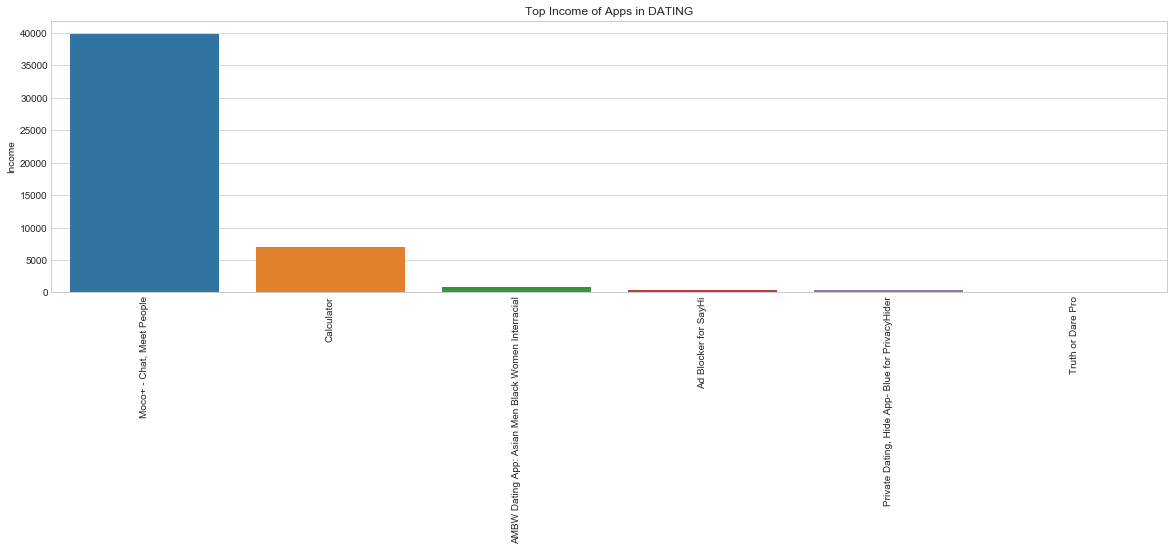

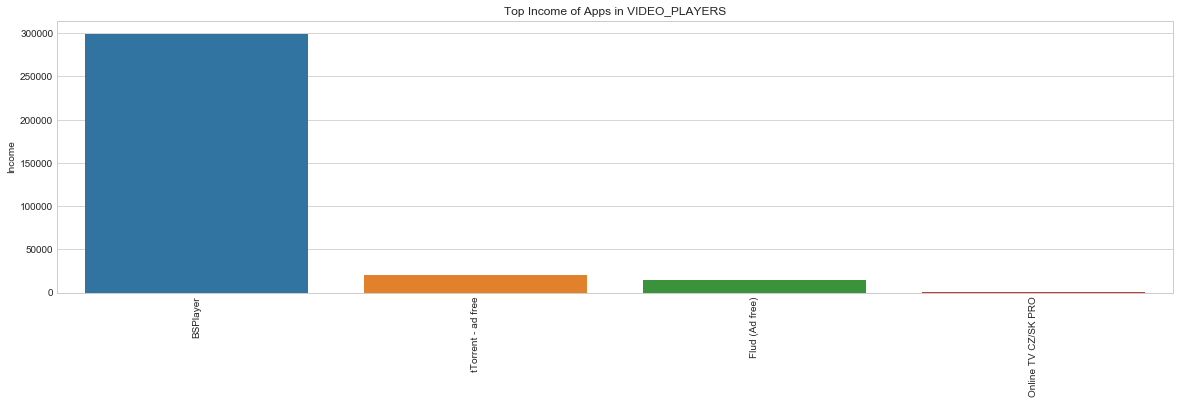

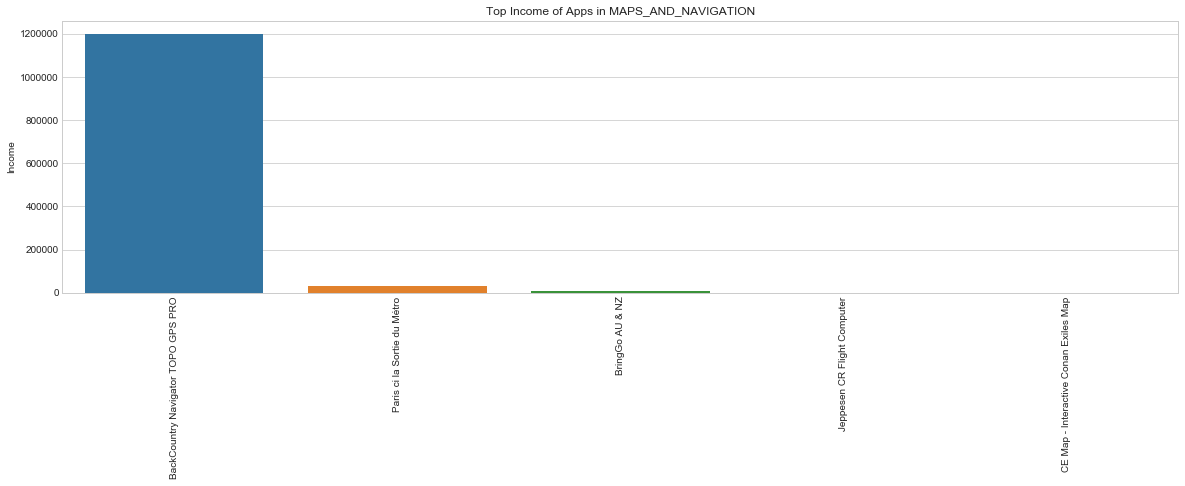

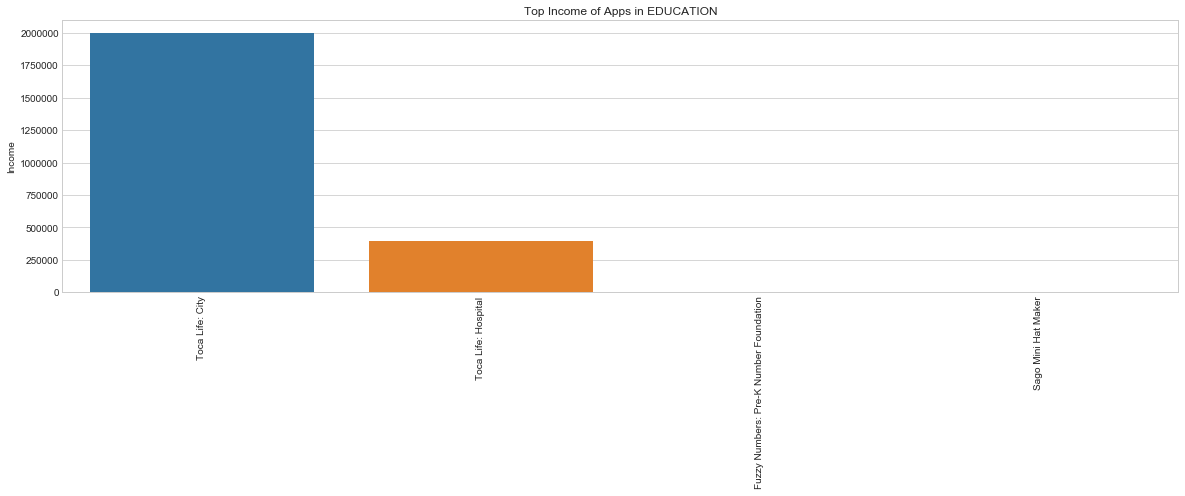

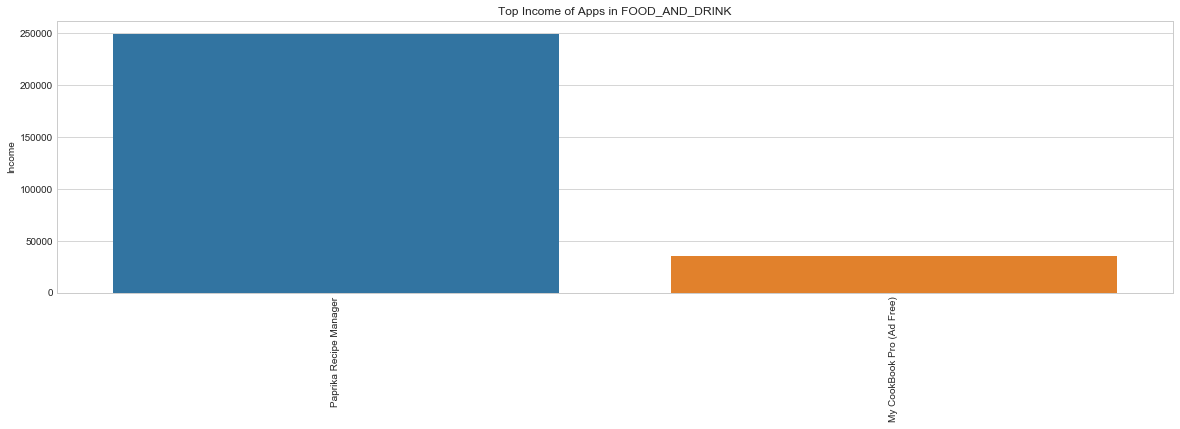

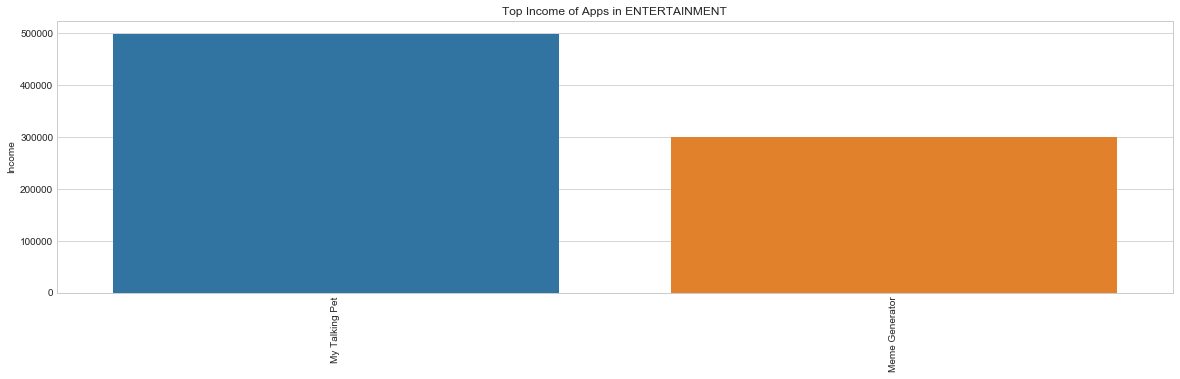

In [ ]:
category = ['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION', 'PRODUCTIVITY', 
            'LIFESTYLE', 'FINANCE', 'SPORTS', 'COMMUNICATION', 'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 
            'NEWS_AND_MAGAZINES', 'SOCIAL', 'BOOKS_AND_REFERENCE', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'DATING',
            'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK', 'ENTERTAINMENT']

for i in range(0,24):    
    df = top_income[top_income['Category'] == category[i]].head(10)
    #category_plotter_function(df, category[i])
    
    plt.figure(figsize=(20,5))
    y_pos = np.arange(len(df['App']))
    names=tuple(df.App)
    sns.barplot(y_pos, 'Income', data=df)
    plt.xticks(y_pos, names, rotation=90)
    plt.title("Top Income of Apps in "+category[i])
    plt.ylabel("Income")
    #sns.barplot(x=top_income[top_income['Category'] == category[i]]['App'].head(10), y=top_income[top_income['Category'] == category[i]]['Income'].head(10), ax=ax[rowax[i], flat_colax[i]]).set_title(category[i])

plt.show()

### Top Categories of Apps by Google Play Store Size

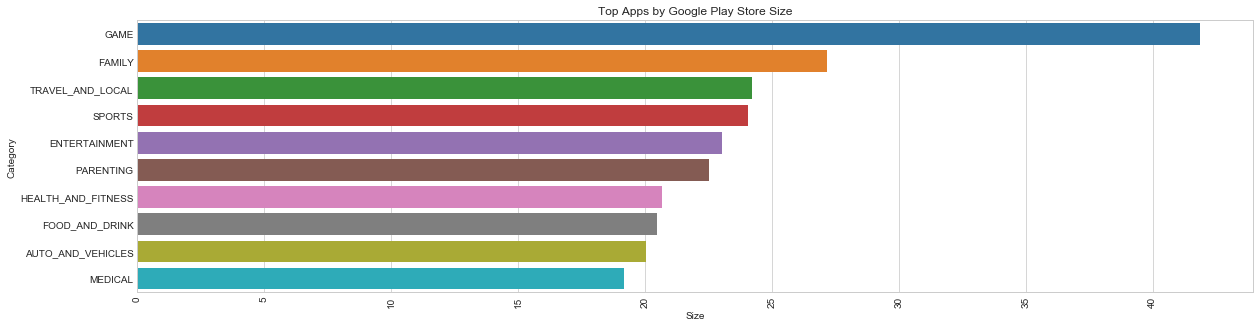

In [ ]:
category_group = apps[["Category", "Rating", "Reviews", "Size", "Install_Log", "Price"]].groupby('Category').mean()
cate_review = category_group.sort_values("Size", ascending=False).reset_index()

top10rv = cate_review[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Size", y="Category", data=top10rv)
plt.xticks(rotation=90)
plt.title("Top Apps by Google Play Store Size")
plt.xlabel("Size")
plt.ylabel("Category")
plt.show()

In [ ]:
apps.groupby("Type").mean()

Reviews       Size      Installs      Price  Category Code  \
Type                                                                     
Free  234243.688532  20.247539  8.431492e+06   0.000000      16.718522   
Paid    8724.887566  19.001554  7.587947e+04  14.045146      17.250000   

      Review_Log  Install_Log  Type Code  Content Rating Code  \
Type                                                            
Free    6.969266    10.986906        0.0             1.448164   
Paid    4.589498     7.155045        1.0             1.294974   

      Genres Category Code  Genres Subcategory Code         Year  \
Type                                                               
Free             23.902729                27.109963  2017.402224   
Paid             23.989418                27.391534  2016.679894   

      Last Updated Day    Rating  
Type                              
Free        899.430529  4.189937  
Paid       1164.595238  4.276601

In [ ]:
apps.Size.describe()

count    9659.000000
mean       20.150017
std        20.615099
min         0.008500
25%         5.300000
50%        13.134701
75%        27.000000
max       100.000000
Name: Size, dtype: float64

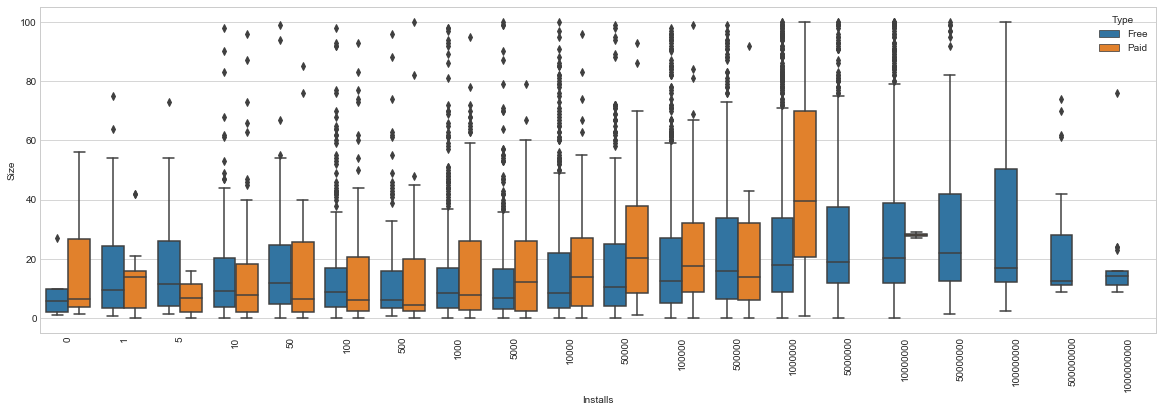

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x="Installs", y="Size", hue="Type", data=apps)
plt.xticks(rotation=90)
plt.show()

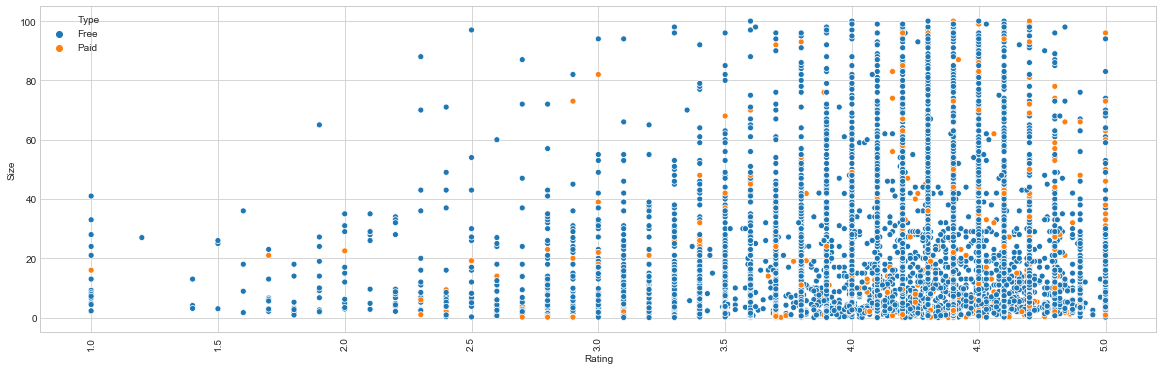

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="Rating", y="Size", hue="Type", data=apps)
plt.xticks(rotation=90)
plt.show()

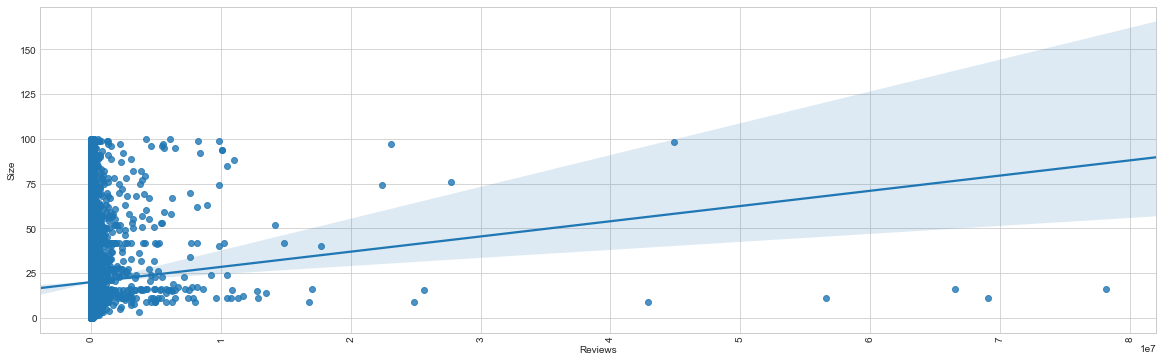

In [ ]:
plt.figure(figsize=(20,6))
sns.regplot(x="Reviews", y="Size", data=apps)
plt.xticks(rotation=90)
plt.show()

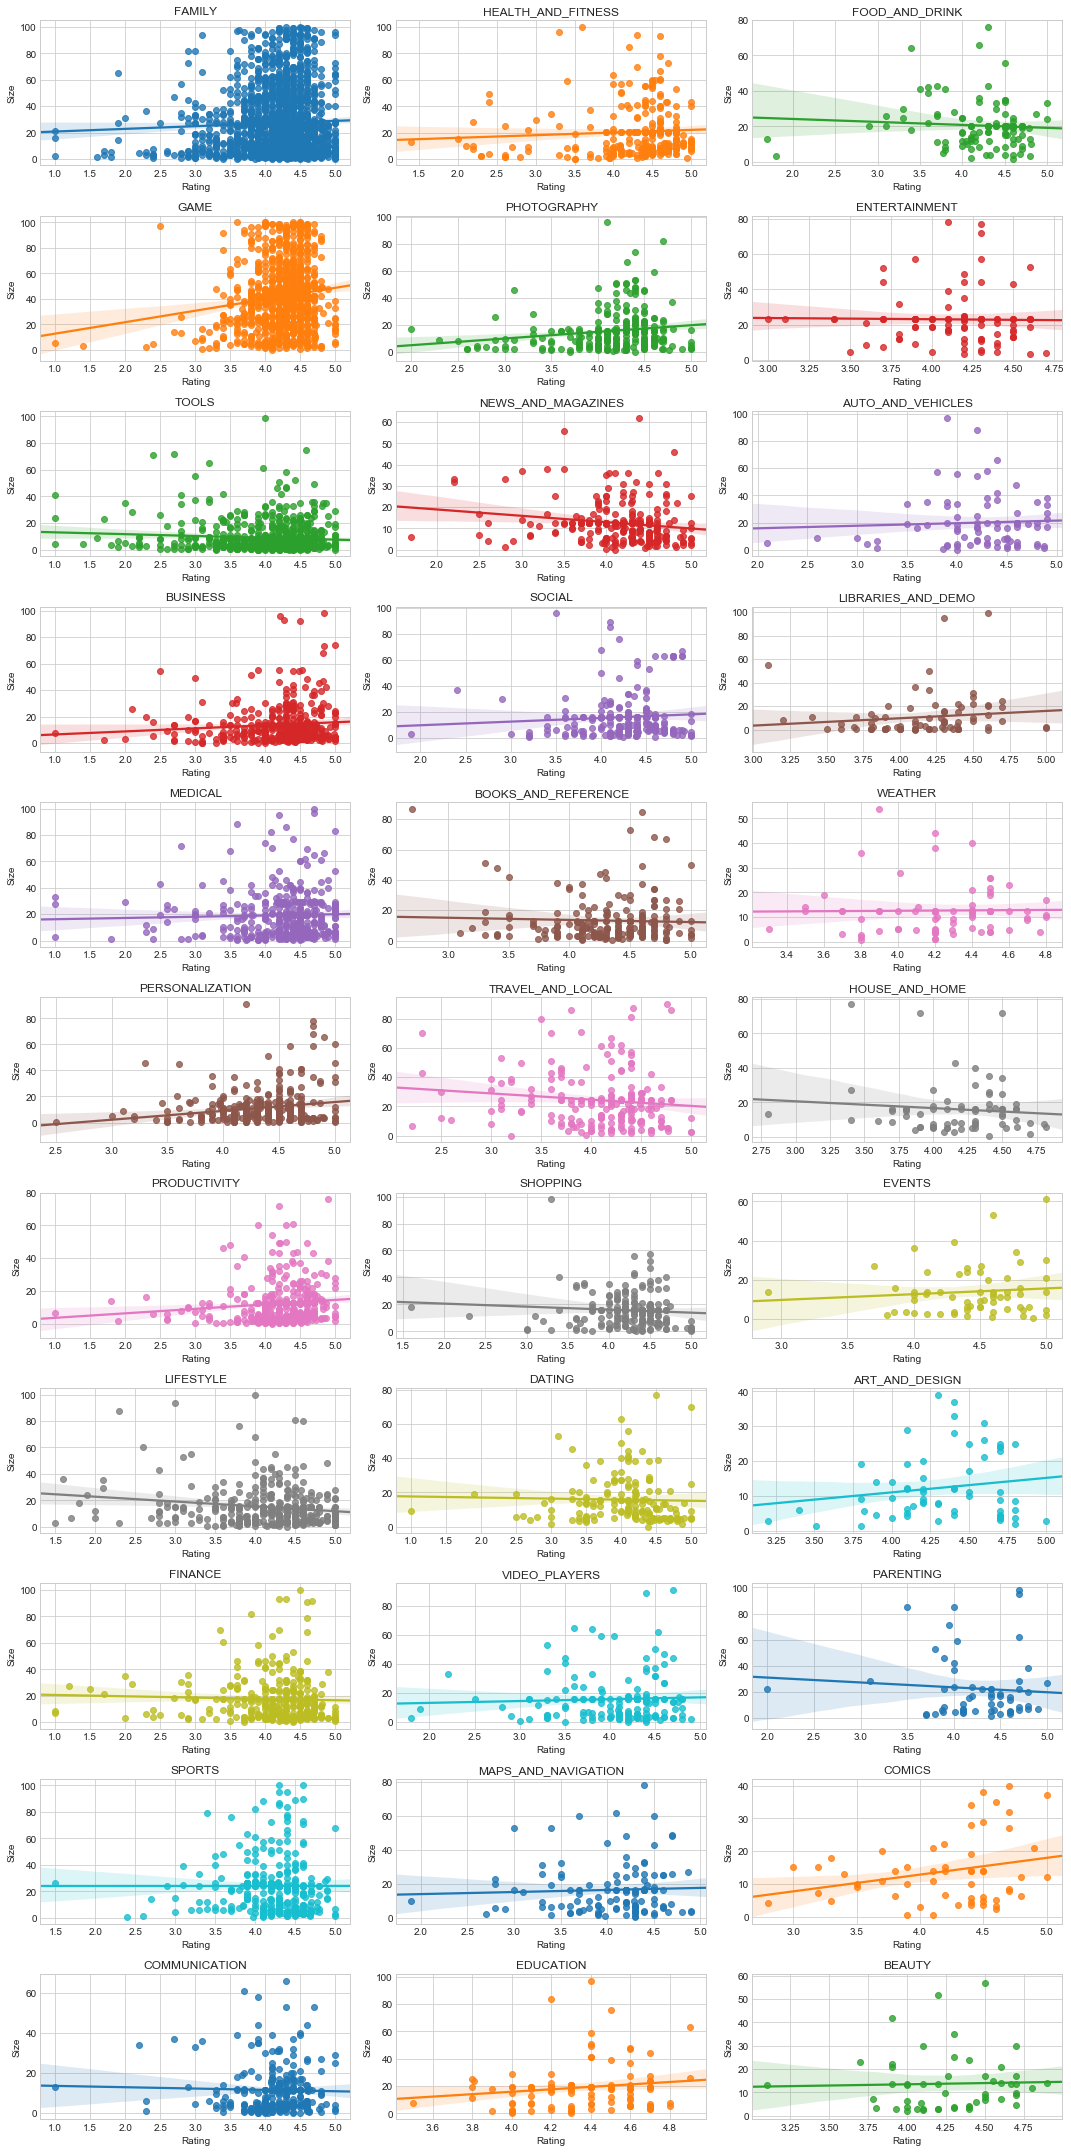

In [ ]:
fig, ax = plt.subplots(11, 3, figsize=(15, 30))

category = apps["Category"].value_counts().index

for i in range(0,33):
    sns.regplot(x=apps[apps["Category"] == category[i]]["Rating"], 
                y=apps[apps["Category"] == category[i]]["Size"], 
                ax=ax[rowax[i], flat_colax[i]]).set_title(category[i])

plt.tight_layout()
plt.show()

### Content Rating

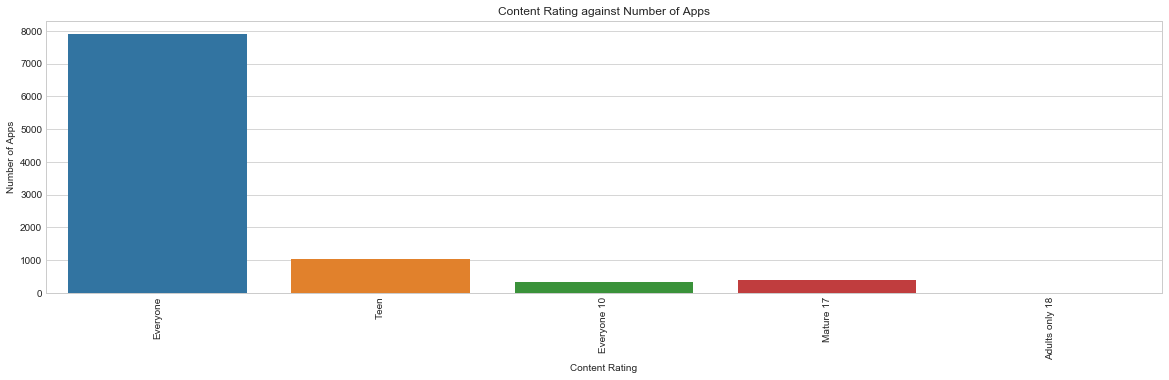

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="Content Rating", data=apps)
plt.xticks(rotation="vertical")
plt.title("Content Rating against Number of Apps")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

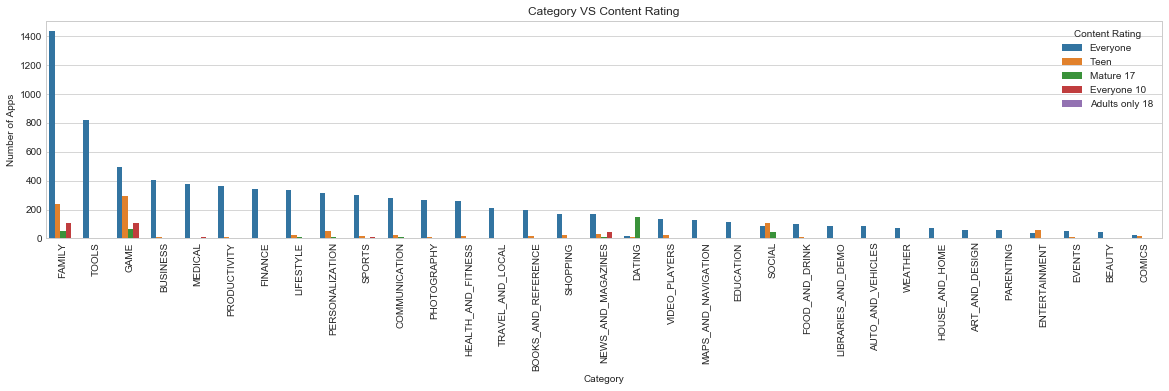

In [ ]:
adv_group = apps.groupby(["Category", "Content Rating"])["App"].count().reset_index()
adv_install = adv_group.sort_values("App", ascending=False).reset_index()

plt.figure(figsize=(20,4))
sns.barplot(x="Category", y="App", hue="Content Rating", data=adv_install)
plt.xticks(rotation=90)
plt.title("Category VS Content Rating")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

[]

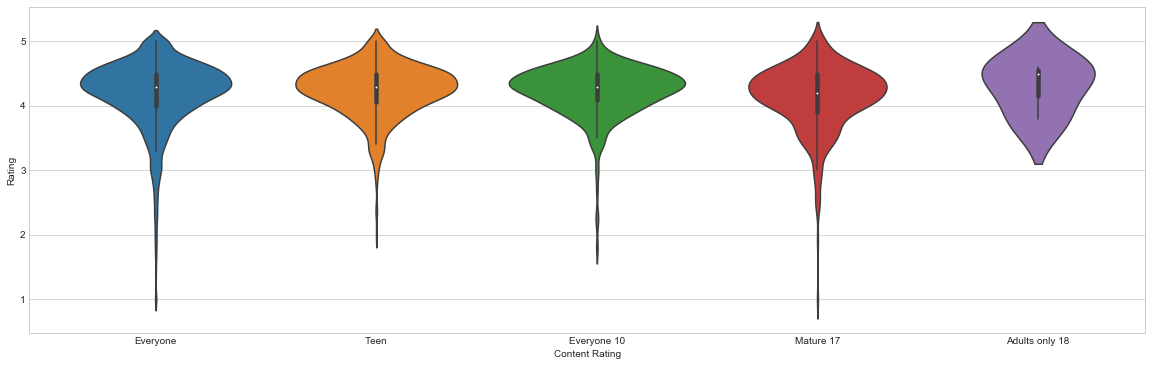

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x="Content Rating", y="Rating", data=apps)
plt.plot()

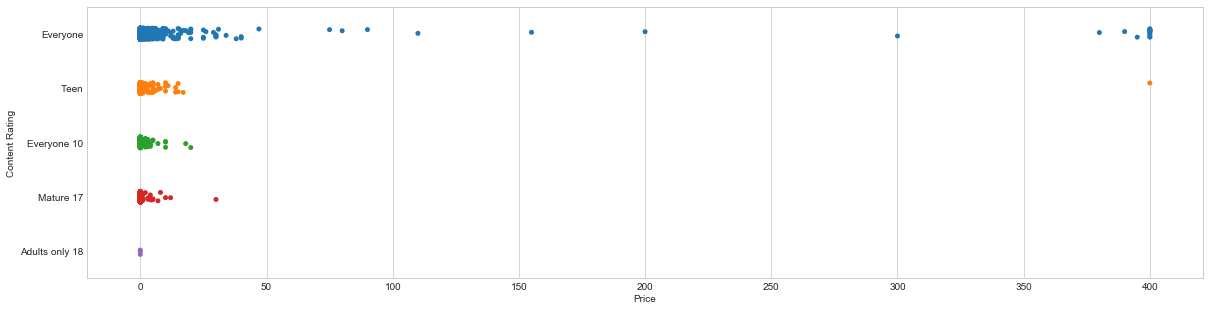

In [ ]:
plt.figure(figsize=(20,5))
sns.stripplot(x="Price", y="Content Rating", data=apps)
plt.show()

<Figure size 1440x360 with 0 Axes>

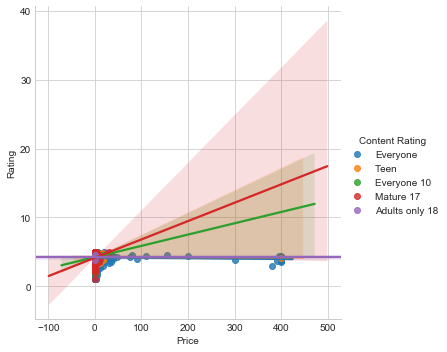

In [ ]:
plt.figure(figsize=(20,5))
sns.lmplot(x="Price", y="Rating", hue = 'Content Rating', data=apps)
plt.show()

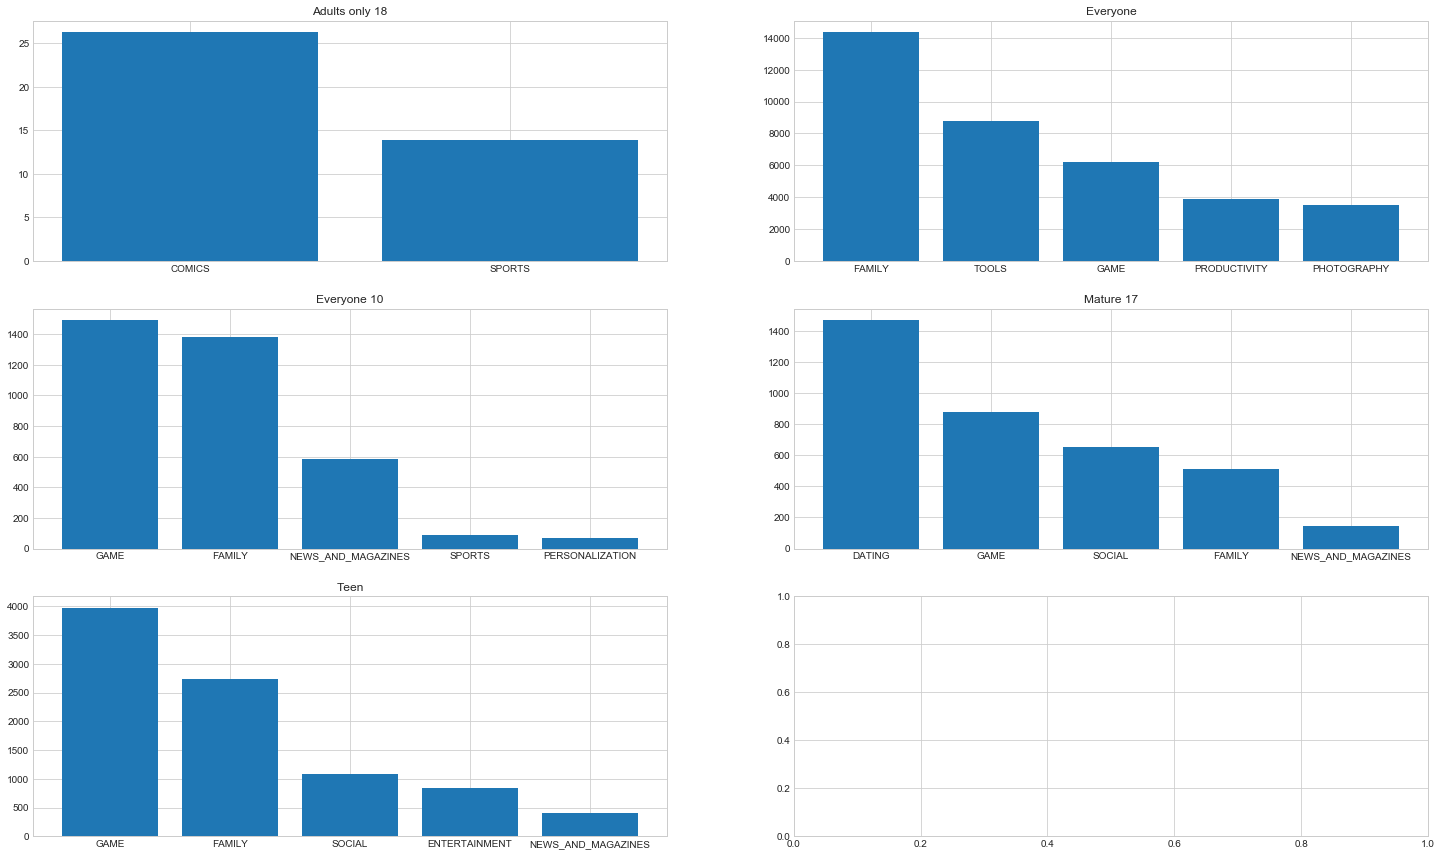

In [ ]:
x,y = (-1,-1)

f, ax = plt.subplots(3, 2, figsize=(25, 15))
for label, group in apps.groupby('Content Rating'):
    y=y+1
    x=x+1
    plot = group.groupby('Category').sum()['Install_Log'].sort_values(ascending=False).head(5)
    ax[int(x/2)][int(y%2)].bar(plot.index, height=plot)
    ax[int(x/2)][int(y%2)].set_title(label)

plt.show()

### Genres Category

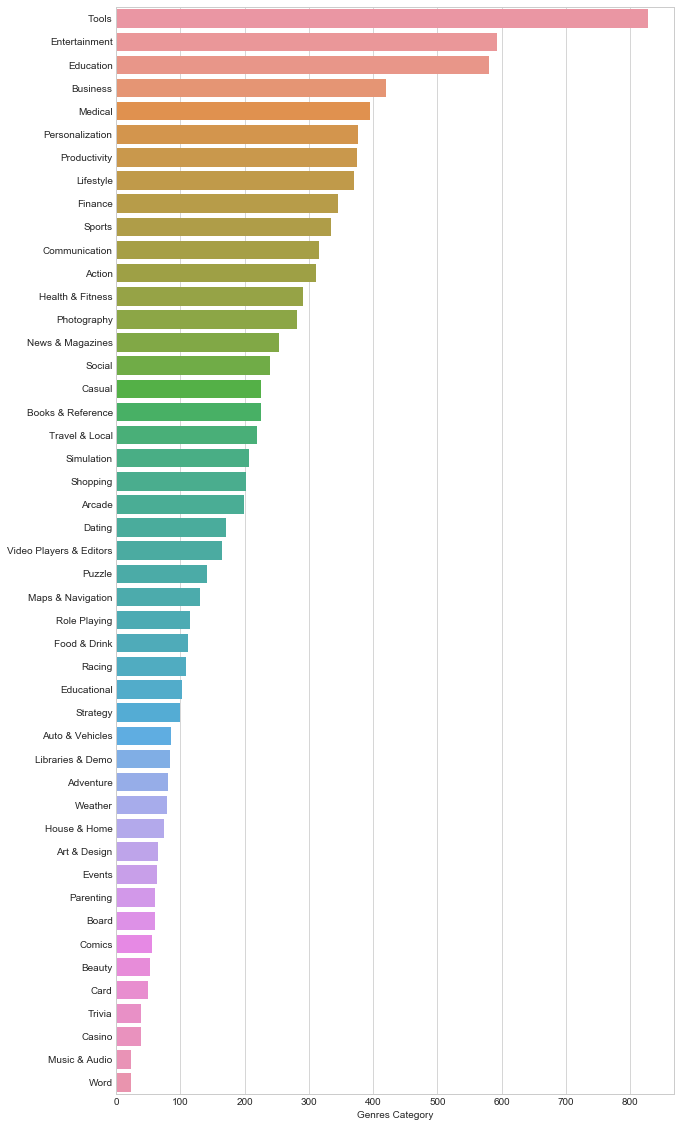

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(x=apps["Genres Category"].value_counts(), y=apps["Genres Category"].value_counts().index)
plt.show()

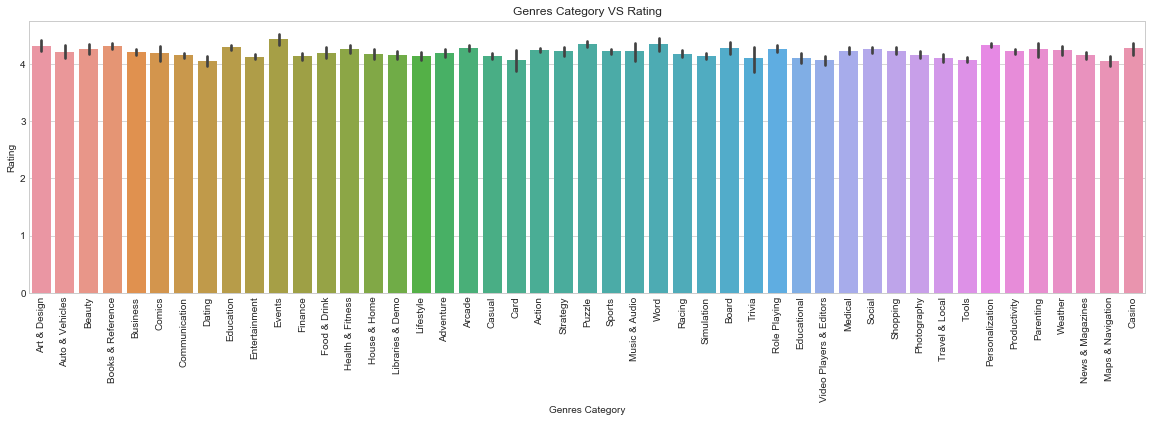

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="Genres Category", y="Rating", data=apps)
plt.xticks(rotation=90)
plt.title("Genres Category VS Rating")
plt.xlabel("Genres Category")
plt.ylabel("Rating")
plt.show()

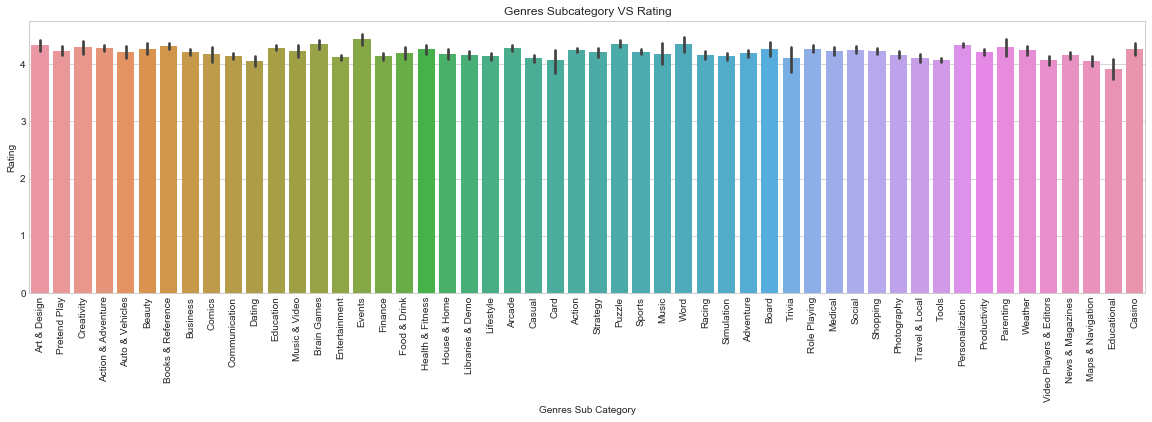

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="Genres Subcategory", y="Rating", data=apps)
plt.xticks(rotation=90)
plt.title("Genres Subcategory VS Rating")
plt.xlabel("Genres Sub Category")
plt.ylabel("Rating")
plt.show()

### Last Updated Apps

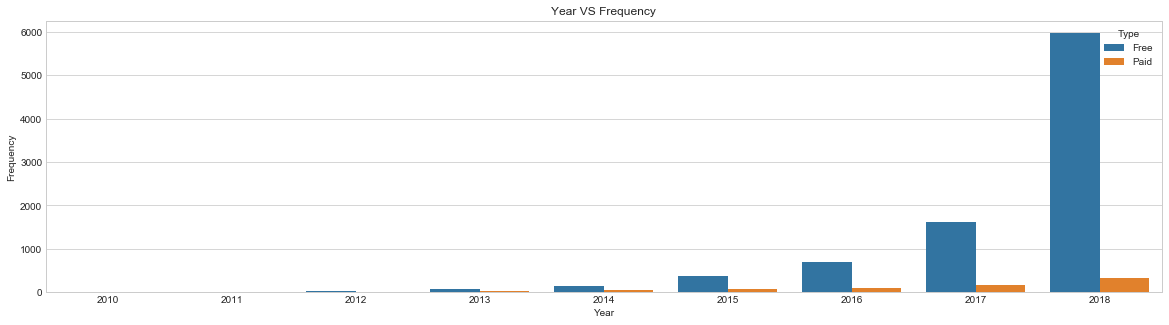

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="Year", hue="Type", data=apps)
plt.title("Year VS Frequency")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Updated > 100 time')

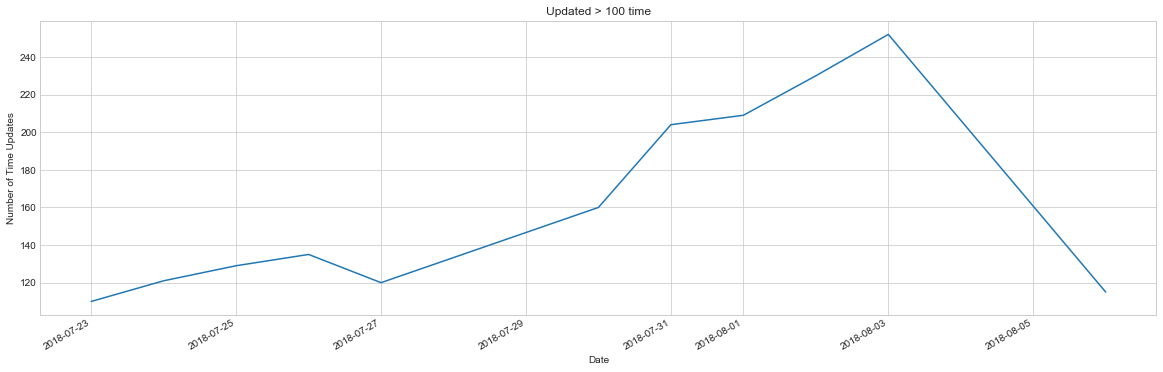

In [ ]:
last_c = apps["Last Updated"].value_counts()
freq100 = last_c[last_c > 100]
plt.figure(figsize=(20,6))
freq100.plot()
plt.xlabel("Date")
plt.ylabel("Number of Time Updates")
plt.title("Updated > 100 time")

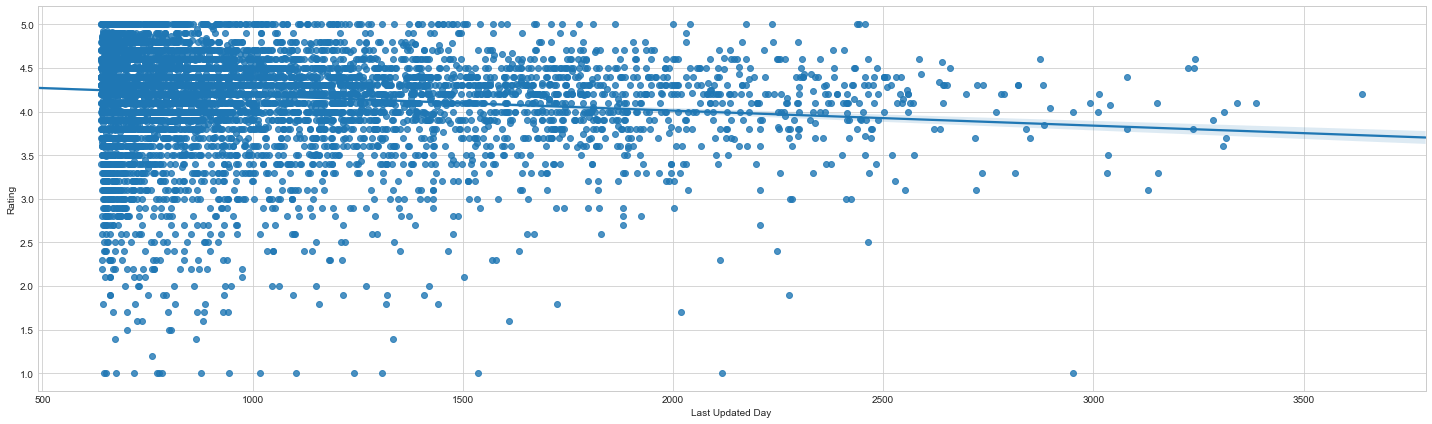

In [ ]:
plt.figure(figsize=(20,6))
sns.regplot(x=apps['Last Updated Day'], y=apps['Rating'])
plt.tight_layout()
plt.show()

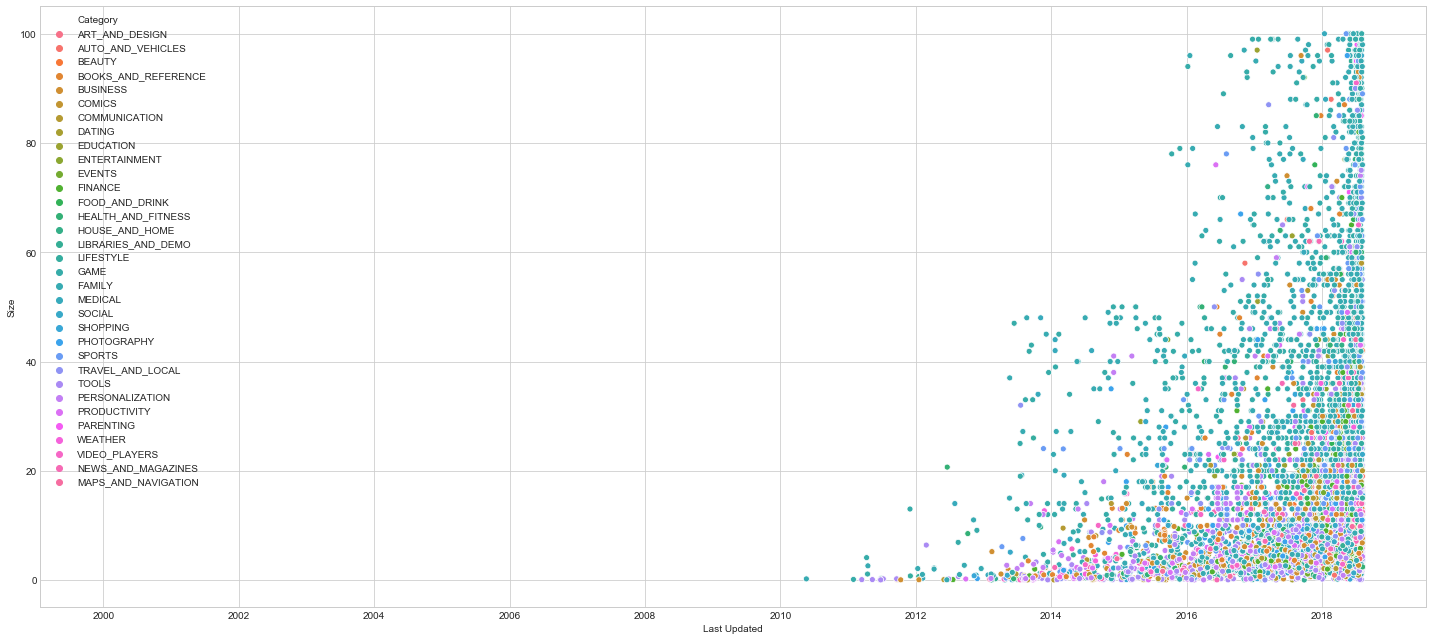

In [ ]:
plt.figure(figsize=(20,9))
sns.scatterplot(x=apps['Last Updated'], y=apps['Size'], hue=apps['Category'])
plt.tight_layout()
plt.show()

### Current Version

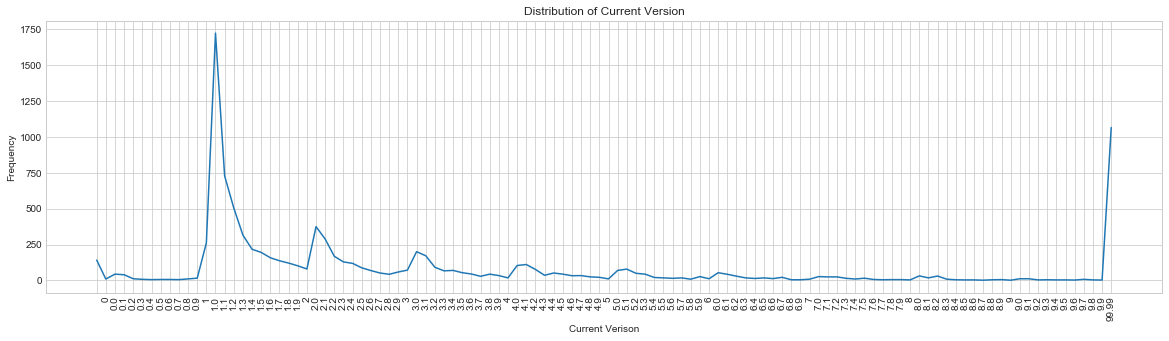

In [ ]:
curr = apps.groupby("Current Ver")["App"].count().reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(x="Current Ver", y="App", data=curr)
plt.title("Distribution of Current Version")
plt.xlabel("Current Verison")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

### Android Version

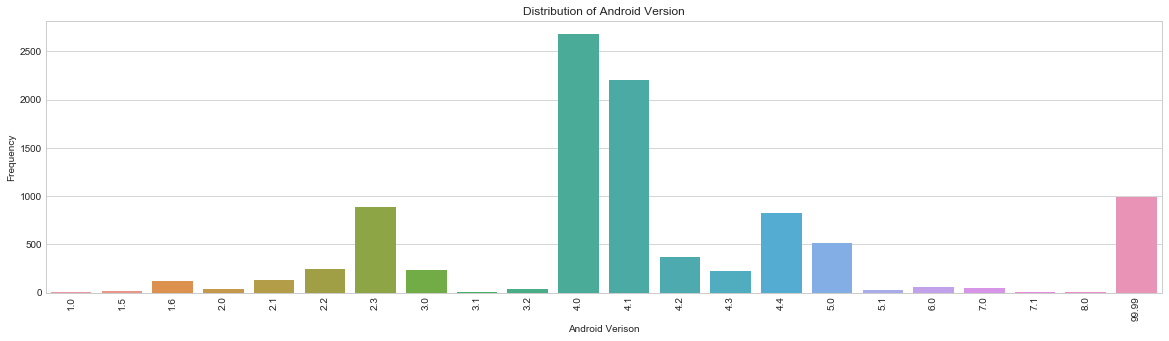

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(apps['Android Ver'])
plt.title("Distribution of Android Version")
plt.xlabel("Android Verison")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

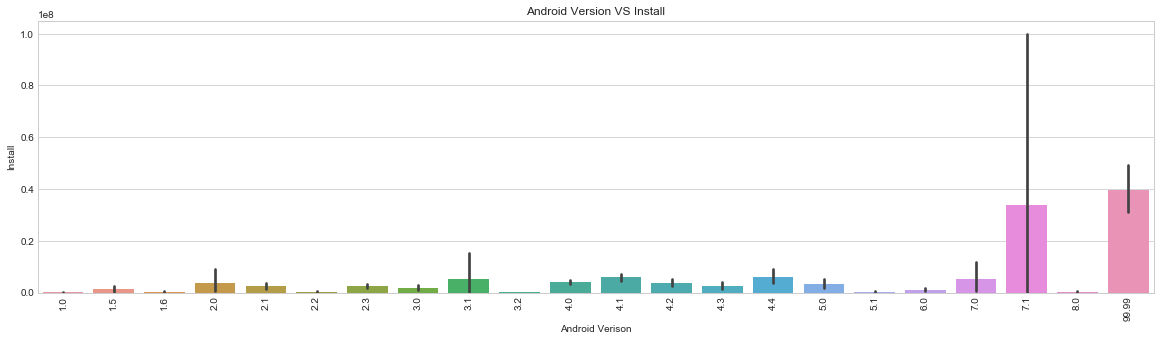

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="Android Ver", y="Installs", data=apps)
plt.title("Android Version VS Install")
plt.xlabel("Android Verison")
plt.ylabel("Install")
plt.xticks(rotation=90)
plt.show()

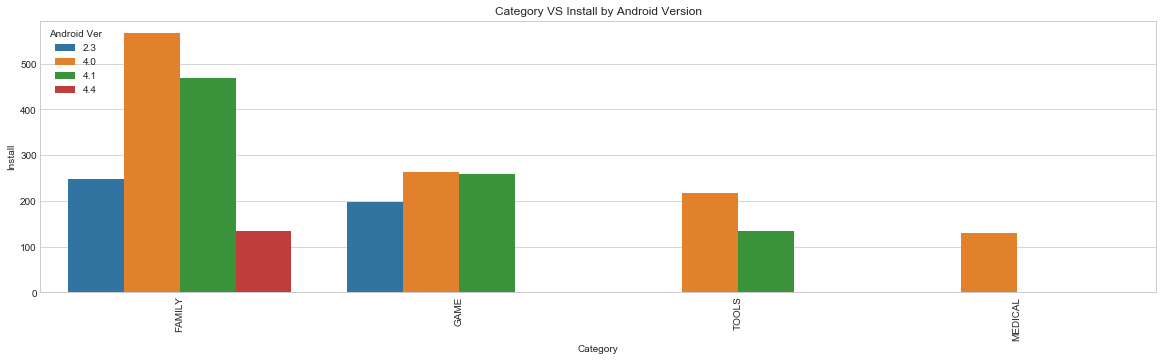

In [ ]:
adv_group = apps.groupby(["Android Ver", "Category"])["Installs"].count().reset_index()
adv_install = adv_group.sort_values("Installs", ascending=False).reset_index()
top10adv = adv_install[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Category", y="Installs", hue="Android Ver", data=top10adv)
plt.xticks(rotation=90)
plt.title("Category VS Install by Android Version")
plt.xlabel("Category")
plt.ylabel("Install")
plt.show()

### Sentiment Against Number Of User Reviews

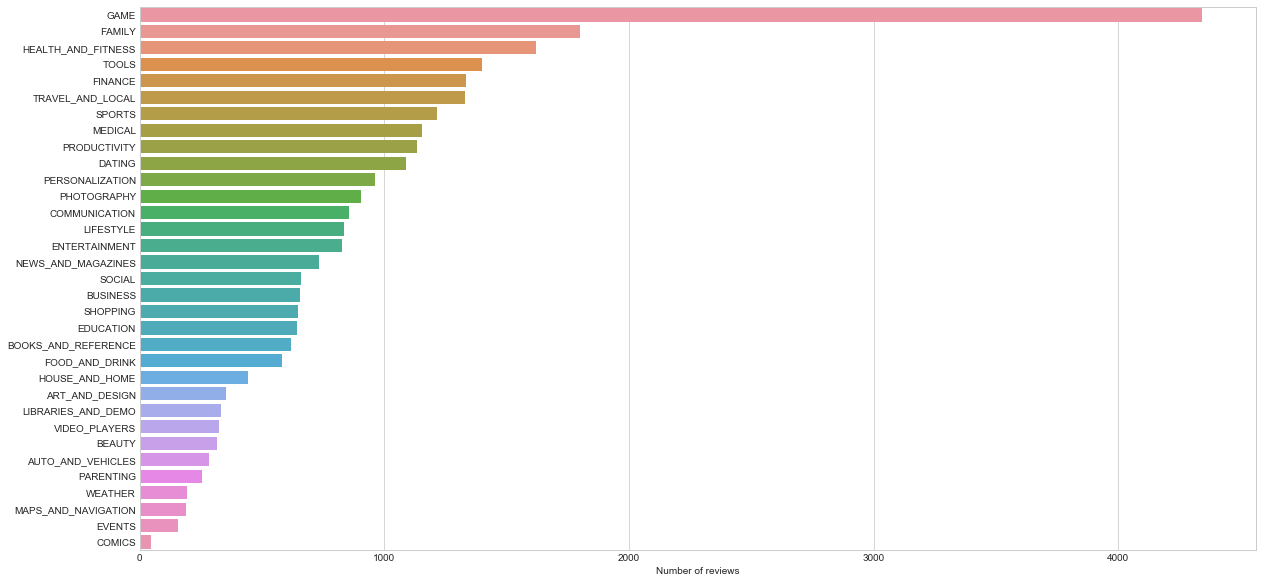

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=diff_df["Category"].value_counts(), y=diff_df["Category"].value_counts().index)
plt.xlabel("Number of reviews")
plt.show()

In [ ]:
diff_df2 = diff_df.dropna(subset=["Translated_Review"])

sentiment_count = diff_df2.groupby(["Category", "Sentiment"]).agg({"App": 'count'}).reset_index()
sentiment_sum =  diff_df2.groupby(["Category"]).agg({"Sentiment": 'count'}).reset_index()

sentiment_cate = pd.merge(sentiment_count, sentiment_sum, on="Category")
sentiment_cate["Sentiment_nliz"] = sentiment_cate["App"] / sentiment_cate["Sentiment_y"]
sentiment_cate.head()

sentiment_cate_piv = sentiment_cate.pivot(values="Sentiment_nliz", columns="Sentiment_x", index="Category")

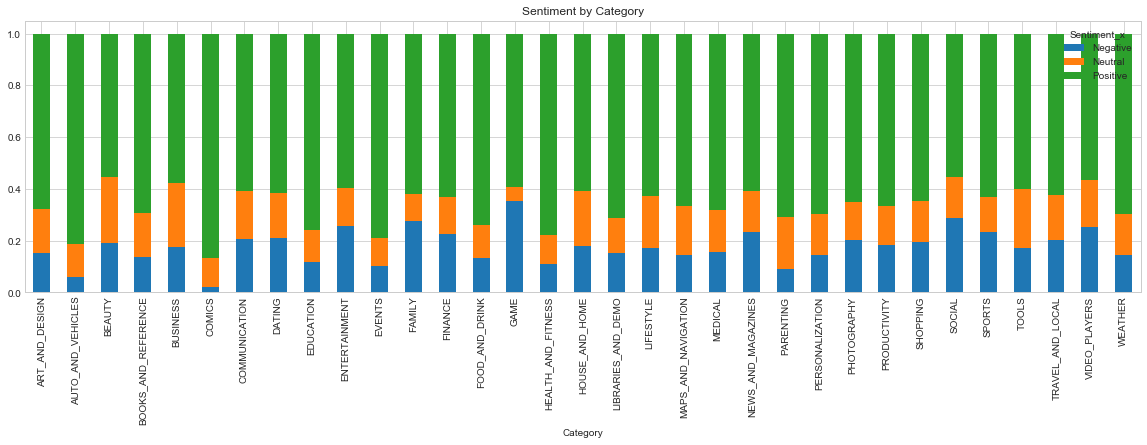

In [ ]:
sentiment_cate_piv.plot(kind="bar", stacked=True, figsize=(20,5))
plt.title("Sentiment by Category")
plt.show()

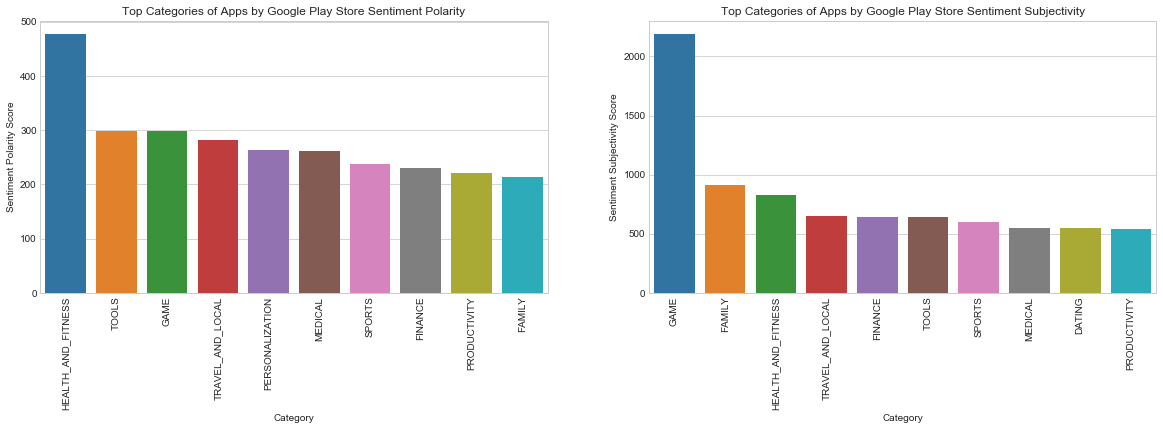

In [ ]:
review_cat_group = diff_df.groupby("Category").sum()

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
review_cat_po = review_cat_group.sort_values("Sentiment_Polarity", ascending=False).reset_index()
top10sen_po = review_cat_po[:10]
sns.barplot(x="Category", y="Sentiment_Polarity", data=top10sen_po)
plt.xticks(rotation=90)
plt.title("Top Categories of Apps by Google Play Store Sentiment Polarity")
plt.xlabel("Category")
plt.ylabel("Sentiment Polarity Score")

plt.subplot(1, 2, 2)
review_cat_po = review_cat_group.sort_values("Sentiment_Subjectivity", ascending=False).reset_index()
top10sen_po = review_cat_po[:10]
sns.barplot(x="Category", y="Sentiment_Subjectivity", data=top10sen_po)
plt.xticks(rotation=90)
plt.title("Top Categories of Apps by Google Play Store Sentiment Subjectivity")
plt.xlabel("Category")
plt.ylabel("Sentiment Subjectivity Score")

plt.show()

In [ ]:
porter = PorterStemmer()
lmtzr = WordNetLemmatizer()
stop = set(stopwords.words('english')+ list(punctuation))

def clean_text(text):
    text = text.lower()    
    text = re.sub("[^a-zA-Z]",  " ", str(text))
    text = word_tokenize      
    text = [x for x in text if x not in stop]
    text = [lmtzr.lemmatize(word) for word in text]
    text = [x for x in text if len(x) > 1]   
    return(text)

def get_wordnet_pos(pos):
    if pos.startswith("J"):
        return "ADJ"
    elif pos.startswith("V"):
        return 'VERB'
    elif pos.startswith("N"):
        return "NOUN"
    elif pos.startswith("R"):
        return "ADV"
    else:
        return "None"

#diff_df['Translated_Review2'] = diff_df['Translated_Review'].apply(lambda x: clean_text(str(x)))
#diff_df['Translated_Review_ALL'] = [' '.join(x) for x in diff_df['Translated_Review2']]
            
diff_df["Translated_Review2"] = diff_df["Translated_Review"].apply(str.lower)
diff_df["Translated_Review2"] = diff_df["Translated_Review2"].map(lambda x: re.sub(r'[^A-Za-z]', ' ', x))
diff_df["Translated_Review2"] = diff_df["Translated_Review2"].apply(word_tokenize)
diff_df["Translated_Review2"] = diff_df["Translated_Review2"].apply(lambda x: [item for item in x if item not in stop])
diff_df["Translated_Review2"] = diff_df["Translated_Review2"].apply(lambda x: [lmtzr.lemmatize(word) for word in x])
diff_df["Translated_Review_ALL"] = [' '.join(x) for x in diff_df["Translated_Review2"]]

diff_df["Translated_Review_POS"] = diff_df["Translated_Review2"].apply(lambda x: pos_tag(x))
diff_df["Translated_Review_POS"] = diff_df["Translated_Review_POS"].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

diff_df["POS_ALL"] = diff_df["Translated_Review_POS"].apply(lambda x: [(t[0]) for t in x if t[1] in ["VERB", "ADJ", "ADV"]])
diff_df["POS_VERB"] = diff_df["Translated_Review_POS"].apply(lambda x: [(t[0]) for t in x if t[1] == "VERB"])
diff_df["POS_ADJ"] = diff_df["Translated_Review_POS"].apply(lambda x: [(t[0]) for t in x if t[1] == "ADJ"])
diff_df["POS_ADV"] = diff_df["Translated_Review_POS"].apply(lambda x: [(t[0]) for t in x if t[1] == "ADV"])
diff_df["POS_NOUN"] = diff_df["Translated_Review_POS"].apply(lambda x: [(t[0]) for t in x if t[1] == "NOUN"])

diff_df["POS_ALL"] = [" ".join(x) for x in diff_df["POS_ALL"]]
diff_df["VERB"] = [" ".join(x) for x in diff_df["POS_VERB"]]
diff_df["ADJ"] = [" ".join(x) for x in diff_df["POS_ADJ"]]
diff_df["ADV"] = [" ".join(x) for x in diff_df["POS_ADV"]]
diff_df["NOUN"] = [" ".join(x) for x in diff_df["POS_NOUN"]]

In [ ]:
def find_word(data):
    word = Counter(" ".join(data).split())
    word = pd.DataFrame(word.items(), columns=["Word", "Count"])
    word.sort_values("Count", ascending=False, inplace=True)
    return word

def ngram_word(data, n, num):
    word = Counter(ngrams(" ".join(data).split(), n))       
    word = word.most_common(num) 
    top_df = pd.DataFrame(word, columns=["Word", "Count"])
    return top_df
    
def show_word_cloud(data, title=None):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(width=900, height=500).generate(text)
    fig = plt.figure(1, figsize=(10,5))
    plt.axis("off") 
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [ ]:
positive = find_word(diff_df[diff_df.Sentiment == "Positive"]["Translated_Review_ALL"])
negative = find_word(diff_df[diff_df.Sentiment == "Negative"]["Translated_Review_ALL"])
neutral = find_word(diff_df[diff_df.Sentiment == "Neutral"]["Translated_Review_ALL"])

f, ax = plt.subplots(3,1, figsize=(14,10))

ax1 = sns.barplot(x=positive["Word"][:10], y=positive["Count"], ax=ax[0])
ax2 = sns.barplot(x=negative["Word"][:10], y=negative["Count"], ax=ax[1])
ax3 = sns.barplot(x=neutral["Word"][:10], y=neutral["Count"], ax=ax[2])

ax1.tick_params(axis="x", rotation=30, labelsize=15)
ax2.tick_params(axis="x", rotation=30, labelsize=15)
ax3.tick_params(axis="x", rotation=30, labelsize=15)

ax1.set_title("Positive")
ax2.set_title("Negative")
ax3.set_title("Neutral")

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
positive = ngram_word(diff_df[diff_df.Sentiment == "Positive"]["Translated_Review_ALL"], 2, 10)
negative = ngram_word(diff_df[diff_df.Sentiment == "Negative"]["Translated_Review_ALL"], 2, 10)
neutral = ngram_word(diff_df[diff_df.Sentiment == "Neutral"]["Translated_Review_ALL"], 2, 10)

f, ax = plt.subplots(3,1, figsize=(20,10))

ax1 = sns.barplot(x=positive["Word"][:10], y=positive["Count"], ax=ax[0])
ax2 = sns.barplot(x=negative["Word"][:10], y=negative["Count"], ax=ax[1])
ax3 = sns.barplot(x=neutral["Word"][:10], y=neutral["Count"], ax=ax[2])

ax1.tick_params(axis="x", rotation=30, labelsize=15)
ax2.tick_params(axis="x", rotation=30, labelsize=15)
ax3.tick_params(axis="x", rotation=30, labelsize=15)

ax1.set_title("Positive")
ax2.set_title("Negative")
ax3.set_title("Neutral")

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
show_word_cloud(diff_df[diff_df.Sentiment == "Positive"]["ADJ"])
show_word_cloud(diff_df[diff_df.Sentiment == "Negative"]["ADJ"])
show_word_cloud(diff_df[diff_df.Sentiment == "Neutral"]["ADJ"])

# Analysis three categories based on top values

## "Finance" = High Price

In [ ]:
cate_price = cate_group.sort_values("Price", ascending=False).reset_index()

top10pc = cate_price[:10]

plt.figure(figsize=(20,4))
sns.barplot(x="Category", y="Price", data=top10pc)
plt.title("Top Apps by Google Play Store Price")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [ ]:
finance_df = apps[(apps["Category"] == "FINANCE")]

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.pie(finance_df["Type"].value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.title("Type of Finance")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x="App", y="Price", data=finance_df.sort_values(by="Price", ascending=False).head(10))
plt.title("Top Price Apps")
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 3, 1)
sns.stripplot(x="Price", y="Installs", data=finance_df)
plt.title("Price VS Installs")

plt.subplot(1, 3, 2)
sns.lineplot(x="Price", y="Rating", data=finance_df)
plt.title("Price VS Rating")

plt.subplot(1, 3, 3)
sns.scatterplot(x="Install_Log", y="Rating", hue="Type", data=finance_df)
plt.title("Install VS Rating")

plt.show()

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x="Installs", y="Reviews", data=finance_df)
plt.title("Price VS Reviews")

plt.subplot(1, 3, 2)
sns.regplot(x="Installs", y="Size", data=finance_df)
plt.title("Price VS Size")

plt.subplot(1, 3, 3)
sns.barplot(x="Installs", y="Content Rating", data=finance_df)
plt.title("Price VS Content Rating")

plt.show()

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 3, 1)
sns.scatterplot(x="Last Updated", y="Price", data=finance_df)
plt.title("Last Updated VS Price")

plt.subplot(1, 3, 2)
sns.barplot(x="Android Ver", y="Price", data=finance_df)
plt.title("Android Version VS Price")

plt.subplot(1, 3, 3)
sns.lineplot(x="Current Ver", y="Price", data=finance_df)
plt.title("Current Version VS Price")

plt.show()

In [ ]:
finance_review = diff_df[diff_df["Category"] == "FINANCE"]

plt.figure(figsize=(20,5))
sns.barplot(finance_review["Sentiment"].value_counts().index, finance_review["Sentiment"].value_counts())
plt.show()

In [ ]:
positive = find_word(finance_review[finance_review.Sentiment == "Positive"]["Translated_Review_ALL"])
negative = find_word(finance_review[finance_review.Sentiment == "Negative"]["Translated_Review_ALL"])
neutral = find_word(finance_review[finance_review.Sentiment == "Neutral"]["Translated_Review_ALL"])

f, ax = plt.subplots(3,1, figsize=(14,10))

ax1 = sns.barplot(x=positive["Word"][:10], y=positive["Count"], ax=ax[0])
ax2 = sns.barplot(x=negative["Word"][:10], y=negative["Count"], ax=ax[1])
ax3 = sns.barplot(x=neutral["Word"][:10], y=neutral["Count"], ax=ax[2])

ax1.tick_params(axis="x", rotation=30, labelsize=15)
ax2.tick_params(axis="x", rotation=30, labelsize=15)
ax3.tick_params(axis="x", rotation=30, labelsize=15)

ax1.set_title("Positive")
ax2.set_title("Negative")
ax3.set_title("Neutral")

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
show_word_cloud(finance_review[finance_review.Sentiment == "Positive"]["ADJ"])
show_word_cloud(finance_review[finance_review.Sentiment == "Negative"]["ADJ"])
show_word_cloud(finance_review[finance_review.Sentiment == "Neutral"]["ADJ"])

In [ ]:
finance_df.sort_values(by="Price", ascending=False)

In [ ]:
words = ["rich", "Rich", "RICH"]
mask = finance_df.iloc[:, 0].str.contains(r'\b(?:{})\b'.format('|'.join(words)))
finance_df2 = finance_df[~mask]

In [ ]:
finance_df2.sort_values(by="Price", ascending=False)

In [ ]:
rating_above_3 = finance_df2[finance_df2["Rating"] >= 3].sort_values(by="Price", ascending=False)
rating_above_3

In [ ]:
rating_below_3 = finance_df2[finance_df2["Rating"] < 3].sort_values(by="Price", ascending=False)
rating_below_3

In [ ]:
# Does finance category have really high price among all categories?
mask = apps.iloc[:, 0].str.contains(r'\b(?:{})\b'.format('|'.join(words)))
new_apps = apps[~mask]

new_apps_cat = new_apps.groupby(["Category"]).sum()
cate_price = new_apps_cat.sort_values("Price", ascending=False).reset_index()

top10pc = cate_price[:10]

plt.figure(figsize=(20,4))
sns.barplot(x="Category", y="Price", data=top10pc)
plt.title("Top Apps by Google Play Store Price")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

## "Family" = High Rating, High Income

In [ ]:
cate_rating = cate_group.sort_values("Rating", ascending=False).reset_index()

top10rt = cate_rating[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Category", y="Rating", data=top10rt)
plt.xticks(rotation=90)
plt.title("Top Categories of Apps by Google Play Store Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

In [ ]:
plt.figure(figsize=(20,4))

sns.barplot(x="Category", y="Income", data=top_income.head(10))
plt.title("Top Income Category")
plt.show()

In [ ]:
df_family = apps[apps["Category"] == "FAMILY"]
df_family["Income"] = df_family["Installs"] * apps["Price"]

mask = df_family.iloc[:, 0].str.contains(r'\b(?:{})\b'.format('|'.join(words)))
df_family = df_family[~mask]
df_family.sort_values(by="Price", ascending=False).head(10)

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
sns.barplot(x="App", y="Price", data=df_family.sort_values(by="Price", ascending=False).head(10))
plt.title("Top Apps")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x="Price", data=df_family)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Install_Log", y="Price", hue="Type", data=df_family)
plt.title("Install VS Price")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.lineplot(x="Install_Log", y="Income", hue="Type", data=df_family)
plt.title("Install VS Income")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Price", y="Rating", hue="Type", data=df_family)
plt.title("Price VS Rating")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Install_Log", y="Rating", hue="Type", data=df_family)
plt.title("Install VS Rating")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
sns.barplot(x="Content Rating", y="Price", data=df_family)
plt.title("Content Ratin VS Price")

plt.subplot(1, 2, 2)
sns.scatterplot(x="Install_Log", y="Size", hue="Type", data=df_family)
plt.title("Install_Log VS Size")
plt.xticks(rotation=90)

plt.show()

In [ ]:
df_family_above45 = df_family[(df_family["Rating"] >= 4.5)]
df_family_below45 = df_family[(df_family["Rating"] < 4.5)]

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Price", y="Install_Log", hue="Type", data=df_family_below45)
plt.title("Price VS Install where Rating < 4.5")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Price", y="Install_Log", hue="Type", data=df_family_above45)
plt.title("Price VS Install where Rating >= 4.5")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
sns.regplot(x="Install_Log", y="Size", data=df_family_below45)
plt.title("Installs VS Size where Rating < 4.5")

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.regplot(x="Install_Log", y="Size", data=df_family_above45)
plt.title("Installs VS Size where Rating >= 4.5")

plt.show()

In [ ]:
# Top 10 Family Genres in terms of Income
top10 = df_family.groupby("Genres Category")["Income"].max().sort_values(ascending=False)
top10rv = top10.reset_index()[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Genres Category", y="Income", data=top10rv)
plt.title("Genres Category VS Income")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Rating", y="Price", hue="Genres Category", data=df_family_below45)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Rating", y="Price", hue="Genres Category", data=df_family_above45)
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Price", y="Install_Log", hue="Genres Category", data=df_family_below45)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Price", y="Install_Log", hue="Genres Category", data=df_family_above45)
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Price", y="Income", hue="Genres Category", data=df_family_below45)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Price", y="Income", hue="Genres Category", data=df_family_above45)
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,6))

sns.scatterplot(x="Size", y="Rating", hue="Genres Category", data=df_family)
plt.xticks(rotation=90)

plt.show()

In [ ]:
family_review = diff_df[diff_df["Category"] == "FAMILY"]

plt.figure(figsize=(20,5))
sns.barplot(family_review["Sentiment"].value_counts().index, family_review["Sentiment"].value_counts())
plt.show()

In [ ]:
show_word_cloud(family_review[family_review.Sentiment == "Positive"]["ADJ"])
show_word_cloud(family_review[family_review.Sentiment == "Negative"]["ADJ"])
show_word_cloud(family_review[family_review.Sentiment == "Neutral"]["ADJ"])

## "Game" = High Install, High Review, High Comment, High Size

In [ ]:
df_game = apps[(apps["Category"] == "GAME") & (apps["Installs"] > 10000000)]
df_game.sort_values(by="Installs", ascending=False)[:5]

In [ ]:
# Top 10 Game Genres in terms of Max Downloads
top10 = df_game.groupby("Genres Category")["Installs"].max().sort_values(ascending=False)
top10rv = top10.reset_index()[:10]

plt.figure(figsize=(20,5))
sns.barplot(x="Genres Category", y="Installs", data=top10rv)
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Size", y="Installs", hue="Genres Category", data=df_game)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.scatterplot(x="Reviews", y="Rating", hue="Genres Category", data=df_game)
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_game["Genres Category"], y=df_game["Size"])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x=df_game["Content Rating"])
plt.xticks(rotation=90)

plt.show()

In [ ]:
game_review = diff_df[diff_df["Category"] == "GAME"]

plt.figure(figsize=(20,5))
sns.barplot(game_review["Sentiment"].value_counts().index, game_review["Sentiment"].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
positive = find_word(game_review[game_review.Sentiment == "Positive"]["Translated_Review_ALL"])
negative = find_word(game_review[game_review.Sentiment == "Negative"]["Translated_Review_ALL"])
neutral = find_word(game_review[game_review.Sentiment == "Neutral"]["Translated_Review_ALL"])

f, ax = plt.subplots(3,1, figsize=(14,10))

ax1 = sns.barplot(x=positive["Word"][:10], y=positive["Count"], ax=ax[0])
ax2 = sns.barplot(x=negative["Word"][:10], y=negative["Count"], ax=ax[1])
ax3 = sns.barplot(x=neutral["Word"][:10], y=neutral["Count"], ax=ax[2])

ax1.tick_params(axis="x", rotation=30, labelsize=15)
ax2.tick_params(axis="x", rotation=30, labelsize=15)
ax3.tick_params(axis="x", rotation=30, labelsize=15)

ax1.set_title("Positive")
ax2.set_title("Negative")
ax3.set_title("Neutral")

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

plt.tight_layout()
plt.show()

In [ ]:
show_word_cloud(game_review[game_review.Sentiment == "Positive"]["ADJ"])
show_word_cloud(game_review[game_review.Sentiment == "Negative"]["ADJ"])
show_word_cloud(game_review[game_review.Sentiment == "Neutral"]["ADJ"])

# Regression

In [ ]:
X = apps[["Rating", "Size", "Price", "Category Code", "Review_Log"]]
y = apps["Install_Log"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

In [ ]:
# no hypertuning

In [ ]:
algo=[
    [LinearRegression(), "LinearRegression"], 
    [DecisionTreeRegressor(), "DecisionTreeRegressor"],
    [RandomForestRegressor(), "RandomForestRegressor"],
    [xgb.XGBRegressor(), "XGBRegressor"]
]
mae = []
model_score = []
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    model_score.append([score, a[1]])
    
    print(f'{a[1]} score = {score}')
    
    print(metrics.mean_absolute_error(y_test, y_predict))
    print(metrics.mean_squared_error(y_test, y_predict))
    print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    print(metrics.r2_score(y_test, y_predict))
    
print(model_score)
print(f'best score = {max(model_score)}') 

In [ ]:
# hypertuning

In [ ]:
algo=[
    [LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1), "LinearRegression"], 
    [DecisionTreeRegressor(max_depth=3, min_samples_leaf=5), "DecisionTreeRegressor"], 
    [RandomForestRegressor(n_jobs=-1, n_estimators=400, max_depth=10), "RandomForestRegressor"],
    [xgb.XGBRegressor(learning_rate=0.1, n_estimators=400, max_depth=5, min_child_weight=1), "XGBRegressor"]
]
model_score=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = model.score(X_test, y_test)
    model_score.append([score, a[1]])
    
    print(f'{a[1]} score = {score}')
    
    print(metrics.mean_absolute_error(y_test, y_predict))
    print(metrics.mean_squared_error(y_test, y_predict))
    print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
    print(metrics.r2_score(y_test, y_predict))
    
print(model_score)
print(f'best score = {max(model_score)}')

## K-mean

In [ ]:
code_df = df_filled.copy()
code_df.rename(columns={'Category Code': 'Category', 
                         'Type Code': 'Type',                          
                         'Content Rating Code': 'Content Rating', 
                         'Genres Category Code': 'Genres Category', 
                         'Genres Subcategory Code': 'Genres Subcategory'
                        },inplace=True)

model_df = code_df[["Rating", "Reviews", "Size", "Installs", "Price", "Category", "Review_Log", "Install_Log"]]

In [ ]:
corr = model_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right"
);

In [ ]:
X = model_df.values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align="center", label="Individual explained variance", color ="g")
plt.step(range(len(cum_var_exp)), cum_var_exp, where="mid",label="Cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best")
plt.title("Individual and Cumulative Explained Variances for the PCA")
plt.show()

In [ ]:
pca3 = PCA(n_components=3)
x_3d = pca3.fit_transform(X_std)

In [ ]:
distortions = []
K=range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_3d)
    kmeanModel.fit(x_3d)
    distortions.append(sum(np.min(cdist(x_3d, kmeanModel.cluster_centers_, "euclidean"), axis=1)) / x_3d.shape[0])
    
plt.plot(K, distortions, "--o")
plt.xlabel("K")
plt.xticks(np.arange(min(K), max(K)+1, 2.0))
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal # of clusters (K)")
plt.show()

In [ ]:
data_scaled = pd.DataFrame(preprocessing.scale(model_df), columns = model_df.columns)
pca = PCA(n_components=3)
pca.fit_transform(data_scaled)
print(pd.DataFrame(pca.components_,columns=data_scaled.columns, index = ["PC1", "PC2", "PC3"]))

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(model_df)
labels = kmeans.labels_

apps["clusters"] = labels
model_df["clusters"] = labels

cols = ["Rating", "Size", "Price", "Category", "Review_Log"]

cols.extend(["clusters"])

print(model_df[cols].groupby(["clusters"]).mean())

In [ ]:
centers = np.array(kmeans.cluster_centers_)

colors = ["blue", "green", "red", "orange", "yellow", "purple", "pink", "grey", "teal"]

fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(111, projection = "3d")
ax.scatter(model_df["Category"], model_df["Rating"], model_df["Size"], c=model_df["clusters"], 
           cmap=matplotlib.colors.ListedColormap(colors))

ax.tick_params(axis="z", which="major")
ax.set_xlabel("Category")
ax.set_ylabel("Rating")
ax.set_zlabel("Size")

plt.tight_layout()
plt.show()

In [ ]:
def graphingScatterFnc(param1, param2, param3, param4, param5):
    sns.lmplot(param1, param2, data=model_df, fit_reg=-False,
               hue=param3, scatter_kws={"marker":"D", "s":50})

    plt.scatter(param4, param5, s=100, marker="*", color="black")

    plt.title(param1 + " VS " + param2)
    plt.xlabel(param1)
    plt.ylabel(param2)

In [ ]:
lst = [0,1,2,3,4]
lst2 = [0,1,2,3,4]
clst = ["Rating", "Size", "Price", "Category", "Review_Log"]
clst2 =["Rating", "Size", "Price", "Category", "Review_Log"]
c = list(itertools.product(lst,lst2))
cc = list(itertools.product(clst,clst2))

centersDF = pd.DataFrame({"Rating":centers[:,0], "Size":centers[:,1], "Price":centers[:,2],
                          "Category":centers[:,3], "Review_Log":centers[:,4]})

i = 0
while i < len(c):
    for x in lst:
        graphingScatterFnc(cc[i][0],cc[i][1],"clusters",centersDF.iloc[:,c[i][0]],centersDF.iloc[:,c[i][1]])
        i+=1

In [ ]:
thedict = {i:np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

dictlist = []
for key, value in thedict.items():
    temp = [key,value]
    dictlist.append(temp)

cnt = -1
clusterNumber = []
numberOfItemsCluster = []

for i in range(0,len(centers)-1):
    cnt += 1
    clusterNumber.append(cnt)
    numberOfItemsCluster.append(len(dictlist[i][1]))

zippedTuple = zip(clusterNumber, numberOfItemsCluster)
    
for clusterNumber, numberOfItemsCluster in zippedTuple:
    print(clusterNumber, numberOfItemsCluster)

In [ ]:
for clusterNumberz in range(0,clusterNumber):
    df_temp = apps.loc[apps["clusters"] == clusterNumberz]
    df_temp2 = df_temp.groupby(["App", "Category"])
    print("Cluster:", clusterNumberz)
    print(df_temp)

## LSTM

In [ ]:
n_word = 50000
maxlen = 250
vocab_dim = 100
input_length = 100

n_epoch = 5
batch_size = 64

In [ ]:
tokenizer = Tokenizer(num_words=n_word, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [ ]:
X = tokenizer.texts_to_sequences(diff_df["Translated_Review_ALL"].values)
X = pad_sequences(X, maxlen=maxlen)
y = pd.get_dummies(diff_df["Category"]).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = Sequential()
model.add(Embedding(n_word, vocab_dim, input_length=X.shape[1])) #mask_zero=True
model.add(SpatialDropout1D(0.2))
#model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(output_dim=50, activation="tanh", inner_activation="hard_sigmoid"))
model.add(Dense(33, activation="softmax"))

print("Compile model...")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
print("Train...")
#train_dt = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, verbose=1)
train_dt = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epoch, validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print("Test... \n Loss: {:0.3f}\n Accuracy: {:0.3f}".format(accuracy[0], accuracy[1]))

In [ ]:
plt.title("Loss")
plt.plot(train_dt.history["loss"], label="train")
plt.plot(train_dt.history["val_loss"], label="test")
plt.legend()
plt.show()

In [ ]:
plt.title("Accuracy")
plt.plot(train_dt.history["accuracy"], label="Train")
plt.plot(train_dt.history["val_accuracy"], label="Test")
plt.legend()
plt.show()

In [ ]:
#Test
new_complaint = ["Ten best food promote good health Good health essential long healthy lifestyle make habit eat foods promote good health. Eat fruits veggies every day."]
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=maxlen)
predict = model.predict(padded)

labels = ['HEALTH_AND_FITNESS', 'SHOPPING', 'MEDICAL', 'GAME',
       'PERSONALIZATION', 'DATING', 'TRAVEL_AND_LOCAL', 'COMMUNICATION',
       'SPORTS', 'LIFESTYLE', 'PRODUCTIVITY', 'FAMILY', 'ENTERTAINMENT',
       'PHOTOGRAPHY', 'FINANCE', 'NEWS_AND_MAGAZINES', 'EDUCATION',
       'WEATHER', 'TOOLS', 'BUSINESS', 'MAPS_AND_NAVIGATION',
       'BOOKS_AND_REFERENCE', 'HOUSE_AND_HOME', 'EVENTS', 'SOCIAL',
       'VIDEO_PLAYERS', 'FOOD_AND_DRINK', 'PARENTING',
       'AUTO_AND_VEHICLES', 'ART_AND_DESIGN', 'LIBRARIES_AND_DEMO',
       'BEAUTY', 'COMICS']

print(predict, labels[np.argmax(predict)])